In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import backend as K
from sklearn.metrics import confusion_matrix
from resizeimage import resizeimage
from sklearn import svm
import numpy as np
import cv2 as cv
import os
import random
import PIL
import pickle
import matplotlib.pyplot as plt
import itertools



Using TensorFlow backend.


# Load des images 

In [2]:
def load_data():
    z = [x[0] for x in os.walk('./raw-img/')]
    del z[0]
    img = []
    classes=[]
    cpt=0
    for directory in z:
        current_name = directory.split('/')[-1]
        classes.append(current_name)
        for file in os.listdir(directory):
            img.append((directory+'/'+file, cpt))
        cpt = cpt + 1
    random.shuffle(img)
    return img, classes

img, classes = load_data()

In [3]:
def change_classes(toKeep):
    indice = [i for i, x in enumerate(classes) if x == toKeep]
    indice = indice[0]
    print(indice)
    print('Classe choici : '+classes[indice])
    x = {}
    classif = {toKeep:0,
                'other':1}
    print(img)
    for key, value in img:
        print(key)
        if value is not indice:
            x[key]=1
        else:
            x[key]=0
    return x, classif

# Compute CNN on images loaded

In [4]:
def computeCNN(cnn, classifBis, img):
    samples = []
    responses = []
    vects = {} 
    counter = 0
    for im in img:
        counter += 1
        print(counter,' /', len(img))
        TAILLE = [299, 299]
        print(im)
        myimage = PIL.Image.open(im)
        myimage = resizeimage.resize_contain(myimage, TAILLE)
        img_data = image.img_to_array(myimage)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data) #Normalisation des pixels

        googleNet_feature = cnn.predict(img_data)
        # Retrieve the vectors generated by InceptionV3
        vects[im] = googleNet_feature
    return vects

In [5]:
#Launch InceptionV3
#We load imagenet weights, desactivate the fully connected layer (MLP) and specify pooling mode to avg to retrieve 2D tensors
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
base_model.summary()
img, classif = change_classes('cavallo')
print(img)
vects = computeCNN(base_model, classif, img)
print(vects)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

./raw-img/farfalla/OIP-Gmigp3Budjj6hXzD3BPsxQHaE6.jpeg
./raw-img/gallina/OIP-DHNQORKjiioxSYoz40sSpgHaEK.jpeg
./raw-img/gallina/167.jpeg
./raw-img/cane/OIP-NpyYFebppftMW4aMie9cLwHaE8.jpeg
./raw-img/gallina/OIP-wBQxQjpLYYrOzFahXLYQ3AHaFi.jpeg
./raw-img/ragno/OIP-UAb2QXLU4Zq8wQVMQHN5DgHaFQ.jpeg
./raw-img/mucca/OIP-pB-XZTXB_vWDk3fQ3VblkwHaJR.jpeg
./raw-img/cane/OIP-kUBGk0EyETNUsvPKxxRm1QHaE8.jpeg
./raw-img/cane/OIP-SaY6ea-L8iI3oOrHx55RIwHaE8.jpeg
./raw-img/ragno/OIP-y8GPU8H1a3IvDSJhat_KNQHaFj.jpeg
./raw-img/scoiattolo/OIP-LcgPZ8pT-JGsvbscavSsfgAAAA.jpeg
./raw-img/cavallo/OIP-_TyIyGZkPBq7ri8-heMnswHaF7.jpeg
./raw-img/cane/OIP-9tRMI-pCZ3ERnVXYF45RmQHaE8.jpeg
./raw-img/elefante/OIP-9KrEzDWmmcL-gUhFHgxBOgHaJ4.jpeg
./raw-img/ragno/OIP-1HhShVc0EJdJ6nfheK3BZAHaFY.jpeg
./raw-img/elefante/OIP-moCOhvItIKWmsVXnWh4FUQHaEp.jpeg
./raw-img/farfalla/OIP-BErK9IuHHRl5zGLCHUNA7gHaE0.jpeg
./raw-img/cane/OIP-TMNUTYe9N3PkE6tnpTjiLwHaEp.jpeg
./raw-img/gatto/ea36b60e20f0033ed1584d05fb1d4e9fe777ead218ac104497f5c97

./raw-img/ragno/OIP-62OoIBMkUtRHPS-cIPUX_wHaFj.jpeg
./raw-img/gallina/OIP-agCYpLySZjvEz12QkG2mrgHaHE.jpeg
./raw-img/gallina/OIP-fgEoJ04w5qjougCxQoWiSgHaFj.jpeg
./raw-img/cavallo/OIP-Ld-gnxfBC3nz4CUnp_cNCwHaFa.jpeg
./raw-img/pecora/OIP-SY0hYRd8l19HBiSYu0BViQAAAA.jpeg
./raw-img/mucca/OIP-aqQstRq9P_-Pdv3GOUPtogHaE8.jpeg
./raw-img/cane/OIP-yNmbRNG5AryNVSt3Pn5NEwHaE7.jpeg
./raw-img/ragno/OIP-2JF86T4ufi8KA_FrBD8YSQHaFh.jpeg
./raw-img/farfalla/OIP-AbT7F0AMQ_bOghc7sJShSwHaEK.jpeg
./raw-img/cane/OIP-PTN7YlVs9chWXXE7fc2j9QHaFj.jpeg
./raw-img/cane/OIP-xeczKa5df0lAwrWgmz9VuwHaIW.jpeg
./raw-img/cane/OIP-wWjFRKd0WIn02cogksRPQgHaK6.jpeg
./raw-img/mucca/OIP-YoNUIAbWzsvhdtUFaGQD1QAAAA.jpeg
./raw-img/ragno/OIP-9WrqZgw3tTivMDh_2QGeKQHaEz.jpeg
./raw-img/cavallo/OIP-61djFLd3g5eJG9xi2DedtQHaHg.jpeg
./raw-img/cavallo/OIP-UuLm7tFq_i_td835TWNG5QHaF9.jpeg
./raw-img/cavallo/OIP-5FIFtR4STxC2gL3uXvv_nwHaFL.jpeg
./raw-img/pecora/OIP-7QoLc8NE20UL3-z2IqMrHAHaEH.jpeg
./raw-img/cane/OIP-VjQi1a47v34Mo0rbUnTpdgHaE8.jpeg


./raw-img/ragno/OIP-aJxVlDB1HRsqRzomIZPYFgHaFn.jpeg
./raw-img/gatto/75.jpeg
./raw-img/gallina/OIP-O_3H6uUXh7dKWmA8hMibSwHaEZ.jpeg
./raw-img/farfalla/OIP-NkobmkNapRvd2GWy2lErQQHaHa.jpeg
./raw-img/ragno/eb36b30e29f2083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./raw-img/pecora/OIP-oHNk3-Y50GgTmuTs9DN73gHaE7.jpeg
./raw-img/cavallo/OIP-GLUAfPNLvlx_AfaFTkEmvQHaFU.jpeg
./raw-img/ragno/OIP-sf6g25w-KfcvS4rLdPzgewHaHx.jpeg
./raw-img/pecora/e83db7072bf7043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./raw-img/farfalla/OIP-uVK6VATYER8gaghGG5mE0QHaFj.jpeg
./raw-img/cavallo/OIP-_zJyP5n6EgST1ooshBckeQHaE8.jpeg
./raw-img/pecora/OIP-tleKheLB3Wz_RmHzo8sRTgHaFj.jpeg
./raw-img/cane/OIP-VtI4uvzBLeIBU9BNLrtxaAEsCo.jpeg
./raw-img/ragno/OIP-qmdU9xjMgvNCRvX8X1lcUgHaFc.jpeg
./raw-img/gatto/741.jpeg
./raw-img/cane/OIP-w60NIhwQdIHZqbq7Z7VFIgHaEI.jpeg
./raw-img/ragno/OIP-GBjG4dq5j0wYkNyfa2FwXAHaFj.jpeg
./raw-img/farfalla/OIP-KxnolKM4957ZMsVSqwSZjAHaJQ.jpeg
./raw-img/ragno/OIP-AwtqcNeTA

./raw-img/scoiattolo/OIP-qFSYWTUOtvDXf1sY7I754AHaEw.jpeg
./raw-img/elefante/eb35b00e2bfd003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./raw-img/cavallo/OIP-f1_4DUH2k-sgqsQSf2nGZAHaGQ.jpeg
./raw-img/ragno/ea3db70b2af31c22d2524518b7444f92e37fe5d404b0144390f8c47ba6ebb4_640.jpg
./raw-img/gallina/OIP-z78q3dPlg8RQnZwbObEzlgHaEf.jpeg
./raw-img/cane/OIP-V5jnwH1txyOjlmY8MQRuWQHaFj.jpeg
./raw-img/cane/OIP-1Q_r1kaGmFXYAkd28zlJvwHaFj.jpeg
./raw-img/ragno/OIP-fm6qsp9UTIoAAOYIAZt2QAHaE8.jpeg
./raw-img/scoiattolo/OIP-7ctV1i061k6ADuEwULjLsgHaE_.jpeg
./raw-img/ragno/OIP-xlPLbft17bmV6aMofIWiUwHaE7.jpeg
./raw-img/ragno/OIP-0LZxl35YZEJvcEYX2gpKVQHaFB.jpeg
./raw-img/elefante/OIP-Fkfe_Xqb8PC7yErZQ56eyAAAAA.jpeg
./raw-img/ragno/OIP-FO3b6gbHEbyE-_RHF-qIRAHaFi.jpeg
./raw-img/ragno/OIP-cpnPSeVRqr4ASbpnZp_WLgHaFj.jpeg
./raw-img/cane/OIP-NfQS0ggE8gk0es7xvpCi0wHaNK.jpeg
./raw-img/ragno/OIP-rwH9BewotT5S1ihtiQTFAwHaE8.jpeg
./raw-img/gallina/53.jpeg
./raw-img/mucca/OIP-fbg6olyclASFKumUwW-bmwHaEs.jpeg
.

./raw-img/gallina/OIP-hjDNyndyKJ4bmKClUttyGwHaHa.jpeg
./raw-img/mucca/OIP-BqcputWj_vdS6PGIP2zXeQHaFc.jpeg
./raw-img/ragno/OIP-7umO2nb_0SkGc_6Gw4scxgEsDh.jpeg
./raw-img/ragno/OIP-U3O6C2YRODSCxK8eDX-EogHaFj.jpeg
./raw-img/ragno/OIP-iQj7EKuv2v8BZWUnMj5R5QHaKn.jpeg
./raw-img/cane/OIP-TcDhd8N0fgZ_fClQoVrK2gHaJ4.jpeg
./raw-img/cane/OIP-jDHcv34yrxxMq93B1BMEgwHaFj.jpeg
./raw-img/gatto/1601.jpeg
./raw-img/mucca/OIP--g0N6VJmu-FQv1Vx2LOODQHaE9.jpeg
./raw-img/gallina/OIP-9Q37DlviKYpHMGPjddECLgAAAA.jpeg
./raw-img/gallina/OIP-JYbFipQ-EyzF8YxInyVRKAHaFC.jpeg
./raw-img/gallina/OIP-DRdS2ZAg4bK3A_IxtodcnAHaJA.jpeg
./raw-img/ragno/OIP-gCZwK-nLRxB5U0Ylqp46tAHaEo.jpeg
./raw-img/gallina/OIP-702ozZTVHELvS2bLwo-KFgHaFj.jpeg
./raw-img/farfalla/OIP-KySeY_Pkperq_xRpIzb94QHaFj.jpeg
./raw-img/ragno/OIP-CODA18ls4LN8vsa0eR9FoAAAAA.jpeg
./raw-img/ragno/OIP-hGEgN3hznUOz6RyTmLtwAAHaE8.jpeg
./raw-img/cane/OIP-Vdukcye58tFBVRfObBM-QgHaD4.jpeg
./raw-img/scoiattolo/OIP-ooBNDR_YwUlTmIg9Gf7eHwHaE7.jpeg
./raw-img/cane/OIP-MboT

./raw-img/ragno/OIP-keO1R502gErQBSqQp35YLAHaFt.jpeg
./raw-img/mucca/OIP-YdR76TbJ0eE6yI1T4cMVaQHaFc.jpeg
./raw-img/elefante/ea36b20a2cf4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./raw-img/scoiattolo/OIP--jetpzMfSC9Xud2PtHP2SQHaEK.jpeg
./raw-img/cane/OIP-0Xjz0Iw9s5CXEuQG2CGu1AHaEP.jpeg
./raw-img/gatto/835.jpeg
./raw-img/gallina/OIP-0LRl6weII0IU0mriFsViewHaFc.jpeg
./raw-img/gallina/755.jpeg
./raw-img/cavallo/OIP-NNYLSEpf70gz3qQzdbvCMwAAAA.jpeg
./raw-img/scoiattolo/OIP-SUvIRi6QlOVRqd5VBafl-AHaId.jpeg
./raw-img/scoiattolo/OIP-img4Gfdl2gLogfQ-7KvHfgHaFj.jpeg
./raw-img/ragno/OIP-Tl9mIcVFNjrDFkhv0c0ALwHaL2.jpeg
./raw-img/ragno/OIP-uCWPd9Q7HcjW6B2nWkugewHaE7.jpeg
./raw-img/farfalla/OIP-qQD26Uam9BxKPSIFcuSFxAHaHa.jpeg
./raw-img/pecora/OIP-WAc23FpqIrZS5vei-pqxTQHaFj.jpeg
./raw-img/pecora/OIP-dQqDpSNNzAb0VHx9CyU6hgHaEv.jpeg
./raw-img/elefante/OIP-K8yRcmC2IhQby5oGutaRZgHaFj.jpeg
./raw-img/cane/OIP-LeTDbxfES1mEHp-pnXOr1AHaFj.jpeg
./raw-img/cavallo/OIP-gOkl8jRPprA3IOeny4dqLQAAAA.jp

./raw-img/cavallo/OIP-p4MXCU6w0GEUT_8tVv9-6gHaFx.jpeg
./raw-img/pecora/OIP-ZkLJCBJl_tUYOjVb29kOeQHaFj.jpeg
./raw-img/cane/OIP-O_hLa1oza5Qioth9VICHWwHaFj.jpeg
./raw-img/cane/OIP-gyAP_R053_g_asBpzX41xwHaGh.jpeg
./raw-img/cane/OIP-KCuFZXO3_L1FabvtygnLpgHaEK.jpeg
./raw-img/cavallo/OIP-mQKO58DsMrkKuRHVOBoK3wHaFj.jpeg
./raw-img/ragno/OIP-PLCOe4GBbSpg2G4WXoe5lQHaFj.jpeg
./raw-img/cavallo/OIP-dAqwiSltr_B5ugNk9ETKhQHaFT.jpeg
./raw-img/gallina/OIP-9AYksAnfB3WyiQ6LyxM1dAHaE7.jpeg
./raw-img/farfalla/OIP-HQ5C2uYFx1_prnce4vDblQHaFj.jpeg
./raw-img/cane/OIP-7VFfOw4iL_ksVgdtvp4mEwHaLL.jpeg
./raw-img/mucca/OIP-oMbRtciQ6_Z8h8uE0_9ErAHaFj.jpeg
./raw-img/ragno/OIP-_no9YX5VYCocYJjQvShDbAHaGH.jpeg
./raw-img/ragno/OIP-l1sl2zer253phfZV2Jop5AHaF0.jpeg
./raw-img/cane/OIP-hoVcLk3CW1wez0oauXcAHQHaGL.jpeg
./raw-img/scoiattolo/OIP-TOwfh-3unEDlPM0vMPGpeAHaFd.jpeg
./raw-img/cane/OIP-HGhzN1BFnvV61Bts79lCiAHaE7.jpeg
./raw-img/ragno/OIP-b6tlgM3e56DyU3nXqekgHwHaFA.jpeg
./raw-img/cane/OIP-atBpWC_ujEhlmWjg0wYDKAHaFv.jpeg
./

./raw-img/farfalla/OIP-Vzw1QdQLvctVEkw_ZlgyfgHaEK.jpeg
./raw-img/ragno/OIP-8m-oUFYd78RYub8s_8eonAAAAA.jpeg
./raw-img/cane/OIP-xmjcj-LWjuekT4h1n-wfTAHaE6.jpeg
./raw-img/gallina/OIP-D13GJjtFISWmraDcL4-dOQHaHo.jpeg
./raw-img/pecora/OIP-TyeQDuaP1ZpnPQmnll1mCgHaF7.jpeg
./raw-img/gallina/OIP-Bo-vTFkH8OnpIZBdvGmC4gHaFj.jpeg
./raw-img/mucca/OIP-p1hVFCpH_Ju9taNdxBIWvAHaE7.jpeg
./raw-img/scoiattolo/OIP-OnwflbybLd5ge-GGkEDpuAHaFS.jpeg
./raw-img/ragno/OIP-1Cb9N4KzbCzpiRhY472pKgHaGA.jpeg
./raw-img/cane/OIP-oxQolKBts0jjR-DK6GL8iAHaJ4.jpeg
./raw-img/ragno/ea34b10d2ff2043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./raw-img/mucca/OIP-bkGfUWzaJbdo7tfY9Zf9kgHaEK.jpeg
./raw-img/gallina/OIP-tmFoi3XP3XPLdoC-7IrM9gHaFj.jpeg
./raw-img/cane/OIP-MMSF_5aSRMSpvhVmmU4oVwHaFf.jpeg
./raw-img/gatto/1911.jpeg
./raw-img/farfalla/OIP-eItQtu4Zb2zSYVuSUa4ERQHaIw.jpeg
./raw-img/elefante/ea36b30f2df3023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./raw-img/mucca/OIP-bPYZptc1UDdeDYzw9R6LcAAAAA.jpe

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2  / 28266
./raw-img/gatto/958.jpeg
3  / 28266
./raw-img/ragno/OIP-XBcYc-aN1FNbDwPUJDrXIQAAAA.jpeg
4  / 28266
./raw-img/farfalla/OIP-EeqrkQ2ayvBGB1C3b7iJFQHaE8.jpeg
5  / 28266
./raw-img/elefante/OIP-xPFGaysthAEKSHncmx4EUgHaLH.jpeg
6  / 28266
./raw-img/cane/OIP-L0kYR20_fQoUN1IO-c1PMAHaF7.jpeg
7  / 28266
./raw-img/mucca/OIP-bb7xVMyfqIByWzQJXJ2rrwHaE9.jpeg
8  / 28266
./raw-img/scoiattolo/OIP-uWI8fnWbp9rXwxa29AImvQHaMW.jpeg
9  / 28266
./raw-img/ragno/OIP-ZtY1_4BSHElRMCqoCN2bFwHaGS.jpeg
10  / 28266
./raw-img/cane/OIP-C0Ly9g-NTWnh82PR0VHTYQHaE7.jpeg
11  / 28266
./raw-img/ragno/OIP-rSkEM1181m-Bzyx8pDKgMwEsDS.jpeg
12  / 28266
./raw-img/cavallo/OIP-8mLc_AGVvk60q1-lTXXLQwHaHa.jpeg
13  / 28266
./raw-img/cane/OIP-4wDJBdhuMGdZ0lrxBr2WGAHaD-.jpeg
14  / 28266
./raw-img/cane/OIP-0GhaPMWsyP-8rHQIiZwBOQHaJn.jpeg
15  / 28266
./raw-img/scoiattolo/OIP-ybqM9IuDWY2tkqM3clTWNQHaFj.jpeg
16  / 28266
./raw-img/elefante/OIP-ZUZnitzqZNls7psG83OlywHaLI.jpeg
17  / 28266
./raw-img/cavallo/OIP-Sn34t6RYj5rH0MCuFUr_ZgHa

130  / 28266
./raw-img/ragno/OIP-VX89WVH9Tdlpp0Jfmo22WAHaDe.jpeg
131  / 28266
./raw-img/pecora/OIP-KOIqpsqukg4Y73S7QYlB9gHaFj.jpeg
132  / 28266
./raw-img/mucca/OIP-FzwSey-ePaLVrk4EJhq3mwHaE7.jpeg
133  / 28266
./raw-img/ragno/OIP-EB3GVSS0s5pTMDbLFe-4_gHaFY.jpeg
134  / 28266
./raw-img/scoiattolo/OIP-dQ6hX_bYLx4wuhvRR9QbeQHaD_.jpeg
135  / 28266
./raw-img/gallina/OIP-8izNfyQWLo4PfaELbucNWQHaFj.jpeg
136  / 28266
./raw-img/gatto/939.jpeg
137  / 28266
./raw-img/pecora/OIP-spVE3UrzKX8boGyMPZLwSAHaEx.jpeg
138  / 28266
./raw-img/cane/OIP-HLYz9oPkNkQ5ABExnOwBzQHaJj.jpeg
139  / 28266
./raw-img/ragno/OIP-SF6Gp8GTAn1H3hxNdjHN-AHaF9.jpeg
140  / 28266
./raw-img/gallina/OIP-YuYcZ7pDI2RhAL9nP1csTgHaE8.jpeg
141  / 28266
./raw-img/cane/OIP-AGBalGzTuw1TJPkb6UUclQHaGf.jpeg
142  / 28266
./raw-img/cavallo/OIP-DaJnP5zqxYA2f05Yq4yTkwHaFa.jpeg
143  / 28266
./raw-img/mucca/OIP-vGZ0H8KqKcxiDsM99WnL9QHaFj.jpeg
144  / 28266
./raw-img/cavallo/OIP-vMuFoZkMje_syrxIVxqnNQHaFj.jpeg
145  / 28266
./raw-img/cane/OIP-mC3vMd9

252  / 28266
./raw-img/cavallo/OIP-qA9Exrq3UV07_zBlscI9YgHaFj.jpeg
253  / 28266
./raw-img/scoiattolo/OIP-f_v8DGZeywvRmyhCip3ZFQHaKI.jpeg
254  / 28266
./raw-img/cavallo/OIP-027UsuxGAPPDHf86Z-oYawHaF7.jpeg
255  / 28266
./raw-img/ragno/OIP-Kcw9iPs63sp7MAaQeyOffgHaLH.jpeg
256  / 28266
./raw-img/elefante/OIP-0TaQX5ItGHjhtmA3MKdH0gHaE8.jpeg
257  / 28266
./raw-img/gatto/1619.jpeg
258  / 28266
./raw-img/gallina/802.jpeg
259  / 28266
./raw-img/farfalla/OIP-M9LvYAS3RkHZ6rbf89BX-gHaKQ.jpeg
260  / 28266
./raw-img/cane/OIP-vOgXFdhPif2TiTaY1IprtwHaNK.jpeg
261  / 28266
./raw-img/cavallo/OIP-FL55M1R8TBW365WQhAaSngHaLH.jpeg
262  / 28266
./raw-img/farfalla/ea36b90d2ff1093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
263  / 28266
./raw-img/ragno/OIP-R7woZPafZk84xXr8dVGuBwHaFq.jpeg
264  / 28266
./raw-img/cane/OIP-JKkmJ2FOE3OMmdjiJAij_QHaFj.jpeg
265  / 28266
./raw-img/farfalla/OIP-qWcVp0lNOdtZjngEab03OQAAAA.jpeg
266  / 28266
./raw-img/gallina/292.jpeg
267  / 28266
./raw-img/farfalla/OIP-GYKI9kA

374  / 28266
./raw-img/pecora/OIP-yWL50T0v9q0OYRmz8z2EOwAAAA.jpeg
375  / 28266
./raw-img/ragno/OIP-EkM6eq0nUMx-NDN-Qn6R5AEsDh.jpeg
376  / 28266
./raw-img/cane/OIP-E1rx2zUiduvTJT5wa0ZSiQAAAA.jpeg
377  / 28266
./raw-img/ragno/ea37b8082df4093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
378  / 28266
./raw-img/gallina/OIP-s96T3_DUMj_h_6QgGYrtIgHaFj.jpeg
379  / 28266
./raw-img/mucca/OIP-E-_CAJ9hHy_BZ4FRSq-bLAHaFS.jpeg
380  / 28266
./raw-img/elefante/ea34b90b21f7063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
381  / 28266
./raw-img/cane/OIP-ypckWrHiAmrRlokFOX12rAHaIn.jpeg
382  / 28266
./raw-img/pecora/OIP-yRsvdxe5rDaCEikMDWDlSwHaD7.jpeg
383  / 28266
./raw-img/cavallo/OIP-sv7RaMVHN-xdcgVpT86HZQHaGg.jpeg
384  / 28266
./raw-img/cavallo/OIP-afARsyJqwe2RXEgeABGjPgHaGF.jpeg
385  / 28266
./raw-img/gallina/OIP-75sJrJyQsMaBY4YItWW_AgHaE-.jpeg
386  / 28266
./raw-img/ragno/OIP-qHoNrJoi6a6XeG3mTDa4-wEsDa.jpeg
387  / 28266
./raw-img/farfalla/OIP-uwSqjRdhLXrlITNphLPObwHaHF.jpeg
38

500  / 28266
./raw-img/gallina/OIP-H9fNMP4KykoFVq-Hgs7_-wHaEg.jpeg
501  / 28266
./raw-img/gallina/740.jpeg
502  / 28266
./raw-img/ragno/OIP-BCyJXTYuCAKPX1M3GQHZZAHaHa.jpeg
503  / 28266
./raw-img/cane/OIP-wTDXgsIP5nrfYgruXyt3ZAHaEK.jpeg
504  / 28266
./raw-img/farfalla/OIP-U1iTYMlEWXSujrLFpdAgPwHaEK.jpeg
505  / 28266
./raw-img/gatto/ea36b40b20f2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
506  / 28266
./raw-img/farfalla/OIP-YBPrC8bnUdgXuH62l4EIEAHaEK.jpeg
507  / 28266
./raw-img/cavallo/OIP-2b1YobOLZcxJwTkwECJAqwHaLf.jpeg
508  / 28266
./raw-img/farfalla/ea37b80e2ef5023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
509  / 28266
./raw-img/mucca/OIP-H0dxGx0vZHkH80CeH2o0sgHaFN.jpeg
510  / 28266
./raw-img/ragno/OIP-ejefvxLR5SxKTvhbInlULwHaGd.jpeg
511  / 28266
./raw-img/cane/OIP-B9OrXbuxePptMVEIxIkCMAHaLS.jpeg
512  / 28266
./raw-img/gallina/128.jpeg
513  / 28266
./raw-img/mucca/OIP-vTmZzhNEnBS7TK4bhgpTfAHaEi.jpeg
514  / 28266
./raw-img/ragno/OIP-cPfhfAlFYN6kqTaKA9qQ-Q

626  / 28266
./raw-img/ragno/OIP-PjtuvhWIg1aNMkBBtxboyAHaFj.jpeg
627  / 28266
./raw-img/cavallo/OIP-OEuqvYL5UBTaNq4STfy9tgHaFk.jpeg
628  / 28266
./raw-img/elefante/OIP-20UjAMMfwS_u6OKhj03SAAHaIQ.jpeg
629  / 28266
./raw-img/gatto/338.jpeg
630  / 28266
./raw-img/pecora/OIP-cQr9XhtIGD9s0MB92mEo8wHaLH.jpeg
631  / 28266
./raw-img/ragno/OIP-m8QzH43-8meHvXkcHmTjmQHaHe.jpeg
632  / 28266
./raw-img/elefante/eb36b40829f3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
633  / 28266
./raw-img/ragno/OIP--Hu90LIKRRvlGvjXHvVQuQHaFj.jpeg
634  / 28266
./raw-img/scoiattolo/OIP-9BhC6Uisv2H_0f8PmhlHnwHaE6.jpeg
635  / 28266
./raw-img/cavallo/OIP-a4B95uBVG_lr1sQZpcjBtgHaFj.jpeg
636  / 28266
./raw-img/cane/OIP-beL3MsOwWCDNCYVSr6viIQHaF1.jpeg
637  / 28266
./raw-img/gatto/1288.jpeg
638  / 28266
./raw-img/farfalla/OIP-CVNXiIj7GybNUARwH5s5vgAAAA.jpeg
639  / 28266
./raw-img/ragno/OIP-Xrd-4i5V0C_tUUfyTzcLDgHaE8.jpeg
640  / 28266
./raw-img/cavallo/OIP-fCgbNF2-Z9nHEvzqN6ylAwHaE8.jpeg
641  / 28266
./raw-im

748  / 28266
./raw-img/farfalla/OIP-n7GqdmqSSR2u8Vh-n-X_kAHaEo.jpeg
749  / 28266
./raw-img/farfalla/OIP-sCSFgyoIipyXxaSAG4EZpgHaFj.jpeg
750  / 28266
./raw-img/pecora/OIP-XXeU1xf1B7Tk9iXIM1N47wHaFv.jpeg
751  / 28266
./raw-img/cane/OIP-rVsW0eJ3MajmvmrtiNyLIAHaGH.jpeg
752  / 28266
./raw-img/ragno/OIP-z0UEPlOllV3uEYUIOS_W9gHaFp.jpeg
753  / 28266
./raw-img/ragno/OIP-HEcQeKUzPYjIITTU2S6KGgHaFj.jpeg
754  / 28266
./raw-img/farfalla/OIP-xKpwCogfRUSpuiJ0ubGqMAHaEo.jpeg
755  / 28266
./raw-img/gatto/508.jpeg
756  / 28266
./raw-img/ragno/OIP-qV2WUSH4kxFPoJ5nlEcgcQHaE8.jpeg
757  / 28266
./raw-img/cavallo/OIP-pg0HkvssC6TWvWdPDCWEuAHaIJ.jpeg
758  / 28266
./raw-img/gatto/ea37b60f2ef6083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
759  / 28266
./raw-img/gallina/OIP-S5W0Vd1Ppef3bjoxcTZmLgHaFj.jpeg
760  / 28266
./raw-img/mucca/OIP-igzbxMHVKLLozY8YpfxIHAHaKS.jpeg
761  / 28266
./raw-img/scoiattolo/OIP-QbIOirQ8fsVdawZeaAEZqQHaD4.jpeg
762  / 28266
./raw-img/gallina/440.jpeg
763  / 28266
./raw-img

876  / 28266
./raw-img/farfalla/OIP-5lEM6bsHvlbUesiIwIOJ5gHaEK.jpeg
877  / 28266
./raw-img/elefante/OIP-xoRSiYHZ7fFrhV3NAnk3FQHaE5.jpeg
878  / 28266
./raw-img/cane/OIP-_6Rc2FXOSBnWvJHlGQX2EwHaE8.jpeg
879  / 28266
./raw-img/scoiattolo/OIP-BQGLjoJEvcqxSgwBNzEl7gHaLG.jpeg
880  / 28266
./raw-img/mucca/OIP-Y2c2wNU6LTKEaYix0rQoKgHaE7.jpeg
881  / 28266
./raw-img/gallina/OIP-bDGJ2Kr61uwjVPSSC2oTxQHaEK.jpeg
882  / 28266
./raw-img/pecora/OIP-01Tc5LgUZMXY2T1lCJh7awHaFc.jpeg
883  / 28266
./raw-img/ragno/OIP-bZ9eNurUNf8rvXiGSHIHJAHaE6.jpeg
884  / 28266
./raw-img/mucca/OIP-Uo8IZaatU2oIsvzYtQvPDQHaE5.jpeg
885  / 28266
./raw-img/cane/OIP-vhiBhd2G_BF_ECi2ezktjwHaLH.jpeg
886  / 28266
./raw-img/cane/OIP-GIHhTVZlTx4r7_u5F1iWgAHaGR.jpeg
887  / 28266
./raw-img/gallina/OIP-QeEUo7E0tTiLb3dzD-bmMgHaGE.jpeg
888  / 28266
./raw-img/mucca/OIP-m9SI2GM_myt_JPzNo_aVIQHaFj.jpeg
889  / 28266
./raw-img/cavallo/OIP-LyT_icGOaxreBbac2dpWugHaFj.jpeg
890  / 28266
./raw-img/ragno/e03db4072cf01c22d2524518b7444f92e37fe5d404b014

998  / 28266
./raw-img/scoiattolo/OIP-z1uhlwHr5D31NRF1hCS_GQHaE7.jpeg
999  / 28266
./raw-img/cavallo/OIP-5pXv46sUXNfQNoI1wTx-wwHaF7.jpeg
1000  / 28266
./raw-img/farfalla/OIP-m2vwlH_HMaLgaiBLpJvTmwHaFj.jpeg
1001  / 28266
./raw-img/cane/OIP-8Mq485nNPSnnYiePGlUPngHaEj.jpeg
1002  / 28266
./raw-img/cavallo/OIP-RhaFju5cKt9OQyPSFC7iiAAAAA.jpeg
1003  / 28266
./raw-img/scoiattolo/OIP-CvaJrVqRzqD481i9-HpWcgAAAA.jpeg
1004  / 28266
./raw-img/gallina/OIP-kz87_YOmrP8OdvLJiVgfjwHaGO.jpeg
1005  / 28266
./raw-img/ragno/OIP-h3UmhvvpTtcnAQvZtgdbeAHaLH.jpeg
1006  / 28266
./raw-img/cane/OIP-Lyaqut4ShlYPykMgZ6BaCQHaJo.jpeg
1007  / 28266
./raw-img/ragno/OIP-v5pnvqdnX9KYUma3PhWijAEiEs.jpeg
1008  / 28266
./raw-img/farfalla/ea36b40a2ff0063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
1009  / 28266
./raw-img/ragno/OIP-ke2iOIhhuA0K1HOKT8KcSAHaFj.jpeg
1010  / 28266
./raw-img/cavallo/OIP-MkL2CH1KWMMKoJrKEi4bSAHaE7.jpeg
1011  / 28266
./raw-img/ragno/OIP-Z2I8o3e87qSjSm85khipBAHaJ-.jpeg
1012  / 28266
./raw

1118  / 28266
./raw-img/farfalla/OIP-pbWqGsPnLTIX2CFZxaIRTQHaE7.jpeg
1119  / 28266
./raw-img/ragno/OIP-J19GpabhHSQlWsVN0gWxGQHaE7.jpeg
1120  / 28266
./raw-img/gatto/1318.jpeg
1121  / 28266
./raw-img/ragno/OIP-yj_3_dzhf86AaNr5goxX1QHaE7.jpeg
1122  / 28266
./raw-img/ragno/OIP-_fTy6X39qq8dFykUi0ioUwEsC9.jpeg
1123  / 28266
./raw-img/elefante/OIP-SKm4ucxH0qC22lEvg8Gq_gHaEo.jpeg
1124  / 28266
./raw-img/gatto/886.jpeg
1125  / 28266
./raw-img/ragno/OIP-hP_Fi9R6mNpn0cyqfNAeuwHaFB.jpeg
1126  / 28266
./raw-img/gatto/24.jpeg
1127  / 28266
./raw-img/farfalla/OIP-_JN6IOzxLhpX1nsOaLkMWwHaF_.jpeg
1128  / 28266
./raw-img/cane/OIP-O9tlBspAUgNiikNaLHqN9gHaGe.jpeg
1129  / 28266
./raw-img/elefante/e833b90f2cf4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
1130  / 28266
./raw-img/mucca/OIP-YaqYGs5PIFCaeypbu9sMIwHaD_.jpeg
1131  / 28266
./raw-img/pecora/OIP-ozG1lrGmUJnKq6Zd4373RAHaFn.jpeg
1132  / 28266
./raw-img/cane/OIP-cmE6p_x7J2mHehdBhpIIlQHaGJ.jpeg
1133  / 28266
./raw-img/ragno/OIP-38kguD5LC

1238  / 28266
./raw-img/cavallo/OIP-NmRPhu0JRTFUwmhy40xmeQHaEK.jpeg
1239  / 28266
./raw-img/gatto/1304.jpeg
1240  / 28266
./raw-img/cavallo/OIP-K4Y5F2_95IACgYdLP3ATBwAAAA.jpeg
1241  / 28266
./raw-img/cavallo/OIP-BzvBVDzOVNGXeWkeXqy_gAHaKy.jpeg
1242  / 28266
./raw-img/gatto/58.jpeg
1243  / 28266
./raw-img/gatto/1617.jpeg
1244  / 28266
./raw-img/ragno/OIP-83G5spvAkwHZvHkkhguuiAAAAA.jpeg
1245  / 28266
./raw-img/gallina/OIP-_9mwAP9EkNcpd08g6A4XawHaFj.jpeg
1246  / 28266
./raw-img/cane/OIP-ZPCSWHunqfFdDtt05ZtigAHaE8.jpeg
1247  / 28266
./raw-img/elefante/OIP-MzdiyCglnQQGj7UiYi88pAHaE7.jpeg
1248  / 28266
./raw-img/cavallo/OIP-dvDcCMCb21x5M3XvseI_7AHaJu.jpeg
1249  / 28266
./raw-img/elefante/OIP-UnaW6FlEwy4RyVfk39yhjQHaE8.jpeg
1250  / 28266
./raw-img/cane/OIP-RAbLeLQGHOsaRUk7eeuYeAHaFj.jpeg
1251  / 28266
./raw-img/cavallo/OIP-LncOa_HDfMtLtupmdFR0RgHaGB.jpeg
1252  / 28266
./raw-img/elefante/eb31b20629fc053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
1253  / 28266
./raw-img/cane/OIP-k

1364  / 28266
./raw-img/cane/OIP-s5SrupYVjjuZZxdY7wmF-wHaIV.jpeg
1365  / 28266
./raw-img/ragno/OIP-DpBrU8LjDdSk9CTzK94jiAHaE9.jpeg
1366  / 28266
./raw-img/gallina/OIP-ftabLDruSZG0o1_wCOq_VQHaFj.jpeg
1367  / 28266
./raw-img/cane/OIP-f-eCnzlHoP28KrEe3G6HcwHaEl.jpeg
1368  / 28266
./raw-img/gallina/OIP-VM7-u_SNTglFpM-nZMNyoAHaEK.jpeg
1369  / 28266
./raw-img/farfalla/ea36b6082bfc043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
1370  / 28266
./raw-img/cane/OIP-V5A9YtCR-OOXgrDjansSSQHaE8.jpeg
1371  / 28266
./raw-img/gallina/OIP-aXOhBOo5rUtdVy6o4hprqAHaEK.jpeg
1372  / 28266
./raw-img/gatto/1099.jpeg
1373  / 28266
./raw-img/gatto/1451.jpeg
1374  / 28266
./raw-img/mucca/OIP-eAgJ2XiY5Rf3ZqSrF1H-TwHaGl.jpeg
1375  / 28266
./raw-img/cane/OIP-q0OwMiPTwIKnJa_F7DZ3YQHaFj.jpeg
1376  / 28266
./raw-img/cane/OIP-FfUhWTKwhvpAkEnO5RmMIwHaGs.jpeg
1377  / 28266
./raw-img/pecora/OIP-MR2E0qp_0wHbwDuD-NrShAHaF4.jpeg
1378  / 28266
./raw-img/gatto/689.jpeg
1379  / 28266
./raw-img/ragno/e830b40a2af5073ed

1486  / 28266
./raw-img/ragno/OIP-FmilYKpC9SMnqqLaqoEPJwHaGD.jpeg
1487  / 28266
./raw-img/cavallo/OIP-pmwK6wAiX7fpYiBOo6W-5wHaHq.jpeg
1488  / 28266
./raw-img/gatto/e836b80c28f3043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
1489  / 28266
./raw-img/gallina/OIP-fYE0Ubrspa6j3LBhfGjhSQHaFj.jpeg
1490  / 28266
./raw-img/ragno/OIP-6kgeEH6_vo4ryyU0mJYhTAHaEt.jpeg
1491  / 28266
./raw-img/gatto/ea36b40b21f2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
1492  / 28266
./raw-img/farfalla/ea35b2062bf5033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
1493  / 28266
./raw-img/gatto/ea36b2062cf1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
1494  / 28266
./raw-img/pecora/OIP-H8O7U4ALr6aahPrZveJXugHaF5.jpeg
1495  / 28266
./raw-img/pecora/OIP-8N9_c1jbAMZV8Z-WdMzOVwHaE8.jpeg
1496  / 28266
./raw-img/cavallo/OIP-ptTtB_aFOUuUd-fEn7gLVgHaJe.jpeg
1497  / 28266
./raw-img/farfalla/OIP-xGHoslMYcJ5mFqkWeZrRxQHaD_.jpeg
1498  / 28266
./raw-img/cavallo/OIP-ZZhCD9PI4o

1606  / 28266
./raw-img/scoiattolo/OIP-7UJhWeq756brRrFZsczCdgHaEj.jpeg
1607  / 28266
./raw-img/elefante/OIP-RlUfxkd43Vq1c70wJk8sjgHaIB.jpeg
1608  / 28266
./raw-img/mucca/OIP-BDav4pbJA56MVv0kSqPxPAHaFj.jpeg
1609  / 28266
./raw-img/farfalla/OIP-4TmoncrXn1dTjN6Aiqz5YQHaE8.jpeg
1610  / 28266
./raw-img/ragno/OIP-LiYm-QdPDYEtiD6FwB2ZRQHaE3.jpeg
1611  / 28266
./raw-img/gatto/837.jpeg
1612  / 28266
./raw-img/gallina/OIP-VLIzyzGRIUtntgVLOomLkgHaF7.jpeg
1613  / 28266
./raw-img/gallina/509.jpeg
1614  / 28266
./raw-img/gatto/1007.jpeg
1615  / 28266
./raw-img/scoiattolo/OIP-aAVn2R9U8XWc8AdmuUJMtgHaFf.jpeg
1616  / 28266
./raw-img/cane/OIP-u7W9lu8eS9HyEpU1RRhEvAHaGh.jpeg
1617  / 28266
./raw-img/ragno/OIP-lV8FxuKT2wQ8s31Ep2lCEwHaFL.jpeg
1618  / 28266
./raw-img/pecora/OIP-Q-z_4a8001pkpcxQcqvo0QHaC1.jpeg
1619  / 28266
./raw-img/ragno/e831b0092bf1053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
1620  / 28266
./raw-img/gallina/OIP-4nnFJLYedhOKU8sPTaVypQHaHa.jpeg
1621  / 28266
./raw-img/gallina

1730  / 28266
./raw-img/cane/OIP-7PtbLz8p2q09dnrXx1mfQwHaFj.jpeg
1731  / 28266
./raw-img/cane/OIP-r3JT_PMxJ_f6wqFp15G1SwHaEL.jpeg
1732  / 28266
./raw-img/gallina/686.jpeg
1733  / 28266
./raw-img/gallina/OIP-EFlXi0PolwRSWaCDPpfq0QHaGL.jpeg
1734  / 28266
./raw-img/cavallo/OIP-cIXL_QbzY9dStoUhh5FNnQHaFG.jpeg
1735  / 28266
./raw-img/cane/OIP-sKEv-POgMkYjy_sp-Hi52wAAAA.jpeg
1736  / 28266
./raw-img/ragno/OIP-3SyK5ZcU9ahyRzTHJJt8iQEsDH.jpeg
1737  / 28266
./raw-img/cane/OIP-yMyA_v04q3yh4rKJ7VNFcAHaE8.jpeg
1738  / 28266
./raw-img/scoiattolo/OIP-I73M_mHfSadMWEyexRH99wHaFj.jpeg
1739  / 28266
./raw-img/scoiattolo/OIP-6O1vXIiH9YDB8wJXKx4bTQHaFj.jpeg
1740  / 28266
./raw-img/pecora/OIP-eNqKUmkPPsKgYcerNON9JAHaFi.jpeg
1741  / 28266
./raw-img/ragno/ea37b80629f7023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
1742  / 28266
./raw-img/ragno/OIP-giezsU3GG1RWMDUMIKZzaQHaFj.jpeg
1743  / 28266
./raw-img/ragno/OIP-7HIzTm3EFaHtkGXuA9fmNQHaEy.jpeg
1744  / 28266
./raw-img/gatto/1247.jpeg
1745  / 28266

1856  / 28266
./raw-img/gallina/155.jpeg
1857  / 28266
./raw-img/cavallo/OIP-GmMcLQXDX352XrZ1TXxz9QHaE8.jpeg
1858  / 28266
./raw-img/gallina/OIP-BDe3CuuflYAPLjvB-BxLCAHaFj.jpeg
1859  / 28266
./raw-img/pecora/OIP-xlJ7Bbj-tB9y3FnMROH0igHaII.jpeg
1860  / 28266
./raw-img/gallina/OIP-NfIXdsHlWf0-h8M-In4IXQHaHs.jpeg
1861  / 28266
./raw-img/cane/OIP-XjgDNIdqIU3lj7k7aKW52wHaE7.jpeg
1862  / 28266
./raw-img/ragno/OIP-bVzRx_aRSUraXl-x5UerowHaJU.jpeg
1863  / 28266
./raw-img/scoiattolo/OIP-DVU2rcUaJlcuRtZvKsYP9gHaKn.jpeg
1864  / 28266
./raw-img/pecora/OIP-azVWHJ8Hs7qZfjQQSr3quQHaE8.jpeg
1865  / 28266
./raw-img/pecora/OIP-0G9cJoL8n5mcaIa2aI6EBgHaFk.jpeg
1866  / 28266
./raw-img/cane/OIP-LTa_bz4zxcQT6OQ57RFcdwHaFj.jpeg
1867  / 28266
./raw-img/ragno/OIP-XQzWbe-Nd9D3234MQD4E4AHaFc.jpeg
1868  / 28266
./raw-img/scoiattolo/OIP-JIkgcW0-NMNoYdlT10lWkAHaFj.jpeg
1869  / 28266
./raw-img/gatto/138.jpeg
1870  / 28266
./raw-img/ragno/OIP-aUL1Z1Q7MvQtaBxLOzWO4wHaFj.jpeg
1871  / 28266
./raw-img/cavallo/OIP-n2qW2MELV

1980  / 28266
./raw-img/ragno/OIP-8Y0g4vDPYQj3G2fXty-1XAAAAA.jpeg
1981  / 28266
./raw-img/cavallo/OIP-p3DiILAQjukLkpp29eTNkwHaF_.jpeg
1982  / 28266
./raw-img/farfalla/OIP-HnssZSKncsXlfiJOgvCWQAHaFi.jpeg
1983  / 28266
./raw-img/ragno/OIP-q4xCgrmGBmtW74Lxvs-pFQHaFj.jpeg
1984  / 28266
./raw-img/cane/OIP-HMPnOzlshJ-Omz13AfuQzAHaHa.jpeg
1985  / 28266
./raw-img/cavallo/OIP-VuyLcLqYdDT21wGFJgXOswHaFj.jpeg
1986  / 28266
./raw-img/ragno/OIP-fKTLztpVHpmNTJF3P9-8PgHaHX.jpeg
1987  / 28266
./raw-img/gallina/317.jpeg
1988  / 28266
./raw-img/ragno/OIP-kk06m6RTQPEKGTQn20XJigHaJe.jpeg
1989  / 28266
./raw-img/ragno/ea35b10f29f1013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
1990  / 28266
./raw-img/gatto/ea34b70a2bf0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
1991  / 28266
./raw-img/ragno/OIP-2JSe31KgdrVrkY7PyCLQpQHaLj.jpeg
1992  / 28266
./raw-img/gallina/OIP-tf2AMArblLxHwl6decV_AQHaFj.jpeg
1993  / 28266
./raw-img/ragno/OIP-AEVjLhrX4lNRKpAqwe4MqgHaE8.jpeg
1994  / 28266
./raw

2108  / 28266
./raw-img/scoiattolo/OIP-LKdcm0La92A1p0SbfIuTZAHaED.jpeg
2109  / 28266
./raw-img/cavallo/OIP-7_1FskdymyR38aVdhKlADwHaFk.jpeg
2110  / 28266
./raw-img/mucca/OIP-5HGIW1D-FcPjzWxNmyBF-QHaEK.jpeg
2111  / 28266
./raw-img/scoiattolo/OIP-gdyHnFdQmd-yE0M-g_ua9AHaFc.jpeg
2112  / 28266
./raw-img/gallina/171.jpeg
2113  / 28266
./raw-img/gallina/OIP-z4HSeK__ZR11grSe5j4c6QHaE8.jpeg
2114  / 28266
./raw-img/gatto/160.jpeg
2115  / 28266
./raw-img/ragno/OIP-FwwrQtJ0OLE83enOSRGQ7wHaFH.jpeg
2116  / 28266
./raw-img/gatto/739.jpeg
2117  / 28266
./raw-img/scoiattolo/OIP-gHGG-OCCk_4OetW19Q0QFgHaEK.jpeg
2118  / 28266
./raw-img/gatto/646.jpeg
2119  / 28266
./raw-img/elefante/OIP--G4x0LbzPo_vV-m0hWkwswHaLH.jpeg
2120  / 28266
./raw-img/gatto/erik-jan-leusink-427699-unsplash.jpg
2121  / 28266
./raw-img/gallina/OIP-BFdhjTiTTGG6Arqw0Z61NAAAAA.jpeg
2122  / 28266
./raw-img/ragno/OIP-6_BUcsNskIRmm6Ow_yBGWgHaE7.jpeg
2123  / 28266
./raw-img/cavallo/OIP-5QlkvsXFdbPUr_MYSaCXFwHaKL.jpeg
2124  / 28266
./raw-img

2231  / 28266
./raw-img/gatto/13.jpeg
2232  / 28266
./raw-img/gallina/OIP-phMxclBLyb6swKLmqbzWjAHaHa.jpeg
2233  / 28266
./raw-img/cavallo/OIP-KgZQxiaUZloRwXO6yvnChgHaKF.jpeg
2234  / 28266
./raw-img/gatto/1649.jpeg
2235  / 28266
./raw-img/ragno/OIP-b1GYk1lDldY4t4JBKiTq1gHaE6.jpeg
2236  / 28266
./raw-img/gatto/809.jpeg
2237  / 28266
./raw-img/gallina/648.jpeg
2238  / 28266
./raw-img/cane/OIP-mnHgrk9x-K2ZncKiVgpCuAHaFj.jpeg
2239  / 28266
./raw-img/cane/OIP-9292zM0voqSy4jNi0I0GUAHaKM.jpeg
2240  / 28266
./raw-img/gatto/1367.jpeg
2241  / 28266
./raw-img/gallina/OIP-Z5YNuXq6bNWpZYvlSc1YXQHaI0.jpeg
2242  / 28266
./raw-img/gallina/OIP-JK5dVaidfkLCz6Shj2oaVwHaEs.jpeg
2243  / 28266
./raw-img/scoiattolo/OIP-ZzfOEtuQSRUofPHSZob0UAHaFj.jpeg
2244  / 28266
./raw-img/mucca/OIP-ca_wT6JXJpSA1jNvxj5vIQHaE7.jpeg
2245  / 28266
./raw-img/elefante/OIP-a4u_ave7LJI2P9BZnfdadAHaHH.jpeg
2246  / 28266
./raw-img/cane/OIP-4Fx1vinZ7Srh0nHbrnK9FQHaH_.jpeg
2247  / 28266
./raw-img/cavallo/OIP-SwibBPTOj-GPpSOKTY4vIwHaE8.

2357  / 28266
./raw-img/cane/OIP-UA309M70AwvY-rJQ1vep-gHaHa.jpeg
2358  / 28266
./raw-img/elefante/OIP-yDn1ham7DjZ5oS4zGmiJLgAAAA.jpeg
2359  / 28266
./raw-img/cane/OIP-suCVHyaDtqoFMv5QrGHOQwHaE7.jpeg
2360  / 28266
./raw-img/gallina/OIP-RMtlp89PS1Xc0Yne8OfZ2wHaFj.jpeg
2361  / 28266
./raw-img/farfalla/ea37b40820f1023ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
2362  / 28266
./raw-img/cavallo/OIP-S6hHqEA6GGAtVyl-JQB1XgHaFh.jpeg
2363  / 28266
./raw-img/ragno/ea37b10e21f2013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
2364  / 28266
./raw-img/gatto/713.jpeg
2365  / 28266
./raw-img/scoiattolo/OIP-jNOxlxkG5_0M_XL9LDBa1QHaFc.jpeg
2366  / 28266
./raw-img/ragno/OIP-0so4wjsKxOM_vz0FkiiTOgAAAA.jpeg
2367  / 28266
./raw-img/cavallo/OIP-8rra5v6ywoqrW2dz0eG2egHaFt.jpeg
2368  / 28266
./raw-img/pecora/OIP-6TDg_5QcVnlPztByquEB5AHaE7.jpeg
2369  / 28266
./raw-img/cane/OIP-G_mUpb-A_2YNK2O8dpQ_YQHaGO.jpeg
2370  / 28266
./raw-img/gallina/OIP-G-FlrfBkQ0NSJqqKehoXKwHaCn.jpeg
2371  / 2826

2477  / 28266
./raw-img/elefante/OIP-0MYPin09-LZMh70JB4d4sQHaEU.jpeg
2478  / 28266
./raw-img/farfalla/OIP-nlGilYQmBES8kHCike8xvAHaFj.jpeg
2479  / 28266
./raw-img/pecora/ea37b40e2cf4003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
2480  / 28266
./raw-img/gatto/ea37b00c21f2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
2481  / 28266
./raw-img/ragno/OIP-ph5gGZ5j4LisXFwifRk59wHaFj.jpeg
2482  / 28266
./raw-img/ragno/OIP--m4jnueJjrxYnNCSc1bsnwHaGI.jpeg
2483  / 28266
./raw-img/cane/OIP-gOBIeFStdM36ImznYmZzyAHaGT.jpeg
2484  / 28266
./raw-img/ragno/OIP-lZhcqQ4IsqV_u1ost0ez0gHaE8.jpeg
2485  / 28266
./raw-img/ragno/OIP-JC4KMYsLG0doNE7qDxUkJgHaE7.jpeg
2486  / 28266
./raw-img/cane/OIP-FkZQUXtDHiQs4yRrjNToIgHaIH.jpeg
2487  / 28266
./raw-img/ragno/OIP-LmD6HGSX7kKGzDVWT6SVlAHaGb.jpeg
2488  / 28266
./raw-img/ragno/OIP-lvahaiEwQX8jXSo-JeoVowHaGi.jpeg
2489  / 28266
./raw-img/cane/OIP-DOJ3XKuFHpL2K2aM4VbhRAHaEc.jpeg
2490  / 28266
./raw-img/mucca/OIP-U-_e_ZzyJm4LGILMqq9GnwHaEG.jpe

2599  / 28266
./raw-img/cane/OIP-HztzgAbg0V2A8WF1Yd3d_wHaFQ.jpeg
2600  / 28266
./raw-img/mucca/OIP-N_nW2SjiWnhXqS36G_15mQHaE6.jpeg
2601  / 28266
./raw-img/scoiattolo/OIP-OFBh1qTYu9QY2MbGHVDDAQFZC1.jpeg
2602  / 28266
./raw-img/gatto/1613.jpeg
2603  / 28266
./raw-img/mucca/OIP-1Xxs7JCbEPDa6D14EblULAAAAA.jpeg
2604  / 28266
./raw-img/gallina/OIP-BsH4fFEOYDFTWWtEHUU1JgHaFb.jpeg
2605  / 28266
./raw-img/gallina/OIP-ZZqnhvKvPMcxR-K6JoVpWwHaG6.jpeg
2606  / 28266
./raw-img/gatto/748.jpeg
2607  / 28266
./raw-img/cane/OIP-GMeY_LsS-vDiOxinFWXRaQHaFi.jpeg
2608  / 28266
./raw-img/scoiattolo/OIP-lNPHFrxihKUjGVLgJz6v1wHaEK.jpeg
2609  / 28266
./raw-img/mucca/OIP-4yRUBRt3t12VGGLk8FgxYwHaEb.jpeg
2610  / 28266
./raw-img/ragno/e830b8062df6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
2611  / 28266
./raw-img/cane/OIP-kt7zDC9WEMvh_X8li0CWCwHaKM.jpeg
2612  / 28266
./raw-img/ragno/OIP-ECk9akfPinT4wzOOcsYOqgHaE7.jpeg
2613  / 28266
./raw-img/pecora/OIP-h8PjWDqzA06CWg11sQ8lbgHaGx.jpeg
2614  / 28266


2717  / 28266
./raw-img/gallina/OIP-b4o4cQr1nxlZa78ITNKj4AHaGY.jpeg
2718  / 28266
./raw-img/scoiattolo/OIP-EeVVmTElGMCji89a1jPVZAHaFj.jpeg
2719  / 28266
./raw-img/elefante/OIP-pWurAQUfoRBtMQocUSxlqwAAAA.jpeg
2720  / 28266
./raw-img/cane/OIP-3LmyOGa9jiTyZGFGlISA1wHaGI.jpeg
2721  / 28266
./raw-img/cavallo/OIP-n-EINTP3XbIlzsvU1ZRE6QHaEo.jpeg
2722  / 28266
./raw-img/pecora/OIP-sc_PN6vFuZeQcif7cNfhjgHaDf.jpeg
2723  / 28266
./raw-img/cavallo/OIP-DqQvjRn_2o6g_NQ2jnikbQHaF8.jpeg
2724  / 28266
./raw-img/cavallo/OIP-tMea3HPLT0N_-JFXQLKJrAHaF7.jpeg
2725  / 28266
./raw-img/pecora/eb33b1092cf4043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
2726  / 28266
./raw-img/farfalla/ea36b40e2efc043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
2727  / 28266
./raw-img/ragno/OIP-dw6DBUr3QKkdYqHo4TafHwHaFj.jpeg
2728  / 28266
./raw-img/cane/OIP-Reomf4TQPH5zGcju_2oMxQHaFb.jpeg
2729  / 28266
./raw-img/elefante/e833b90f2cf5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
2730  / 2

2837  / 28266
./raw-img/cavallo/OIP-A2tO8MyTOlI5rjaGdZ3muAHaFj.jpeg
2838  / 28266
./raw-img/cavallo/OIP-wGq4cqbM8pFPMIt6V9cAQQHaFc.jpeg
2839  / 28266
./raw-img/mucca/OIP-32NPSeki_CTTfx3mJLMTdAHaFj.jpeg
2840  / 28266
./raw-img/ragno/OIP-8r6NJnqDHBy3RW4nYUc-0wHaF3.jpeg
2841  / 28266
./raw-img/ragno/ea34b20e29fc1c22d2524518b7444f92e37fe5d404b0144390f8c47ba7ebb0_640.jpg
2842  / 28266
./raw-img/pecora/OIP-VRMnt5UoQct-rvLTzBB7_wHaFj.jpeg
2843  / 28266
./raw-img/ragno/ea35b70f2bf3003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
2844  / 28266
./raw-img/gallina/703.jpeg
2845  / 28266
./raw-img/cavallo/OIP-OOoZpolofoX_JO3Y4prNjQHaEK.jpeg
2846  / 28266
./raw-img/ragno/OIP-dHkCvOf5GabtAREd0SpXugHaFj.jpeg
2847  / 28266
./raw-img/cavallo/OIP-E5kBbLOrxagymRe7-eMQPgHaF_.jpeg
2848  / 28266
./raw-img/ragno/OIP-8Pk6enh3f37zsnpxfbJFRAHaH6.jpeg
2849  / 28266
./raw-img/pecora/OIP-CN0OQvykIXDq1wR_C7kcIQHaEK.jpeg
2850  / 28266
./raw-img/gallina/OIP-yeJ8ZZxm2i6fYTJyRdTDEwHaJY.jpeg
2851  / 28266
./r

2957  / 28266
./raw-img/mucca/OIP-1b01PBRF9gYAQxQCGK6oKAAAAA.jpeg
2958  / 28266
./raw-img/cane/OIP-wVAmBvPpLc-2tjz3b6ymIAHaE7.jpeg
2959  / 28266
./raw-img/farfalla/OIP-BGu_pwROBcAmKOdrrI4B7AHaFc.jpeg
2960  / 28266
./raw-img/ragno/OIP-y7eRU8dmEkkARWCgsfcB8gHaE7.jpeg
2961  / 28266
./raw-img/ragno/eb33b1092ff6063ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
2962  / 28266
./raw-img/scoiattolo/OIP-dFGbYMzWlocsfoVfh4suyQAAAA.jpeg
2963  / 28266
./raw-img/cane/OIP-GfbHaFLLYfLUq-KrtVXOsgHaGL.jpeg
2964  / 28266
./raw-img/scoiattolo/OIP-YLBNzdH1VeVPLNLUI-r3BQHaE0.jpeg
2965  / 28266
./raw-img/farfalla/ea34b40a2ef7003ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
2966  / 28266
./raw-img/cane/OIP-hcslm-L6CEcIonNoNANjtwHaFj.jpeg
2967  / 28266
./raw-img/mucca/OIP-vKiBGH0ARNIXUHnNFM048wHaFU.jpeg
2968  / 28266
./raw-img/cane/OIP-DXmSzLm0wmV-FBJFy_2snQHaEE.jpeg
2969  / 28266
./raw-img/ragno/OIP-vNB5SEhYvwpVb3WRTV_C3gHaGu.jpeg
2970  / 28266
./raw-img/ragno/OIP-15dZUn9iemKpLrIJEas7Mw

3079  / 28266
./raw-img/cavallo/OIP-txwT4ICXaDGSB6GQcZKqmwHaFF.jpeg
3080  / 28266
./raw-img/gallina/OIP-9XYBEIvV4TV6iWitW5ljmAHaJ4.jpeg
3081  / 28266
./raw-img/pecora/OIP-moQlaT56oPwNHMdkeMJ-qgHaFW.jpeg
3082  / 28266
./raw-img/ragno/OIP-KxVAPCTkyd7_Sz8u7_PmZQHaEs.jpeg
3083  / 28266
./raw-img/elefante/OIP-mlPLcz2FbjdsZCikybmDbgHaEj.jpeg
3084  / 28266
./raw-img/pecora/OIP-gLhxI3Qgse5tZTjt-4aLEQHaFj.jpeg
3085  / 28266
./raw-img/scoiattolo/OIP-tQ59jqpgJrP7IendfH2nVgHaE8.jpeg
3086  / 28266
./raw-img/cane/OIP-6iPHVFKO_x2SLHOIL2ategHaH6.jpeg
3087  / 28266
./raw-img/elefante/OIP-v9Au4wvcOhj5MSMk421biQHaHa.jpeg
3088  / 28266
./raw-img/pecora/OIP-aGzEkEUyJxm_jzxeLSW3JAHaEK.jpeg
3089  / 28266
./raw-img/ragno/OIP-akJxSPKOBBKyn2EdnBMuqQHaFj.jpeg
3090  / 28266
./raw-img/pecora/eb3cb10b2ef3023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
3091  / 28266
./raw-img/scoiattolo/OIP-HWL2AA6yBUlEX5yc4N_o0wHaEK.jpeg
3092  / 28266
./raw-img/mucca/OIP-e2RqPZ5lV693iy8YYberHQHaE8.jpeg
3093  / 28266
./

3200  / 28266
./raw-img/ragno/OIP-2i7ykEJhMIMmaxIsq7Ui8gHaFa.jpeg
3201  / 28266
./raw-img/gatto/975.jpeg
3202  / 28266
./raw-img/pecora/OIP-iWcpYtL9Aw7jXmY23sBYtwHaHv.jpeg
3203  / 28266
./raw-img/elefante/ea34b10a2ff1003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
3204  / 28266
./raw-img/gatto/234.jpeg
3205  / 28266
./raw-img/gallina/OIP-4AKJ7AnYtPiWkfNQ8lh8gAFNC7.jpeg
3206  / 28266
./raw-img/gatto/396.jpeg
3207  / 28266
./raw-img/gallina/OIP-YUvS8V0CpsBI3NmKsYJXBgHaIl.jpeg
3208  / 28266
./raw-img/cane/OIP-gkyzQcZ6DcUSaj5iopnW4wHaHa.jpeg
3209  / 28266
./raw-img/pecora/OIP--n4AXeplplbEJt0hr-5NrAHaHa.jpeg
3210  / 28266
./raw-img/mucca/OIP-TiiKQwMuSMjjH-t09VcPlgHaGE.jpeg
3211  / 28266
./raw-img/cane/OIP-BUrN_N5giARtw0v1IIz84wHaFN.jpeg
3212  / 28266
./raw-img/cane/OIP-4pQlFnUg9CpTJz5wSFe9GAHaER.jpeg
3213  / 28266
./raw-img/gatto/1416.jpeg
3214  / 28266
./raw-img/ragno/OIP-Fs8Kzj5q1Czwzeaej0dm_QHaFT.jpeg
3215  / 28266
./raw-img/farfalla/OIP-STUjBDJDLzsX-Fl3g1NsLAAAAA.jpeg
3216 

3324  / 28266
./raw-img/mucca/OIP-b6t--bXQUm8kYBddVRUlBgHaE7.jpeg
3325  / 28266
./raw-img/cane/OIP-Pi38yiTpjV-8w35foYZh2wHaJP.jpeg
3326  / 28266
./raw-img/cane/OIP-ceg7jhjzVCGdIU3azGUo8AHaFj.jpeg
3327  / 28266
./raw-img/cavallo/OIP-3FFrQVgbuAvG5OnsGrKtiAHaI4.jpeg
3328  / 28266
./raw-img/cane/OIP-sfcDymvig-AyuMK1EEspIwHaJ4.jpeg
3329  / 28266
./raw-img/ragno/OIP-ZNkC-6c5zWQLaaC8gNxC3AHaHI.jpeg
3330  / 28266
./raw-img/gatto/ea37b90f2df2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
3331  / 28266
./raw-img/pecora/OIP-9oUhQfb9ScPe2c8aHyGlSwHaFj.jpeg
3332  / 28266
./raw-img/farfalla/OIP-cQQVMOVcJn0hMBd1VrQrfgHaFj.jpeg
3333  / 28266
./raw-img/ragno/OIP-8RtbWSRUiz2NGTyI0v0Z-QHaGA.jpeg
3334  / 28266
./raw-img/ragno/OIP-_aYGatxW9skADvf9Ti6VYgHaE5.jpeg
3335  / 28266
./raw-img/cane/OIP-_dOYP3pUzDt8O-7XamEnOQHaF7.jpeg
3336  / 28266
./raw-img/pecora/ea37b50728f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
3337  / 28266
./raw-img/cane/OIP-v_sVLA8bAOQMLKt3bwRJGAHaE8.jpeg


3449  / 28266
./raw-img/scoiattolo/OIP-yIFOn20fxhRcJ29O9uJx7gHaEo.jpeg
3450  / 28266
./raw-img/mucca/OIP-J_Eu-S2Si5wVEM-xhOitcgHaD5.jpeg
3451  / 28266
./raw-img/gatto/326.jpeg
3452  / 28266
./raw-img/gatto/926.jpeg
3453  / 28266
./raw-img/ragno/ea34b10628fc003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
3454  / 28266
./raw-img/gatto/972.jpeg
3455  / 28266
./raw-img/ragno/OIP-noV46RClJ3cm2CRQEDzvnQHaF8.jpeg
3456  / 28266
./raw-img/gatto/29.jpeg
3457  / 28266
./raw-img/farfalla/OIP-9Kbv_l4uEDN12pdejl9ymwHaEK.jpeg
3458  / 28266
./raw-img/ragno/OIP-SHrw0yEPPmDWr6LaOzGYZAHaFj.jpeg
3459  / 28266
./raw-img/scoiattolo/OIP-f6wsc-ru7BfEcEP5GzsBfQHaFe.jpeg
3460  / 28266
./raw-img/cane/OIP-V0OKd9MxR0u4QLfbcX4DEQHaF-.jpeg
3461  / 28266
./raw-img/cane/OIP-aXh5yJqXNVbM-4Gh3AO5mwHaE5.jpeg
3462  / 28266
./raw-img/cane/OIP-E6CHaw_ydXUj_CWKocqLHwHaFq.jpeg
3463  / 28266
./raw-img/ragno/OIP-zXtoxaRSHh4Ar2sGNndpaAHaLH.jpeg
3464  / 28266
./raw-img/cavallo/OIP-H70xfNIOh0rnE9bKtIIkOgHaG7.jpeg
3465

3571  / 28266
./raw-img/gallina/781.jpeg
3572  / 28266
./raw-img/mucca/OIP-Dthezs8XlF5-N7hUrFNS3wHaFd.jpeg
3573  / 28266
./raw-img/cavallo/OIP-G2TOXUrkQTBUAw08anr9EQAAAA.jpeg
3574  / 28266
./raw-img/ragno/OIP--kDooZgODx1W8mQbDp9o2AHaLh.jpeg
3575  / 28266
./raw-img/gatto/ea35b70d20fc043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
3576  / 28266
./raw-img/ragno/OIP-uqYisqr17L43pQ7fwE14kQHaFK.jpeg
3577  / 28266
./raw-img/cane/OIP-d04RyjC9CuBdKZoaMrxv-AHaNK.jpeg
3578  / 28266
./raw-img/gallina/OIP-fbUSU3kgT_1izZenbLWcqAHaFj.jpeg
3579  / 28266
./raw-img/ragno/OIP-Kif4rPyAMtE_s172MTNK8AHaF7.jpeg
3580  / 28266
./raw-img/cane/OIP-oTKskPwy5OtOvastM-DR7AHaE8.jpeg
3581  / 28266
./raw-img/gallina/487.jpeg
3582  / 28266
./raw-img/mucca/OIP-LTWae6euDEb1ec9vLWCGUQHaFj.jpeg
3583  / 28266
./raw-img/ragno/OIP-QGSuAXz57tqBK-18Fjmd1wHaF7.jpeg
3584  / 28266
./raw-img/ragno/OIP-W8Oju7HERJ7PngZ43whEXwHaIy.jpeg
3585  / 28266
./raw-img/gatto/1597.jpeg
3586  / 28266
./raw-img/cane/OIP-w-G-_9dD78A9_c

3695  / 28266
./raw-img/pecora/OIP-ilh15TiQNjr00jzKVaMmRAHaFj.jpeg
3696  / 28266
./raw-img/cane/OIP-SlMYhr9y5AnBnJQs1J2klwHaE9.jpeg
3697  / 28266
./raw-img/gatto/ea35b70e2efc093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
3698  / 28266
./raw-img/elefante/e83db30d2cfd053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
3699  / 28266
./raw-img/cavallo/OIP-CFua8XcQYhor5LgWBjSLoAAAAA.jpeg
3700  / 28266
./raw-img/ragno/OIP-lxr1rZNQF0iQawd5zNbCrgEsDH.jpeg
3701  / 28266
./raw-img/mucca/OIP-2h83tEtPUJS2PiCLCR6-aAHaFO.jpeg
3702  / 28266
./raw-img/cavallo/OIP--OJAKHcioJK-oWA5PRFG8AHaE6.jpeg
3703  / 28266
./raw-img/ragno/eb31b40e2cf6033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
3704  / 28266
./raw-img/farfalla/e833b00e2ffd053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
3705  / 28266
./raw-img/cavallo/OIP-PlNmsY-wurcC5Ir4RQbCPAHaFj.jpeg
3706  / 28266
./raw-img/pecora/OIP-McMbzBv3J5K7bRUESExeGgHaFz.jpeg
3707  / 28266
./raw-img/gallina/1204.jpeg
3708 

3817  / 28266
./raw-img/cane/OIP-XHhbkyELHtbvdoDrAV8XygAAAA.jpeg
3818  / 28266
./raw-img/cane/OIP-hPV-yWU3Za_U4qNx3wuOdAAAAA.jpeg
3819  / 28266
./raw-img/elefante/OIP-2EB6kwMJafiz6lp-84orPAHaE7.jpeg
3820  / 28266
./raw-img/elefante/OIP-7hJ4kqIKcAOENgWdIeCLzAHaEK.jpeg
3821  / 28266
./raw-img/gallina/OIP-0Z55cSMObJsEspfG2vh5GwHaE7.jpeg
3822  / 28266
./raw-img/ragno/OIP-dUEgOybqSmLVEsX_YHVbKwHaLq.jpeg
3823  / 28266
./raw-img/farfalla/OIP-31NtOLMy3y3rHJnMeuW6uAHaFj.jpeg
3824  / 28266
./raw-img/cavallo/OIP-OgdPHedwaw8kKmOyxEJpMAAAAA.jpeg
3825  / 28266
./raw-img/mucca/OIP-9j5GXK7A6iYgBJ7xmwyVbQHaE8.jpeg
3826  / 28266
./raw-img/cane/OIP-mEEG3M7QdU23oKtToyk0EwHaE7.jpeg
3827  / 28266
./raw-img/mucca/OIP-Jhv6GFGlZ3zGl1Fm4PRcNQHaFj.jpeg
3828  / 28266
./raw-img/scoiattolo/OIP-W4m8qDURcZP_0cEYqv7hmgHaE8.jpeg
3829  / 28266
./raw-img/scoiattolo/OIP-WjXSKEriUiSG90RyRUbmkAHaGs.jpeg
3830  / 28266
./raw-img/mucca/OIP-5lkoy2yfLmXpHAgDenaNwQHaD1.jpeg
3831  / 28266
./raw-img/cane/OIP-vWW91BcouGbdUZL5Sg3SJQH

3939  / 28266
./raw-img/ragno/OIP-3RzX9qwrikTv1ZQOnHc04gHaE7.jpeg
3940  / 28266
./raw-img/cavallo/OIP-SvO32ONBCP1KfUqHu4ITjAHaJ4.jpeg
3941  / 28266
./raw-img/cane/OIP-tC9pyeIrjTfIhRA2AMMyygHaE9.jpeg
3942  / 28266
./raw-img/cane/OIP-AuPeEpvjEikZCzG9GNDHoQHaJ4.jpeg
3943  / 28266
./raw-img/cane/OIP-_V1lmNthzvv6Q6iNooQA3QHaGi.jpeg
3944  / 28266
./raw-img/mucca/OIP-UuIygPpGdoz-LgkvIVZe5gHaEK.jpeg
3945  / 28266
./raw-img/farfalla/OIP-jzu1sp1KkbHQhaZH2d-uDAHaEZ.jpeg
3946  / 28266
./raw-img/cane/OIP-6XZo5Xtu-krMjGU7kqe3HAHaEK.jpeg
3947  / 28266
./raw-img/gallina/OIP-t5tT05rjwIblstDiYGC44wHaEc.jpeg
3948  / 28266
./raw-img/gallina/OIP-WgPzfsAlsGZzSlp6E5pUiwHaFj.jpeg
3949  / 28266
./raw-img/gallina/OIP-zQRRVk-euKgrEACQqjEdLwHaFj.jpeg
3950  / 28266
./raw-img/ragno/OIP-ISjpl4LWv98XWSj7a1dh-gHaFt.jpeg
3951  / 28266
./raw-img/mucca/OIP-TGK7Hz88VJA-76COa0xINAHaED.jpeg
3952  / 28266
./raw-img/scoiattolo/OIP-BDMGFPH_OgpCvCJB25MLKwHaE8.jpeg
3953  / 28266
./raw-img/farfalla/ee36b5092df01c22d2524518b7444f9

4061  / 28266
./raw-img/gallina/OIP-QSraN0G6CC1fu5xEykXi5gHaFG.jpeg
4062  / 28266
./raw-img/gatto/1661.jpeg
4063  / 28266
./raw-img/cane/OIP-GmuewyV_ZHgchX7Lcj6aKwHaFj.jpeg
4064  / 28266
./raw-img/gallina/844.jpeg
4065  / 28266
./raw-img/gallina/214.jpeg
4066  / 28266
./raw-img/farfalla/OIP-4M7ZOUZQLa1cRCdh6Q0VcgHaHZ.jpeg
4067  / 28266
./raw-img/cane/OIP-7lm_V01bb6quEmxDIuesGgAAAA.jpeg
4068  / 28266
./raw-img/gallina/OIP-GZzqGTszU-pv-hH-XGML8wHaFj.jpeg
4069  / 28266
./raw-img/gallina/OIP-gAzHXOB17-nynAT4Bz5s6QHaGB.jpeg
4070  / 28266
./raw-img/cane/OIP-NtQNGf19c5d2pqnsLZooWgHaEv.jpeg
4071  / 28266
./raw-img/pecora/ea34b80629f5013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
4072  / 28266
./raw-img/cane/OIP-_xHuCe5RnNy-e8mOMoml_wHaJ4.jpeg
4073  / 28266
./raw-img/ragno/OIP-ppMTN3R12CSlJRhVMe611wHaIj.jpeg
4074  / 28266
./raw-img/cane/OIP-jSLqN1uTyk4jcYua56D67QHaEK.jpeg
4075  / 28266
./raw-img/cane/OIP-0cYdzGqi1lvZQkk0Hy0GGAHaIu.jpeg
4076  / 28266
./raw-img/scoiattolo/OIP-2iwLM-

4185  / 28266
./raw-img/cane/OIP-16rRuuNCfnpO9Dwgz9mB5wHaDL.jpeg
4186  / 28266
./raw-img/gatto/1842.jpeg
4187  / 28266
./raw-img/mucca/OIP-1W2VYqBUs_SlHpNbYXrLnQHaFj.jpeg
4188  / 28266
./raw-img/cavallo/OIP-_qNBuQS2EXVb5478ITl5wAAAAA.jpeg
4189  / 28266
./raw-img/ragno/OIP-dDXcKDHyP95guHx3t3ya2wHaHa.jpeg
4190  / 28266
./raw-img/scoiattolo/OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg
4191  / 28266
./raw-img/cavallo/OIP-ppdo1Wdst-Z8wagCId5Y9gHaLI.jpeg
4192  / 28266
./raw-img/gatto/1907.jpeg
4193  / 28266
./raw-img/mucca/OIP-ptl22fwweQPJyHuXNMXolgAAAA.jpeg
4194  / 28266
./raw-img/cavallo/OIP-VHLZVu0i1742xgIECLz7RQAAAA.jpeg
4195  / 28266
./raw-img/cane/OIP-mRY7z2Tz1Ll6AdX7h6LDfAHaFk.jpeg
4196  / 28266
./raw-img/pecora/OIP-N0Pa2cnLb-5jazklrAS0jQHaF-.jpeg
4197  / 28266
./raw-img/ragno/OIP-NnAAmAHdDOsdfnso0TxooAHaFj.jpeg
4198  / 28266
./raw-img/cavallo/OIP-mcFlB07ZP1XdTwsljeKkTQHaGg.jpeg
4199  / 28266
./raw-img/pecora/OIP-UbsvK_gx-ky3oBcwEnqzKgHaLL.jpeg
4200  / 28266
./raw-img/gatto/ea36b40d20f0033ed15

4310  / 28266
./raw-img/farfalla/OIP-t8Wnz_y3QGXpk0h3i5vg3gHaGy.jpeg
4311  / 28266
./raw-img/pecora/OIP-XsKNyP30dpTdQD9B6hUX-wAAAA.jpeg
4312  / 28266
./raw-img/cavallo/OIP-p3-r98PajoI01F3FRYGq2AHaFj.jpeg
4313  / 28266
./raw-img/ragno/OIP-CGp1B3YVRN5fQWf5rtI97QAAAA.jpeg
4314  / 28266
./raw-img/cavallo/OIP-heo9XsjVsOvKB8D1uD9M2gHaGW.jpeg
4315  / 28266
./raw-img/scoiattolo/OIP-d3mt5_f21GjWudTbFgbhXwHaFJ.jpeg
4316  / 28266
./raw-img/pecora/ea31b40921f51c22d2524518b7444f92e37fe5d404b0144390f8c078a0eabd_640.jpg
4317  / 28266
./raw-img/cane/OIP-8T1DMYMi6ctItOvHsYGRbAHaGa.jpeg
4318  / 28266
./raw-img/elefante/OIP-Et2v0BFyNDiIOvH0wLJd3wHaFj.jpeg
4319  / 28266
./raw-img/gallina/OIP-ERbxVr1rPBQfqfxqPR59RwHaFj.jpeg
4320  / 28266
./raw-img/scoiattolo/OIP-uKQngjJ7GV4GQ2zUDIOIgwAAAA.jpeg
4321  / 28266
./raw-img/gallina/OIP-L_kn34Npjy-kbpkLnV1RGQHaFj.jpeg
4322  / 28266
./raw-img/cane/OIP-KirIX69FgYeZY5FnZecPoQHaLn.jpeg
4323  / 28266
./raw-img/gallina/506.jpeg
4324  / 28266
./raw-img/mucca/OIP-IO9_FB2u

4430  / 28266
./raw-img/mucca/OIP-U0zchq96LY1ZB3uTJ5nRCQAAAA.jpeg
4431  / 28266
./raw-img/gatto/1713.jpeg
4432  / 28266
./raw-img/scoiattolo/OIP-xzZzCw8UwEOEf14Tb45O0gHaFg.jpeg
4433  / 28266
./raw-img/mucca/OIP-RoXUKZZ7uPzWprXfU5qA3gHaE8.jpeg
4434  / 28266
./raw-img/mucca/OIP-5qDH62SJZANMTuj3ZDvpGwHaFb.jpeg
4435  / 28266
./raw-img/gallina/207.jpeg
4436  / 28266
./raw-img/farfalla/ea37b0082cf7043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
4437  / 28266
./raw-img/gatto/327.jpeg
4438  / 28266
./raw-img/pecora/OIP-Qj39qahf6fBEijR0ExIaZAHaDA.jpeg
4439  / 28266
./raw-img/ragno/ea37b20a20f3013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
4440  / 28266
./raw-img/cavallo/OIP-lXOJbqTpD2lxSS2rgqQHrgHaFH.jpeg
4441  / 28266
./raw-img/gallina/OIP-kRt5cQiQhs6Z8MA43IGaGgHaHa.jpeg
4442  / 28266
./raw-img/gallina/OIP-0eoiefEYzGtdhze72616FgHaGO.jpeg
4443  / 28266
./raw-img/ragno/OIP-GT0HuR6mCC9jBj8DKnvdOwHaFS.jpeg
4444  / 28266
./raw-img/elefante/OIP-Rfj7SasAaF6o8En3hGtpfwHaF7.j

4552  / 28266
./raw-img/gatto/1467.jpeg
4553  / 28266
./raw-img/farfalla/OIP-jlRz8hyuIrydwrO7RfN5zwHaFj.jpeg
4554  / 28266
./raw-img/mucca/OIP-edKZfP9IcsPoTWsNFtTFcgHaEp.jpeg
4555  / 28266
./raw-img/gallina/OIP-CuislEtexsc9X4O-Rlz_bQHaDf.jpeg
4556  / 28266
./raw-img/gallina/OIP-gmSe-fOKdnzzcgznWlwocgHaE8.jpeg
4557  / 28266
./raw-img/gatto/ea36b60b2af3003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
4558  / 28266
./raw-img/cane/OIP-WNiJQ8hpYSKiMOH3tUDXfgCoEs.jpeg
4559  / 28266
./raw-img/farfalla/OIP-UojeNe7e6yl5kQwg5F42TgAAAA.jpeg
4560  / 28266
./raw-img/mucca/OIP-m-e9UsFXHcY72qN0kGhUjwHaE7.jpeg
4561  / 28266
./raw-img/gallina/OIP-kPqIK5PFWXVf1px9XME7RgHaFj.jpeg
4562  / 28266
./raw-img/cavallo/OIP-UiMU7CwLVltBiCD639HEaQHaFy.jpeg
4563  / 28266
./raw-img/mucca/OIP-bPcfRCflUE0FuXj4vE0xAAHaFj.jpeg
4564  / 28266
./raw-img/gatto/679.jpeg
4565  / 28266
./raw-img/cavallo/OIP-lDicBlUXFa_ETpG7VJlCxwHaE8.jpeg
4566  / 28266
./raw-img/ragno/OIP-6wzK3KWyd1beqbT06g3zrgHaE7.jpeg
4567  / 282

4678  / 28266
./raw-img/cane/OIP-NpQdXTrDR_cgkGrDeuckHwHaHa.jpeg
4679  / 28266
./raw-img/cane/OIP-KARbVy8exAHjsxMISPSu5wHaHa.jpeg
4680  / 28266
./raw-img/gallina/OIP-lz8ftuxs5oo6BuVPG2ECawHaE7.jpeg
4681  / 28266
./raw-img/gallina/OIP-5SsgWdXnt6-4LuDNUoG7YQHaEK.jpeg
4682  / 28266
./raw-img/scoiattolo/OIP-AYMLW3fyj5-x6KHEjvCSoAHaEJ.jpeg
4683  / 28266
./raw-img/cane/OIP-u0j0KAJVNpHbDTXy-i5nKQHaHa.jpeg
4684  / 28266
./raw-img/elefante/OIP-CrWpU_0ZLOMlvsu44EVD-QHaFj.jpeg
4685  / 28266
./raw-img/scoiattolo/OIP-Lh4U6ZA8mlRDejgnOWMYzwHaE7.jpeg
4686  / 28266
./raw-img/scoiattolo/OIP-lLFaxqWofu22noAFhPUCQQHaE8.jpeg
4687  / 28266
./raw-img/ragno/OIP-2y8abp53rIzhAZjUSGRY0AHaFj.jpeg
4688  / 28266
./raw-img/cavallo/OIP-Mvizh_pyh9i1ZeBPOW3ujQHaFj.jpeg
4689  / 28266
./raw-img/cavallo/OIP-NAVncQOVgugHmdvfEnFYAwHaJr.jpeg
4690  / 28266
./raw-img/cane/OIP-mf5k1366cgv5_WaDT2FFawHaJ4.jpeg
4691  / 28266
./raw-img/ragno/OIP-4yBxrJv3cDRr7oq3Dx_J6gHaHi.jpeg
4692  / 28266
./raw-img/gatto/737.jpeg
4693  / 28266
.

4798  / 28266
./raw-img/cavallo/OIP-FVp4CIOl6X_s45q1F83PDwAAAA.jpeg
4799  / 28266
./raw-img/gallina/OIP-4IwFsPGxsQAmJz8fy_2M4gHaEK.jpeg
4800  / 28266
./raw-img/farfalla/OIP-volD-T0of5cnR_xURFG-agHaEk.jpeg
4801  / 28266
./raw-img/mucca/OIP-nueIMKu1VYk1y-3DotZEmQHaFj.jpeg
4802  / 28266
./raw-img/ragno/OIP-aIY6niRfZSXu2uYBXDx18QHaFf.jpeg
4803  / 28266
./raw-img/cane/OIP-1Ndw-pGpyJdTrXad4uonNAHaFz.jpeg
4804  / 28266
./raw-img/gallina/OIP-IhV84f2zZysn1XatVGsKlQHaH-.jpeg
4805  / 28266
./raw-img/scoiattolo/OIP-9CsKc239Cdcz3HXcJ5-dEQAAAA.jpeg
4806  / 28266
./raw-img/cane/OIP-50Dn8-P05QnZKxqgVBbnaQHaFA.jpeg
4807  / 28266
./raw-img/cavallo/OIP-gNfPI4Ei8DwQQKS-BGwA1wHaF7.jpeg
4808  / 28266
./raw-img/scoiattolo/OIP-KDeIGUUWkUT63hJq3G-ByQHaFj.jpeg
4809  / 28266
./raw-img/cavallo/OIP-IFhIjps2NOrExN2LQHKEvgHaGQ.jpeg
4810  / 28266
./raw-img/cane/OIP-mysMk7ogsEryhPoTHRBXCwHaFZ.jpeg
4811  / 28266
./raw-img/gatto/393.jpeg
4812  / 28266
./raw-img/ragno/OIP-9D1uUsncgyLem6j7IIGOjwHaMQ.jpeg
4813  / 28266
./r

4924  / 28266
./raw-img/gatto/210.jpeg
4925  / 28266
./raw-img/pecora/OIP-HDufTfW-0SKGhQqkV6hutgHaE6.jpeg
4926  / 28266
./raw-img/cavallo/OIP-PrNYgkQ6cuJvDzm6M_HW6gAAAA.jpeg
4927  / 28266
./raw-img/ragno/OIP-iChqALIiv1_vqewa96_uzAHaF3.jpeg
4928  / 28266
./raw-img/ragno/OIP-SLt6HAfc3iRXfS2DxKFhrgHaE1.jpeg
4929  / 28266
./raw-img/ragno/OIP-D0FUBGtPtgihInwgkgO9JgHaED.jpeg
4930  / 28266
./raw-img/ragno/OIP-9QMt0qCtXmE4flMZSFAftwHaE5.jpeg
4931  / 28266
./raw-img/elefante/OIP-0YbRdn0VxEk3bi3-oJ7ZrQHaE8.jpeg
4932  / 28266
./raw-img/scoiattolo/OIP-YsLGeTEPZbhzrBufsN4VvQHaE-.jpeg
4933  / 28266
./raw-img/cane/OIP-kalUWXroUI5iH3K4-BnNGgHaGx.jpeg
4934  / 28266
./raw-img/scoiattolo/OIP-YXLRLwFA-TTHX5BWmfePRQHaKR.jpeg
4935  / 28266
./raw-img/scoiattolo/OIP-Dnzd5Zi2pMoZ5xrFNVPeKgHaHa.jpeg
4936  / 28266
./raw-img/pecora/ea36b70c2cfd063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
4937  / 28266
./raw-img/pecora/OIP-98u7C9CM3AeHPZbhjLqNLwHaFj.jpeg
4938  / 28266
./raw-img/ragno/OIP-1Q7S_9nV6g

5050  / 28266
./raw-img/mucca/OIP-plvYbzsykcyVPAlF9JPelwHaHA.jpeg
5051  / 28266
./raw-img/mucca/OIP-h4Jk_XWzhpMlbmIpyZWE6AHaEK.jpeg
5052  / 28266
./raw-img/ragno/OIP-fALK1ozhWupBsUscNLGfLwHgHP.jpeg
5053  / 28266
./raw-img/cavallo/OIP-HvyF6_h1-6rRljyuAXgWkwHaFE.jpeg
5054  / 28266
./raw-img/ragno/OIP-kvBnPJLh-aKzIZ9Q2x_PEAHaHV.jpeg
5055  / 28266
./raw-img/scoiattolo/OIP-U3ITOwR0lHBEdsM5g9_k5wHaEK.jpeg
5056  / 28266
./raw-img/cavallo/OIP-E70RDC-Dd2a9jqSJfcKfzQHaF0.jpeg
5057  / 28266
./raw-img/pecora/OIP-IHa8dVePW4e6xk0F3QEeWgHaEK.jpeg
5058  / 28266
./raw-img/farfalla/OIP-6HUEzAv4SAxyzhCLVBgtgQHaFz.jpeg
5059  / 28266
./raw-img/ragno/OIP-ibOQAGeng3aQCR7mVP9icQHaGU.jpeg
5060  / 28266
./raw-img/farfalla/OIP-t64KZABcg4goXiaS4I4rAwHaE3.jpeg
5061  / 28266
./raw-img/scoiattolo/OIP-0Dq7FVTeEIk_0t8VK7qWOQHaE8.jpeg
5062  / 28266
./raw-img/pecora/eb36b50b2cfc023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
5063  / 28266
./raw-img/gatto/920.jpeg
5064  / 28266
./raw-img/cane/OIP-7rwYg4MvH6_

5176  / 28266
./raw-img/cane/OIP-eawPttgShWfuqhCDjYNXNwHaFj.jpeg
5177  / 28266
./raw-img/cavallo/OIP-L6UIv0e51argn0K2HslqXQHaLG.jpeg
5178  / 28266
./raw-img/cane/OIP-_nMPKqKDiVFRZNWBnnbRnQHaFY.jpeg
5179  / 28266
./raw-img/cane/OIP-qdMhXMdrdvSbmVCd-RV2YAHaFj.jpeg
5180  / 28266
./raw-img/gallina/OIP-dDUaLkjM3a28hPea_1AMNQHaEJ.jpeg
5181  / 28266
./raw-img/mucca/OIP-BCtbxgeXVUE2IAMkzj2AHwHaE7.jpeg
5182  / 28266
./raw-img/farfalla/OIP-te0Na8q8erwMkFW3TWPz1gHaFj.jpeg
5183  / 28266
./raw-img/gallina/OIP-BnD5iBg02uS6_n1Iq5QehgHaFN.jpeg
5184  / 28266
./raw-img/cane/OIP-THG9k0uy8aNnhNs5K-lrXgHaFz.jpeg
5185  / 28266
./raw-img/cavallo/OIP-XCON-ZnizbVF68MwZnpU9wHaFS.jpeg
5186  / 28266
./raw-img/cane/OIP-duqYvC3Bb25wCiHPQPwmSAHaHa.jpeg
5187  / 28266
./raw-img/cane/OIP-qgoh-WlYIKPSHlnkIp94BwHaHu.jpeg
5188  / 28266
./raw-img/ragno/OIP-SQGtymyosmHfzXJ423sySgHaIW.jpeg
5189  / 28266
./raw-img/pecora/OIP-5aL-OEHdvr6J7HrCqtFWQgHaFj.jpeg
5190  / 28266
./raw-img/cane/OIP-QhCi1yuVw9s7IE66TEfzzAHaFU.jpeg
5191 

5298  / 28266
./raw-img/pecora/OIP-oHNk3-Y50GgTmuTs9DN73gHaE7.jpeg
5299  / 28266
./raw-img/cavallo/OIP-GLUAfPNLvlx_AfaFTkEmvQHaFU.jpeg
5300  / 28266
./raw-img/ragno/OIP-sf6g25w-KfcvS4rLdPzgewHaHx.jpeg
5301  / 28266
./raw-img/pecora/e83db7072bf7043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
5302  / 28266
./raw-img/farfalla/OIP-uVK6VATYER8gaghGG5mE0QHaFj.jpeg
5303  / 28266
./raw-img/cavallo/OIP-_zJyP5n6EgST1ooshBckeQHaE8.jpeg
5304  / 28266
./raw-img/pecora/OIP-tleKheLB3Wz_RmHzo8sRTgHaFj.jpeg
5305  / 28266
./raw-img/cane/OIP-VtI4uvzBLeIBU9BNLrtxaAEsCo.jpeg
5306  / 28266
./raw-img/ragno/OIP-qmdU9xjMgvNCRvX8X1lcUgHaFc.jpeg
5307  / 28266
./raw-img/gatto/741.jpeg
5308  / 28266
./raw-img/cane/OIP-w60NIhwQdIHZqbq7Z7VFIgHaEI.jpeg
5309  / 28266
./raw-img/ragno/OIP-GBjG4dq5j0wYkNyfa2FwXAHaFj.jpeg
5310  / 28266
./raw-img/farfalla/OIP-KxnolKM4957ZMsVSqwSZjAHaJQ.jpeg
5311  / 28266
./raw-img/ragno/OIP-AwtqcNeTAXQqpNYpNUfI0QHaE3.jpeg
5312  / 28266
./raw-img/cane/OIP-80n45BIJFJ3egbwA5JWb7A

5422  / 28266
./raw-img/gatto/440.jpeg
5423  / 28266
./raw-img/ragno/OIP-WyZzzmbtt1h3g9cyvobW6AHaIR.jpeg
5424  / 28266
./raw-img/elefante/OIP-dCSD_V_yXyJLOwhXIOAmcAHaEo.jpeg
5425  / 28266
./raw-img/cavallo/OIP-eTngHsTMbdTvwrlXWMpanQHaE8.jpeg
5426  / 28266
./raw-img/cavallo/OIP-zR_hU74wdOSBk-ZQBzR4WAHaD3.jpeg
5427  / 28266
./raw-img/mucca/OIP-6aYIM6CLU6nNIe_YFeKFCgHaFo.jpeg
5428  / 28266
./raw-img/pecora/OIP-WefO4PPy4aWGtcdhHN5VDAAAAA.jpeg
5429  / 28266
./raw-img/gatto/779.jpeg
5430  / 28266
./raw-img/cane/OIP-QhJgAfRwLZN_llvKNsWO7QHaI5.jpeg
5431  / 28266
./raw-img/mucca/OIP-1irfBSzjuW_IKzpr03VkegHaFH.jpeg
5432  / 28266
./raw-img/ragno/OIP-jChf6j3gOxKgAg1Q1KniiAHaFj.jpeg
5433  / 28266
./raw-img/mucca/OIP-yjFjp8x8rNZz7R_V_JGyxwHaE-.jpeg
5434  / 28266
./raw-img/gallina/1142.jpeg
5435  / 28266
./raw-img/cane/OIP-ecs9WAYaGo9rIHRtc2_8eAHaJ4.jpeg
5436  / 28266
./raw-img/pecora/OIP-jYuABE1Qderswi08_57XrwHaEK.jpeg
5437  / 28266
./raw-img/mucca/OIP-ct9c4ZBt4p4ZRKG41ZnbJwHaE6.jpeg
5438  / 28266
.

5550  / 28266
./raw-img/cane/OIP-rELwTwy0KfblgRoBJGugWwHaHN.jpeg
5551  / 28266
./raw-img/farfalla/ea37b80c2ff5083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
5552  / 28266
./raw-img/cavallo/OIP-8U9BW3-TKoTGQ9tb1fUytwHaFj.jpeg
5553  / 28266
./raw-img/cavallo/OIP-JBsjJ1pKfh1w1A2QmvuCkAHaF7.jpeg
5554  / 28266
./raw-img/ragno/OIP-FYilS0IDwbdCVmng39ZfeQAAAA.jpeg
5555  / 28266
./raw-img/gallina/OIP-gCXcl1XuWHTgjyAsoul0kAHaFj.jpeg
5556  / 28266
./raw-img/gatto/1843.jpeg
5557  / 28266
./raw-img/cavallo/OIP-gZKIP2vHUioVNPIagmHxnAHaEK.jpeg
5558  / 28266
./raw-img/elefante/OIP-FhMb17yzsObPRx3zU7TY8gHaEn.jpeg
5559  / 28266
./raw-img/cavallo/OIP-XunAtpEIjHnF3c7lQHOqlQHaEo.jpeg
5560  / 28266
./raw-img/cane/OIP-Cm21in9jE8MQnsPdqf7GTwHaJ4.jpeg
5561  / 28266
./raw-img/cavallo/OIP-bolBAaSNACpyxXj2Ysd92wHaIX.jpeg
5562  / 28266
./raw-img/gatto/1830.jpeg
5563  / 28266
./raw-img/gallina/OIP-tGIy1WSiKHFzKukdm49JmgHaFG.jpeg
5564  / 28266
./raw-img/gallina/469.jpeg
5565  / 28266
./raw-img/mucca/OI

5674  / 28266
./raw-img/ragno/OIP-JKtPIRSmGMHMEoi4LCwZYgHaGF.jpeg
5675  / 28266
./raw-img/ragno/OIP-_NXpKRXzkWBDB1dJETbBIgHaE7.jpeg
5676  / 28266
./raw-img/ragno/OIP-ZoQ8Nyr4YgYWVrptleO-8QHaGn.jpeg
5677  / 28266
./raw-img/cane/OIP-D0RHjyHHilr2Z1R1ShqmiQHaIc.jpeg
5678  / 28266
./raw-img/ragno/OIP-jMeqmfVxouAgK64snl694wHaFj.jpeg
5679  / 28266
./raw-img/scoiattolo/OIP-3Fep7n_K2g59UjYT_UyHCwHaLG.jpeg
5680  / 28266
./raw-img/farfalla/OIP-UwebrGDrUBSw37rTsKjZyAHaJ4.jpeg
5681  / 28266
./raw-img/gallina/OIP-DoxcSBk-XGmlomO1g9UaRwHaJC.jpeg
5682  / 28266
./raw-img/ragno/OIP-rdKyGoRrkQkTXy5spI_FDAHaHf.jpeg
5683  / 28266
./raw-img/gatto/1685.jpeg
5684  / 28266
./raw-img/cane/OIP-N8HCaeDE1I2pz4MJZo0dmAHaFj.jpeg
5685  / 28266
./raw-img/gatto/ea36b5062bf5013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
5686  / 28266
./raw-img/ragno/OIP-8so1yXDxCXgCXHgamiep2wHaFS.jpeg
5687  / 28266
./raw-img/gallina/124.jpeg
5688  / 28266
./raw-img/ragno/OIP-xHbLj3-k_fiwCcfSgC8lPgHaKX.jpeg
5689  / 28266
./

5798  / 28266
./raw-img/ragno/OIP-Zff5N4-iYYjiI-GtyLyfzAEbEs.jpeg
5799  / 28266
./raw-img/cane/OIP-HKctg3tl41O1sesqikIHWwHaE6.jpeg
5800  / 28266
./raw-img/cane/OIP-C99UjjPLxdm4KBeVqFBBIwHaEo.jpeg
5801  / 28266
./raw-img/farfalla/eb33b5062afd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
5802  / 28266
./raw-img/elefante/OIP-WVlkn8rm7Q--hAnIRgWO8QHaE8.jpeg
5803  / 28266
./raw-img/gallina/OIP-V0tCm5mvXqaMvRszR4uB2gHaF8.jpeg
5804  / 28266
./raw-img/pecora/OIP-JK8PNF91c_ktjFY42tsd4gHaE7.jpeg
5805  / 28266
./raw-img/gallina/OIP-2EP4-hEy5iFzhf2uLLMGvQHaE8.jpeg
5806  / 28266
./raw-img/ragno/OIP-gqpJiMu1LScGJ3ay3H2cKwHaIX.jpeg
5807  / 28266
./raw-img/cavallo/OIP-TFxAxg4KTHXl1O7MWcyFjAHaE7.jpeg
5808  / 28266
./raw-img/cane/OIP-cKKDW12GWhI0cn9salQH8gHaGF.jpeg
5809  / 28266
./raw-img/cavallo/OIP-5X7wjmd8cJ-DrfHS6nFBOQHaFj.jpeg
5810  / 28266
./raw-img/cavallo/OIP-KLVc7WfY2lyJPjJdyn_ItgHaFv.jpeg
5811  / 28266
./raw-img/ragno/OIP-Icfmzd1L2jai6mP_VfOTGAHaLH.jpeg
5812  / 28266
./raw-img/f

5920  / 28266
./raw-img/ragno/OIP--3TXG7fjM50XlBjTpcsfMgHaHa.jpeg
5921  / 28266
./raw-img/gatto/kamonnat-onnom-106416-unsplash.jpg
5922  / 28266
./raw-img/ragno/OIP-TJvzvG3tEhbLYxY1927SvQHaFj.jpeg
5923  / 28266
./raw-img/cavallo/OIP-uWfEWRKGl3w8lwL7gvA3IgEsDw.jpeg
5924  / 28266
./raw-img/cavallo/OIP-mkQUDdZpzu-xX1TV5H3HnwHaE8.jpeg
5925  / 28266
./raw-img/pecora/OIP-vQxkbSq7BJCeewrBC2BSCwHaFj.jpeg
5926  / 28266
./raw-img/scoiattolo/OIP-cYFuKCyPoSizHywFbxrwCwHaGB.jpeg
5927  / 28266
./raw-img/ragno/OIP-lHJXoDZrgQ1i0sTKrapK2gHaHa.jpeg
5928  / 28266
./raw-img/gallina/454.jpeg
5929  / 28266
./raw-img/gallina/OIP-dxP9o7ahKjITwSu3hZYhQwHaEI.jpeg
5930  / 28266
./raw-img/ragno/OIP-DJFfJB4V73Tyl_e7_6rpAwHaFk.jpeg
5931  / 28266
./raw-img/ragno/e83cb60f2dfd1c22d2524518b7444f92e37fe5d404b0144390f8c47ba7ebb0_640.jpg
5932  / 28266
./raw-img/farfalla/OIP-TqJFHkscAV5ds6VzkfTP-gHaEK.jpeg
5933  / 28266
./raw-img/cane/OIP-3xHW1bx0LZq9gxih0wCSbgAAAA.jpeg
5934  / 28266
./raw-img/ragno/OIP-4lFtVTCMDVluNYmab7k

6042  / 28266
./raw-img/farfalla/OIP-noru3wpMIHMFn33ew69mHwAAAA.jpeg
6043  / 28266
./raw-img/farfalla/OIP-5o3HDwHxLblo7rZd2Y0zAQHaHa.jpeg
6044  / 28266
./raw-img/farfalla/OIP-imHOowAtOqSJQpzG-JTJtAHaLH.jpeg
6045  / 28266
./raw-img/ragno/OIP-CdWP7kYBuiSS0H_oYKQ3ngHaE9.jpeg
6046  / 28266
./raw-img/scoiattolo/OIP-FclAID2QFeaOgv8kbu4cPgHaEX.jpeg
6047  / 28266
./raw-img/ragno/OIP-d0rCS5U6gccy0XxVg4dPmAHaE8.jpeg
6048  / 28266
./raw-img/gallina/OIP-xLNc3GbpaRqyQC-QZR1rFgHaFj.jpeg
6049  / 28266
./raw-img/ragno/OIP-G4rsrNTwaJGlAoIcFWiwVwHaJb.jpeg
6050  / 28266
./raw-img/cane/OIP-cZYvPs1FQTXVEpDR4u7dqQHaHa.jpeg
6051  / 28266
./raw-img/scoiattolo/OIP-XvfEzjqAC3kjd_E6JV8h8AHaE8.jpeg
6052  / 28266
./raw-img/cane/OIP-NyRfjWeRkfgvVQvhVomoagHaFj.jpeg
6053  / 28266
./raw-img/gallina/OIP-C--PUldQyV0SyahvD9sgOgHaFj.jpeg
6054  / 28266
./raw-img/elefante/OIP-bwqk7Xut_peYN0IloWt0zAHaFq.jpeg
6055  / 28266
./raw-img/cane/OIP-xzEY9GkGk01Z-7Cs7jLQoAHaKZ.jpeg
6056  / 28266
./raw-img/pecora/OIP-Dg67kXPQfPxcZdGb1z

6166  / 28266
./raw-img/ragno/ea34b30a28fc073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
6167  / 28266
./raw-img/pecora/OIP-e2FBY2hVL40yL3ID7WKeVAHaFj.jpeg
6168  / 28266
./raw-img/cane/OIP-_krayz4MHNCKOQY2je8kNAHaE8.jpeg
6169  / 28266
./raw-img/cavallo/OIP-IRWyeyJTfpdP_NvKjgLCNAHaLH.jpeg
6170  / 28266
./raw-img/pecora/OIP-1-5zm3hc9w_HrPJVn2H0mgHaFj.jpeg
6171  / 28266
./raw-img/pecora/OIP-7KqZGmykCofEfQGieGLnRwHaD6.jpeg
6172  / 28266
./raw-img/cane/OIP-tHpjMaWXoNZ9Wmwl1xqcLgHaFj.jpeg
6173  / 28266
./raw-img/cavallo/OIP-t3urm-iRQ6_WW38isJbXxAHaE8.jpeg
6174  / 28266
./raw-img/cavallo/OIP-OW_cW5VFrrs29VMsAc9AVQHaFj.jpeg
6175  / 28266
./raw-img/elefante/OIP-dPVk29iq8feixkhQMwTlLAHaE8.jpeg
6176  / 28266
./raw-img/gatto/1626.jpeg
6177  / 28266
./raw-img/cane/OIP-n37__aoL0bdC_nHTWxBUqAHaDt.jpeg
6178  / 28266
./raw-img/cane/OIP-NECs68u019slRrDLZosHjwHaE6.jpeg
6179  / 28266
./raw-img/gatto/363.jpeg
6180  / 28266
./raw-img/gallina/OIP-VvPsM8TldYot9nQaZKYcAQHaFh.jpeg
6181  / 28266
./

6292  / 28266
./raw-img/gatto/860.jpeg
6293  / 28266
./raw-img/ragno/e83db70828f7093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
6294  / 28266
./raw-img/cane/OIP-WtbN-_xqCUEcs1qRowALYgHaLH.jpeg
6295  / 28266
./raw-img/cane/OIP-w_yfTyzRNftC7BJ8Dgh-dAHaE7.jpeg
6296  / 28266
./raw-img/mucca/OIP-01deWMs3t2fSlsMMrJhQawHaFs.jpeg
6297  / 28266
./raw-img/mucca/OIP-E35i9_E-G5qJBLZ26qlwYwHaHa.jpeg
6298  / 28266
./raw-img/ragno/OIP-j85Vah-jZUUPxDuCBc6C6wHaF3.jpeg
6299  / 28266
./raw-img/farfalla/OIP-seWKklREWeBS-MieuaPawAHaEt.jpeg
6300  / 28266
./raw-img/gallina/309.jpeg
6301  / 28266
./raw-img/gallina/261.jpeg
6302  / 28266
./raw-img/cane/OIP-KcvlineanUPwwL2P-7cu5QHaHa.jpeg
6303  / 28266
./raw-img/scoiattolo/OIP-xKYyIS33z6yU98q05sF5yAHaHn.jpeg
6304  / 28266
./raw-img/cane/OIP-nMo71cW_0ZZVjTxd71a4LgHaJP.jpeg
6305  / 28266
./raw-img/gatto/zzz.jpg
6306  / 28266
./raw-img/gallina/1196.jpeg
6307  / 28266
./raw-img/cane/OIP-aTE5fOg0Hv49srCEWD5LRQHaE5.jpeg
6308  / 28266
./raw-img/mucca/OIP

6418  / 28266
./raw-img/cavallo/OIP-_rrv_V15DKZfeeu0YZ_xVAHaHq.jpeg
6419  / 28266
./raw-img/gallina/OIP-QUEE1zmcvE-_yjWSp9ug4QEgDY.jpeg
6420  / 28266
./raw-img/gallina/OIP-MjfF0xSvWjcyIkzg0oSBqQHaGl.jpeg
6421  / 28266
./raw-img/gallina/OIP-VDnWQFFOy6XL-Fqc5MhJSQHaFj.jpeg
6422  / 28266
./raw-img/cane/OIP-FTlEFZW1FKCi1lDzCKps6AHaFj.jpeg
6423  / 28266
./raw-img/cane/OIP-s-qfJEoi4kwyIkxeO_FC2gHaFj.jpeg
6424  / 28266
./raw-img/gallina/OIP-sM-S7r4AWXVbWR9GZZuGZgHaFj.jpeg
6425  / 28266
./raw-img/gatto/1682.jpeg
6426  / 28266
./raw-img/gallina/33.jpeg
6427  / 28266
./raw-img/cane/OIP-0YnNhp62h77TilEL0A_M0gHaE7.jpeg
6428  / 28266
./raw-img/gatto/1058.jpeg
6429  / 28266
./raw-img/cane/OIP-EAJ1N9ZNToUki1cVsBFI9QHaFj.jpeg
6430  / 28266
./raw-img/cavallo/OIP-jremeZ1GmuPI9mHUUnLz3gHaE9.jpeg
6431  / 28266
./raw-img/ragno/OIP-z46vROwW3YPa_826QSTKYAHaFP.jpeg
6432  / 28266
./raw-img/cavallo/OIP-FsuRqvnN2Byq8_eB2T1k_AHaGB.jpeg
6433  / 28266
./raw-img/scoiattolo/OIP-RaiZhWUEFD-6vVSLPREuQwHaH6.jpeg
6434  /

6540  / 28266
./raw-img/cane/OIP-Wi6NrwCphUTJPHBP-Tt7KAHaFj.jpeg
6541  / 28266
./raw-img/cane/OIP-yPHcMJShWsXsIAfaLSeCEQHaFx.jpeg
6542  / 28266
./raw-img/gallina/OIP-v02hj9zYnxBIs1lfH-7UbgHaFj.jpeg
6543  / 28266
./raw-img/gallina/OIP-P-nyyrAwJyj5euCchBPVUQHaFj.jpeg
6544  / 28266
./raw-img/cavallo/OIP-bRYKrGqSDqd8DkiXmEwXRAHaGv.jpeg
6545  / 28266
./raw-img/farfalla/OIP-amfulqBQHag3hENeYKOFrAHaHJ.jpeg
6546  / 28266
./raw-img/ragno/OIP-UWbLla0JyQmH-b_fGtnd7AHaFN.jpeg
6547  / 28266
./raw-img/ragno/OIP-9SCxPwZrKIZg_GuP2CFNfgHaE5.jpeg
6548  / 28266
./raw-img/mucca/OIP-fkPYxdnaJeLEg8SbGLRdEgDVEl.jpeg
6549  / 28266
./raw-img/mucca/OIP-BF19m55j0o5iSiiO_5iNXAAAAA.jpeg
6550  / 28266
./raw-img/scoiattolo/OIP-a1rHJc2k7GfSBopq4XbepAHaFc.jpeg
6551  / 28266
./raw-img/scoiattolo/OIP-cc_MAd_wPHa9SUQhmwutxgAAAA.jpeg
6552  / 28266
./raw-img/cavallo/OIP-o8F7pVIHPLHnNKQJR-tRPgHaGe.jpeg
6553  / 28266
./raw-img/cane/OIP-j1AGlCGzvgcF75S5g--KNQHaHa.jpeg
6554  / 28266
./raw-img/ragno/OIP-Yb8ChKk1TAvbwdbpnZxiAwHa

6662  / 28266
./raw-img/scoiattolo/OIP-qfCAdEd0FZWp7GxVSUSq1AHaE5.jpeg
6663  / 28266
./raw-img/farfalla/OIP-sB8f5rvtA8Rvais3C20drwHaE7.jpeg
6664  / 28266
./raw-img/pecora/OIP-5-ixDqv9X79IDIa_633PPQHaFp.jpeg
6665  / 28266
./raw-img/ragno/OIP-_eBFX43c-HpOV8fD5L9_fQHaE9.jpeg
6666  / 28266
./raw-img/scoiattolo/OIP-vVhNxoCHEocpJXF5QvriTQHaE8.jpeg
6667  / 28266
./raw-img/ragno/OIP-L_9gUBYXRO3MtJornTFVKAEdEs.jpeg
6668  / 28266
./raw-img/cavallo/OIP-GNglduDdTOMOS1OZ__WQigHaJ6.jpeg
6669  / 28266
./raw-img/gallina/807.jpeg
6670  / 28266
./raw-img/gallina/OIP-OIzzw2S0yESmXWuREKZJYwHaFj.jpeg
6671  / 28266
./raw-img/cavallo/OIP-Miid6_qOZFgWM6jLztB8ogHaEv.jpeg
6672  / 28266
./raw-img/gatto/1054.jpeg
6673  / 28266
./raw-img/farfalla/OIP-fSi910TpmwDtlQPoMvr5iwHaFj.jpeg
6674  / 28266
./raw-img/cavallo/OIP-cPaIiDQurB9_GTgCn2rFKgHaGL.jpeg
6675  / 28266
./raw-img/cane/OIP-uT4F_VuOJR4xVk2Ka-jQzAHaLM.jpeg
6676  / 28266
./raw-img/cane/OIP-Hc151Rv4sOtw0nlfShQ8PQHaLH.jpeg
6677  / 28266
./raw-img/cane/OIP-qOslt

6784  / 28266
./raw-img/cane/OIP-S61DANE4mwm9rK_iaTmpdQHaHa.jpeg
6785  / 28266
./raw-img/gatto/1259.jpeg
6786  / 28266
./raw-img/cavallo/OIP-3yBOuAku7LjE31_m_t0P4QHaHS.jpeg
6787  / 28266
./raw-img/ragno/ea35b4072df1043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
6788  / 28266
./raw-img/cane/OIP--MZDf-NwE7MF-xL9nqrSgwHaFj.jpeg
6789  / 28266
./raw-img/scoiattolo/OIP-zfDq_DKh-s5jdzFKjLuMJAHaFy.jpeg
6790  / 28266
./raw-img/mucca/OIP-of1QCN0wBRcIfC1f8LIHswHaHa.jpeg
6791  / 28266
./raw-img/ragno/OIP-DXWvLExgYzagCbDaoviXPAHaDz.jpeg
6792  / 28266
./raw-img/scoiattolo/OIP-rF7gCCdLKB9OzIwCzKcItgHaHa.jpeg
6793  / 28266
./raw-img/cane/OIP-x2rOKB74-fUGxTSlSEsfOAHaF7.jpeg
6794  / 28266
./raw-img/pecora/OIP-tYGCDd4uE3YRa3Er6xrHwgHaFj.jpeg
6795  / 28266
./raw-img/farfalla/ea37b90c2cf1023ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
6796  / 28266
./raw-img/ragno/OIP-1tLy-hhPESqaJ3-mrlqmJgHaGE.jpeg
6797  / 28266
./raw-img/cane/OIP-g0h1fhuIuleYFlgBLdZWkgHaE7.jpeg
6798  / 28266
./

6906  / 28266
./raw-img/ragno/OIP-CZTs6VNRf629Pf7ajQtaaAHaGL.jpeg
6907  / 28266
./raw-img/ragno/OIP-ygQPZJNFt8P33xgovR5RyAHaFP.jpeg
6908  / 28266
./raw-img/ragno/OIP-hIS5IxQq5rLzPF87je5d3QHaE6.jpeg
6909  / 28266
./raw-img/gatto/1647.jpeg
6910  / 28266
./raw-img/cane/OIP-ol7i6Mk3UDoI6trnTSlSjQHaHa.jpeg
6911  / 28266
./raw-img/cane/OIP-4Ig3Ipxf0VY5j807xdqFJgHaE8.jpeg
6912  / 28266
./raw-img/cavallo/OIP-XfhNag6hOAMM3FwSFrhyUQHaKs.jpeg
6913  / 28266
./raw-img/cane/OIP-TaNbx2DLRLzNYq5-4_vrmQHaE7.jpeg
6914  / 28266
./raw-img/pecora/OIP-np5lUV79GBBEHkuMHf4x9wHaDf.jpeg
6915  / 28266
./raw-img/cane/OIP-XC86OfGsFlKyRzQJLBLVCgHaLS.jpeg
6916  / 28266
./raw-img/gallina/782.jpeg
6917  / 28266
./raw-img/cane/OIP--HP-Jp3xDbJcfnayqlP7GwHaE7.jpeg
6918  / 28266
./raw-img/mucca/OIP-o680fC29DecL5dREuGfjiQHaEx.jpeg
6919  / 28266
./raw-img/cane/OIP-NISeiZQbo4uwcohIOaqQsAHaJ4.jpeg
6920  / 28266
./raw-img/ragno/OIP-5M18b45rcexyBjsImScpRQHaIt.jpeg
6921  / 28266
./raw-img/pecora/e836b20a2cfc073ed1584d05fb1d4e9fe

7028  / 28266
./raw-img/pecora/eb33b5092ef7093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
7029  / 28266
./raw-img/gatto/ea37b6072df1023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
7030  / 28266
./raw-img/pecora/OIP-32p2dj_NNadM0ODM7YEZmwHaEK.jpeg
7031  / 28266
./raw-img/ragno/OIP-ntZFDliH9f6AcN_2dxOHkQHaE6.jpeg
7032  / 28266
./raw-img/elefante/OIP-dCK_KHgagdnWxw1Im5xC8gHaE8.jpeg
7033  / 28266
./raw-img/pecora/OIP-CRhfno8MPd3dk39N4IUdxgHaEZ.jpeg
7034  / 28266
./raw-img/ragno/OIP-HiCE3XtjLYBbA-VJu8bQ8QHaFR.jpeg
7035  / 28266
./raw-img/ragno/OIP-Pu6dMSU81BaPg3O9NnpE5wHaFE.jpeg
7036  / 28266
./raw-img/mucca/OIP-i94kQrMIASnOLOkGLkgSOAHaE8.jpeg
7037  / 28266
./raw-img/gallina/OIP-1QlzIUYu2i6b9wK8MqfOtQHaGT.jpeg
7038  / 28266
./raw-img/mucca/OIP-JrRkCRqQWrnJkcL39eBtOgHaFd.jpeg
7039  / 28266
./raw-img/ragno/OIP-chCGqbYpwtNfUD379ttIRAHaGa.jpeg
7040  / 28266
./raw-img/ragno/OIP-FWHHDbT_Sx5p2BUGD0JF5QHaE7.jpeg
7041  / 28266
./raw-img/gallina/OIP-mO7iCmFsiGuC4v4_npZz-gHa

7152  / 28266
./raw-img/gallina/OIP-mBzNb5LtDCDLpqOE-mCcSwHaGi.jpeg
7153  / 28266
./raw-img/gallina/OIP-q5YdlP3Nh4eroH7X3BJxGQHaE7.jpeg
7154  / 28266
./raw-img/gatto/ea34b80620f5013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
7155  / 28266
./raw-img/elefante/OIP-UKtQVGamcZkEJoeOxZStugHaK0.jpeg
7156  / 28266
./raw-img/cane/OIP-VN3NgQgrEAF6CK8AfFHn5gHaJ4.jpeg
7157  / 28266
./raw-img/scoiattolo/OIP-n3FcbV7azyeVGIeON9OvgQHaE7.jpeg
7158  / 28266
./raw-img/gatto/1731.jpeg
7159  / 28266
./raw-img/cane/OIP-bpsv7SqgoIFtkKAvyIXl0wHaLI.jpeg
7160  / 28266
./raw-img/farfalla/OIP-XO7fDhXahM4kmRF_22ingQHaCl.jpeg
7161  / 28266
./raw-img/cane/OIP-cGSeAAQegypHkxqnQvKeMgHaFj.jpeg
7162  / 28266
./raw-img/farfalla/OIP-T2090Kf8327vfjh2nGFMHgAAAA.jpeg
7163  / 28266
./raw-img/pecora/OIP-NTwZMy6yNX_nycN4LuZxPgHaE8.jpeg
7164  / 28266
./raw-img/pecora/OIP-DZ0gUPmB8dU1clfVOU-4uwHaDe.jpeg
7165  / 28266
./raw-img/gatto/eb34b0062cf0063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
7166  / 282

7272  / 28266
./raw-img/gallina/OIP-EtQJbgrXIwPsCwRgjGkqmwHaFj.jpeg
7273  / 28266
./raw-img/gallina/OIP-o6ExUVZhjrcgKX69q9ccUAHaEK.jpeg
7274  / 28266
./raw-img/gallina/153.jpeg
7275  / 28266
./raw-img/ragno/OIP-TucUistkkPWzuZ-ftCIC4AHaE7.jpeg
7276  / 28266
./raw-img/elefante/OIP-KkSCX7eO9H4rI9CdJ5oszwAAAA.jpeg
7277  / 28266
./raw-img/gallina/OIP-iqVOOUjKpRhNWj8fPXnqNwHaHa.jpeg
7278  / 28266
./raw-img/cavallo/OIP-GjUm4Hh2Yb9QX08P_sbubQHaEK.jpeg
7279  / 28266
./raw-img/gallina/OIP-1UiBrTKCdIJDcpdm3fuNuwHaFj.jpeg
7280  / 28266
./raw-img/ragno/OIP-a792H85YfM9u-Wndcl_nVAHaE9.jpeg
7281  / 28266
./raw-img/elefante/eb31b60e2afc053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
7282  / 28266
./raw-img/ragno/OIP-Ebel8CWMjbPSxpiQs-hAKwHaFi.jpeg
7283  / 28266
./raw-img/ragno/OIP-vKBKzw2y2zR25lJ2avDD7wAAAA.jpeg
7284  / 28266
./raw-img/cane/OIP-pO9mZB5zO5GpSQVYJPGNxQHaFj.jpeg
7285  / 28266
./raw-img/cane/OIP-dDH1dqYGL2Ra_oP-JNeiiAHaFj.jpeg
7286  / 28266
./raw-img/cane/OIP-vEC2HML9t-cSfEaK2

7396  / 28266
./raw-img/ragno/OIP-BEjmTykTpnlkR9ZgCYcv2wHaG6.jpeg
7397  / 28266
./raw-img/farfalla/OIP-TfYs3tHczbuhAgCUaHoMnAHaHy.jpeg
7398  / 28266
./raw-img/scoiattolo/OIP-73P_5BBkYjjZtuMMUl19HAHaEp.jpeg
7399  / 28266
./raw-img/gallina/OIP-5Ks7nMCgLr-Or94oyiflzgHaFA.jpeg
7400  / 28266
./raw-img/pecora/OIP-iS1GR2avrIxbtBryWDnW7wHaDe.jpeg
7401  / 28266
./raw-img/gatto/1781.jpeg
7402  / 28266
./raw-img/cavallo/OIP-Sd24rB0ktPpbEGA8WUcltgHaE5.jpeg
7403  / 28266
./raw-img/farfalla/OIP-5Ogtm7fBt5XCy2aFBvrL5gHaFj.jpeg
7404  / 28266
./raw-img/gallina/939.jpeg
7405  / 28266
./raw-img/gallina/OIP-lt9Wer-hVPFhpRIZEooTOwHaFj.jpeg
7406  / 28266
./raw-img/ragno/OIP-IQxUiCpd2noxaIOnGvTgNgHaFN.jpeg
7407  / 28266
./raw-img/ragno/OIP--2QiRmtl6rTZY7AxlnML6gHaE7.jpeg
7408  / 28266
./raw-img/gallina/OIP-HF05paKa7_hLItsKYsBEjwAAAA.jpeg
7409  / 28266
./raw-img/gallina/OIP-uCEpQOpI85Ms17jemSHALQHaEM.jpeg
7410  / 28266
./raw-img/cane/OIP-VdMhMmsgLUzFR5CvpLwJfQHaJ4.jpeg
7411  / 28266
./raw-img/scoiattolo/OIP-B

7518  / 28266
./raw-img/cane/OIP-gZnk-DBIZc1CcI0zdpmHNAHaEo.jpeg
7519  / 28266
./raw-img/pecora/OIP-3Lldmuln2eWljKMCyh3cZQHaGm.jpeg
7520  / 28266
./raw-img/gallina/OIP-VIMLAOU2F4w9Dw3FN4aEfwHaKs.jpeg
7521  / 28266
./raw-img/mucca/OIP-6DcG8LS3vSnCc4b5286dsgAAAA.jpeg
7522  / 28266
./raw-img/cane/OIP-q0ZdEmGhr8hLzno4njJ2rQHaFj.jpeg
7523  / 28266
./raw-img/cavallo/OIP-s8tQUxzOK-Fv0WAj3iBg3gHaFj.jpeg
7524  / 28266
./raw-img/cane/OIP-R3TlH5NUjBzvlNQjyKqg-gHaFj.jpeg
7525  / 28266
./raw-img/ragno/OIP-eJhXHaqrc0d_V9UjXCYMlwHaF8.jpeg
7526  / 28266
./raw-img/cane/OIP-a8ksfH1GCzcEL_KK6iOUdgHaFj.jpeg
7527  / 28266
./raw-img/gatto/142.jpeg
7528  / 28266
./raw-img/gallina/OIP-6fUqiPkC11fCKEJ5lO0AQwHaFj.jpeg
7529  / 28266
./raw-img/ragno/OIP-8rFD61KNZNU3vcVwfTvuKQHaHN.jpeg
7530  / 28266
./raw-img/ragno/OIP-VUFWlkxifg-i1OWP-iAxvAHaHf.jpeg
7531  / 28266
./raw-img/ragno/OIP-nLsn2RmZlYLZKmPJLG2MXAAAAA.jpeg
7532  / 28266
./raw-img/cavallo/OIP-pwnFp_Q22PEm68_Sj0RxeQHaFN.jpeg
7533  / 28266
./raw-img/gallina/

7644  / 28266
./raw-img/cavallo/OIP-enVMGijYRE6GgnuPWiWnYAHaE8.jpeg
7645  / 28266
./raw-img/scoiattolo/OIP-QT0MMl9PsQ6QIqBcN-gtVAHaE8.jpeg
7646  / 28266
./raw-img/ragno/OIP-ULsAkvFUQrOEGCZd-YvWXAHaDY.jpeg
7647  / 28266
./raw-img/ragno/OIP-etV3ippjvMmhKlKOmIS-XAHaE7.jpeg
7648  / 28266
./raw-img/pecora/OIP-Kr6er3cnpk0Vy0Wub6ydkAHaFj.jpeg
7649  / 28266
./raw-img/elefante/OIP-py5EGqfcY95G2hYrxIayXwHaED.jpeg
7650  / 28266
./raw-img/pecora/OIP-3389WDgumxsA4t-NT7lRaQHaGk.jpeg
7651  / 28266
./raw-img/gatto/ea36b5082ff3003ed1584d05fb1d4e9fe777ead218ac104497f5c979aee4b1bf_640.jpg
7652  / 28266
./raw-img/cane/OIP-0a0_6W9xqdTrLnXcL8haUgHaLH.jpeg
7653  / 28266
./raw-img/cavallo/OIP-pLOe7Hh39Qrj52Qm9rh6MQHaD0.jpeg
7654  / 28266
./raw-img/farfalla/OIP-bpsMsKs0mLwlLvA0B8oZEgHaE8.jpeg
7655  / 28266
./raw-img/pecora/OIP-xjskiLyJ9J77rOb0ycpFigHaE8.jpeg
7656  / 28266
./raw-img/ragno/OIP-0-vhTQ8jNpIT1w2JWXZcawHaFj.jpeg
7657  / 28266
./raw-img/cane/OIP-nnRcj4GefSXtRpu-una0SAHaHa.jpeg
7658  / 28266
./raw-img

7766  / 28266
./raw-img/elefante/OIP-0b38oXc_wRpF6Dr6Lsfc9QHaE7.jpeg
7767  / 28266
./raw-img/gallina/OIP-X1GY4w4GhMTucKNBtmj-5QHaGe.jpeg
7768  / 28266
./raw-img/farfalla/OIP-OHiY82uLFcnTK45pQiPRzgHaJA.jpeg
7769  / 28266
./raw-img/cane/OIP-kdRC5Y1kD4NLlrS6LGgIlwHaJ3.jpeg
7770  / 28266
./raw-img/cane/OIP-7ZXjMusna2TPO1Y8peYf-wHaFj.jpeg
7771  / 28266
./raw-img/ragno/OIP-PAF698yO9AWmUISBmI5B5wHaFc.jpeg
7772  / 28266
./raw-img/gatto/1015.jpeg
7773  / 28266
./raw-img/mucca/OIP-_1Zlq8IuJjORr6HhIGetCQHaFj.jpeg
7774  / 28266
./raw-img/scoiattolo/OIP-cq1cr4yNilrawd9yazNpswHaFI.jpeg
7775  / 28266
./raw-img/ragno/OIP-hdkMt9xsZCbaRMh4cY9CawHaF_.jpeg
7776  / 28266
./raw-img/gallina/OIP-LIK0QAXsg2ooF7yI31zvLgHaFB.jpeg
7777  / 28266
./raw-img/mucca/OIP-UHLXbry-8XIF6p3TSqi4WwHaEu.jpeg
7778  / 28266
./raw-img/gallina/OIP-LDkEq05HJ4X0hwhPYt2j9wHaFj.jpeg
7779  / 28266
./raw-img/elefante/OIP-naS6v63ZS_r-s6q4lzSIcAHaFj.jpeg
7780  / 28266
./raw-img/ragno/OIP-8jMHIdWxND3Y6gLdbYATFwHaEK.jpeg
7781  / 28266
./ra

7888  / 28266
./raw-img/farfalla/ea34b4072cf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
7889  / 28266
./raw-img/ragno/OIP-Iv2W3688cGhuiFmuIA7sKAHaLI.jpeg
7890  / 28266
./raw-img/cane/OIP-Id5B20saalmUQNMNxYEZNAHaFj.jpeg
7891  / 28266
./raw-img/cane/OIP-mibQbavPCewgnFIjHFrCygHaHR.jpeg
7892  / 28266
./raw-img/farfalla/OIP-d6LVmH_gaFgm_jA47oFRtwHaF7.jpeg
7893  / 28266
./raw-img/gallina/OIP-Em3I7ec1slt_5Dt829_QvwHaFj.jpeg
7894  / 28266
./raw-img/elefante/ea34b40c20f6053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
7895  / 28266
./raw-img/cane/OIP-PtDuq1uKIiyLY6ORbt0IlwHaFj.jpeg
7896  / 28266
./raw-img/ragno/OIP-fshpCxmjSy7rt9qT0HjzawHaFk.jpeg
7897  / 28266
./raw-img/cane/OIP-VIXUIYfnTjemzHnwID9j-QHaIv.jpeg
7898  / 28266
./raw-img/scoiattolo/OIP-plLzB5YB4zvZAWBaBpjVxQHaE7.jpeg
7899  / 28266
./raw-img/pecora/OIP-42uPN-yloi3B37LIqR_jdwHaFE.jpeg
7900  / 28266
./raw-img/farfalla/OIP-qgueAeL0Mrr9TdDaPSe2ZQHaEo.jpeg
7901  / 28266
./raw-img/gallina/OIP-f4vsXOtjtM9v81Y2

8008  / 28266
./raw-img/gallina/OIP-2CysOvCCiGpYktDJq7dsUAAAAA.jpeg
8009  / 28266
./raw-img/gallina/OIP-e1Tqhk-9RUFfJk2LtIc6dAHaFj.jpeg
8010  / 28266
./raw-img/farfalla/OIP-h3u87zfN_0LNNWFe0cKiiQHaEo.jpeg
8011  / 28266
./raw-img/mucca/OIP-eUb0do8w6cqyF2uXGl-UPQHaFj.jpeg
8012  / 28266
./raw-img/elefante/OIP-azfvOzXWKLC-N3uLd1ZY9QHaFd.jpeg
8013  / 28266
./raw-img/cavallo/OIP-jKbtBe4c4_tyxoWjDviqDwHaFE.jpeg
8014  / 28266
./raw-img/gatto/700.jpeg
8015  / 28266
./raw-img/cane/OIP-2Fjy2FHyCwrAs46mSDZrZgHaEm.jpeg
8016  / 28266
./raw-img/gallina/OIP-9e92-_qJlNI8J8gPtcm4swHaFj.jpeg
8017  / 28266
./raw-img/cane/OIP-R0Q1P-NMtdwpx_YuYvLZtwHaFX.jpeg
8018  / 28266
./raw-img/gatto/1323.jpeg
8019  / 28266
./raw-img/pecora/OIP-RpqBdT1E5VGb0AVx1H2msQAAAA.jpeg
8020  / 28266
./raw-img/elefante/OIP-rowWrJiEhRvY9cHrFILwWwHaEK.jpeg
8021  / 28266
./raw-img/gatto/522.jpeg
8022  / 28266
./raw-img/cavallo/OIP-W_cvuKfK9KaB8GV_WDGP8wHaFD.jpeg
8023  / 28266
./raw-img/pecora/OIP-Kx0kc9BsVaTjtedJ12fDsAHaEK.jpeg
8024 

8128  / 28266
./raw-img/pecora/e13cb60a2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg
8129  / 28266
./raw-img/ragno/OIP-yZFqF2DrDy1iyg6kR30N4wD5D6.jpeg
8130  / 28266
./raw-img/farfalla/OIP-WpiusD2iCvlokkDfcr-n-gHaFj.jpeg
8131  / 28266
./raw-img/ragno/OIP-e9UXRB7FVnKMmSaOmi__FwHaEw.jpeg
8132  / 28266
./raw-img/cavallo/OIP-GzQUJB6qnpYSzQK9QX4SSAHaFz.jpeg
8133  / 28266
./raw-img/cane/OIP-8R83GWDAESupfciTA1nkmgHaFc.jpeg
8134  / 28266
./raw-img/pecora/OIP-lkHAtKUYTeIER3TIznj0mgHaE8.jpeg
8135  / 28266
./raw-img/pecora/OIP-bqBd8-c7u8k0CT9b6EhJCwHaFj.jpeg
8136  / 28266
./raw-img/cavallo/OIP-sqS75OzgAC3uaQ4VQNDLgAHaHc.jpeg
8137  / 28266
./raw-img/gallina/OIP-O4uQLEMJIMRV-ZVZusFIGwHaE7.jpeg
8138  / 28266
./raw-img/farfalla/OIP-ad1vCFmNBJd5QxrLZ7QD_AHaHa.jpeg
8139  / 28266
./raw-img/gallina/OIP-J4LFZxXR0RRKQbwVtvxPgQHaFj.jpeg
8140  / 28266
./raw-img/cavallo/OIP-YSrdVAlVHKHY6Rg0NTOFIwHaFj.jpeg
8141  / 28266
./raw-img/cane/OIP-X0bF7rxRrJi2OLSBl29CngHaFa.jpeg
8142  / 28266
./raw-img/

8248  / 28266
./raw-img/farfalla/OIP-6GAUZVLYVwf7o0pjhAopFwHaFs.jpeg
8249  / 28266
./raw-img/gallina/801.jpeg
8250  / 28266
./raw-img/pecora/OIP-AqQfFyxS3j2xeelkWeYAvwAAAA.jpeg
8251  / 28266
./raw-img/gallina/OIP-FTpSxJU3cQ8b2TLwCcYdpwHaFj.jpeg
8252  / 28266
./raw-img/scoiattolo/OIP-lxC1S6CuTCq3RCmmc59IQgHaE0.jpeg
8253  / 28266
./raw-img/cane/OIP-4K8dLsCtYwRAr9EXNdDy6QHaE7.jpeg
8254  / 28266
./raw-img/gallina/OIP-VJDT-ehqJBmlYTDDfBb94AHaHS.jpeg
8255  / 28266
./raw-img/cavallo/OIP-muo6iSCQ2JWcSAgWuowklgHaE6.jpeg
8256  / 28266
./raw-img/cavallo/OIP-8k-o1-OLgQ4k6BhHHoNGGgEsES.jpeg
8257  / 28266
./raw-img/mucca/OIP-ECm25tnVdB1kv_6VwvJ9xAHaFO.jpeg
8258  / 28266
./raw-img/ragno/OIP--vFshOK4AjqHJ2MnoMMPYwHaJ4.jpeg
8259  / 28266
./raw-img/ragno/OIP-POOYRTYyIqvsEPv2_gmGsgHaHe.jpeg
8260  / 28266
./raw-img/ragno/OIP-KujDvN0Qc-0xVumtDLiX1AHaFW.jpeg
8261  / 28266
./raw-img/ragno/ea36b10721f4063ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
8262  / 28266
./raw-img/mucca/OIP-DREa1YQPMY0CQe

8370  / 28266
./raw-img/cavallo/OIP-hVpSUDIM7TLscc1UO7xYCAHaGr.jpeg
8371  / 28266
./raw-img/farfalla/OIP-Gu3gAOpdKlp8_yKs11EKkQHaFj.jpeg
8372  / 28266
./raw-img/ragno/ea34b3072ff1033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
8373  / 28266
./raw-img/cavallo/OIP-rMoLHV3trPEAMEmVwJ3giQHaER.jpeg
8374  / 28266
./raw-img/farfalla/ea37b60f2ef2083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
8375  / 28266
./raw-img/cane/OIP-LoQR9oSYFGiVpy3Mo-Ka4QHaFj.jpeg
8376  / 28266
./raw-img/mucca/OIP-r2cOlYqMl0hUjqENb8XMBgHaFK.jpeg
8377  / 28266
./raw-img/cane/OIP-WC4mDfan79XzhmiGjMO40QHaEL.jpeg
8378  / 28266
./raw-img/ragno/OIP-XNlaYk8bdbeN9R_ols8pMwHaFi.jpeg
8379  / 28266
./raw-img/ragno/OIP-XPJgIKEHEXLHdJqiF0WxnQHaE7.jpeg
8380  / 28266
./raw-img/pecora/OIP-lLAkD05WLi0pQvykmzYHcgHaFD.jpeg
8381  / 28266
./raw-img/farfalla/OIP-ZqM6QlEfnf8IzyNnMqwzLwHaEo.jpeg
8382  / 28266
./raw-img/ragno/OIP-QxNPzr1Tt0Jn4xm-a7KXKwHaE8.jpeg
8383  / 28266
./raw-img/cavallo/OIP-ZVWoBjAv-4zMLFwCHwau

8492  / 28266
./raw-img/gallina/OIP-QXBjSRTzeeRfTU9VU-DHYAHaE8.jpeg
8493  / 28266
./raw-img/gallina/OIP-uxmpus7M90T-lcENg6_ESgHaHO.jpeg
8494  / 28266
./raw-img/mucca/OIP-xbpTROO0gYplf5VD00esCgHaE1.jpeg
8495  / 28266
./raw-img/cane/OIP-rCTByygMYwAd3O0qAUFJqgHaHa.jpeg
8496  / 28266
./raw-img/cane/OIP-hG5ceEaYCxwYq-uEIA1G8AHaFj.jpeg
8497  / 28266
./raw-img/farfalla/eb32b6092afd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
8498  / 28266
./raw-img/farfalla/OIP-ZFTi_50S9jvpmygEn6VVGwHaJQ.jpeg
8499  / 28266
./raw-img/cane/OIP-nResoYxlU51N6Oxblc89bwHaFK.jpeg
8500  / 28266
./raw-img/cavallo/OIP-drgNPPxIiRiDLnJx0jcmNAHaFO.jpeg
8501  / 28266
./raw-img/mucca/OIP-xkGaM89OeDrKof-JVV1uWgAAAA.jpeg
8502  / 28266
./raw-img/ragno/OIP-fnb8Rcavsh6j7L5O-qN4qwEyDM.jpeg
8503  / 28266
./raw-img/cavallo/OIP-JT4hA92qZET7RL81pltpJgHaG9.jpeg
8504  / 28266
./raw-img/gallina/OIP-pvvEatNk8wX0ZG4r7oEuEgHaHq.jpeg
8505  / 28266
./raw-img/cane/OIP-rurG_ItJKXf1NLZR1iDKkwHaEi.jpeg
8506  / 28266
./raw-img/rag

8612  / 28266
./raw-img/ragno/OIP-iN2lQnkPpeyJgRQ8WeyzggHaHa.jpeg
8613  / 28266
./raw-img/gatto/119.jpeg
8614  / 28266
./raw-img/gatto/1663.jpeg
8615  / 28266
./raw-img/scoiattolo/OIP-uK5S01BFg2VkupcfWXncOgHaFj.jpeg
8616  / 28266
./raw-img/pecora/ea35b30a20f2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
8617  / 28266
./raw-img/scoiattolo/OIP-stRchetD9xxVHs3rR1eNvQHaE_.jpeg
8618  / 28266
./raw-img/ragno/ea36b40a29f4033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
8619  / 28266
./raw-img/cane/OIP-unhkLzLLmPq9ypDJ976ahwHaE8.jpeg
8620  / 28266
./raw-img/pecora/OIP-A0vEUaTa8AbT6NVPm_Jx7wHaGF.jpeg
8621  / 28266
./raw-img/gallina/OIP-fuedeoLpnoRbEVuIQ6FjAgHaFj.jpeg
8622  / 28266
./raw-img/mucca/OIP-D8_WRZ1UfCia8rfX5TpbwQHaE8.jpeg
8623  / 28266
./raw-img/cane/OIP-sfXtnqV1Eup7ITmYxpbfUwHaHa.jpeg
8624  / 28266
./raw-img/cane/OIP-qesb055hUW5TjfAi9aSYoAHaE8.jpeg
8625  / 28266
./raw-img/pecora/OIP-MPhN1O3cvJGEzWa1RIUa5gHaFR.jpeg
8626  / 28266
./raw-img/pecora/OIP-wPAsDUhk

8736  / 28266
./raw-img/ragno/OIP-MmoKpEIgWJOoQZux8LtrcgHaGd.jpeg
8737  / 28266
./raw-img/ragno/OIP-u4_k5rnsD5ehgDANtdm_RQHaF7.jpeg
8738  / 28266
./raw-img/gatto/e134b50e2ef01c22d2524518b7444f92e37fe5d404b0144390f8c079a2efb1_640.jpg
8739  / 28266
./raw-img/farfalla/OIP-oxBjldXQMMrOT9tBk9_GPwHaE6.jpeg
8740  / 28266
./raw-img/farfalla/OIP-WgZrJ-SdkphmmF38Kr7z0QHaHa.jpeg
8741  / 28266
./raw-img/cavallo/OIP-tl2G188LE4xSDB19U4dFlAHaHS.jpeg
8742  / 28266
./raw-img/cane/OIP-_B6CgFEjzBAfx-reN05sxQHaFj.jpeg
8743  / 28266
./raw-img/cane/OIP-TEylpZjH6u-cZiBUSqIo8AHaFE.jpeg
8744  / 28266
./raw-img/scoiattolo/OIP-6aDCdAH_QGF3f-YDe6rs9AHaGP.jpeg
8745  / 28266
./raw-img/cavallo/OIP-G33UvkRbsB9nv0adk4-lfAHaFj.jpeg
8746  / 28266
./raw-img/ragno/OIP-XeAAjmpNEsMLH352OhC_TQHaFj.jpeg
8747  / 28266
./raw-img/cane/OIP-utHdoJIYB7V-SwoJyE6WqAHaHa.jpeg
8748  / 28266
./raw-img/cane/OIP-fAwo_QkemFcQeZXZXAjtJgHaI8.jpeg
8749  / 28266
./raw-img/cane/OIP-mL_8D2wsk6rfYRgSvk0rUAAAAA.jpeg
8750  / 28266
./raw-img/cane/OI

8858  / 28266
./raw-img/cane/OIP-Uq8NaVOoa1xz7dYQMg8lHgHaF_.jpeg
8859  / 28266
./raw-img/scoiattolo/OIP-Z4k5qvpiHOtA6Erk8iaYrwHaE8.jpeg
8860  / 28266
./raw-img/scoiattolo/OIP-mMhE64n0ZrDhIWgE8crHzAHaF7.jpeg
8861  / 28266
./raw-img/cane/OIP-LNXGxSQiUQkB5hFq8wn-GgHaMb.jpeg
8862  / 28266
./raw-img/cavallo/OIP-JS5Fc8AakdRI2SUCnCqMFQHaGk.jpeg
8863  / 28266
./raw-img/ragno/OIP-tmJYQclfvrAhBh9cWs5x1wHaFj.jpeg
8864  / 28266
./raw-img/farfalla/OIP-8hjx5NTA2mrEKRWMaBWpPQHaEi.jpeg
8865  / 28266
./raw-img/gallina/OIP-zmn6_2G-ts8L-tlDEIlQ0wHaE8.jpeg
8866  / 28266
./raw-img/ragno/OIP-1l3rwbNIWMxdWjQZGC122QHaDp.jpeg
8867  / 28266
./raw-img/elefante/eb3db20b20fd063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
8868  / 28266
./raw-img/elefante/OIP-uMTU4TUqI2ihP8mBXHGX7AHaEK.jpeg
8869  / 28266
./raw-img/ragno/OIP-lAmIFWv0KHT2Qkg4RDOu-AHaFj.jpeg
8870  / 28266
./raw-img/scoiattolo/OIP-vWovTQPSWojyZaQPTevVaAAAAA.jpeg
8871  / 28266
./raw-img/ragno/OIP-6N1b8tbfqJGYhHBKnsNlLAHaGM.jpeg
8872  / 28266

8977  / 28266
./raw-img/cavallo/OIP-Ofe086_oYegXA8IDXwkoTAHaFc.jpeg
8978  / 28266
./raw-img/cane/OIP--DqSseJFuaBH5t89CubEwAHaE8.jpeg
8979  / 28266
./raw-img/cane/OIP-qN7jic77CmJnVzFM62w2bwHaHK.jpeg
8980  / 28266
./raw-img/cavallo/OIP-bAugXtWBq5eCek_VcrU0jQHaE7.jpeg
8981  / 28266
./raw-img/cavallo/OIP-F2OgkgjzAFbktt30REhnBQAAAA.jpeg
8982  / 28266
./raw-img/cane/OIP-kMvwUXr94CXoy1QcN-ONyAHaF6.jpeg
8983  / 28266
./raw-img/pecora/OIP-P9Ip1uG5HcOGK93V5Rb9HwHaDf.jpeg
8984  / 28266
./raw-img/gallina/OIP-riasjYRZMIPEpiBWhDJesgHaHU.jpeg
8985  / 28266
./raw-img/farfalla/ea36b10928fd013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
8986  / 28266
./raw-img/ragno/OIP-0XJtf-BO0SqbC4Ey_ShTBQHaLH.jpeg
8987  / 28266
./raw-img/gallina/OIP-kVN8GUxDktbVbJk8WBo0TgHaEV.jpeg
8988  / 28266
./raw-img/cane/OIP-aZO1bNmDPozukTqg4ToyewHaFj.jpeg
8989  / 28266
./raw-img/scoiattolo/OIP-CJyWRhua6lEAs9HkQxaBGQHaE-.jpeg
8990  / 28266
./raw-img/cane/OIP-kQq9j3-Cc4OFpmJUCZ1SeQHaG2.jpeg
8991  / 28266
./raw-img/s

9101  / 28266
./raw-img/gallina/OIP-eDcWQJx1vBT4fzzZBhhU7gHaFj.jpeg
9102  / 28266
./raw-img/ragno/OIP-rcB1bvp6QMGZ-I0oYPK7KAHaE3.jpeg
9103  / 28266
./raw-img/cane/OIP--lQutAM-FwDERp0chM2rCgHaE8.jpeg
9104  / 28266
./raw-img/ragno/OIP-WD8SHm0CrOlDsig-NfuzswHaI4.jpeg
9105  / 28266
./raw-img/cane/OIP-Sps29w0B-PokV_K1SBIa6gHaFj.jpeg
9106  / 28266
./raw-img/cane/OIP-W1J4he5Qakqo9ezpvbd_KAHaFj.jpeg
9107  / 28266
./raw-img/cane/OIP-37BmaMmElztxHt_9eNrLZgHaFk.jpeg
9108  / 28266
./raw-img/mucca/OIP-CA4CXmzLyuHn_GC7u4tXSAHaEM.jpeg
9109  / 28266
./raw-img/cavallo/OIP-3vowbmOJWl4Oqi-0BSjwGgHaHj.jpeg
9110  / 28266
./raw-img/gallina/OIP-OmJvJe6phItkqpyPJK-8tAHaFj.jpeg
9111  / 28266
./raw-img/ragno/OIP-Yz7FaJBXM5MtzQev8t_E4AHaHa.jpeg
9112  / 28266
./raw-img/ragno/OIP-9jDSVlOGzMmv0gdZnpAp7QEsDm.jpeg
9113  / 28266
./raw-img/ragno/OIP-7PKoZVwmiOPmeH07KKsMogHaE6.jpeg
9114  / 28266
./raw-img/pecora/ea35b70f20f2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
9115  / 28266
./raw-img/cavallo/OIP-

9221  / 28266
./raw-img/cavallo/OIP-0_k5iMO9dDq6IIyKwCQfeAHaE8.jpeg
9222  / 28266
./raw-img/ragno/OIP-si3GGsrtg_CfM2lrQhabXwHaIt.jpeg
9223  / 28266
./raw-img/gallina/OIP-XGfG6y0u0x6zPseEdFMGCQHaGB.jpeg
9224  / 28266
./raw-img/cane/OIP-6jzX7gx2yu6z1I-UZcHnGAAAAA.jpeg
9225  / 28266
./raw-img/cane/OIP-tTqBBTA-n7n60afiLxu7HAAAAA.jpeg
9226  / 28266
./raw-img/ragno/OIP-kYEJMe7KJZXVe1dnHRoUpwAAAA.jpeg
9227  / 28266
./raw-img/mucca/OIP-CvZ7pLveU15055xV-iegyAHaEK.jpeg
9228  / 28266
./raw-img/elefante/ed37b60e2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c07aa5ecb6_640.jpg
9229  / 28266
./raw-img/cane/OIP-wHYa82Q7o1u5_l7lsHyQSAHaFm.jpeg
9230  / 28266
./raw-img/pecora/OIP-RWzuUHNTA_CqPfx8FL7Y3wHaFI.jpeg
9231  / 28266
./raw-img/gallina/OIP-0URTloG2q6bPq1xGpZYk1gAAAA.jpeg
9232  / 28266
./raw-img/ragno/OIP-gNKBhIsl1h2WFJG0UkulBgHaFT.jpeg
9233  / 28266
./raw-img/ragno/OIP-0KrFxjWmN86M_XIKlWwg-QHaE8.jpeg
9234  / 28266
./raw-img/mucca/OIP-ZAqo38Y9H20h-jIQGXgX2gHaEK.jpeg
9235  / 28266
./raw-img/gallina/OI

9341  / 28266
./raw-img/scoiattolo/OIP-S2XSF_OFzXgNsU1zPoEpZQAAAA.jpeg
9342  / 28266
./raw-img/gallina/OIP-fnMII-U_uDKvRQK560EsHgHaE9.jpeg
9343  / 28266
./raw-img/cane/OIP-i_6SRE8Drt1jVWfAfuNBkgHaHZ.jpeg
9344  / 28266
./raw-img/farfalla/OIP-6Te7FgW0INPUUNl32tgW1QHaHa.jpeg
9345  / 28266
./raw-img/elefante/OIP-daRQe4sE6-gINLJrm_QZngHaFb.jpeg
9346  / 28266
./raw-img/ragno/OIP-9wAmqbQU0DOILxxHpeaeJQHaE-.jpeg
9347  / 28266
./raw-img/cane/OIP-3LFkzYXWpMbei4cXaPVAzQHaH-.jpeg
9348  / 28266
./raw-img/ragno/OIP-2WPRs9nIhUzng8V0eWAUlwHaE8.jpeg
9349  / 28266
./raw-img/cane/OIP-cP_fndcUxvz6zxBvtHNY_gHaE7.jpeg
9350  / 28266
./raw-img/ragno/OIP--BfabjM0mu0OvwKzIEhQVwHaLK.jpeg
9351  / 28266
./raw-img/ragno/OIP-jCz0prdKinGbCG3HVNr9JwHaE8.jpeg
9352  / 28266
./raw-img/ragno/OIP-l9HiuwvXFmLi0AnMTjfTyQHaK7.jpeg
9353  / 28266
./raw-img/gatto/225.jpeg
9354  / 28266
./raw-img/cane/OIP-0oUdVTIy0Q8ItRWieV4-1gHaFj.jpeg
9355  / 28266
./raw-img/cavallo/OIP-Qu-ZniFg45HxTaKqNQWSsAHaLH.jpeg
9356  / 28266
./raw-img/mu

9465  / 28266
./raw-img/cane/OIP-cpKnI4qK1ZC5Xa1mED8I7gHaEK.jpeg
9466  / 28266
./raw-img/gatto/769.jpeg
9467  / 28266
./raw-img/ragno/OIP-0EbCTHYOzDt9ci9KK2bkMgHaFD.jpeg
9468  / 28266
./raw-img/gallina/OIP-tQefsbUAIR017dPgZrFJmQHaEN.jpeg
9469  / 28266
./raw-img/ragno/OIP-MpWY8USoo7z6Ul6gsox6hwHaFB.jpeg
9470  / 28266
./raw-img/gatto/1078.jpeg
9471  / 28266
./raw-img/gallina/OIP-T4JmxiVI1lPTtVUGzFsq-wAAAA.jpeg
9472  / 28266
./raw-img/gallina/OIP-vW9lJXjZMdM2yiIiPdIa5gEsDg.jpeg
9473  / 28266
./raw-img/gallina/OIP-vX0_5FfuGwtV5v-satQNPAHaGl.jpeg
9474  / 28266
./raw-img/farfalla/OIP-TXKjsmVemHqbENoyP08BuQAAAA.jpeg
9475  / 28266
./raw-img/pecora/eb37b00e28f5063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
9476  / 28266
./raw-img/gallina/OIP-xcHA4Gzvw3X3CG5KuoHb3AAAAA.jpeg
9477  / 28266
./raw-img/cane/OIP-7KRrDQGuw2IVSJUsyWETuwHaHa.jpeg
9478  / 28266
./raw-img/gatto/243.jpeg
9479  / 28266
./raw-img/farfalla/OIP-MhSvAouGwGf1ggOq02kgmwHaE8.jpeg
9480  / 28266
./raw-img/cavallo/OIP-XV

9589  / 28266
./raw-img/gallina/OIP-oflU5eSsvorwPtEppxFIvgHaHa.jpeg
9590  / 28266
./raw-img/farfalla/OIP-dNCj2f_FYtBTfg1U67w29QHaEK.jpeg
9591  / 28266
./raw-img/gallina/OIP-JAn1dgojk32L4kYll-brEQHaHa.jpeg
9592  / 28266
./raw-img/scoiattolo/OIP-lvxSDUtbtYrTpJ7JQythxQHaFc.jpeg
9593  / 28266
./raw-img/scoiattolo/OIP-4Gx2aVNcmw_tQZ5e9v0bGAHaE8.jpeg
9594  / 28266
./raw-img/cavallo/OIP-Wm6F---6Dhn9xqCic_oc5gHaF5.jpeg
9595  / 28266
./raw-img/cane/OIP-imXBOxY0MUhWct1iGVqAzwHaKX.jpeg
9596  / 28266
./raw-img/pecora/OIP-F4IFh0A-jJY4Sx4WKCvnnwHaFb.jpeg
9597  / 28266
./raw-img/gallina/OIP-4u20HGeQo8RO8o--thRNhwHaGt.jpeg
9598  / 28266
./raw-img/pecora/OIP-8SFatxP2WEsZA1fg7-2gCQHaFj.jpeg
9599  / 28266
./raw-img/cavallo/OIP-Fu6srRXj3-cH9B6hOVHKsQHaJ4.jpeg
9600  / 28266
./raw-img/pecora/OIP-hdG8mWA6quVZyxxTksQM8wHaE6.jpeg
9601  / 28266
./raw-img/gallina/OIP-fyxt7ztRSIm-7uMABtqCZwHaFj.jpeg
9602  / 28266
./raw-img/cane/OIP-H042bC5Zgghdep1UUpaUTQHaFR.jpeg
9603  / 28266
./raw-img/scoiattolo/OIP-ERF65f74Sxh

9711  / 28266
./raw-img/mucca/OIP-4MjmOw4jJD5woE6U-7yqEwHaE7.jpeg
9712  / 28266
./raw-img/gallina/OIP-1j_jAvfvY9LAX-JXQXvVZQHaF3.jpeg
9713  / 28266
./raw-img/gallina/OIP-nJHZxFVrxd-rPA2MdHsDyAHaFj.jpeg
9714  / 28266
./raw-img/cane/OIP-naMrKrHPLbABLO-JOUIj2QHaJ4.jpeg
9715  / 28266
./raw-img/gallina/OIP-83EQnD5G-LCACewvQ0le7wAAAA.jpeg
9716  / 28266
./raw-img/cane/OIP-l8Bv5FP_AwlJpq_jJS498gHaFj.jpeg
9717  / 28266
./raw-img/cavallo/OIP-mXdP1yne2ZXQaJ8SGtaLhAAAAA.jpeg
9718  / 28266
./raw-img/ragno/OIP-smVa2Xmpmt4ZKr_dIufHwQHaFt.jpeg
9719  / 28266
./raw-img/ragno/OIP--xV8LpQgFgzY4Iv8Tb-OAQAAAA.jpeg
9720  / 28266
./raw-img/farfalla/OIP-sHjmN4nI7h1T4wm0WU5j2gHaFj.jpeg
9721  / 28266
./raw-img/pecora/OIP-iK41U8UGze6wjMOOnXcZcQHaEK.jpeg
9722  / 28266
./raw-img/gallina/OIP-4bSPw0m56vq0820q0Ld3vQHaEK.jpeg
9723  / 28266
./raw-img/gallina/1152.jpeg
9724  / 28266
./raw-img/cane/OIP-NoeIHCMvVjjEl1SPAfbp8QHaFi.jpeg
9725  / 28266
./raw-img/farfalla/OIP-kmSWjcRXHg7QfBQOK-UFcgHaE7.jpeg
9726  / 28266
./raw-

9833  / 28266
./raw-img/cane/OIP-YlX61GwJLSPuWDPzACZUwQHaE8.jpeg
9834  / 28266
./raw-img/ragno/OIP-iC0vqtY1lFdR06j2EI65mwHaHX.jpeg
9835  / 28266
./raw-img/farfalla/OIP-GO91VbSZo4KS5mP2H8xQTQAAAA.jpeg
9836  / 28266
./raw-img/pecora/OIP-bR0buSrrEr5tok2Z6XQfgAHaEK.jpeg
9837  / 28266
./raw-img/pecora/OIP-PLQhFrSGQHtnMkSuM4_ydAHaDP.jpeg
9838  / 28266
./raw-img/cane/OIP-eYax0TWIujDzbEWZAEU-dgHaFj.jpeg
9839  / 28266
./raw-img/cane/OIP-j9DWcaiwxPTVQAIKU9eSWQHaHa.jpeg
9840  / 28266
./raw-img/farfalla/OIP-G9hFYOH5sPeHIxVx3f-M5gHaE4.jpeg
9841  / 28266
./raw-img/elefante/eb37b40b2ef6063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
9842  / 28266
./raw-img/ragno/e835b00d2bf1023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
9843  / 28266
./raw-img/scoiattolo/OIP-_pyUwWG1Gyb1Sr5v-SVk_QHaEo.jpeg
9844  / 28266
./raw-img/ragno/OIP--8CNJSaiNQEfqsZDtw-TvQAAAA.jpeg
9845  / 28266
./raw-img/ragno/OIP-W85a_r5Ia7zmC1aMJ0I-_QAAAA.jpeg
9846  / 28266
./raw-img/ragno/OIP-vpzAW0ukSJ3R7wF1szftV

9957  / 28266
./raw-img/farfalla/OIP-bL7CUE_0K0bVfj1t5KkpgAHaHa.jpeg
9958  / 28266
./raw-img/cavallo/OIP-3cmiGMji1-FEXCK0YEzcfAHaE8.jpeg
9959  / 28266
./raw-img/pecora/OIP-V4HNCvNfJ6uDFaArwT8_GgHaFR.jpeg
9960  / 28266
./raw-img/farfalla/ea37b50628fd053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
9961  / 28266
./raw-img/cane/OIP-yrutVSSIu0pKoDGJm5cCXQHaF5.jpeg
9962  / 28266
./raw-img/cane/OIP-U6vKLVwZt3CiggXeJZd4dgHaE0.jpeg
9963  / 28266
./raw-img/mucca/OIP-fwskkvBCR4YSkbHrd9aVNgHaHa.jpeg
9964  / 28266
./raw-img/gatto/203.jpeg
9965  / 28266
./raw-img/gatto/1034.jpeg
9966  / 28266
./raw-img/ragno/OIP-v6MyLthVeR6riEGluNFh9QHaJ3.jpeg
9967  / 28266
./raw-img/gallina/OIP-kflnIJAVC5wDcc11e_ZgAQHaFO.jpeg
9968  / 28266
./raw-img/gatto/1128.jpeg
9969  / 28266
./raw-img/ragno/OIP-PU-BeFCd7dkyTjH8tjSjgwHaE7.jpeg
9970  / 28266
./raw-img/gatto/288.jpeg
9971  / 28266
./raw-img/gallina/794.jpeg
9972  / 28266
./raw-img/elefante/e833b80c2afc013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebd

10079  / 28266
./raw-img/mucca/OIP-J5WeSbxIwYLyTnte4wszgwHaEF.jpeg
10080  / 28266
./raw-img/mucca/OIP-Xtdd13KiHsi38jl7JwnNLQHaD4.jpeg
10081  / 28266
./raw-img/gallina/OIP--GV5ETVlQ9MPRpaYlDehhwHaKD.jpeg
10082  / 28266
./raw-img/cavallo/OIP-EEiRSRbpsQ2WPIdTLYKdVAHaHa.jpeg
10083  / 28266
./raw-img/ragno/OIP-LKNfYoYe_y-x3gCnSBR2IAEsEP.jpeg
10084  / 28266
./raw-img/gallina/OIP-TJLy4A6Geb-nK5OmDxVAwgHaHZ.jpeg
10085  / 28266
./raw-img/mucca/OIP-mI6OXZinsIteRbEP5e269gHaE8.jpeg
10086  / 28266
./raw-img/cane/OIP-8lgcY__IEwVybYkfnS0-EAHaFy.jpeg
10087  / 28266
./raw-img/cane/OIP-zL89QbLja6PNj6Sr3F6jBgHaFQ.jpeg
10088  / 28266
./raw-img/gallina/OIP-65Byk17dF3D9jbfdKoYuQwHaFj.jpeg
10089  / 28266
./raw-img/ragno/OIP-eH2QMeJh2VrFkSGFBfxQNQEsEn.jpeg
10090  / 28266
./raw-img/cavallo/OIP-C-Lr2bxmyI08i0R1nMcevgHaGa.jpeg
10091  / 28266
./raw-img/mucca/OIP-YSQm86ak6OrrxDkKufREegAAAA.jpeg
10092  / 28266
./raw-img/gallina/OIP-xhvaGvk1X9a6HnCRtkkkdgHaFc.jpeg
10093  / 28266
./raw-img/gallina/OIP-21mCOWjpLO0YAX-

10201  / 28266
./raw-img/scoiattolo/OIP-UWTqfhtUP7inVayg08by1QHaD4.jpeg
10202  / 28266
./raw-img/mucca/OIP-abZTDQCy9aIsSCNzdQmfcAHaCz.jpeg
10203  / 28266
./raw-img/ragno/OIP-HaamHkxcQ5EiNKR5b5rOnwHaFm.jpeg
10204  / 28266
./raw-img/pecora/OIP-8iXRGIrT1tbOLbxtzDUKmgHaHa.jpeg
10205  / 28266
./raw-img/pecora/e830b90728f4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
10206  / 28266
./raw-img/ragno/OIP-s7pxjme-tx7P9vjjIwEv_gHaEL.jpeg
10207  / 28266
./raw-img/mucca/OIP-62jmnBHCdznNK6D5HGlGLQHaE8.jpeg
10208  / 28266
./raw-img/cavallo/OIP-2F8c4kKO2JsL8cyB6Fpc1gHaGo.jpeg
10209  / 28266
./raw-img/mucca/OIP-6yY7iC24wLsWlI11w4ax9AHaFj.jpeg
10210  / 28266
./raw-img/cavallo/OIP-YuM8bNl8Vont9Dj25kc8GwHaLl.jpeg
10211  / 28266
./raw-img/farfalla/OIP-LShjQJHbmlG97Z4AklmUqwHaEo.jpeg
10212  / 28266
./raw-img/farfalla/OIP-vaXYr-7RKPgiO6ZoHt7regHaEo.jpeg
10213  / 28266
./raw-img/cane/OIP-B1wTN06DIy12r2lWpTIy7wHaHs.jpeg
10214  / 28266
./raw-img/cavallo/OIP-D52-mJC-IgaQzx3o5Tu3qAHaEy.jpeg
10215  

10321  / 28266
./raw-img/scoiattolo/OIP-JOAjh31wIuqau8e-nB2whAHaE6.jpeg
10322  / 28266
./raw-img/cane/OIP-BAhnDEB-1Y4-FbXETUE15wHaFj.jpeg
10323  / 28266
./raw-img/cane/OIP-BOdoGlK49H1COl_EywqFDQEsDh.jpeg
10324  / 28266
./raw-img/scoiattolo/OIP-G_YjeXMdvlncS5q1Ds5KuQAAAA.jpeg
10325  / 28266
./raw-img/ragno/OIP-wjPDUBEWA3u7I8fQ6sZQJAHaE8.jpeg
10326  / 28266
./raw-img/cane/OIP-RF0DexFEORw8bZzGOamQ8wHaGw.jpeg
10327  / 28266
./raw-img/ragno/OIP-4HbKbzcpCBt0NAMnypLpAQEgEs.jpeg
10328  / 28266
./raw-img/cane/OIP-t619o1E0RTDbL-0xqSwt3AHaK9.jpeg
10329  / 28266
./raw-img/gatto/1691.jpeg
10330  / 28266
./raw-img/cane/OIP-bt6DiI488dfzm9zyDc4V6AHaE6.jpeg
10331  / 28266
./raw-img/gatto/1286.jpeg
10332  / 28266
./raw-img/cavallo/OIP-jCu7nlv58_Tf7GZFbL4VSwHaLH.jpeg
10333  / 28266
./raw-img/ragno/OIP-o7PB3V17lAAhNLvFVVAGZQHaE7.jpeg
10334  / 28266
./raw-img/cane/OIP-glP_df2geLAzylRLlK6RvQHaIt.jpeg
10335  / 28266
./raw-img/ragno/OIP-rsByBd8rN_7VEEFxrodSCAHaGO.jpeg
10336  / 28266
./raw-img/cane/OIP-_CQqIFu

10443  / 28266
./raw-img/cane/OIP-pr7zVd0zyjmCSS19x8x99wHaEk.jpeg
10444  / 28266
./raw-img/farfalla/OIP-2_EHdKq6d_y5eSdS2JwcaAHaLL.jpeg
10445  / 28266
./raw-img/gatto/1588.jpeg
10446  / 28266
./raw-img/gallina/OIP-xYFWagaRX9-95vlSlZwsWwHaG3.jpeg
10447  / 28266
./raw-img/cane/OIP-0oJWg7brungXRAEoukjwyQHaIl.jpeg
10448  / 28266
./raw-img/cane/OIP-dJSJ0YhO7dob-SOKZLZFugHaE7.jpeg
10449  / 28266
./raw-img/gallina/OIP-g9BOlAZRYww5k6r-CaBgnwHaFG.jpeg
10450  / 28266
./raw-img/pecora/eb3cb10929f5083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
10451  / 28266
./raw-img/cane/OIP-DX7jzRonEeHf4yKNz8Ql7wHaEQ.jpeg
10452  / 28266
./raw-img/gallina/544.jpeg
10453  / 28266
./raw-img/gatto/330.jpeg
10454  / 28266
./raw-img/cane/OIP-mX6JEgewlocTq0PVMb65UgHaE8.jpeg
10455  / 28266
./raw-img/gallina/OIP-S4YoIpppz422kXvBkeWP6AHaE7.jpeg
10456  / 28266
./raw-img/cane/OIP-vdD5h56tq6k_RLzbeYk2IAHaEK.jpeg
10457  / 28266
./raw-img/cane/OIP-55-53tiTaa0bBrS8_TS0YgHaFj.jpeg
10458  / 28266
./raw-img/farfalla

10567  / 28266
./raw-img/gallina/OIP-ZaenbhNEshuymQtMSDAxOgHaJQ.jpeg
10568  / 28266
./raw-img/cane/OIP-T4AcRr_WfQ06uhCOGkPD1AHaFj.jpeg
10569  / 28266
./raw-img/ragno/OIP-GmAW4QD4OIWBCA6Z9sMpcgEsDx.jpeg
10570  / 28266
./raw-img/elefante/e837b10a2af2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
10571  / 28266
./raw-img/ragno/OIP-fg_PQHSUnh41IhddRqLu0AHaHa.jpeg
10572  / 28266
./raw-img/elefante/e834b7062af1093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
10573  / 28266
./raw-img/cane/OIP-49oAJTN3O0nLWee7ODHETAHaFj.jpeg
10574  / 28266
./raw-img/gatto/ea34b90c2ff1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
10575  / 28266
./raw-img/cane/OIP-8sUjwYcb4Bm6r4DS7fWSCwHaE8.jpeg
10576  / 28266
./raw-img/ragno/OIP-ZXQeaY9BRECOc2Wy17o-tQHaGO.jpeg
10577  / 28266
./raw-img/cane/OIP-m4EOJ1vf3YOCDmmOjMqrRAHaFj.jpeg
10578  / 28266
./raw-img/cavallo/OIP-7aw2DGc0YmDzyuCWwA3JpQAAAA.jpeg
10579  / 28266
./raw-img/cavallo/OIP-J3Sciej_xGyKwpz9O0lRhgAAAA.jpeg
10580  / 2

10683  / 28266
./raw-img/gallina/OIP-PziJB0SFBYZVexQK2HZbSAHaHa.jpeg
10684  / 28266
./raw-img/ragno/OIP-YWYqEb2cChmI_CQ6fYpZ3QHaGI.jpeg
10685  / 28266
./raw-img/ragno/OIP-1wC46ifhneNlWbjUXKEKSgHaFr.jpeg
10686  / 28266
./raw-img/cane/OIP-XrJoJf6WRgNiLvMXn3k1FgHaE8.jpeg
10687  / 28266
./raw-img/elefante/OIP-hCL0boOZ3E-vvEOtvJ8M2gHaEK.jpeg
10688  / 28266
./raw-img/mucca/OIP-JPu-BXmsBMeYZR5HdDSdvwHaFj.jpeg
10689  / 28266
./raw-img/ragno/OIP-XRtnG0lfT_KGzuTWagW3vAHaFg.jpeg
10690  / 28266
./raw-img/gallina/OIP-DfF-MGRPJWiwZcEnEoiNxQHaFj.jpeg
10691  / 28266
./raw-img/gatto/1814.jpeg
10692  / 28266
./raw-img/cane/OIP-H0RzQ_7pWz7bbWX7Py1togHaHa.jpeg
10693  / 28266
./raw-img/farfalla/OIP-XLZj3HDw-v6-fRjrcOosvQHaEo.jpeg
10694  / 28266
./raw-img/scoiattolo/OIP-65P-8keEuRChU3XS_vi4xgHaFu.jpeg
10695  / 28266
./raw-img/cavallo/OIP-MR2edGqTXhHOYr03OxiNhAHaGp.jpeg
10696  / 28266
./raw-img/cavallo/OIP-ZEQhE-Gttrv1_4xUPAgMEQHaKZ.jpeg
10697  / 28266
./raw-img/pecora/eb32b90e2ef3003ed1584d05fb1d4e9fe777ead

10805  / 28266
./raw-img/pecora/OIP-GVIUVkBXajN7605QeMkvOgHaHs.jpeg
10806  / 28266
./raw-img/ragno/OIP-slO4EBx6rhBLFbzgS_6OpQHaFj.jpeg
10807  / 28266
./raw-img/gatto/ea36b60e20f0033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
10808  / 28266
./raw-img/ragno/OIP-WkMUge94pWg4sJwoNIxsrQHaE1.jpeg
10809  / 28266
./raw-img/scoiattolo/OIP-AliijzQu1OCH6oXpUGHyRQHaGl.jpeg
10810  / 28266
./raw-img/cane/OIP-evLlCUBhb2d9AIDSKbVy1wHaE8.jpeg
10811  / 28266
./raw-img/cane/OIP-sAaadJSBcITSJBCKNx-JtgAAAA.jpeg
10812  / 28266
./raw-img/gatto/208.jpeg
10813  / 28266
./raw-img/gallina/676.jpeg
10814  / 28266
./raw-img/gatto/844.jpeg
10815  / 28266
./raw-img/cavallo/OIP-40XQTcNoQ1lH32aB59RFvgHaE7.jpeg
10816  / 28266
./raw-img/scoiattolo/OIP-Et9pVCXB9gErOSDh9W_Y0wHaE7.jpeg
10817  / 28266
./raw-img/pecora/OIP-Gdw1qKuZtmXSP8Th2_H8lwHaEK.jpeg
10818  / 28266
./raw-img/farfalla/OIP-CSI5kl_FeSVDaJHoleCf1gHaJ6.jpeg
10819  / 28266
./raw-img/cavallo/OIP-e6NBwCB0NTAsZIBGK8m4fAHaE8.jpeg
10820  / 28266
./raw

10926  / 28266
./raw-img/scoiattolo/OIP-1z16f_W-jyqs1wSdX8BCNgHaLH.jpeg
10927  / 28266
./raw-img/gallina/OIP-qDJK7R3KB4oV9-XAnJ5wFwAAAA.jpeg
10928  / 28266
./raw-img/farfalla/OIP-8aDkzXE5krrrzHmKpnAnzgHaE7.jpeg
10929  / 28266
./raw-img/gallina/OIP-ppHc8CzLOQx9tnbeC4p6bgHaIM.jpeg
10930  / 28266
./raw-img/mucca/OIP--oaMcE_WNhA-HDJiF4CvNAHaFF.jpeg
10931  / 28266
./raw-img/elefante/OIP-775mavmd_BhzSBShxwo4VAHaE7.jpeg
10932  / 28266
./raw-img/gallina/OIP-JSFySxnn7hrcOyFaA-oqjQAAAA.jpeg
10933  / 28266
./raw-img/ragno/OIP-3j6ONDcBDTFDTOwHVkyEDAHaC4.jpeg
10934  / 28266
./raw-img/elefante/OIP-8V8StkVgXPGi18csjmEjegHaFh.jpeg
10935  / 28266
./raw-img/gallina/569.jpeg
10936  / 28266
./raw-img/gatto/532.jpeg
10937  / 28266
./raw-img/farfalla/OIP-Lro3d4Ql9f06zJCAhF1SqQHaD4.jpeg
10938  / 28266
./raw-img/ragno/OIP-WwZcjvvyYYB-N6C6FJPbGgAAAA.jpeg
10939  / 28266
./raw-img/scoiattolo/OIP-iX5uVodueF8xOwsrnnI_uwHaJ4.jpeg
10940  / 28266
./raw-img/gatto/ea37b90f2df2083ed1584d05fb1d4e9fe777ead218ac104497f5c97

11045  / 28266
./raw-img/ragno/OIP-bTYWxF5szlgg9S8cS3CISgHaE7.jpeg
11046  / 28266
./raw-img/ragno/OIP-mwR-IUWs-rvE6N9H8SbdpAHaE4.jpeg
11047  / 28266
./raw-img/ragno/OIP-AWQPhS8dlQ0sPZNu2RDuPwHaFj.jpeg
11048  / 28266
./raw-img/pecora/OIP-tuL9o6rwQVHvtoo9OkNxsQHaFj.jpeg
11049  / 28266
./raw-img/gallina/OIP-twQJfJx6fr0GCMQEiyjznwHaHl.jpeg
11050  / 28266
./raw-img/cane/OIP-T2u914RaEurVgCQrEJmO7AHaEi.jpeg
11051  / 28266
./raw-img/cane/OIP-glG2g2U9qyKYZn6CmvYIRQHaJJ.jpeg
11052  / 28266
./raw-img/gallina/OIP-MzZXkkE-SgjySwInkCM3wgHaEK.jpeg
11053  / 28266
./raw-img/cane/OIP-eSE878QXuUI7dDaq8KYXbQHaK7.jpeg
11054  / 28266
./raw-img/ragno/OIP-JJredH0N97MDV6D9e5aJcAHaE7.jpeg
11055  / 28266
./raw-img/ragno/OIP-oMtjbxfkXYd1nUtlbsI6jAHaHa.jpeg
11056  / 28266
./raw-img/gatto/19.jpeg
11057  / 28266
./raw-img/cane/OIP-Yh0vCV3UtNn_5asbtvj9fgHaFj.jpeg
11058  / 28266
./raw-img/ragno/OIP-RhDR3Xm3kPCTg-wN84Uv9AHaLJ.jpeg
11059  / 28266
./raw-img/cavallo/OIP-p3BRjsGjRZREpC7RDVYZSQHaF1.jpeg
11060  / 28266
./raw

11167  / 28266
./raw-img/mucca/OIP-kdlXhwUDddVUlvFuaIslvgHaE7.jpeg
11168  / 28266
./raw-img/gallina/305.jpeg
11169  / 28266
./raw-img/gallina/1143.jpeg
11170  / 28266
./raw-img/mucca/OIP-cLxlTYFfZWCekAP1fXdX2QHaDu.jpeg
11171  / 28266
./raw-img/scoiattolo/OIP-tL1_XF3X_cD_SOBQUUhboQHaFP.jpeg
11172  / 28266
./raw-img/ragno/OIP-tOiOSGADjdMIfN881W1XcwAAAA.jpeg
11173  / 28266
./raw-img/ragno/OIP-MP6IVayMB3dN9EKdV6hAZgEgDY.jpeg
11174  / 28266
./raw-img/cane/OIP-UCpGNDHw-TcIH2O1nuA__AAAAA.jpeg
11175  / 28266
./raw-img/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg
11176  / 28266
./raw-img/cavallo/OIP-gInCc1hAgP-IlAv2fClgNwHaE8.jpeg
11177  / 28266
./raw-img/scoiattolo/OIP-troBKMKmTcvJgwVaOCEa7AHaHa.jpeg
11178  / 28266
./raw-img/ragno/OIP-upmmL91E10-7GIJYhLHjmgHaFy.jpeg
11179  / 28266
./raw-img/ragno/OIP--JwNKrE5T9gCriRr2QZYTwHaFS.jpeg
11180  / 28266
./raw-img/pecora/ea36b60a2bf6063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
11181  / 28266
./raw-img/ragno/OIP-60Kn8JD97LLSLG105bozzwHaE7.j

11287  / 28266
./raw-img/cane/OIP-BcoE954H0AmCCcgOezYExAHaE_.jpeg
11288  / 28266
./raw-img/ragno/OIP-qe3GECZrlH8D-h-bqqruJgHaFj.jpeg
11289  / 28266
./raw-img/ragno/OIP-D_huQpf-6beIj81DlpaibwHaFj.jpeg
11290  / 28266
./raw-img/gallina/OIP-NqR7g2WKzVTlWHEd1eid2AHaE2.jpeg
11291  / 28266
./raw-img/mucca/OIP-Yo0O0olR66DsCBp6y3Z-TgHaFj.jpeg
11292  / 28266
./raw-img/mucca/OIP-F6fa8PGimDmQKq47PG-s4wHaFA.jpeg
11293  / 28266
./raw-img/farfalla/OIP-JHq1Jf_oJt0I8sBXdS3wcgHaFj.jpeg
11294  / 28266
./raw-img/gallina/OIP-aSiG1Jjopcb0zqLqDjaM-AHaFj.jpeg
11295  / 28266
./raw-img/cane/OIP-BuCkWMFG-BugrK6l6Nmf-wHaJ4.jpeg
11296  / 28266
./raw-img/mucca/OIP-xMwo9fBfITdttwcoOm9b4gEsDI.jpeg
11297  / 28266
./raw-img/cane/OIP-N1qUgC3OBMA7K4fnyFEztwHaFi.jpeg
11298  / 28266
./raw-img/ragno/OIP-CeHtWML2cAlYtu1GOUhjmwHaE7.jpeg
11299  / 28266
./raw-img/mucca/OIP-_Dx1fsxBCBSXQ_kgAXAxVwHaDP.jpeg
11300  / 28266
./raw-img/scoiattolo/OIP-f_tIXmwqyOYdSTQTsYaxnwHaE7.jpeg
11301  / 28266
./raw-img/ragno/eb32b20d2af0073ed1584d

11405  / 28266
./raw-img/elefante/eb35b70c2dfd033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
11406  / 28266
./raw-img/elefante/OIP-o0z2wFzmeix-TVx47WYM1wHaFj.jpeg
11407  / 28266
./raw-img/elefante/OIP-xzE6C8ooQn3Xvawwm1l76gHaFj.jpeg
11408  / 28266
./raw-img/cane/OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg
11409  / 28266
./raw-img/pecora/OIP-qJ1fevVM_sCzb5jZh98BogHaEK.jpeg
11410  / 28266
./raw-img/farfalla/OIP-3-jC1fERajxEMF_lM1SkYwHaFj.jpeg
11411  / 28266
./raw-img/ragno/OIP-N1_ydMiJVUapYjVp9VleGQHaFj.jpeg
11412  / 28266
./raw-img/gallina/OIP-zgS0zsnd4WSAxnBcilTXgAHaJ4.jpeg
11413  / 28266
./raw-img/scoiattolo/OIP-tfYCl1DVZsAwi7WuwIcQpwHaFL.jpeg
11414  / 28266
./raw-img/farfalla/ea35b50b29f6003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png
11415  / 28266
./raw-img/gallina/OIP-E0lbChGJp6ieTcGEm49yVgHaFj.jpeg
11416  / 28266
./raw-img/gallina/OIP-SZsN-QF-PAPy5UdhlmpoRAHaDc.jpeg
11417  / 28266
./raw-img/farfalla/eb3db8062df5063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5

11525  / 28266
./raw-img/ragno/OIP-7wV5s19tC1TYD-JXB3JO9QHaE7.jpeg
11526  / 28266
./raw-img/cane/OIP-uK88SysVWCUA4kdTvGFr2QEsDC.jpeg
11527  / 28266
./raw-img/ragno/OIP-VatigRjqcI6WcQD6EIHlawHaFc.jpeg
11528  / 28266
./raw-img/elefante/OIP-lXTah1bI0Ew1Z27xAv1YcgHaFk.jpeg
11529  / 28266
./raw-img/ragno/OIP-R3Xtfu1PCpoRmrZs_DBbzgHaFj.jpeg
11530  / 28266
./raw-img/cane/OIP-TtdHdQvlbDWQ32G50EcbFAHaE8.jpeg
11531  / 28266
./raw-img/pecora/OIP-Ws93ZgV0E3p9NfGLzqonLwHaFj.jpeg
11532  / 28266
./raw-img/pecora/OIP-AYccS_g0cdM07_BuGe4_xAHaE7.jpeg
11533  / 28266
./raw-img/cavallo/OIP-5nCtIUf7gfFRV8zWFW4_hgAAAA.jpeg
11534  / 28266
./raw-img/mucca/OIP-MNTJybbmAWrOKkRsJGHM7gHaFb.jpeg
11535  / 28266
./raw-img/cane/OIP-xQVhryuttHt0--jrmzLbHAHaEc.jpeg
11536  / 28266
./raw-img/cane/OIP-4bHDx3ENWf1QTaBQj7daeQHaEj.jpeg
11537  / 28266
./raw-img/ragno/e830b20f2bfd083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
11538  / 28266
./raw-img/cane/OIP-QJJEDMwQrcPaUQxSIAQK_QHaHa.jpeg
11539  / 28266
./raw-im

11645  / 28266
./raw-img/cavallo/OIP-FfLuf_Rks38Izdmz7OgrjQHaFj.jpeg
11646  / 28266
./raw-img/cane/OIP-YNA6QlMvAv5Sgkdd0cdRuAHaEK.jpeg
11647  / 28266
./raw-img/cavallo/OIP-qt0IEoS78_VepwVaYk0-HgAAAA.jpeg
11648  / 28266
./raw-img/scoiattolo/OIP-KJbsVy1dSXaKIZz030DhowHaE8.jpeg
11649  / 28266
./raw-img/cane/OIP-2_hRDtm9PMXxXkN4qc6slQHaGz.jpeg
11650  / 28266
./raw-img/ragno/OIP-xtpvalt4G3g0TI0BuN2hOQHaKa.jpeg
11651  / 28266
./raw-img/ragno/OIP-AyIee0fViUeC2YzO8w-edwHaHv.jpeg
11652  / 28266
./raw-img/ragno/OIP-qsc1lOZ03k-dxeHeaEiM3QHaHa.jpeg
11653  / 28266
./raw-img/farfalla/OIP-PWUrZSgsIOJC8QKEBbsS8wHaFj.jpeg
11654  / 28266
./raw-img/gatto/2.jpeg
11655  / 28266
./raw-img/cane/OIP-SkuF9mv2qgX4jfsHtF_YxAHaE8.jpeg
11656  / 28266
./raw-img/pecora/eb35b6062efc023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
11657  / 28266
./raw-img/mucca/OIP-Clk22EfdRb623jSiUv3E6wHaEc.jpeg
11658  / 28266
./raw-img/farfalla/OIP-3Juis8N5LfDhoLt66cPXjgHaE7.jpeg
11659  / 28266
./raw-img/scoiattolo/OIP-E

11763  / 28266
./raw-img/cavallo/OIP-LX8hMMLiBd6LmUQCxR8j9QHaFa.jpeg
11764  / 28266
./raw-img/scoiattolo/OIP-WB1Ix-v3Uul4tfBGfk29eQAAAA.jpeg
11765  / 28266
./raw-img/gallina/759.jpeg
11766  / 28266
./raw-img/elefante/OIP-dRj2RXz4nUiVccg9PbcmdAHaEn.jpeg
11767  / 28266
./raw-img/gallina/OIP-UeRKsTYpgdEWQHdOT7sj9QHaFA.jpeg
11768  / 28266
./raw-img/ragno/OIP-wjvIPtydX5Ofrmzvw-F1lgHaFj.jpeg
11769  / 28266
./raw-img/gallina/515.jpeg
11770  / 28266
./raw-img/pecora/OIP-7AxQ2YdKad0BgwQP8t_mqQHaHa.jpeg
11771  / 28266
./raw-img/pecora/OIP-r9M4Ynq6pI5PHsvEIRrSogHaH7.jpeg
11772  / 28266
./raw-img/elefante/OIP-QIluSstanQKnR8z9ENMTugHaDt.jpeg
11773  / 28266
./raw-img/ragno/OIP-cvlAWhkmnGKCCVpL4038XgAAAA.jpeg
11774  / 28266
./raw-img/elefante/OIP-EQDK5qk9nhnfzEV2FLcBZAHaD1.jpeg
11775  / 28266
./raw-img/cane/OIP-LBk61xKG1utMLyGyu0rnnQHaE7.jpeg
11776  / 28266
./raw-img/cane/OIP-RXzjwCnsbNh6QTgiMCwcAQHaEh.jpeg
11777  / 28266
./raw-img/gallina/OIP-hu-D7O-rGfx3xoeN12_zKQHaFi.jpeg
11778  / 28266
./raw-img/

11887  / 28266
./raw-img/farfalla/ea36b30a20f0033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
11888  / 28266
./raw-img/ragno/OIP-KxuiDeHmponEhc5TQ5qLdQHaFg.jpeg
11889  / 28266
./raw-img/mucca/OIP-46RO05GnDIPTfpct5INsbAHaF1.jpeg
11890  / 28266
./raw-img/scoiattolo/OIP-reAyPzESzYZZTRIQwH1xuwHaE8.jpeg
11891  / 28266
./raw-img/ragno/OIP-KmmztYFFAmqgx0bXVbDU7gHaE7.jpeg
11892  / 28266
./raw-img/elefante/OIP-RH3LwuIcqYaJ3bK8LZaBowHaD8.jpeg
11893  / 28266
./raw-img/gatto/1200.jpeg
11894  / 28266
./raw-img/scoiattolo/OIP-sQJIjTzNtO-8dRDmzjEgEAHaFk.jpeg
11895  / 28266
./raw-img/cane/OIP-ZdOG7FaKX1_M9vzYKkRcCgHaFj.jpeg
11896  / 28266
./raw-img/cane/OIP-vi_I_o4t_FvrhjE99mzjEAHaFj.jpeg
11897  / 28266
./raw-img/pecora/OIP-f8wRg7WTul38kf9HiVWfQgHaHA.jpeg
11898  / 28266
./raw-img/ragno/OIP-xIjp6RL8M2p_DeWiHFzgEwHaLP.jpeg
11899  / 28266
./raw-img/cane/OIP-SMcckrmDThLGsTQjp4DpQgHaFS.jpeg
11900  / 28266
./raw-img/farfalla/ea36b0082af5053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.j

12005  / 28266
./raw-img/ragno/OIP-jnvOrvIyNO-s7QyyNNu7wwHaJT.jpeg
12006  / 28266
./raw-img/ragno/OIP-WF-4py8Cj3xPxdYrr6-3KQHaNK.jpeg
12007  / 28266
./raw-img/cavallo/OIP-iPREWrGnjvrUfnykHJYBPQHaE8.jpeg
12008  / 28266
./raw-img/pecora/OIP-2xbbVwr60oLaHvsvE0mgiQHaE8.jpeg
12009  / 28266
./raw-img/farfalla/OIP-XQrkfciNGU7PmP9O8ShxZgAAAA.jpeg
12010  / 28266
./raw-img/pecora/OIP-ZHw3p_Ni3cnFC_LNCD9MAwHaEu.jpeg
12011  / 28266
./raw-img/ragno/OIP-8Y4x0kZzbHVCA7os6NxThAHaF7.jpeg
12012  / 28266
./raw-img/gallina/OIP-gHscVVeJLLcThNcPgtjvjwHaFr.jpeg
12013  / 28266
./raw-img/elefante/OIP-QVwa8tKG8qgsVYIXK2yLzQHaE8.jpeg
12014  / 28266
./raw-img/farfalla/OIP-s5K0u8M2l0xK8HFLPG7EMgHaFi.jpeg
12015  / 28266
./raw-img/cavallo/OIP-cqznqxjZWPexvx2ZcDj-1gHaGU.jpeg
12016  / 28266
./raw-img/elefante/OIP-mYS3viiYk_yh599cm8l2xQAAAA.jpeg
12017  / 28266
./raw-img/cavallo/OIP-N97qgN7mVoh7eA0N4dqLnQHaGU.jpeg
12018  / 28266
./raw-img/mucca/OIP-QlZNweyWoDQ3L3sg0o6n9AHaE8.jpeg
12019  / 28266
./raw-img/pecora/OIP-zIqE

12125  / 28266
./raw-img/cane/OIP-OrHk3b-Y7CGjULO4f88XIwHaGE.jpeg
12126  / 28266
./raw-img/ragno/OIP-ATMfwsi2hZE5EC6ZRnMzDwHaJp.jpeg
12127  / 28266
./raw-img/cavallo/OIP-6z2HdvkYip5npBL8EFh3lQHaFo.jpeg
12128  / 28266
./raw-img/ragno/ef32b70c20e90021d85a5854ee454296eb70e3c818b413449df5c379a1e8_640.jpg
12129  / 28266
./raw-img/elefante/OIP-eLFrX-KvJGTNMFskVE7vUQHaE7.jpeg
12130  / 28266
./raw-img/gallina/OIP-lAhtDOkHkiONhi_3BMD39gEgDY.jpeg
12131  / 28266
./raw-img/gallina/OIP-Fj38EPjJaPAgOAnd4GR83AHaFO.jpeg
12132  / 28266
./raw-img/cane/OIP-XGdXxP-VD6sIfocHYT4HcQHaFj.jpeg
12133  / 28266
./raw-img/cavallo/OIP-xRhFN9AnuQAE_8GzPKCDfAAAAA.jpeg
12134  / 28266
./raw-img/pecora/OIP-QdkBBGtOOOYoDZX5U7wMwgHaCe.jpeg
12135  / 28266
./raw-img/cane/OIP-hny39QRxZarUqepFK-PVnwHaK_.jpeg
12136  / 28266
./raw-img/scoiattolo/OIP-eFrE3ZZxUpRZlMZgk5x-agHaFD.jpeg
12137  / 28266
./raw-img/cane/OIP-qS6ScWdvKlAuy8zlcmkX_AHaIr.jpeg
12138  / 28266
./raw-img/gallina/OIP-UV9PFLtA6g2Ij0GzUq-QJgHaHa.jpeg
12139  / 28266

12239  / 28266
./raw-img/cavallo/OIP-zTgoYop_Tv6ZN9hAWLy2cQHaFY.jpeg
12240  / 28266
./raw-img/cane/OIP-bAmweYCvsD9BaIF-yf8XYgAAAA.jpeg
12241  / 28266
./raw-img/cane/OIP-s4ZREMDAaPCD8LV5J5LROAHaGn.jpeg
12242  / 28266
./raw-img/gallina/OIP-MguKGmehWzqSGQVYlB_paAHaFb.jpeg
12243  / 28266
./raw-img/gallina/OIP-Wi7UG1o1ybWeinC2d2FMvQHaFj.jpeg
12244  / 28266
./raw-img/gatto/1785.jpeg
12245  / 28266
./raw-img/gallina/OIP-bS3IXUAyeRIceXWOJwLHMwHaFj.jpeg
12246  / 28266
./raw-img/mucca/OIP-J2D8wGJZtoyGj1Yyib90WgHaE9.jpeg
12247  / 28266
./raw-img/scoiattolo/OIP-PhV7DMeuysGNzQuwT2tUQQHaKH.jpeg
12248  / 28266
./raw-img/gatto/1265.jpeg
12249  / 28266
./raw-img/farfalla/ea36b00f2ff3003ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
12250  / 28266
./raw-img/cane/OIP-ZFFQsdET4qKL36klgDZEOwHaFj.jpeg
12251  / 28266
./raw-img/ragno/OIP-lGup4Ve96CDE1nl1_7MiiwHaE8.jpeg
12252  / 28266
./raw-img/mucca/OIP-n0XfsbSQqD2da5JnlgHxewAAAA.jpeg
12253  / 28266
./raw-img/cavallo/OIP-kg1DPsy5xhoVr9upedzY7wHaEo.

12359  / 28266
./raw-img/mucca/OIP-lN7skj-Xk4W0cau7aHdg2AAAAA.jpeg
12360  / 28266
./raw-img/scoiattolo/OIP-JI_dwqEzpbSnaANJC-ekFQHaFz.jpeg
12361  / 28266
./raw-img/cane/OIP-hJLO4eEhMDqUpyKHXzfiHwHaEK.jpeg
12362  / 28266
./raw-img/gatto/1478.jpeg
12363  / 28266
./raw-img/cane/OIP-AW5HvQ1wEagpEMgmkpYN8wHaE8.jpeg
12364  / 28266
./raw-img/mucca/OIP-IzV10c-7WE1wzDrrY1_V1QHaE7.jpeg
12365  / 28266
./raw-img/farfalla/OIP-TfY8Ps5q1TcSKeV_-i7TugHaFO.jpeg
12366  / 28266
./raw-img/gatto/1824.jpeg
12367  / 28266
./raw-img/farfalla/e834b3082ef2073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
12368  / 28266
./raw-img/ragno/OIP-tLK4J83ihk0gpQYJ_7q4uAHaE7.jpeg
12369  / 28266
./raw-img/cavallo/OIP-MwRIeVPADCL8bS1-eARpwwHaF7.jpeg
12370  / 28266
./raw-img/gallina/OIP-D45ki7_4izw4ZVUPn2hZ4AHaE7.jpeg
12371  / 28266
./raw-img/cane/OIP-RurUAGk0tIbVq0q6tMRaiQHaJh.jpeg
12372  / 28266
./raw-img/ragno/eb31b20d2bfc093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
12373  / 28266
./raw-img/rag

12483  / 28266
./raw-img/cane/OIP-7kPGmxWuDa9Yc7oyPkcjWQHaHa.jpeg
12484  / 28266
./raw-img/mucca/OIP-3xyICeL0wkJJzNBCnxjM_wHaE7.jpeg
12485  / 28266
./raw-img/cane/OIP-ICdeF71qlHiZ8WLKyCZj7gHaGF.jpeg
12486  / 28266
./raw-img/cane/OIP-LVd12T-MOSpY1atA5Px83AHaHa.jpeg
12487  / 28266
./raw-img/gatto/ea36b10c2cf1023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
12488  / 28266
./raw-img/farfalla/OIP-Xj9Kl0-XgMYPhxKLPzoNXgHaEK.jpeg
12489  / 28266
./raw-img/farfalla/eb3db20b28f3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png
12490  / 28266
./raw-img/cane/OIP-lP96k4UUsSA8yn3wwn45FgHaEk.jpeg
12491  / 28266
./raw-img/cane/OIP-c8GOYJcHZ2PmXa3FbpmQeQHaE7.jpeg
12492  / 28266
./raw-img/gallina/OIP-4X7tIjqxr-P7N8T1FgKguwHaFj.jpeg
12493  / 28266
./raw-img/pecora/eb36b40d2cf7053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
12494  / 28266
./raw-img/cavallo/OIP-RSi2mAr5BzIm3vYsRiuevAHaFj.jpeg
12495  / 28266
./raw-img/gallina/OIP-h-JPM5jHqEMVtXX72h-yfwHaJc.jpeg
12496  / 2

12601  / 28266
./raw-img/gallina/OIP-Yd1lM_6p1pqt6ICDMZseiQHaFj.jpeg
12602  / 28266
./raw-img/cane/OIP-7OjGFmLDl0pLdJvoH9BGZQHaEK.jpeg
12603  / 28266
./raw-img/gallina/OIP-W5lUowEvz3xK2FC6IQG-rAHaGl.jpeg
12604  / 28266
./raw-img/cane/OIP-Pze_GBB_1bkfesoKfkn_sAHaFj.jpeg
12605  / 28266
./raw-img/cane/OIP-vtPfv57YCsytoAj48qlRrgHaE9.jpeg
12606  / 28266
./raw-img/pecora/OIP-8_G_x9eMA1kJxMPEbl92FQHaFj.jpeg
12607  / 28266
./raw-img/ragno/OIP-NOKWtTVQjfoNKr77412r3gHaFF.jpeg
12608  / 28266
./raw-img/ragno/OIP-AaAsq35Ucp3hGF4ygfaV-gHaE8.jpeg
12609  / 28266
./raw-img/ragno/OIP-p25W3UCh9cdRk4w7RmvjbAHaFS.jpeg
12610  / 28266
./raw-img/mucca/OIP-cOrgUZ9fHw6fnBgDqq6nWwAAAA.jpeg
12611  / 28266
./raw-img/scoiattolo/OIP-QYimQtHlmQcfFoIlNepkywHaEL.jpeg
12612  / 28266
./raw-img/cane/OIP-4rPrH-O5H7zioB0VXvym3AHaFv.jpeg
12613  / 28266
./raw-img/elefante/OIP-9NLQvAqzSmNDLSAV2LCk2gHaFB.jpeg
12614  / 28266
./raw-img/pecora/OIP-FbjrqPz4ok_H7vfYpHipuAHaEO.jpeg
12615  / 28266
./raw-img/gallina/407.jpeg
12616  / 2

12723  / 28266
./raw-img/scoiattolo/OIP-EX_XjxLnJnl3VefKDDHo4wHaFj.jpeg
12724  / 28266
./raw-img/pecora/OIP-eiUWpgmyUpdTJd1v-yr4VAHaH6.jpeg
12725  / 28266
./raw-img/gatto/1576.jpeg
12726  / 28266
./raw-img/cavallo/OIP-p8dIhZFxKBOK6W51yA8S4AHaFA.jpeg
12727  / 28266
./raw-img/gatto/ea36b40d2df2003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
12728  / 28266
./raw-img/cavallo/OIP-u_3zhHJ9odj-q4V_WNWKewHaID.jpeg
12729  / 28266
./raw-img/gatto/1010.jpeg
12730  / 28266
./raw-img/ragno/OIP-HSrqpPzbjruCKZgkFw2O6gHaGB.jpeg
12731  / 28266
./raw-img/scoiattolo/OIP-USBXDgqAIJBclWe0OUANJgAAAA.jpeg
12732  / 28266
./raw-img/ragno/OIP-q4G6ehvmLxPkhfh9TOPg4gHaFS.jpeg
12733  / 28266
./raw-img/farfalla/OIP-sXSYBEqxVYdhg8S43WZoIQHaFj.jpeg
12734  / 28266
./raw-img/gallina/OIP-nTOOAzcmrSQUhOHHI92EtQHaGf.jpeg
12735  / 28266
./raw-img/pecora/OIP-I-CXjCcKPS1xyNTtswVW3wHaFj.jpeg
12736  / 28266
./raw-img/gallina/OIP-P8usefxlmDRnIxI51MK75wHaIL.jpeg
12737  / 28266
./raw-img/pecora/OIP-DQMgd3-aHzYMzD4xmd

12843  / 28266
./raw-img/scoiattolo/OIP-GJh-7_mTERTzw66gFYPrXQHaJq.jpeg
12844  / 28266
./raw-img/cane/OIP-Yhj1vx3cjuvAUIb6A99MHAHaE5.jpeg
12845  / 28266
./raw-img/farfalla/OIP-1fDnV0a5mw4x9EZCoZ-3oQHaEK.jpeg
12846  / 28266
./raw-img/scoiattolo/OIP-Y_qUC89aWJb7hu_Iw7KfmgHaFU.jpeg
12847  / 28266
./raw-img/cane/OIP-h-gUH_7hlZUtjlARv0zmWwHaI2.jpeg
12848  / 28266
./raw-img/ragno/OIP-2BY-VzbZ_qZ_rLlcHyFGzwHaIv.jpeg
12849  / 28266
./raw-img/cane/OIP-O3a9d4EUQZ1z-ghAGvGbpwHaE6.jpeg
12850  / 28266
./raw-img/cane/OIP-nR9Hw3Ypa5IIu6k7Q54BnQHaE7.jpeg
12851  / 28266
./raw-img/gallina/884.jpeg
12852  / 28266
./raw-img/cavallo/OIP-3PigPp05Pt9MnVIzZdkI0AHaFj.jpeg
12853  / 28266
./raw-img/mucca/OIP-mmXN6WW6ascBn734a5NRjAHaE8.jpeg
12854  / 28266
./raw-img/cane/OIP-HASrw4RSjugqAE7Rq6xCNwHaJ4.jpeg
12855  / 28266
./raw-img/elefante/OIP-9alx5qn0gN40SI9scdgmJQHaFj.jpeg
12856  / 28266
./raw-img/gallina/OIP-4ikCv9t_vD-ccR8lA2cftAAAAA.jpeg
12857  / 28266
./raw-img/cane/OIP-3DhxR-OB9UwDQXu3bs5p3gHaJP.jpeg
12858 

12959  / 28266
./raw-img/ragno/OIP-HHDMwxYinDms21P53ehm8QHaHw.jpeg
12960  / 28266
./raw-img/cane/OIP-So8q1Rxxc6Md6Gfn_oqgugHaJ4.jpeg
12961  / 28266
./raw-img/cane/OIP-ptb3J0qnyKS0Wtt7cnAZoAHaEK.jpeg
12962  / 28266
./raw-img/cane/OIP-NbuyB4zjUgCUPbVBojF9yQHaFI.jpeg
12963  / 28266
./raw-img/gallina/18.jpeg
12964  / 28266
./raw-img/gallina/OIP-m8eDCCn8Gd72KJb3fRUY6gHaE8.jpeg
12965  / 28266
./raw-img/gallina/403.jpeg
12966  / 28266
./raw-img/cane/OIP-TI01xgjHSUZlgluwX6m6tAHaE6.jpeg
12967  / 28266
./raw-img/mucca/OIP-O3s2QUkkS30JatAuNeksBAHaHa.jpeg
12968  / 28266
./raw-img/gallina/OIP-XAbI7HechtUN0T2Ty82X8AHaE8.jpeg
12969  / 28266
./raw-img/cane/OIP-8s5kL5ETmSdt7XjoO-5J-gHaE7.jpeg
12970  / 28266
./raw-img/ragno/eb32b20e2cfd003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
12971  / 28266
./raw-img/gallina/958.jpeg
12972  / 28266
./raw-img/farfalla/OIP-FjPjD48FdFD6mTE8tRfqiwDYEg.jpeg
12973  / 28266
./raw-img/ragno/OIP-keO1R502gErQBSqQp35YLAHaFt.jpeg
12974  / 28266
./raw-img/mucca/O

13081  / 28266
./raw-img/pecora/OIP-bGcUamYg_g6IkxmfmU6AqwHaFj.jpeg
13082  / 28266
./raw-img/pecora/ea37b60d2ef1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
13083  / 28266
./raw-img/mucca/OIP-Kga1Rhhp0w_oNB0fhZrVFAAAAA.jpeg
13084  / 28266
./raw-img/cane/OIP-xj31ayOYpjGj5cuVHYS8SQHaE7.jpeg
13085  / 28266
./raw-img/farfalla/OIP-1nv2wmIPgU8aiN_h8v8W0QHaHt.jpeg
13086  / 28266
./raw-img/ragno/OIP-9rRnemxJReEpRdB_-tx5XQHaGe.jpeg
13087  / 28266
./raw-img/elefante/OIP-pQJWiRzclYUUS9PuJU-lIwHaGq.jpeg
13088  / 28266
./raw-img/pecora/OIP-GgC74X3eaAn2BK0uJ-n0LQHaE6.jpeg
13089  / 28266
./raw-img/farfalla/OIP-ZkKafU3GszZxg_zklLYS0QHaFj.jpeg
13090  / 28266
./raw-img/ragno/OIP-XYMvKeBIUFfkGvdOjjbYMAHaE7.jpeg
13091  / 28266
./raw-img/ragno/OIP-J9L_LbNC8wdzQdXKKk1JEQHaFj.jpeg
13092  / 28266
./raw-img/ragno/ea35b60d29f7093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
13093  / 28266
./raw-img/cavallo/OIP-W0DywRpUTn__w-Z7jWocDQHaG-.jpeg
13094  / 28266
./raw-img/ragno/OIP-huRuLl2

13199  / 28266
./raw-img/cane/OIP-_-AtcUnGMN6ht4EYKmgkXgHaE8.jpeg
13200  / 28266
./raw-img/elefante/OIP-gdTykKcD5NzuRBXVoLjB3QHaEc.jpeg
13201  / 28266
./raw-img/scoiattolo/OIP-6mUUirKvnesU3k0B7KjS9AHaHN.jpeg
13202  / 28266
./raw-img/ragno/e834b7072bf2023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
13203  / 28266
./raw-img/farfalla/OIP-mf17At-O-mOlmEeFjr2aRwHaFq.jpeg
13204  / 28266
./raw-img/gatto/1455.jpeg
13205  / 28266
./raw-img/mucca/OIP-eix7GoiInOVVsuR7VVUUaQHaFj.jpeg
13206  / 28266
./raw-img/mucca/OIP-BQMCIVXHAM_U8dwvLDWkmgHaFS.jpeg
13207  / 28266
./raw-img/scoiattolo/OIP-WFwWsjkGS6VDw3HPkUQb2gHaLH.jpeg
13208  / 28266
./raw-img/gatto/ea37b80b2ef7093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
13209  / 28266
./raw-img/scoiattolo/OIP-rxioFm2GgP2dbbTQgzptYAHaE8.jpeg
13210  / 28266
./raw-img/scoiattolo/OIP-SELGUyWrdbK0AoESKWWDsgHaE8.jpeg
13211  / 28266
./raw-img/gatto/44.jpeg
13212  / 28266
./raw-img/gatto/386.jpeg
13213  / 28266
./raw-img/scoiattolo/OIP-_lEB

13321  / 28266
./raw-img/gatto/673.jpeg
13322  / 28266
./raw-img/farfalla/OIP-uCzOKbqXmNisai2Q2enk-QHaHf.jpeg
13323  / 28266
./raw-img/farfalla/OIP-oppIx0obryLiKQ4hxjOf8gHaFx.jpeg
13324  / 28266
./raw-img/cane/OIP-YfxA4cLUGxbGXr1c2NPIcwHaLH.jpeg
13325  / 28266
./raw-img/mucca/OIP-FMcd5ibqkTKLO4--QfqOvgHaFz.jpeg
13326  / 28266
./raw-img/elefante/OIP-tAVZqZhRnDrgFNqPKPnyEwHaEK.jpeg
13327  / 28266
./raw-img/cavallo/OIP-Ll7G5t3-x_zNL_EqUbotugAAAA.jpeg
13328  / 28266
./raw-img/gallina/OIP-wlNed81LzEKoEZg2KtvTagHaFj.jpeg
13329  / 28266
./raw-img/elefante/OIP-jtmnR3KB5CqC93f_9iwaDwHaE8.jpeg
13330  / 28266
./raw-img/mucca/OIP-a8-InkISvsAE1146Dj1REAHaE8.jpeg
13331  / 28266
./raw-img/scoiattolo/OIP-mamMUltnbIQC2su7HzL92AHaJ4.jpeg
13332  / 28266
./raw-img/mucca/OIP-xn-09bmrDUsDtNxvy4x-ggHaE6.jpeg
13333  / 28266
./raw-img/cane/OIP-YLN03UH72BFEbwuEj7CASgHaID.jpeg
13334  / 28266
./raw-img/gallina/OIP-YhqPq19NMWdYZbqd1LdFmAHaEK.jpeg
13335  / 28266
./raw-img/pecora/eb30b3082bf1033ed1584d05fb1d4e9fe777

13445  / 28266
./raw-img/elefante/OIP-rXMOt-TMJ_80bYw08uhcxgHaF6.jpeg
13446  / 28266
./raw-img/cane/OIP-PBiQSTzv9pJYavEWjliXMwHaHa.jpeg
13447  / 28266
./raw-img/mucca/OIP-chdqMCoeMCu1PJ9MDrFSZQHaF7.jpeg
13448  / 28266
./raw-img/cane/OIP-NT4HBmpX-f_lyX__IcFDtAHaHR.jpeg
13449  / 28266
./raw-img/mucca/OIP-piThG4wCnUHbYK0wG0BnyAHaFJ.jpeg
13450  / 28266
./raw-img/cane/OIP-k_SVYF87ocjf_d0agq36awHaHg.jpeg
13451  / 28266
./raw-img/cane/OIP-7kEW66vd97gJgRyMXQ6HlQHaJ3.jpeg
13452  / 28266
./raw-img/farfalla/OIP-K8yL5MxqyWaMEDpoVAz-5QHaFj.jpeg
13453  / 28266
./raw-img/mucca/OIP-H3XtL69IvNhIzSX2wc71tQHaEP.jpeg
13454  / 28266
./raw-img/mucca/OIP-dFIqps2joOKgVOTEf1e99QHaE6.jpeg
13455  / 28266
./raw-img/gallina/603.jpeg
13456  / 28266
./raw-img/scoiattolo/OIP-zmrCT577lLJ3FGpqKbGFAAHaGl.jpeg
13457  / 28266
./raw-img/cane/OIP-esxSw4Vbe5uLhMUFgmUp_wHaHF.jpeg
13458  / 28266
./raw-img/pecora/OIP-JaMNvuKxwUV-smS2RgYRHwHaEK.jpeg
13459  / 28266
./raw-img/ragno/OIP-VdIbOe3tAHnAibowklpC3wHaFj.jpeg
13460  / 2826

13569  / 28266
./raw-img/ragno/eb33b8092cf3023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
13570  / 28266
./raw-img/cane/OIP-k1a2kuThXzPqv3bSpfDxgQHaE8.jpeg
13571  / 28266
./raw-img/mucca/OIP-mk0bAMlbYF_CggQ8z8nYlgHaHa.jpeg
13572  / 28266
./raw-img/cavallo/OIP-z7Bv9bW-cvneK8jkGD9kKgAAAA.jpeg
13573  / 28266
./raw-img/ragno/OIP-uYVhg2mMv28s5EimyjodhwHaFC.jpeg
13574  / 28266
./raw-img/ragno/OIP-f-h_gr-aXJKvCoFztANCNwHaEL.jpeg
13575  / 28266
./raw-img/elefante/OIP-ENedq1HVHCfx64xTbIq8HAHaF7.jpeg
13576  / 28266
./raw-img/farfalla/eb3cb00e21f4013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
13577  / 28266
./raw-img/ragno/OIP-rc5pZ5CP3PFK0npOYq_iugHaOB.jpeg
13578  / 28266
./raw-img/cavallo/OIP-UOqSH7gHffBn-cMYbmAbmQHaFj.jpeg
13579  / 28266
./raw-img/gatto/1175.jpeg
13580  / 28266
./raw-img/ragno/OIP-uhJVztuXEE4d5E5vgXbaNAHaE9.jpeg
13581  / 28266
./raw-img/mucca/OIP-Lnb62foBI35-IvlsevFvhQHaNK.jpeg
13582  / 28266
./raw-img/scoiattolo/OIP-ahp2E-hMYabWriKt5lvMxgHaJ4.jpeg


13691  / 28266
./raw-img/gallina/OIP-mJZ9EHlDg4XLAyIxr2oMSAAAAA.jpeg
13692  / 28266
./raw-img/ragno/OIP-Pn7ltn4yjBjjaVodMrqFqQHaFj.jpeg
13693  / 28266
./raw-img/cane/OIP-uItyKs-RCsHGz9NRi6MTzQHaFj.jpeg
13694  / 28266
./raw-img/scoiattolo/OIP-wfRnLbBjlypvU2O067r5wAHaE8.jpeg
13695  / 28266
./raw-img/gatto/1875.jpeg
13696  / 28266
./raw-img/cavallo/OIP-jkSSE271N6FKGewi4zpTzwHaF7.jpeg
13697  / 28266
./raw-img/elefante/OIP-jy5bKQWLVH7zY0kEwQ6Q5wHaFE.jpeg
13698  / 28266
./raw-img/mucca/OIP-6C9UE_uaRwH8Ap-m58zvWgAAAA.jpeg
13699  / 28266
./raw-img/farfalla/OIP-wBIl0_UrdiCHanDddrxnggHaFj.jpeg
13700  / 28266
./raw-img/cane/OIP-Zaz8YSZFXDh7HG9deuHBUQHaIP.jpeg
13701  / 28266
./raw-img/ragno/OIP-oItOCSus8jPbiX5lbcYRnQAAAA.jpeg
13702  / 28266
./raw-img/mucca/OIP-CY1W3ogV4Y9hq9NdQngchgHaHa.jpeg
13703  / 28266
./raw-img/elefante/OIP-zcxByXad8au5aZndi6SyqgEsDI.jpeg
13704  / 28266
./raw-img/gallina/OIP-Je2ohU4bSOtqUz6Z462RgAHaE5.jpeg
13705  / 28266
./raw-img/ragno/OIP-4Bj4ZP0gkQlDqYzp444GSQHaE8.jpeg
137

13809  / 28266
./raw-img/ragno/OIP-KNbU4DQUEP4BNr_7RjafSgHaEe.jpeg
13810  / 28266
./raw-img/gatto/172.jpeg
13811  / 28266
./raw-img/mucca/OIP-TY17paklc79ZYzTt_uAmHwHaFl.jpeg
13812  / 28266
./raw-img/ragno/OIP-NKxgfGuSX9dGvLHG0J1pygHaFw.jpeg
13813  / 28266
./raw-img/farfalla/OIP-3f173-9DibDZ2B48KvUTOAHaG2.jpeg
13814  / 28266
./raw-img/cane/OIP-6h0EM_Txno31fXX7h_q4dQHaKU.jpeg
13815  / 28266
./raw-img/gallina/OIP-KKhaz5EjmffZHSAmhnBCpAHaFj.jpeg
13816  / 28266
./raw-img/mucca/OIP-iJ_PmuOktwla5BiRkAe8gAHaFV.jpeg
13817  / 28266
./raw-img/gallina/OIP-Jo4YmqCcz3kuDbXrDQ1GXQHaJc.jpeg
13818  / 28266
./raw-img/farfalla/OIP-NFHQJYe8iXv_Z0mhUqb72wHaHa.jpeg
13819  / 28266
./raw-img/mucca/OIP-ftcO7VZVOKLR1uS1iwCLagHaHn.jpeg
13820  / 28266
./raw-img/mucca/OIP-kjU9PU3IZS7tGafBCeBAMAHaFj.jpeg
13821  / 28266
./raw-img/ragno/OIP-TzAXrRIS-kBbDsbjsPptoAHaE8.jpeg
13822  / 28266
./raw-img/ragno/eb3db50928fc073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
13823  / 28266
./raw-img/elefante/eb33b50f2

13931  / 28266
./raw-img/ragno/OIP-_l1G_E04pweQ77eZHQYvqAHaE8.jpeg
13932  / 28266
./raw-img/farfalla/OIP-uqfYdktHW2u_pdHysaqpsgHaFm.jpeg
13933  / 28266
./raw-img/pecora/OIP--4ZbHf2B-BUMahB0yGL_CwHaE8.jpeg
13934  / 28266
./raw-img/ragno/OIP-ULLRx5hzpo24JqkbAnzpEwHaFc.jpeg
13935  / 28266
./raw-img/ragno/OIP-YTuWozo7bu-9Duxmsh-vFQHaGA.jpeg
13936  / 28266
./raw-img/pecora/OIP-zt2Aynffn9ssam76JatisQHaE7.jpeg
13937  / 28266
./raw-img/cane/OIP-pTVqaPJBtTkzPWgocAoHngHaEo.jpeg
13938  / 28266
./raw-img/mucca/OIP-3L9qULtH4M06m1xuCJaW3AHaFj.jpeg
13939  / 28266
./raw-img/cane/OIP-_6rwQJccAbxntDlKJMo3xAHaKM.jpeg
13940  / 28266
./raw-img/cane/OIP-j6RmxHJHuRFkIgGzrCf-AAHaFs.jpeg
13941  / 28266
./raw-img/cavallo/OIP-VnTAy_nOkqF3l7pjVFo42gHaF7.jpeg
13942  / 28266
./raw-img/cavallo/OIP-GcEEwdhrhaYbEduyhRwaHAHaEi.jpeg
13943  / 28266
./raw-img/cane/OIP-BKE_rLvv5pU_zIAaszmWxAHaGl.jpeg
13944  / 28266
./raw-img/ragno/OIP-VxuOOVIyxbwgjtU2eU4vAwHaHc.jpeg
13945  / 28266
./raw-img/cane/OIP-B2CbvYpRYtSpp--_A6d-UAH

14053  / 28266
./raw-img/mucca/OIP-Tp5YWjWtnx7Zw258R4ThJQHaE8.jpeg
14054  / 28266
./raw-img/pecora/OIP-sh8WwEkzlWQ0dw1Nlfb5bAHaFN.jpeg
14055  / 28266
./raw-img/cavallo/OIP-4rEZcalQFJMV3PWn6_7O6QHaGC.jpeg
14056  / 28266
./raw-img/mucca/OIP-G1qWVIVan65I8ww68UtW7AHaGI.jpeg
14057  / 28266
./raw-img/gallina/OIP-nMeQm0IjV-H-0WirChNEGwHaFj.jpeg
14058  / 28266
./raw-img/gallina/OIP-iKm1NchePuhwAGyZoVSNPQHaH_.jpeg
14059  / 28266
./raw-img/cane/OIP-33tm4LyWi7J0bGgVBzrjUwHaFj.jpeg
14060  / 28266
./raw-img/gallina/OIP-3CBtSNNEoYsa2l4vNtWRQAHaFj.jpeg
14061  / 28266
./raw-img/cane/OIP-761rj4Nr0fJjhG0rxRDVPQHaE6.jpeg
14062  / 28266
./raw-img/ragno/ed30b80e20f31c22d2524518b7444f92e37fe5d404b0144390f8c47ba6edbc_640.jpg
14063  / 28266
./raw-img/cane/OIP-4PEfBdft6vW4i7XyQ41YmQHaEK.jpeg
14064  / 28266
./raw-img/ragno/OIP-WjtAQZxSlK1Mk24k0JxQPgHaFj.jpeg
14065  / 28266
./raw-img/ragno/OIP-o3lHnqdqxu4mtooYFCt19gHaGP.jpeg
14066  / 28266
./raw-img/cane/OIP-eXkl3wu2uTQUW2gw9KqG2wHaE8.jpeg
14067  / 28266
./raw-i

14177  / 28266
./raw-img/ragno/OIP-ahnUpIEszczjxgNFNp3v2gHaFU.jpeg
14178  / 28266
./raw-img/ragno/OIP-gaKMPsFWf7xJ-VP92h-UEAHaE-.jpeg
14179  / 28266
./raw-img/elefante/eb35b50d20f7003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
14180  / 28266
./raw-img/cane/OIP-cHey5gRWsRsaAeHZpuo8WwHaEq.jpeg
14181  / 28266
./raw-img/gallina/OIP-gyGDhH0JkukA-kEjWT1osQHaHv.jpeg
14182  / 28266
./raw-img/ragno/eb3db2082bfc053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
14183  / 28266
./raw-img/gallina/OIP-Y4XkpflS_WHo_jKaNaVrtgHaE7.jpeg
14184  / 28266
./raw-img/cane/OIP-on-n0GduBRdIvtly0b68zAHaFj.jpeg
14185  / 28266
./raw-img/mucca/OIP-DnD-YZ-kcR8fXJiRLnmjpgHaB2.jpeg
14186  / 28266
./raw-img/pecora/OIP-zOgRPIRp-kzGwiMGRj5CFwHaEZ.jpeg
14187  / 28266
./raw-img/pecora/OIP-ugkz34gYxJpN9n3L8ur9TAHaFi.jpeg
14188  / 28266
./raw-img/gallina/800.jpeg
14189  / 28266
./raw-img/cane/OIP-weP1Nu8eGMZJBX9l4aZcOwHaJ4.jpeg
14190  / 28266
./raw-img/gallina/OIP-iWARNUYvGdRcev7GVz3NcwHaE8.jpeg
14191

14300  / 28266
./raw-img/cavallo/OIP-1lSeI5nrQDMRguYaY7hgdAHaGz.jpeg
14301  / 28266
./raw-img/gatto/ea37b50d2ff1073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
14302  / 28266
./raw-img/cavallo/OIP-pQt8oAZI94nc1_RTIGcmTQHaFX.jpeg
14303  / 28266
./raw-img/cavallo/OIP-nBh7TvsQW-CfpdwMBXZ7RAHaE8.jpeg
14304  / 28266
./raw-img/scoiattolo/OIP-Pp1n-pi1SRljkBAS6AEqUwHaFV.jpeg
14305  / 28266
./raw-img/elefante/eb32b80f2bf2053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
14306  / 28266
./raw-img/cane/OIP-QZiAszI_XWv_K8oZ6rhqogHaGL.jpeg
14307  / 28266
./raw-img/gatto/16.jpeg
14308  / 28266
./raw-img/gallina/OIP-D2SdhutnISpccVYjjgI4bQAAAA.jpeg
14309  / 28266
./raw-img/farfalla/OIP-6AbVy3qOvTsCxj8oNJ91RwHaFj.jpeg
14310  / 28266
./raw-img/ragno/OIP-zPP9nlL2_JjcM1cNZLalHAHaFj.jpeg
14311  / 28266
./raw-img/cane/OIP-036LqzhKXwF9eUWycl2V_QHaFt.jpeg
14312  / 28266
./raw-img/mucca/OIP-tbB-Wluu_7Fhq6pev8P1-wHaHc.jpeg
14313  / 28266
./raw-img/gatto/141.jpeg
14314  / 28266
./raw-img/g

14419  / 28266
./raw-img/cavallo/OIP-spXWXeDgpUIWVQjLf5ANkQHaKD.jpeg
14420  / 28266
./raw-img/gallina/OIP-CI9R2s71OtifnjkcY-91MAHaE8.jpeg
14421  / 28266
./raw-img/gatto/1568.jpeg
14422  / 28266
./raw-img/gallina/466.jpeg
14423  / 28266
./raw-img/gallina/798.jpeg
14424  / 28266
./raw-img/ragno/OIP-CwgYbQEAidTfissHlAWcBAHaFX.jpeg
14425  / 28266
./raw-img/pecora/eb37b2082bf5093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
14426  / 28266
./raw-img/farfalla/OIP-2pw52SPZlaHEmcE3e8MIogHaI0.jpeg
14427  / 28266
./raw-img/mucca/OIP-KKem0-W8pkBQlQgm-3wimwHaE8.jpeg
14428  / 28266
./raw-img/gatto/1499.jpeg
14429  / 28266
./raw-img/gallina/163.jpeg
14430  / 28266
./raw-img/pecora/OIP-cMMLmBM706xlSEquU6KC3gHaJk.jpeg
14431  / 28266
./raw-img/farfalla/ef3db70e29f31c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
14432  / 28266
./raw-img/elefante/OIP-fuUz0udCLjtl_g6syVTMVgHaEK.jpeg
14433  / 28266
./raw-img/mucca/OIP-eQDQaIt1VkITYWgD6sei6AHaDF.jpeg
14434  / 28266
./raw-img/gatto/ea36

14540  / 28266
./raw-img/ragno/OIP-boPXrFLEumjkDlyVMpQYmwHaLc.jpeg
14541  / 28266
./raw-img/mucca/OIP-RTPZQue2HtimZfLLAQsZzAHaEE.jpeg
14542  / 28266
./raw-img/ragno/OIP-D3-GWfNnnq93lmqaGK1lewEsEJ.jpeg
14543  / 28266
./raw-img/mucca/OIP-RzQ9mBIjmfO8T96iiwSb0AHaE8.jpeg
14544  / 28266
./raw-img/pecora/ea36b10a29f4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
14545  / 28266
./raw-img/gatto/ea36b60e20f1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
14546  / 28266
./raw-img/cane/OIP-AofYw7fg4GNVaS3Tbqg93QHaF7.jpeg
14547  / 28266
./raw-img/gallina/OIP-WyYdlZhhbbM1D0QoMbguSAAAAA.jpeg
14548  / 28266
./raw-img/mucca/OIP-Nv0U71HT75_9AwMM2gnIWAHaE_.jpeg
14549  / 28266
./raw-img/elefante/OIP-StmJ8r9yCzlrk_1piXTBYAHaJ4.jpeg
14550  / 28266
./raw-img/ragno/OIP-3Mt4SIJIzFnCD8kda36OzgHaH2.jpeg
14551  / 28266
./raw-img/cane/OIP-w0ozoL7FPLlxYdLOOZJ2OAHaGU.jpeg
14552  / 28266
./raw-img/pecora/OIP-OdFeP3xl0awEQhp9R4IiCQHaFj.jpeg
14553  / 28266
./raw-img/farfalla/OIP-mn45MkeCHFPU

14664  / 28266
./raw-img/ragno/OIP-IaGNoIg6_hu9u4hujSps7gHaFc.jpeg
14665  / 28266
./raw-img/elefante/e835b50620f7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.png
14666  / 28266
./raw-img/scoiattolo/OIP-VnIlJ2G-MxFc-SCdg3oy1wHaJA.jpeg
14667  / 28266
./raw-img/cane/OIP-giOeQq2iqD80dJQKBy14MwHaFj.jpeg
14668  / 28266
./raw-img/ragno/OIP-aV8q-2gD1B3hiHEW1FM9rgHaFc.jpeg
14669  / 28266
./raw-img/gallina/OIP-hyzBikuzEhTU2hUOeobT7QHaFj.jpeg
14670  / 28266
./raw-img/pecora/OIP-slrNiDaGG9vfGb9rYH8V7AHaE8.jpeg
14671  / 28266
./raw-img/gallina/OIP-R9K20Z-uNqX46CCIdG2TbwHaFj.jpeg
14672  / 28266
./raw-img/farfalla/OIP-h9weozPV3A2bN4kqswBXWgHaFj.jpeg
14673  / 28266
./raw-img/cavallo/OIP-11jTtu4_ICOX2FV0aWCungHaLn.jpeg
14674  / 28266
./raw-img/scoiattolo/OIP-er6VhjrmTVmW7lJA34hX7QHaE8.jpeg
14675  / 28266
./raw-img/ragno/OIP-F0q3TT4m0PLK0ITeTooeSAAAAA.jpeg
14676  / 28266
./raw-img/mucca/OIP-3wKb-xBOBNGr0LwTqC1XuAHaE6.jpeg
14677  / 28266
./raw-img/cavallo/OIP-fOg5lw-PyF5EBqyQ7Bq1aAHaGJ.jpeg
1

14782  / 28266
./raw-img/mucca/OIP-WmMCLQWEy5FmdcwqG8fvPgHaFj.jpeg
14783  / 28266
./raw-img/gatto/162.jpeg
14784  / 28266
./raw-img/mucca/OIP-xq-F10fFPWlPKPvQZq-GaQHaHa.jpeg
14785  / 28266
./raw-img/cane/OIP-_X0LDqorGaXVSGV1wo0lUwHaHC.jpeg
14786  / 28266
./raw-img/ragno/OIP-8Jf9E2kUmQj6zt-ZBpvK0AHaE8.jpeg
14787  / 28266
./raw-img/elefante/ea34b30e2cf3043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
14788  / 28266
./raw-img/gallina/OIP-NHw5HbyKqqTB9a_teeWBdAHaFj.jpeg
14789  / 28266
./raw-img/cane/OIP-PKoOOuI5COM5fm1CjOHU4QHaEA.jpeg
14790  / 28266
./raw-img/farfalla/e83cb90c28e90021d85a5854ee454296eb70e3c818b413449df6c87dafef_640.jpg
14791  / 28266
./raw-img/mucca/OIP-DFg8Zf_lXSwPitWThNGFGQHaE8.jpeg
14792  / 28266
./raw-img/farfalla/OIP-_BTMteREAL5cSBFFRV-VtQHaGY.jpeg
14793  / 28266
./raw-img/cane/OIP-MI-HDND0NNM0AAfr47o4FgHaHa.jpeg
14794  / 28266
./raw-img/ragno/OIP-VkBx2ZZScj-e1GTIIpDnbgHaE7.jpeg
14795  / 28266
./raw-img/farfalla/OIP-tLI0dVgSkC1eNOPRoTdsHwHaFb.jpeg
14796  /

14900  / 28266
./raw-img/mucca/OIP-My2eQBBPwXZKSdMBNU52_QHaGb.jpeg
14901  / 28266
./raw-img/elefante/OIP-tZW0oL0i-wFpwvR1R7RY4AHaFj.jpeg
14902  / 28266
./raw-img/ragno/OIP-tGKMDJmZBC6Xm-_bKIjSawHaLG.jpeg
14903  / 28266
./raw-img/cavallo/OIP-DQ66p3o_BLGGMLJvNlHFFwHaE8.jpeg
14904  / 28266
./raw-img/gallina/OIP-VcNVEcFQLt9eqRyQ4Pe3XAEsDh.jpeg
14905  / 28266
./raw-img/ragno/OIP-X4Zv3O65DUGXtrCWdoplIgHaE8.jpeg
14906  / 28266
./raw-img/ragno/OIP-s3WTGJHcEjgQ30_rv3Ed-wHaFL.jpeg
14907  / 28266
./raw-img/mucca/OIP-lQjlqvpsDYLU8lURE86XGgHaI4.jpeg
14908  / 28266
./raw-img/farfalla/eb32b60e21fc063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
14909  / 28266
./raw-img/cane/OIP-m9rgVNc27XYQGMvckZOhUAHaE6.jpeg
14910  / 28266
./raw-img/cavallo/OIP-TOdPUdUNxXqMuPPwhdvXmwHaGy.jpeg
14911  / 28266
./raw-img/cane/OIP-b1TJHOhudaRNrdlsPovXKAHaFm.jpeg
14912  / 28266
./raw-img/farfalla/OIP-G6q5g7vVcPAwAGYHf3NSZAHaFj.jpeg
14913  / 28266
./raw-img/ragno/OIP-Ltusa5qO1sfV4YaiIUNKoAHaJ5.jpeg
14914  / 282

15022  / 28266
./raw-img/pecora/ea35b20720f4043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
15023  / 28266
./raw-img/ragno/OIP-VBjgq841wQ0WuK2x7z4yQwHaFz.jpeg
15024  / 28266
./raw-img/ragno/OIP-9aXpHT9972yr42hPFSbLyQHaEK.jpeg
15025  / 28266
./raw-img/ragno/OIP-eEzMveRElX21u0OCZEq3cAEsDh.jpeg
15026  / 28266
./raw-img/cavallo/OIP-Vxvl69Gn7I7IK5CsHNJk_QHaE5.jpeg
15027  / 28266
./raw-img/cane/OIP-WYtTfe5-MuaoaNmJ-c5PCwHaFo.jpeg
15028  / 28266
./raw-img/ragno/OIP-2VP5k3xYMI_NrpaPONFOSQHaEC.jpeg
15029  / 28266
./raw-img/cane/OIP-f0AzDZ7mEjUOrVdQukCnTwHaFj.jpeg
15030  / 28266
./raw-img/gallina/1116.jpeg
15031  / 28266
./raw-img/pecora/OIP-OYZPvbStzYajHxp6AgjSQQHaFj.jpeg
15032  / 28266
./raw-img/gatto/ea34b20c2ef6013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
15033  / 28266
./raw-img/cane/OIP-I_JmCchT8xeqX0d2cuKPhAHaEK.jpeg
15034  / 28266
./raw-img/pecora/OIP-KSBjxbYVQU8GZgPf1gpyhwHaFj.jpeg
15035  / 28266
./raw-img/farfalla/ea34b60e21f5043ed1584d05fb1d4e9fe777ead218a

15144  / 28266
./raw-img/ragno/OIP-DAR8oZ8f20CSMXuyyA9D0gHaFj.jpeg
15145  / 28266
./raw-img/cavallo/OIP-smIZrMqdoXdWDjbaHIlAbgHaEo.jpeg
15146  / 28266
./raw-img/farfalla/OIP-XtbFqK6O8aT4U1Cs8eVKHAHaHa.jpeg
15147  / 28266
./raw-img/ragno/OIP-eLoq0eXlMM1lVuknX96wQgHaGZ.jpeg
15148  / 28266
./raw-img/farfalla/OIP-iV8MrAuqFWCoyQF1eTFQdgHaFj.jpeg
15149  / 28266
./raw-img/gallina/1035.jpeg
15150  / 28266
./raw-img/ragno/OIP-Fhn1UyXhK4xFvdg9zjdOYAHaFe.jpeg
15151  / 28266
./raw-img/gallina/OIP-cBXlKEnafaPPTZLKr8golwHaFj.jpeg
15152  / 28266
./raw-img/elefante/e831b30e2af2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
15153  / 28266
./raw-img/scoiattolo/OIP-0ITPiFN_v9WvSPfusSF2CwHaE8.jpeg
15154  / 28266
./raw-img/farfalla/OIP-EI7cdDAYrU-WzupGUplS0AHaKL.jpeg
15155  / 28266
./raw-img/ragno/OIP-xZgJNcS-KswdPus3HNNGcAHaHM.jpeg
15156  / 28266
./raw-img/farfalla/OIP-VM6q7Gu2LHGRv0N0cW0quwHaF7.jpeg
15157  / 28266
./raw-img/cane/OIP-N8Dgv3-59SaPytMsMWZYIQHaJ4.jpeg
15158  / 28266
./raw-img/f

15262  / 28266
./raw-img/ragno/OIP-R2aXV1a712GIiCDzq3n2EgHaE8.jpeg
15263  / 28266
./raw-img/cane/OIP-eUaNDRxAUwFXsxf9T9HCcwHaE8.jpeg
15264  / 28266
./raw-img/cane/OIP-TAMg8unY8r7Dti07s481UwHaFj.jpeg
15265  / 28266
./raw-img/ragno/OIP-05ZEV1pnXJgfNQAEwmv94wHaEK.jpeg
15266  / 28266
./raw-img/cane/OIP-cWz62YP_XJsaGpAsFNN9zwHaJ4.jpeg
15267  / 28266
./raw-img/ragno/OIP-K45DaI3xHQ4jJvP70bXtBQHaE6.jpeg
15268  / 28266
./raw-img/cane/OIP-7j23w9xzGtJwZwqTbMYU0wHaE8.jpeg
15269  / 28266
./raw-img/cane/OIP-BNyq1_0cWZcg0C0ozh35KAHaEM.jpeg
15270  / 28266
./raw-img/cane/OIP-VwH6kf3Mpe9OVlIDqfZbAgHaEo.jpeg
15271  / 28266
./raw-img/gallina/OIP-CYteIgppr9LIAnD91LIxaAHaHH.jpeg
15272  / 28266
./raw-img/farfalla/OIP-9Pc6vrl4U12BPhi_qmNNmgHaFo.jpeg
15273  / 28266
./raw-img/gatto/ea37b90f2df0063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
15274  / 28266
./raw-img/gatto/493.jpeg
15275  / 28266
./raw-img/ragno/OIP--iZL4stiFdvvyHzsmtztfgHaFj.jpeg
15276  / 28266
./raw-img/cane/OIP-DwJC4ZA0xgo92naWTH4

15382  / 28266
./raw-img/ragno/OIP-96TZ-FTXb8_40RuYTYhmkAHaFt.jpeg
15383  / 28266
./raw-img/ragno/OIP-MGzxWNUj-UrQwyTKHDnazgHaIJ.jpeg
15384  / 28266
./raw-img/gatto/598.jpeg
15385  / 28266
./raw-img/cane/OIP-dRZ1ztyEtOHCT4sStFyq4gHaE8.jpeg
15386  / 28266
./raw-img/farfalla/OIP-h2x9xelJw8AJqDvxXNnrFgHaEt.jpeg
15387  / 28266
./raw-img/cavallo/OIP-YUWyxmSzbuijioMF8UZwbQHaE8.jpeg
15388  / 28266
./raw-img/pecora/OIP-8iF0x8tIJRp9L2JxltQEsQAAAA.jpeg
15389  / 28266
./raw-img/elefante/ea34b20c2ff2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
15390  / 28266
./raw-img/ragno/OIP-YGTnQXoAewDJkJrSG-J7RAAAAA.jpeg
15391  / 28266
./raw-img/cane/OIP-Wba2pZB1m10z1DS71jkJsgHaFj.jpeg
15392  / 28266
./raw-img/cane/OIP-ZdEdgd96rOvWeQOu97PHBgHaFa.jpeg
15393  / 28266
./raw-img/mucca/OIP-dbDRVzAqoTPk1BJFttTYqAHaFj.jpeg
15394  / 28266
./raw-img/gatto/100.jpeg
15395  / 28266
./raw-img/gallina/OIP-zMvSRiIhrcdO_ZBtkjRpaAHaCe.jpeg
15396  / 28266
./raw-img/gallina/925.jpeg
15397  / 28266
./raw-img/gall

15504  / 28266
./raw-img/gatto/1690.jpeg
15505  / 28266
./raw-img/cane/OIP-MMHMQ-NI3n41kjEN82uRmgHaFH.jpeg
15506  / 28266
./raw-img/cane/OIP-nUBnBgYpAUmciAmjvhznAQHaF9.jpeg
15507  / 28266
./raw-img/mucca/OIP-SwOALSvcbYgWQDGNh5EdaAHaD4.jpeg
15508  / 28266
./raw-img/cane/OIP-X2E1a_EouTDQRkNephligQHaF7.jpeg
15509  / 28266
./raw-img/gallina/OIP-pyQZZ-I5_wDoFukxNVp8aAHaDJ.jpeg
15510  / 28266
./raw-img/scoiattolo/OIP-ocGZtNenXWk1693M6kAhmwAAAA.jpeg
15511  / 28266
./raw-img/gallina/OIP-prPNjIcuisb0addCXQSYtwAAAA.jpeg
15512  / 28266
./raw-img/pecora/OIP-pE5qjmig5q_zIuOjp3-MjgHaE7.jpeg
15513  / 28266
./raw-img/pecora/OIP-pwwehUxpqGv5LAmEWKXhWwHaDf.jpeg
15514  / 28266
./raw-img/cane/OIP-gcNuyZsGf-xtvYP-pUSddQHaJ4.jpeg
15515  / 28266
./raw-img/mucca/OIP-QgKwZeaF0t9Azj9v6_WFAwHaFG.jpeg
15516  / 28266
./raw-img/mucca/OIP-ZkcXNJCUaDWfZ4y_w4m87wHaFc.jpeg
15517  / 28266
./raw-img/scoiattolo/OIP-HhFunDW0fVK4_JxY21GwxQHaH6.jpeg
15518  / 28266
./raw-img/cane/OIP-DZ-J-KaX7diO3-t5lCWWpAHaJJ.jpeg
15519  / 2

15624  / 28266
./raw-img/cavallo/OIP-fPI2jIGkPdBphQZ-z38cQQHaHa.jpeg
15625  / 28266
./raw-img/mucca/OIP-19T_GbfY0rTuMJG5HDEIbQHaFj.jpeg
15626  / 28266
./raw-img/scoiattolo/OIP-VfXBw0zSBwJHs1WOl00LCAHaE8.jpeg
15627  / 28266
./raw-img/gatto/388.jpeg
15628  / 28266
./raw-img/pecora/OIP-3l8KAkAiOcJBbJ-68FCBNwHaE9.jpeg
15629  / 28266
./raw-img/gallina/OIP-fdmQ_EIWQmVtssDdknyA5QHaHa.jpeg
15630  / 28266
./raw-img/cavallo/OIP-Lwz5fKyFJRdVRfaUKte6xAHaEd.jpeg
15631  / 28266
./raw-img/elefante/OIP-rO4QX0E8dhE2W1Cs0563QAHaF3.jpeg
15632  / 28266
./raw-img/scoiattolo/OIP-7M8VrLoRBv654NUtcDkU6wHaFB.jpeg
15633  / 28266
./raw-img/ragno/OIP-1hwLIOAyHNlNn9e7OZsJ1wHaFf.jpeg
15634  / 28266
./raw-img/pecora/OIP-tTikOqdfaofgWsPshatWoQHaEo.jpeg
15635  / 28266
./raw-img/pecora/OIP-XPgDf89xL54qsuUt6TgAZAEsDH.jpeg
15636  / 28266
./raw-img/gallina/OIP-CX3tI7oyc9TnwSmpuEMJ1wFNC7.jpeg
15637  / 28266
./raw-img/cane/OIP-E0GDZaoMyDMnwdxCxf_tmwHaFj.jpeg
15638  / 28266
./raw-img/pecora/OIP-FjoFQgjfVxiwhBKGVgXURwHaFj.jpe

15744  / 28266
./raw-img/pecora/OIP-FVGPdf-jfD8caP5e4rMU5gHaHa.jpeg
15745  / 28266
./raw-img/gatto/647.jpeg
15746  / 28266
./raw-img/cane/OIP-vQiWLvylifrNj1NJo13_DAHaEw.jpeg
15747  / 28266
./raw-img/cane/OIP-_Gl4_jH1XHftC-q6DbuJOwHaFj.jpeg
15748  / 28266
./raw-img/ragno/OIP-vmXaqJiHH6kylilw4HYD9AEsDh.jpeg
15749  / 28266
./raw-img/cane/OIP-t3WS6TiTdu5M7z_-I9Ox0AHaEK.jpeg
15750  / 28266
./raw-img/cane/OIP--HjjWS524SecIyPDEh8GNgHaJ4.jpeg
15751  / 28266
./raw-img/elefante/OIP-49shft7uA0GKpEd4l5AptwHaEK.jpeg
15752  / 28266
./raw-img/gatto/1522.jpeg
15753  / 28266
./raw-img/mucca/OIP-_70RDqJmC7ljmaNGblpF0QHaEx.jpeg
15754  / 28266
./raw-img/gatto/31.jpeg
15755  / 28266
./raw-img/scoiattolo/OIP-vAuCuJFVqtatv1dQzuHdEQHaH1.jpeg
15756  / 28266
./raw-img/farfalla/OIP-sn4bKI8ZY6psVIyykbNB7AHaFX.jpeg
15757  / 28266
./raw-img/farfalla/OIP-_ctp39CmgC0tskhoI34e-AHaFj.jpeg
15758  / 28266
./raw-img/cavallo/OIP-5kgY-1dVp-oZ5vPGrUNw5wHaE8.jpeg
15759  / 28266
./raw-img/gallina/OIP-iJCLNAA2-_r25C0zPf7fYwHaDn

15863  / 28266
./raw-img/gallina/OIP-c5eYLuTiQHEVoYrBnFM-MwHaFl.jpeg
15864  / 28266
./raw-img/gatto/76.jpeg
15865  / 28266
./raw-img/gatto/ea37b7062ff2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
15866  / 28266
./raw-img/gatto/53.jpeg
15867  / 28266
./raw-img/cane/OIP-4YJy1j3sKvavyc_C6GQMbwHaIb.jpeg
15868  / 28266
./raw-img/elefante/OIP-tQ2LTQ-TfPA57LUEfX5z9AHaGZ.jpeg
15869  / 28266
./raw-img/gallina/OIP-ik8ZyoQne7UmCMiQppRGOwAAAA.jpeg
15870  / 28266
./raw-img/cane/OIP-AbiQdD8rKo8KO8bTz55rUwHaDK.jpeg
15871  / 28266
./raw-img/pecora/OIP-tGze_nWMKmqXBIKBoxbw5AHaE_.jpeg
15872  / 28266
./raw-img/ragno/OIP-WNqZPwKg8vjGg4E2LhFSjAAAAA.jpeg
15873  / 28266
./raw-img/gallina/OIP-QwDcIalvracnbJhK0GpaiQHaFj.jpeg
15874  / 28266
./raw-img/cane/OIP-7M0vs4l4j_ta3bkjSRG8BQHaFj.jpeg
15875  / 28266
./raw-img/ragno/e834b7072bf2093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
15876  / 28266
./raw-img/gatto/1388.jpeg
15877  / 28266
./raw-img/cane/OIP-0KYHmox3tCl3bYt8o9GnHwHaIE.jp

15984  / 28266
./raw-img/gallina/OIP-9zWy69X7TxWu4dQhmay1owHaGk.jpeg
15985  / 28266
./raw-img/farfalla/OIP-R64g60t0W3twmZLl_zZBqwHaLH.jpeg
15986  / 28266
./raw-img/elefante/OIP-Lgn20a_y7Q5JG__wN2KmfQHaFj.jpeg
15987  / 28266
./raw-img/ragno/OIP-PBpY2VUkcZmk17DqdXdfGwHaE6.jpeg
15988  / 28266
./raw-img/gallina/OIP-Ebhi-HOhiH2zmAskVeeN_wHaGP.jpeg
15989  / 28266
./raw-img/cane/OIP-RHF2c5ck4P50h81PyRF8kAHaE7.jpeg
15990  / 28266
./raw-img/gallina/OIP-VIL2ZXLtODY4stc9miwhCAAAAA.jpeg
15991  / 28266
./raw-img/farfalla/OIP-gw_V328dhAz5ujpb0piKoAHaFj.jpeg
15992  / 28266
./raw-img/pecora/OIP-TWS2Y0dwX1W1GDF2uBUHXQHaFj.jpeg
15993  / 28266
./raw-img/ragno/OIP-oOQGEoMYmjquxpQILN9W1gHaNK.jpeg
15994  / 28266
./raw-img/cane/OIP-6ILAr2FZ8ozVB1UBYR6grAHaFi.jpeg
15995  / 28266
./raw-img/cane/OIP-E1Cz-grWMhm8evvrzWQujQHaFj.jpeg
15996  / 28266
./raw-img/pecora/ea34b6082ef7073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
15997  / 28266
./raw-img/gallina/OIP-ZVKE7B-O9h4RTi2xWSDwNQHaFj.jpeg
15998  / 

16104  / 28266
./raw-img/cane/OIP-Iq52InWBnKYky8_zRdtB4gHaID.jpeg
16105  / 28266
./raw-img/cavallo/OIP-d_rLrljMntgqNjQQYpqvpwAAAA.jpeg
16106  / 28266
./raw-img/gallina/OIP-I8Tc8-HyHQcpV_ob8OuReQHaNP.jpeg
16107  / 28266
./raw-img/cavallo/OIP-5GjchkJkpaMLaw0OCiPD2wHaKQ.jpeg
16108  / 28266
./raw-img/scoiattolo/OIP-5dz_fsFhAOy_AKk9x90i8QHaFi.jpeg
16109  / 28266
./raw-img/gallina/377.jpeg
16110  / 28266
./raw-img/cavallo/OIP-wH_ClZDhsS8p_ITSf6slFwAAAA.jpeg
16111  / 28266
./raw-img/gallina/830.jpeg
16112  / 28266
./raw-img/cavallo/OIP-GhPNY7N6O3xVX5uBXY6FKAHaFl.jpeg
16113  / 28266
./raw-img/gatto/615.jpeg
16114  / 28266
./raw-img/cane/OIP-mChdyuYDNZqBCvyxyXglEgHaKp.jpeg
16115  / 28266
./raw-img/cane/OIP-NUMZRDppz0-YD3jM9w5-7gHaGL.jpeg
16116  / 28266
./raw-img/ragno/e834b90c2cf5033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
16117  / 28266
./raw-img/pecora/e835b30d2ef0063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
16118  / 28266
./raw-img/cavallo/OIP-Y2tYbJoZ3JjAzAN

16226  / 28266
./raw-img/gallina/OIP-Zth6cJmSmgGMbtpQzCPD-gHaFj.jpeg
16227  / 28266
./raw-img/cavallo/OIP-U4j-7gGZYUKwYPruf3_aPgHaEl.jpeg
16228  / 28266
./raw-img/farfalla/OIP--ohLNsXa1I98upPDakBeBAHaE6.jpeg
16229  / 28266
./raw-img/pecora/OIP-m4UdRn-r2hc83rtyjIQHJAHaGB.jpeg
16230  / 28266
./raw-img/mucca/OIP-EXTpoz3Zq9b0CBx0uYmLSwHaFj.jpeg
16231  / 28266
./raw-img/pecora/ea34b50629f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
16232  / 28266
./raw-img/ragno/OIP-XPfKqLYlNEz3QN18AjM2_wHaFj.jpeg
16233  / 28266
./raw-img/pecora/eb3cb30b21f2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
16234  / 28266
./raw-img/farfalla/ea36b20b2df4053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
16235  / 28266
./raw-img/pecora/OIP-sThA-84yob5YSxTIhj5vZAHaFz.jpeg
16236  / 28266
./raw-img/farfalla/OIP-iPYbd5G9rGQZvdNzY5JElAAAAA.jpeg
16237  / 28266
./raw-img/ragno/eb3cb8072bf4043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
16238  / 28266
./raw-img/ragno/

16344  / 28266
./raw-img/cane/OIP-KC3hoa7HgPMyUdCjYBvmdgHaGO.jpeg
16345  / 28266
./raw-img/scoiattolo/OIP-Et78VFUDg5vFSzRM3FWeeQHaE6.jpeg
16346  / 28266
./raw-img/cavallo/OIP-hqbNjPhC_W2y8GQsNwQ8awHaFB.jpeg
16347  / 28266
./raw-img/ragno/OIP-TDkeDOWHi7eebTbgLNMBZwHaFj.jpeg
16348  / 28266
./raw-img/ragno/OIP-9W0U4Xe3uUqlOWGc_CDeKgHaFn.jpeg
16349  / 28266
./raw-img/ragno/OIP-e_Mo7LZr6q4NifLV9i8dPgHaFj.jpeg
16350  / 28266
./raw-img/elefante/OIP-HeDdwM4UBDRwxXoiIF4uFwHaIW.jpeg
16351  / 28266
./raw-img/gallina/OIP-KHcZZwSDjJUS4NkIaZ6-wAHaFJ.jpeg
16352  / 28266
./raw-img/farfalla/OIP-NJuMWzVU_M-I4PQ09RGn0gHaE8.jpeg
16353  / 28266
./raw-img/ragno/OIP-aaWZjStkCoKnYbR_vjEw2wHaF7.jpeg
16354  / 28266
./raw-img/cane/OIP-iEVulm42zTexptHEER9p-AHaLF.jpeg
16355  / 28266
./raw-img/elefante/OIP-SIRVmMvJ4hOcekKToTmlYwHaFj.jpeg
16356  / 28266
./raw-img/gatto/87.jpeg
16357  / 28266
./raw-img/ragno/OIP-Uh37C1ePBbQjKOW5cKWm_gHaLD.jpeg
16358  / 28266
./raw-img/scoiattolo/OIP-O7Gmsk2HZI3WekPz8gkumwHaE7.jpeg
16

16466  / 28266
./raw-img/gallina/OIP-2qdsOtllzmb4EEvxqLLHrwHaKu.jpeg
16467  / 28266
./raw-img/cane/OIP-DaEk6an9lKDJQDDjMolsgwHaHI.jpeg
16468  / 28266
./raw-img/cane/OIP-7mWJzYwaSlQiyFYOsNzQJgHaE6.jpeg
16469  / 28266
./raw-img/cavallo/OIP-2_YOepCf_izcg5p7hM-aigHaHa.jpeg
16470  / 28266
./raw-img/farfalla/OIP-OSdzPT_VPpAevRS1KZ1mDQHaHa.jpeg
16471  / 28266
./raw-img/ragno/OIP-uQ4MkMe0sTzr4piqMf43_AAAAA.jpeg
16472  / 28266
./raw-img/cavallo/OIP-kvom2j-8xMCPEmG61G2SFAHaE8.jpeg
16473  / 28266
./raw-img/cane/OIP-6hbIg-9MpmaGnNJ6ZjbL5gHaIY.jpeg
16474  / 28266
./raw-img/cane/OIP-qDOqWD1sR3TYje8LcZVm3gHaG2.jpeg
16475  / 28266
./raw-img/cane/OIP--pLfP_C-rvesSFF1tplovAAAAA.jpeg
16476  / 28266
./raw-img/cane/OIP-BmkJg2lcMe23Fd-XBWkOIQHaFj.jpeg
16477  / 28266
./raw-img/pecora/OIP-ElhAoomhXun8RkkDZX3vOgAAAA.jpeg
16478  / 28266
./raw-img/farfalla/ea37b40b2cf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
16479  / 28266
./raw-img/gallina/OIP-aQPavsOhesFS1praViPqMAHaEs.jpeg
16480  / 28266
.

16582  / 28266
./raw-img/cane/OIP-4VV9hXqt9sb69DRe05y2nAHaEW.jpeg
16583  / 28266
./raw-img/elefante/OIP-mppXN-ZJQVhuGO43USD7MAHaFY.jpeg
16584  / 28266
./raw-img/ragno/OIP-pbWCjMLYWbHxFVAvQ4KmNwHaFj.jpeg
16585  / 28266
./raw-img/cane/OIP-1iHZVGiMaBPb5mp-0VE3GwHaEH.jpeg
16586  / 28266
./raw-img/gallina/OIP-RhjvPXZn_De55n96fzcPeAHaF3.jpeg
16587  / 28266
./raw-img/farfalla/OIP-ZJ3uP4DrwyT_lHYteq165AHaFj.jpeg
16588  / 28266
./raw-img/ragno/e83cb40728f1073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
16589  / 28266
./raw-img/scoiattolo/OIP-0v841L9YNXca-2QleNygKwHaE8.jpeg
16590  / 28266
./raw-img/ragno/OIP-QTgJUDxkWMdF1O9f_oIiVgHaE8.jpeg
16591  / 28266
./raw-img/gallina/822.jpeg
16592  / 28266
./raw-img/cane/OIP-xukU1EIrpvrxA9pNTwaoWgHaE8.jpeg
16593  / 28266
./raw-img/ragno/OIP-TsAlRhj57bLLWKMaPsdhxwHaHH.jpeg
16594  / 28266
./raw-img/ragno/OIP-lIOBG5P_jpN2KHqwgR46_QHaJP.jpeg
16595  / 28266
./raw-img/cane/OIP-sMB0Ydf2b9k1iHumLUH3wwHaUd.jpeg
16596  / 28266
./raw-img/gallina/OIP-4Bjf

16700  / 28266
./raw-img/gallina/991.jpeg
16701  / 28266
./raw-img/farfalla/OIP-f0szVcYdrkPMn4xl9qmqdgHaGD.jpeg
16702  / 28266
./raw-img/elefante/ea37b00629f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
16703  / 28266
./raw-img/gallina/145.jpeg
16704  / 28266
./raw-img/pecora/OIP-hfxCGH1jncKF6-yBdDKqRQHaFj.jpeg
16705  / 28266
./raw-img/cavallo/OIP-hUkrP876MtFss55m_c2w6gHaEK.jpeg
16706  / 28266
./raw-img/cane/OIP-rki5FSoON_acVCSIVKjaXQHaE8.jpeg
16707  / 28266
./raw-img/elefante/OIP-k5SHP-bRmr_sYfndKCRrzQHaDn.jpeg
16708  / 28266
./raw-img/scoiattolo/OIP-d7E2LSXp4qr_hrIZkCt39gHaE8.jpeg
16709  / 28266
./raw-img/ragno/OIP-fGP9FXk3js9dYQsaXgrkqQHaE8.jpeg
16710  / 28266
./raw-img/pecora/OIP-LV90aUGo7bJtlbXc4ZFIQwHaEK.jpeg
16711  / 28266
./raw-img/mucca/OIP-vUOvmCmwPpEixQMKoruntgHaE8.jpeg
16712  / 28266
./raw-img/gallina/OIP-UK2jTZtbtbS-6EiIMIE3rAHaE8.jpeg
16713  / 28266
./raw-img/gallina/OIP-HUrvRM6WB38Ukp_3CKTPGwHaEa.jpeg
16714  / 28266
./raw-img/cavallo/OIP-ox7NeX-ZLPOswc01P

16818  / 28266
./raw-img/ragno/OIP-wcYX17cyRNviiVFy3FhUTgHaE8.jpeg
16819  / 28266
./raw-img/ragno/eb3db80b29f4043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
16820  / 28266
./raw-img/ragno/OIP-KUnChiXRLaE4-7m3KEru2QHaJ4.jpeg
16821  / 28266
./raw-img/farfalla/OIP-emxwW0O0qU6Zw787P03C8QHaF-.jpeg
16822  / 28266
./raw-img/ragno/OIP-259LsbWOMjxEieVas1qjjwHaFd.jpeg
16823  / 28266
./raw-img/gallina/OIP--XiTXu4-Akz-yvraCtalMwHaEc.jpeg
16824  / 28266
./raw-img/gatto/685.jpeg
16825  / 28266
./raw-img/gatto/ea37b60b2efd043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
16826  / 28266
./raw-img/ragno/OIP-Cvjom2qdTWEmELUK4AnKqAHaFV.jpeg
16827  / 28266
./raw-img/scoiattolo/OIP-DRZ2xp4V3Jw3nSCTSfooDwHaHa.jpeg
16828  / 28266
./raw-img/farfalla/OIP-Rqlxx8o1Pa9WX9yDCxf0CQHaE7.jpeg
16829  / 28266
./raw-img/cavallo/OIP-VVh_bA9absUFvQgkhspXFwHaFj.jpeg
16830  / 28266
./raw-img/pecora/OIP-2TtiOCdktiZq-h_LMoP3ugHaE8.jpeg
16831  / 28266
./raw-img/elefante/ea37b80d2ff1033ed1584d05fb1d4e9f

16936  / 28266
./raw-img/ragno/OIP-8NKFG5zxewt0HXH-LkWe7AHaGS.jpeg
16937  / 28266
./raw-img/mucca/OIP-orM9qRL557THKMmPkW2P9gHaFj.jpeg
16938  / 28266
./raw-img/cane/OIP-2TqvvojsLgxQC06Tla2saAHaEo.jpeg
16939  / 28266
./raw-img/ragno/OIP-Fo1aWtRVSlxRga-WuVxSogHaF6.jpeg
16940  / 28266
./raw-img/cane/OIP-2ZBJvhSsZ3pVIk2UNV7vsgHaHN.jpeg
16941  / 28266
./raw-img/cavallo/OIP-VXLR7FQF_k3qyOJ0hQCObgHaE7.jpeg
16942  / 28266
./raw-img/mucca/OIP-omw6K28elR_APsq3CtgPbgHaKF.jpeg
16943  / 28266
./raw-img/pecora/eb35b80a2ef6053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
16944  / 28266
./raw-img/gatto/169.jpeg
16945  / 28266
./raw-img/cane/OIP-JL-V0Tq4TYS-uxzYU5IX1AHaEU.jpeg
16946  / 28266
./raw-img/ragno/OIP-iYCCbMauJG1QEXguIvdzqAHaHi.jpeg
16947  / 28266
./raw-img/farfalla/OIP-DT_OB31-aHSWaHpXiD0ymAHaFj.jpeg
16948  / 28266
./raw-img/cavallo/OIP-a_vycU_gW9W0-fGulfZRDgHaEK.jpeg
16949  / 28266
./raw-img/scoiattolo/OIP-RRX6BFterBtudSai-ReasQHaHe.jpeg
16950  / 28266
./raw-img/ragno/ec33b5092bf

17058  / 28266
./raw-img/gallina/OIP-4vb4bRqnsD6j1fr9F13VpAHaEK.jpeg
17059  / 28266
./raw-img/ragno/OIP--i30_IZtgzJSLVYHcqZ9XAHaG0.jpeg
17060  / 28266
./raw-img/farfalla/OIP-rDkGBTs_c61ryU6Im31pjwHaKX.jpeg
17061  / 28266
./raw-img/pecora/OIP-EdL5qxaa31M5b3Tl42nMtgHaDf.jpeg
17062  / 28266
./raw-img/farfalla/ea34b90e20f1063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
17063  / 28266
./raw-img/ragno/OIP-HVP9RGzPTZrKAXNFkm_jsAAAAA.jpeg
17064  / 28266
./raw-img/scoiattolo/OIP-umqniSZjV5pw0tx1PhdsIwHaFj.jpeg
17065  / 28266
./raw-img/ragno/OIP-y1lawX9QFMb5xug5b-lLMAHaGc.jpeg
17066  / 28266
./raw-img/cane/OIP-tb3HSLxrBJ6L1NDQah6uIgHaHa.jpeg
17067  / 28266
./raw-img/cavallo/OIP-hqpW1ubrXVP-AxHMuqEiWgHaFj.jpeg
17068  / 28266
./raw-img/cane/OIP-ALj6cKrGib81bF3CjqdBsAHaE8.jpeg
17069  / 28266
./raw-img/gatto/104.jpeg
17070  / 28266
./raw-img/gallina/OIP-cEWNqqxyG0_718VY8RtTKgHaE6.jpeg
17071  / 28266
./raw-img/cane/OIP-tivGbbQxay5u-jVhgROWgwHaFc.jpeg
17072  / 28266
./raw-img/cane/OIP-Kjy

17182  / 28266
./raw-img/gallina/161.jpeg
17183  / 28266
./raw-img/elefante/OIP-yeIFN-pyg-Ewti8esESt9AHaFj.jpeg
17184  / 28266
./raw-img/scoiattolo/OIP-tr7wlv6WKHFgxtWIbXKr3wHaFt.jpeg
17185  / 28266
./raw-img/ragno/OIP-gejhFFZqkRdxvcc3tuJymAHaF0.jpeg
17186  / 28266
./raw-img/gatto/845.jpeg
17187  / 28266
./raw-img/cane/OIP-MFBO5ZcswaNLJDpfBK1ahgHaFc.jpeg
17188  / 28266
./raw-img/ragno/OIP-bn_Q-zqWV2WaicWUowgh6AHaHm.jpeg
17189  / 28266
./raw-img/farfalla/OIP-pnzi6PM6jvENtMFHRjx48AHaKf.jpeg
17190  / 28266
./raw-img/gallina/OIP-GjSwsrZUBhEL3HLe6f7HrgHaCz.jpeg
17191  / 28266
./raw-img/cane/OIP-SABBwnKmkjWKr1DtOekWVwHaE8.jpeg
17192  / 28266
./raw-img/gallina/OIP-909Zls7tqtswmiiAxH6PbAAAAA.jpeg
17193  / 28266
./raw-img/ragno/OIP-gF7lSoJ7XagLqplEcqdemgHaFj.jpeg
17194  / 28266
./raw-img/scoiattolo/OIP-dPeAQo5784ObTFHQDVYgrQHaFj.jpeg
17195  / 28266
./raw-img/scoiattolo/OIP-EjkbQePwYlxHPyvxrAh8WwHaFj.jpeg
17196  / 28266
./raw-img/scoiattolo/OIP--hLhXLq6iVsao8tVe9KKkgHaGe.jpeg
17197  / 28266
./ra

17302  / 28266
./raw-img/scoiattolo/OIP-doPi2VuNzp9P__JE6F7GTAHaKE.jpeg
17303  / 28266
./raw-img/gatto/1679.jpeg
17304  / 28266
./raw-img/pecora/OIP-AKLnkpH6ds9Z8nweYcj3PQHaBv.jpeg
17305  / 28266
./raw-img/gallina/OIP-uAtUYfidP6nNA6cMLuhFaQAAAA.jpeg
17306  / 28266
./raw-img/ragno/OIP-B9O_QtcTa59IJlMkNrFPKQHaFj.jpeg
17307  / 28266
./raw-img/mucca/OIP-4Zc7xV1V9dEJrUzVSq7JvQHaIk.jpeg
17308  / 28266
./raw-img/cane/OIP-jEIdG-CdBsSoKPGQ0HNopwHaHI.jpeg
17309  / 28266
./raw-img/cane/OIP-XvoUGU5fHnS5AILQwQfZFwHaJ4.jpeg
17310  / 28266
./raw-img/pecora/OIP-rZv7vejM7mwqhDB8VB7fAQHaFR.jpeg
17311  / 28266
./raw-img/ragno/OIP-G0MkJoc2Ym3DGwKAr6BwHAHaG1.jpeg
17312  / 28266
./raw-img/gallina/OIP-xTkezT-Kv8OFS8DqNq1sUgHaFq.jpeg
17313  / 28266
./raw-img/ragno/OIP-zKJoIQ5B9QH11vRJJOKOCQHaHa.jpeg
17314  / 28266
./raw-img/farfalla/OIP-c_tcm4GJsz57RuikZk2QCAHaGC.jpeg
17315  / 28266
./raw-img/cane/OIP-hVRcDhIGMQmlgOUfzurXjgHaJ4.jpeg
17316  / 28266
./raw-img/cavallo/OIP-_sWE7yrGOgpo-cYg1Duu3AHaFT.jpeg
17317  /

17420  / 28266
./raw-img/elefante/OIP-xswJIFgSP2Y3ns3HBnqfWAHaDK.jpeg
17421  / 28266
./raw-img/mucca/OIP-hfnSs0ZKbXYFecM0HkTTQAHaGS.jpeg
17422  / 28266
./raw-img/cane/OIP-GbwzDom54KD1MAf8CoFOjAHaFD.jpeg
17423  / 28266
./raw-img/ragno/ea36b50720f6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
17424  / 28266
./raw-img/ragno/OIP-9at1FokrVA2S-B2IbLzXngHaFp.jpeg
17425  / 28266
./raw-img/gallina/110.jpeg
17426  / 28266
./raw-img/mucca/OIP-VEiBtT67d58D_e0hDq05eAAAAA.jpeg
17427  / 28266
./raw-img/ragno/OIP-iiz6_ah-Ez18DkhvNJBEbwAAAA.jpeg
17428  / 28266
./raw-img/mucca/OIP-LqHt-AerEoJhXtmyhMNd1QHaEK.jpeg
17429  / 28266
./raw-img/gatto/1014.jpeg
17430  / 28266
./raw-img/cane/OIP-KyvyuTrW5wl3XPi47MAQcgHaE8.jpeg
17431  / 28266
./raw-img/cane/OIP-obS6sUyUja3QlZ5neeJj5AHaJ4.jpeg
17432  / 28266
./raw-img/ragno/OIP-7kN3Ns5pFU_pb0OoutFnCgHaFe.jpeg
17433  / 28266
./raw-img/pecora/OIP-k9pAFBv4OGv-WOpvpDdnIgHaFj.jpeg
17434  / 28266
./raw-img/mucca/OIP-SKxgltNmGKCsmsYmTDOyTwHaE0.jpeg
17435  /

17544  / 28266
./raw-img/cavallo/OIP-urjShV7YjHZWHaMzn575RwHaKB.jpeg
17545  / 28266
./raw-img/cavallo/OIP-2eWvMHtLEvEycesigyT1SQHaFc.jpeg
17546  / 28266
./raw-img/gatto/1797.jpeg
17547  / 28266
./raw-img/farfalla/OIP-mW7h0N6-XHyBJO7QbrDcuQHaE3.jpeg
17548  / 28266
./raw-img/gallina/OIP-B352nHynxWdmOoS5ZwyzfwHaE8.jpeg
17549  / 28266
./raw-img/farfalla/OIP-MzhtTM50VqzOhxvhh1ESjAAAAA.jpeg
17550  / 28266
./raw-img/farfalla/OIP-wYD-yZR-zUxveUPlXIayjgHaFa.jpeg
17551  / 28266
./raw-img/pecora/OIP-3pW5DPFb1xtOqJcgwcZBKAHaFj.jpeg
17552  / 28266
./raw-img/pecora/e836b30c21f4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
17553  / 28266
./raw-img/cane/OIP-3PHfoiCKaRqu-HYz-Ku1RwHaGS.jpeg
17554  / 28266
./raw-img/gallina/OIP-3GSeR9BuGXptqIvSgFt0QgHaHa.jpeg
17555  / 28266
./raw-img/gallina/118.jpeg
17556  / 28266
./raw-img/ragno/OIP-9Qybi3ZDtOAP2mJ2wQGmZQHaEz.jpeg
17557  / 28266
./raw-img/cane/OIP-rA-sxQehLnbtrIasmqRsagHaFj.jpeg
17558  / 28266
./raw-img/cane/OIP-AnhV-qx0tHFgBdTPeCzrqAHaG

17663  / 28266
./raw-img/elefante/OIP-__qGFqKHtvSOtNIkBy4zywHaFj.jpeg
17664  / 28266
./raw-img/farfalla/OIP-y-JMTqVZxFve9krHOGeQ-wHaE6.jpeg
17665  / 28266
./raw-img/scoiattolo/OIP-IQp9NidHM365pg6ye7rmngHaG6.jpeg
17666  / 28266
./raw-img/ragno/OIP-aXPck_xPRX3ohX_IbhBouwHaE8.jpeg
17667  / 28266
./raw-img/gatto/1046.jpeg
17668  / 28266
./raw-img/mucca/OIP-U6iAP9mPhj0zvFEQ3SUR3wHaHI.jpeg
17669  / 28266
./raw-img/gallina/OIP-WLzqL1uw9258Q_Dvw95SnQHaJ4.jpeg
17670  / 28266
./raw-img/farfalla/OIP-ZJxXRtf9PeiJRa_nbgGYggHaFW.jpeg
17671  / 28266
./raw-img/elefante/OIP-t4wM7KtjIZzh5tIqGxxGFQHaFj.jpeg
17672  / 28266
./raw-img/mucca/OIP-DCQ4R6GdlH1QaPMa_mE3DAHaFL.jpeg
17673  / 28266
./raw-img/cane/OIP-DLOqiyGcaqcbjoisNQwCGwHaFE.jpeg
17674  / 28266
./raw-img/ragno/OIP-lt64IjhLs7MOZLvydb09EAHaEv.jpeg
17675  / 28266
./raw-img/cavallo/OIP-ad1-3D25T6JIcz_8Jt-PdAHaHa.jpeg
17676  / 28266
./raw-img/mucca/OIP-qKP99GUPYdDjJEpRIaIp_gHaKD.jpeg
17677  / 28266
./raw-img/cavallo/OIP-hGkykNU1KKjuQBo8eEA_9gHaE7.jpeg

17785  / 28266
./raw-img/farfalla/OIP-MzTRWCVpl7z2vFVRlFEP_QHaE4.jpeg
17786  / 28266
./raw-img/gatto/1796.jpeg
17787  / 28266
./raw-img/cavallo/OIP-04Gal7G_8nBnZG2mgJnLSwHaEn.jpeg
17788  / 28266
./raw-img/gallina/OIP-RJlBmFMVrAT2acbti8GxoAHaGl.jpeg
17789  / 28266
./raw-img/scoiattolo/OIP-7EUCOLttlBanFMlqrCyidQHaCZ.jpeg
17790  / 28266
./raw-img/scoiattolo/OIP-XqwdlRXhVZG6niIOcTkgEQHaGY.jpeg
17791  / 28266
./raw-img/farfalla/OIP-Vzw1QdQLvctVEkw_ZlgyfgHaEK.jpeg
17792  / 28266
./raw-img/ragno/OIP-8m-oUFYd78RYub8s_8eonAAAAA.jpeg
17793  / 28266
./raw-img/cane/OIP-xmjcj-LWjuekT4h1n-wfTAHaE6.jpeg
17794  / 28266
./raw-img/gallina/OIP-D13GJjtFISWmraDcL4-dOQHaHo.jpeg
17795  / 28266
./raw-img/pecora/OIP-TyeQDuaP1ZpnPQmnll1mCgHaF7.jpeg
17796  / 28266
./raw-img/gallina/OIP-Bo-vTFkH8OnpIZBdvGmC4gHaFj.jpeg
17797  / 28266
./raw-img/mucca/OIP-p1hVFCpH_Ju9taNdxBIWvAHaE7.jpeg
17798  / 28266
./raw-img/scoiattolo/OIP-OnwflbybLd5ge-GGkEDpuAHaFS.jpeg
17799  / 28266
./raw-img/ragno/OIP-1Cb9N4KzbCzpiRhY472pKgHa

17909  / 28266
./raw-img/gallina/OIP-093MUfXxhLody2lfmXKjIgHaEK.jpeg
17910  / 28266
./raw-img/gallina/OIP-WDsz9u6N8HJvHzgoiCl3GwHaFj.jpeg
17911  / 28266
./raw-img/gallina/OIP-rOAiq4YqGsIwjgFBiUJuXgHaG_.jpeg
17912  / 28266
./raw-img/cane/OIP-CL4u8Q3nDUGeHDuYgVc04QHaEK.jpeg
17913  / 28266
./raw-img/scoiattolo/OIP-d11KIYRf2iwsWlsed1jNwgHaIo.jpeg
17914  / 28266
./raw-img/mucca/OIP-XIq3UpLpB49VGtmmj6J8dQHaFd.jpeg
17915  / 28266
./raw-img/mucca/OIP-uKw9F9P-SDcFupjJftwcqwHaFB.jpeg
17916  / 28266
./raw-img/mucca/OIP-AIn-Y4fy0T-6kJr5Y5NVwwHaEs.jpeg
17917  / 28266
./raw-img/cane/OIP-kNBUSN1o2EWWrjm7XG_QHwHaE7.jpeg
17918  / 28266
./raw-img/ragno/OIP-1mWSUJ3Ubt5BcGckZlT2LwHaE7.jpeg
17919  / 28266
./raw-img/farfalla/OIP-1k5CHCKSejY2wDB3Tx0dXQHaFq.jpeg
17920  / 28266
./raw-img/mucca/OIP-BZiF52bYo1geI4ea3mzPHwHaJg.jpeg
17921  / 28266
./raw-img/gallina/315.jpeg
17922  / 28266
./raw-img/elefante/OIP-ItsigrPgPmSJRrcIHhVTSwHaEC.jpeg
17923  / 28266
./raw-img/mucca/OIP-hcLyUUJi_4ABa8fBCANF9AHaFQ.jpeg
17924

18030  / 28266
./raw-img/ragno/OIP-p0GHsW2yN6_mWOIeIgK19gHaIp.jpeg
18031  / 28266
./raw-img/cavallo/OIP-_CiE3X1jze8pK1bWjiF4WwHaE8.jpeg
18032  / 28266
./raw-img/cane/OIP-vhQ6N1kiW7q21emgbL9P7wHaIP.jpeg
18033  / 28266
./raw-img/gallina/OIP-7Ly9W9Pgfhm59IMX0DfD2AHaGe.jpeg
18034  / 28266
./raw-img/scoiattolo/OIP-42JIk2bS3kXiC2D3CudKuAHaE8.jpeg
18035  / 28266
./raw-img/gallina/OIP-rmDR8uhFNKoxf4FeiXG3rwDXEi.jpeg
18036  / 28266
./raw-img/cavallo/OIP-zX_hUPbuXD9Dg_8E6vJEowHaE8.jpeg
18037  / 28266
./raw-img/farfalla/OIP-4XONYiuzS473uS499quM6gEsEp.jpeg
18038  / 28266
./raw-img/gallina/OIP-ydJRsFASAIeZsDEu3T-ymgHaFO.jpeg
18039  / 28266
./raw-img/cane/OIP-AQSAQKTYqfay_HNtWk-eAwHaFj.jpeg
18040  / 28266
./raw-img/farfalla/OIP-tdDpMkZoWgUw5LUI1IG9TwHaF7.jpeg
18041  / 28266
./raw-img/mucca/OIP-HyV30OZmbjIPU59Cag3t8QHaE8.jpeg
18042  / 28266
./raw-img/farfalla/OIP-dpKvuGF9APZ6Yhpu7cebuAHaKH.jpeg
18043  / 28266
./raw-img/gallina/OIP-jPvvtqnZzc3aoXU0c4p0CQHaFL.jpeg
18044  / 28266
./raw-img/ragno/OIP-3MV

18150  / 28266
./raw-img/farfalla/OIP-J9lxNDmOCuyq41-ipS1yGwHaFj.jpeg
18151  / 28266
./raw-img/cavallo/OIP-tF04BWXsawtGluZdYAxE7AAAAA.jpeg
18152  / 28266
./raw-img/cavallo/OIP-9InnwuXDbsBxGHaAKWwxsAHaE8.jpeg
18153  / 28266
./raw-img/cavallo/OIP-YhbtsN3qwQJx9XN3ws66iAHaFy.jpeg
18154  / 28266
./raw-img/cavallo/OIP-TDRXvolFO-OMTOGb0xygIwHaFj.jpeg
18155  / 28266
./raw-img/gatto/eb3db60e2ef1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
18156  / 28266
./raw-img/scoiattolo/OIP-6Ti8_CsyqCAL8uP-F2vPIQHaE8.jpeg
18157  / 28266
./raw-img/farfalla/OIP-W1lR4tVz8UN9fbRk_hVmjQHaE6.jpeg
18158  / 28266
./raw-img/farfalla/OIP-mF1Lgz6MzMKNP5lsEF1kWAHaE8.jpeg
18159  / 28266
./raw-img/pecora/OIP-_E1yepxWzdUpsW2T-kV6cwAAAA.jpeg
18160  / 28266
./raw-img/gallina/OIP-PfTZ-O_GCJQKWJqKd1oDdQHaFc.jpeg
18161  / 28266
./raw-img/cavallo/OIP-8Syte9LuDFD4Hs9JtyQcUQAAAA.jpeg
18162  / 28266
./raw-img/cane/OIP-ZFuSOEL2yPGuCdTMpAjdRwHaJ4.jpeg
18163  / 28266
./raw-img/farfalla/OIP-gEyyNDk-Nym-X4weAl7IsQHaFz.j

18268  / 28266
./raw-img/elefante/eb33b7072afd073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
18269  / 28266
./raw-img/cane/OIP-fZIQnwmn-vDRbJhrm4A3RwHaJ4.jpeg
18270  / 28266
./raw-img/cavallo/OIP-83Lr58Tg5iLResrl9limcQHaFj.jpeg
18271  / 28266
./raw-img/scoiattolo/OIP-Uy61KFzpSoWNNhHbP921OQHaDt.jpeg
18272  / 28266
./raw-img/farfalla/OIP-RZBasqrx4vxiJiJUc8-rOgHaFC.jpeg
18273  / 28266
./raw-img/gallina/OIP-xZd8hOnMOtfSFRZ-BiOg-QHaFj.jpeg
18274  / 28266
./raw-img/cavallo/OIP-iUXoQwgh_hC4n5pScjuTCgHaGS.jpeg
18275  / 28266
./raw-img/gallina/OIP-b2_y6bauC3pmDKWKQr5FFgAAAA.jpeg
18276  / 28266
./raw-img/cane/OIP-iFRCXb_PVFD-SkiQIg30mgHaEL.jpeg
18277  / 28266
./raw-img/ragno/eb33b00d2bf6073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
18278  / 28266
./raw-img/mucca/OIP-Tpo_INQU0iJ5Jl9n7JptXwHaFj.jpeg
18279  / 28266
./raw-img/gatto/abdu-rahman-2934-unsplash.jpg
18280  / 28266
./raw-img/scoiattolo/OIP-1L7YAkx0PfjhEef7yXhtPgHaFh.jpeg
18281  / 28266
./raw-img/scoiattolo/OIP

18392  / 28266
./raw-img/farfalla/OIP-tvNe8t0yELjDQZvgcUI_yQHaHa.jpeg
18393  / 28266
./raw-img/ragno/OIP-Gs6HWs39SjRmBpVNatiZbgEsDz.jpeg
18394  / 28266
./raw-img/farfalla/OIP-AGXir4eo1yn4GPoKl5NcIgAAAA.jpeg
18395  / 28266
./raw-img/cane/OIP-up6_IqAc0ooYcZrro-tm7gHaEj.jpeg
18396  / 28266
./raw-img/cane/OIP-yVkCAosfrY8twZOf_NbBuwHaEP.jpeg
18397  / 28266
./raw-img/gallina/OIP-jPk_07eRa5_XjCcJ8oIH1QHaFj.jpeg
18398  / 28266
./raw-img/pecora/OIP-25EqfLoGm4FMzn-nA-fIFgHaE8.jpeg
18399  / 28266
./raw-img/pecora/OIP-2kurcJFSs19dHAIJRDdt0gHaFj.jpeg
18400  / 28266
./raw-img/pecora/OIP-B-KIcjSDs-jkSr_FkSfvtQHaF0.jpeg
18401  / 28266
./raw-img/gallina/OIP-9Z7bS498LuP8XLnYcmZx4QHaE7.jpeg
18402  / 28266
./raw-img/cane/OIP-KTjjOAWBTjeQSiweR6fbEwHaMW.jpeg
18403  / 28266
./raw-img/gallina/OIP-368k-BqXdBhP-4aZ6tGHTwDnEs.jpeg
18404  / 28266
./raw-img/ragno/OIP-Y63AFgv8Dp4VJ_2yfJui3wHaE7.jpeg
18405  / 28266
./raw-img/cane/OIP-tKhl_EaVhOsCBjNOxk9GLwHaF7.jpeg
18406  / 28266
./raw-img/elefante/ea37b90c2efc083ed

18510  / 28266
./raw-img/cavallo/OIP-C3sjwM68emxV_nIHKbcDDAHaE7.jpeg
18511  / 28266
./raw-img/ragno/OIP-CigCkeQFTVYRDVaZYY1ZyAHaFF.jpeg
18512  / 28266
./raw-img/elefante/OIP-71lcMwCNZWoSJ44pTKpsGAHaFC.jpeg
18513  / 28266
./raw-img/cane/OIP-2T6E46WqvhgVRztKt4iMAAHaFj.jpeg
18514  / 28266
./raw-img/ragno/OIP-PdGwmM0tUThLkXi5w9EJCQHaLH.jpeg
18515  / 28266
./raw-img/scoiattolo/OIP-h0EmWxqTRsM6N2qdsD8beAHaHa.jpeg
18516  / 28266
./raw-img/ragno/OIP-lWUT7gpBXo96-gaM8keF0gHaGD.jpeg
18517  / 28266
./raw-img/pecora/OIP-dC2gREL76SO6z-wtLwxNrwHaF0.jpeg
18518  / 28266
./raw-img/cane/OIP-yJz4drW6y-uIv3UGklkD2wHaGf.jpeg
18519  / 28266
./raw-img/ragno/OIP-1bbVAXOgh2Wk4uhrSI-LRgHaFj.jpeg
18520  / 28266
./raw-img/ragno/OIP-WWIpuK8DxpEmZa2SKVCOPgHaFj.jpeg
18521  / 28266
./raw-img/scoiattolo/OIP-smaDg9Di1-c_N1X-Wj4nSwHaFc.jpeg
18522  / 28266
./raw-img/cane/OIP-9vtHj0yOs71qYuLA9RkqkgHaF7.jpeg
18523  / 28266
./raw-img/farfalla/OIP-6iOobwiUWWKciZOUC-NXbQHaFj.jpeg
18524  / 28266
./raw-img/gallina/OIP-BZu53A1fK

18632  / 28266
./raw-img/scoiattolo/OIP-tU-L04Nx15FzuPzgX4YpwQAAAA.jpeg
18633  / 28266
./raw-img/elefante/eb31b40e2ffc043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
18634  / 28266
./raw-img/gallina/OIP-GAJY61cjBjxhCHCGd8_UjAHaEK.jpeg
18635  / 28266
./raw-img/ragno/OIP-cczFAjWf5uAqA7spmjHcJAHaE8.jpeg
18636  / 28266
./raw-img/ragno/OIP-E0v9lSl6y0tFMWTExeJlzgHaGu.jpeg
18637  / 28266
./raw-img/ragno/OIP-DwbiWJZ1xv1k3QGq4OgIVAHaEK.jpeg
18638  / 28266
./raw-img/mucca/OIP-VKFrUUMaZoKKKGdTUdxB_wHaEs.jpeg
18639  / 28266
./raw-img/cavallo/OIP-AtnG6SA_03-QzmPFGh-NngHaFj.jpeg
18640  / 28266
./raw-img/farfalla/OIP-NEqPFgKAKtFdExq662PLFwHaGS.jpeg
18641  / 28266
./raw-img/cane/OIP-0TVM3QBWmx8xSce6rxVuZQHaER.jpeg
18642  / 28266
./raw-img/gatto/572.jpeg
18643  / 28266
./raw-img/pecora/eb37b50c2bf4043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
18644  / 28266
./raw-img/gatto/1401.jpeg
18645  / 28266
./raw-img/ragno/OIP-JIKslXkiQX3WJcLGkVgcAgHaE6.jpeg
18646  / 28266
./raw-img/g

18750  / 28266
./raw-img/gallina/OIP-VXGgx0buio62m-H6mCRP6QHaFj.jpeg
18751  / 28266
./raw-img/cane/OIP-yBMsLU7UX8RkccPgEfr8aAHaJ4.jpeg
18752  / 28266
./raw-img/scoiattolo/OIP-H_B7t6e9F3LnVH2SzM2iRQAAAA.jpeg
18753  / 28266
./raw-img/mucca/OIP-HvpxLQWXd-M2w2iZgJ91GAHaLI.jpeg
18754  / 28266
./raw-img/cane/OIP-xIiHP6X1dMG1wXdwrN99bgHaHa.jpeg
18755  / 28266
./raw-img/cavallo/OIP-ZsM4fpsufFh5rhb-pFW1vwHaE6.jpeg
18756  / 28266
./raw-img/cane/OIP-4-XF3bSb-k-6wZQOiby6XAHaE7.jpeg
18757  / 28266
./raw-img/pecora/OIP-mDyxFlzE51Rtkt4XMG7-2QHaGC.jpeg
18758  / 28266
./raw-img/farfalla/OIP-8kTpYG3vapdqaDZVIo9k1QHaHa.jpeg
18759  / 28266
./raw-img/elefante/eb3cb20c28f4053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
18760  / 28266
./raw-img/scoiattolo/OIP-9PL3oIfQLASBFW31FK9S7wAAAA.jpeg
18761  / 28266
./raw-img/gallina/OIP-ni9vcpkOVHVm2Ytlx_hxEwHaLH.jpeg
18762  / 28266
./raw-img/farfalla/OIP-azQIWtTPNsOEleVG5jDaPgHaE8.jpeg
18763  / 28266
./raw-img/scoiattolo/OIP-6NGKc8PviRpby9wabPZJ7AHaGf.jp

18872  / 28266
./raw-img/ragno/OIP-vXV2Oqnduy5lg9SKwuHK5QHaGp.jpeg
18873  / 28266
./raw-img/ragno/OIP-S_mXP_UjxFfWMGehaeAh9wHaFS.jpeg
18874  / 28266
./raw-img/scoiattolo/OIP-C-HfojUxyigJg9L_XRw0XgHaFW.jpeg
18875  / 28266
./raw-img/ragno/ea35b90829fc043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
18876  / 28266
./raw-img/cavallo/OIP-J60qJXAuDCOvNVAiyQerlgHaF7.jpeg
18877  / 28266
./raw-img/gallina/OIP-bWMkeSCsz8HVrwovVbNiywHaIS.jpeg
18878  / 28266
./raw-img/mucca/OIP-D8b1JfTixarvdKsCgdzClwHaEo.jpeg
18879  / 28266
./raw-img/cane/OIP-7zZ4zCUyt2021hPuhZ1jhAHaFj.jpeg
18880  / 28266
./raw-img/gallina/832.jpeg
18881  / 28266
./raw-img/elefante/OIP-igeAandqB4PkDe1ZEVmaoAHaFj.jpeg
18882  / 28266
./raw-img/elefante/OIP-oLc1YcLCOftRTwaS_HSKJAHaFj.jpeg
18883  / 28266
./raw-img/ragno/OIP-Zy5oMbMztd6lcmqR5NjpyAHaGJ.jpeg
18884  / 28266
./raw-img/cavallo/OIP-3uw2ajuUiOhZ50Cg_8lctQHaFj.jpeg
18885  / 28266
./raw-img/gatto/eb3db1092bf4053ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.j

18992  / 28266
./raw-img/ragno/OIP-V4w-NFBPJgYnP80IWbyC-wHaE8.jpeg
18993  / 28266
./raw-img/ragno/OIP-o8RWXNENkfIf3GSqR1x_fgHaFj.jpeg
18994  / 28266
./raw-img/cane/OIP-vwgJni7e9iw8Q93g5lFMqgHaHa.jpeg
18995  / 28266
./raw-img/farfalla/OIP-EwEVuCwqQfnlZe4kEhPY-QAAAA.jpeg
18996  / 28266
./raw-img/ragno/OIP-LzThqVe5MR8mKFYpRKiwQgHaEK.jpeg
18997  / 28266
./raw-img/cane/OIP-kvXs-SjZG1iLR0wsQ1x2HAHaJ4.jpeg
18998  / 28266
./raw-img/gatto/1386.jpeg
18999  / 28266
./raw-img/ragno/OIP-eD2xyPHtfhO7QtWTKRN1xwHaFk.jpeg
19000  / 28266
./raw-img/cavallo/OIP-x1dmwXyO7sHratpL_SI8VQHaFC.jpeg
19001  / 28266
./raw-img/scoiattolo/OIP-t7MKUgNHHvOuAhF1pEb3MQHaE8.jpeg
19002  / 28266
./raw-img/farfalla/ea34b80820f1003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
19003  / 28266
./raw-img/gatto/348.jpeg
19004  / 28266
./raw-img/cane/OIP-ugSBKd8y_G2Wan07pBcoiwHaFj.jpeg
19005  / 28266
./raw-img/gatto/1057.jpeg
19006  / 28266
./raw-img/ragno/OIP-N80qtlHn6PEipw_dfV9jOAHaGP.jpeg
19007  / 28266
./raw-img/ga

19110  / 28266
./raw-img/scoiattolo/OIP-FtH48qxVzQLhtUTc_q-fpwHaFj.jpeg
19111  / 28266
./raw-img/farfalla/ed3db50b2af71c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
19112  / 28266
./raw-img/cane/OIP-xq6HLyxyjJo5OXWSBqCrHQHaF7.jpeg
19113  / 28266
./raw-img/cane/OIP-7vfA3IIGBxvLdLnc3UwTfAHaFg.jpeg
19114  / 28266
./raw-img/pecora/OIP-qVdtFDqEn6yWhgchPa7nIAHaE8.jpeg
19115  / 28266
./raw-img/cane/OIP-Rc98wpdx9A682ktWFobN7AHaGM.jpeg
19116  / 28266
./raw-img/gallina/257.jpeg
19117  / 28266
./raw-img/mucca/OIP-5bH_P4CHyQ6T0tHb65WIfQHaFh.jpeg
19118  / 28266
./raw-img/gatto/887.jpeg
19119  / 28266
./raw-img/gallina/OIP-CQWKLB_oKRJREfAxa5choAHaFm.jpeg
19120  / 28266
./raw-img/cane/OIP-QSo5-2MRixdf513vPbr-EgHaEI.jpeg
19121  / 28266
./raw-img/farfalla/OIP-l-cftiukLnJBK-Kp7gAFYQHaEo.jpeg
19122  / 28266
./raw-img/cane/OIP-B2ozg9aItUXLFi6l03XtVQHaEK.jpeg
19123  / 28266
./raw-img/farfalla/OIP-V5XPrD2zomMnbziwZ5w5zAHaHa.jpeg
19124  / 28266
./raw-img/scoiattolo/OIP-nllzM8-KWHur-VnhAqY4agHaFj.

19232  / 28266
./raw-img/gallina/OIP-o75gJTgvB0H6GbfIgnveqgAAAA.jpeg
19233  / 28266
./raw-img/cane/OIP-fsRGbLwtLYvoIwekZNThOgHaJ_.jpeg
19234  / 28266
./raw-img/cane/OIP-uLN3H6n2sgmePSYk2vNm0wHaHz.jpeg
19235  / 28266
./raw-img/farfalla/OIP-_JZC6bs6kM4u8xxgeGDDgwHaFu.jpeg
19236  / 28266
./raw-img/farfalla/OIP-f4jV7sjGdOJpnKM0nrREfAHaFj.jpeg
19237  / 28266
./raw-img/gallina/OIP-La0PmzZTT8RXAd6LrAQSagHaFj.jpeg
19238  / 28266
./raw-img/ragno/OIP-gKWDukUGZt31YCEKTcQ32gHaFj.jpeg
19239  / 28266
./raw-img/elefante/OIP-TnUJhwGfV8IVqGdv3j9RvwHaE7.jpeg
19240  / 28266
./raw-img/ragno/OIP-ZfpKmVO0DVFjREjxCETW9AHaEv.jpeg
19241  / 28266
./raw-img/cane/OIP-pgSR8pZLgqS-PuoN1lIEggHaFj.jpeg
19242  / 28266
./raw-img/ragno/OIP-_zD8_4qsf9wa_sq81L0IyAHaG6.jpeg
19243  / 28266
./raw-img/cane/OIP-sTh__Y5HeuU9lk5jtLUPfwHaFj.jpeg
19244  / 28266
./raw-img/ragno/OIP-1JZycFFM5_XsnUY_CIwBNwHaFj.jpeg
19245  / 28266
./raw-img/gallina/OIP-dYG8zUdjF7LuDeu-r4ZmEAHaFj.jpeg
19246  / 28266
./raw-img/scoiattolo/OIP--zW5YkJxAAZ

19350  / 28266
./raw-img/farfalla/OIP-7fTsd7KLtePOn8hiwK1BTgHaLH.jpeg
19351  / 28266
./raw-img/gallina/OIP-gZzXeSGi3eTY8WHLATSWgwHaFj.jpeg
19352  / 28266
./raw-img/farfalla/OIP-ZXlslUCo82OOxHlAotqIvwHaEK.jpeg
19353  / 28266
./raw-img/cane/OIP-PccK4IsQWfgehq-hLOqx5AAAAA.jpeg
19354  / 28266
./raw-img/gallina/OIP-0UJXsbsgZjS9ANXuSR0DhAHaFO.jpeg
19355  / 28266
./raw-img/farfalla/OIP-azEvmDy3n2ZIYcZ4m0FAsQHaIP.jpeg
19356  / 28266
./raw-img/ragno/OIP--lQfG3dmbRP866b7nr4zjwHaHi.jpeg
19357  / 28266
./raw-img/mucca/OIP-xrK5gKTve--jrCDu5fedgAHaGD.jpeg
19358  / 28266
./raw-img/scoiattolo/OIP-V3tt7Vgd38E2D6mNINdEWAHaEo.jpeg
19359  / 28266
./raw-img/cane/OIP-NaJzHWxC75KRvrLRonNs6gHaFj.jpeg
19360  / 28266
./raw-img/farfalla/OIP-jdAvi8wfisvpOhiRd40xewHaEo.jpeg
19361  / 28266
./raw-img/gallina/OIP-d_i1vb7J4g-VhTgF0pzNGAHaFF.jpeg
19362  / 28266
./raw-img/ragno/OIP-LJk6C5X48_t8hEM6nRcgRwHaE6.jpeg
19363  / 28266
./raw-img/scoiattolo/OIP-Mojm2cVH-daIteosGqCLGgAAAA.jpeg
19364  / 28266
./raw-img/ragno/OIP-r

19474  / 28266
./raw-img/farfalla/OIP-wey_Wg-kt53hxxzvX85zjQAAAA.jpeg
19475  / 28266
./raw-img/cane/OIP-z3_7olrr6ZA_QUGxeeoGEAHaFj.jpeg
19476  / 28266
./raw-img/cavallo/OIP-BO1BfB4AWJKdBnqWV3WSGAHaFb.jpeg
19477  / 28266
./raw-img/cavallo/OIP-xiXSftfNuaIFBnKsEYcAFQHaFa.jpeg
19478  / 28266
./raw-img/scoiattolo/OIP-RbT7c7wbV-Cl-3q-lQPXewHaE7.jpeg
19479  / 28266
./raw-img/cane/OIP-hoLpenkL_9Fe-M1jetYbyQHaIM.jpeg
19480  / 28266
./raw-img/scoiattolo/OIP-Og7_7J0jJVPIWk5OSGKRrwEgDY.jpeg
19481  / 28266
./raw-img/farfalla/OIP-2iIgQnhozcpL0xQ-EIuEdQHaE7.jpeg
19482  / 28266
./raw-img/ragno/OIP-EbpsFIp42kQg7B467MR5bQHaE7.jpeg
19483  / 28266
./raw-img/gallina/OIP-hnm1m1o1PVt8c23oge-jfwHaEK.jpeg
19484  / 28266
./raw-img/scoiattolo/OIP-BjqDUtJ8OmsA1AQ4WTO_fgHaE7.jpeg
19485  / 28266
./raw-img/farfalla/OIP-hx9TQ6l3pksYT5Ub3bhwVQHaE8.jpeg
19486  / 28266
./raw-img/cane/OIP-rN5EHNZkywxE2qINszpDAgHaEK.jpeg
19487  / 28266
./raw-img/gatto/1752.jpeg
19488  / 28266
./raw-img/pecora/OIP-loCgp2x0fvUAoD_xqXnAfwHaE

19591  / 28266
./raw-img/cane/OIP-HIlaivdYpYuGwu6iH0HgdwHaCx.jpeg
19592  / 28266
./raw-img/cane/OIP-KpXLr2QOZBB2ob4jLqQ_5AHaE8.jpeg
19593  / 28266
./raw-img/cavallo/OIP-DI3UatOMnzyFs0UP585WFgHaFj.jpeg
19594  / 28266
./raw-img/farfalla/OIP-AYlz-h0j48aGocifJ-5KsQHaFj.jpeg
19595  / 28266
./raw-img/scoiattolo/OIP-5fd-dk5q-opHqi45VkX0ygHaE9.jpeg
19596  / 28266
./raw-img/gallina/OIP-1uNnTf649Y6QQb0ixvuoAAHaEJ.jpeg
19597  / 28266
./raw-img/gallina/14.jpeg
19598  / 28266
./raw-img/ragno/OIP-qWfcmRw8-gjlnckNa1sjYwHaE7.jpeg
19599  / 28266
./raw-img/ragno/OIP-xyTTY_k-EaNms6ATJIBwjgHaFe.jpeg
19600  / 28266
./raw-img/cane/OIP-VtGtpLgsjfMfw4v3tdqHmwHaK3.jpeg
19601  / 28266
./raw-img/ragno/OIP-oMkfn8MzrioQ_rhSge11mQHaE8.jpeg
19602  / 28266
./raw-img/gallina/OIP-8BS0qXkfbkyQLsQiZ04QAwHaFj.jpeg
19603  / 28266
./raw-img/cane/OIP-BIvVmCisHU-xjKFY5C9XOQHaE7.jpeg
19604  / 28266
./raw-img/ragno/OIP-UidAZK5yIvVD1RlJLmr-iQHaFS.jpeg
19605  / 28266
./raw-img/scoiattolo/OIP-eJR5RZOJvwgWEGba8QdJ3gHaGB.jpeg
19606 

19714  / 28266
./raw-img/farfalla/OIP-zTZuSefyee3YnzsOdjGBeAHaH6.jpeg
19715  / 28266
./raw-img/gallina/OIP-6skKHMpPJtOq78sxIC0rnwHaE8.jpeg
19716  / 28266
./raw-img/pecora/OIP-FJILj5CMA_KejQW_x4UEqAHaFj.jpeg
19717  / 28266
./raw-img/cane/OIP-vpFV_QWB09afPh_IsCaV8gHaFj.jpeg
19718  / 28266
./raw-img/cavallo/OIP-5JUBs7yHcOENjnXLitO-dAHaE6.jpeg
19719  / 28266
./raw-img/cane/OIP-xligI35vEgICIjAddrxO5QHaEX.jpeg
19720  / 28266
./raw-img/cavallo/OIP-H4ttqEYLLij1m7zlDiodZAAAAA.jpeg
19721  / 28266
./raw-img/scoiattolo/OIP-id0OtElY4kHVyAUiPnBEqwHaGE.jpeg
19722  / 28266
./raw-img/cavallo/OIP-pKkExC4OYjlOio_ZryQbsAHaFT.jpeg
19723  / 28266
./raw-img/farfalla/OIP-HRJFCbzgQ5U0Rg7k8ftszAHaD7.jpeg
19724  / 28266
./raw-img/pecora/OIP-WYooAKLg0Zm1e556xXPLkQHaE7.jpeg
19725  / 28266
./raw-img/gatto/395.jpeg
19726  / 28266
./raw-img/cane/OIP-YVCfYFO7v5cHWyF3rEZ_nQHaFj.jpeg
19727  / 28266
./raw-img/ragno/OIP-9pAt_3rOBYrYkzVr-x-F4gHaE8.jpeg
19728  / 28266
./raw-img/ragno/OIP-6nAmj1HWsqtTdpjFFOtR8gHaF7.jpeg
1972

19836  / 28266
./raw-img/elefante/OIP-UKq08OYHzEjyow89Y9XSlAHaEn.jpeg
19837  / 28266
./raw-img/farfalla/OIP-mY9k6tLbM2yac2u7nioAFgHaEn.jpeg
19838  / 28266
./raw-img/farfalla/OIP-7TUgLA5rq1SXUM3kxv7msQHaIy.jpeg
19839  / 28266
./raw-img/mucca/OIP-xekdCC8_B13txwXWs8xy9AHaE8.jpeg
19840  / 28266
./raw-img/ragno/OIP-miVomm7F1hmHPeiW5YvYQAHaFj.jpeg
19841  / 28266
./raw-img/gatto/218.jpeg
19842  / 28266
./raw-img/cane/OIP-xxM7c6-_YFR317AF0A8NmgHaHN.jpeg
19843  / 28266
./raw-img/ragno/eb34b3082cfd053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
19844  / 28266
./raw-img/pecora/OIP-WEnliuPNRRmKlQEMKv2DmgHaEg.jpeg
19845  / 28266
./raw-img/cane/OIP-Kq8nABjHu1zoXh4m59e7gwHaHI.jpeg
19846  / 28266
./raw-img/ragno/OIP-amN7LNDRHZmc0gbpkY5vuQAAAA.jpeg
19847  / 28266
./raw-img/ragno/OIP-hXV_fBoOM-e3JjF1jtyvvgHaE8.jpeg
19848  / 28266
./raw-img/cavallo/OIP-4EfFxgGkcV_7qWaAkI9ufwHaFc.jpeg
19849  / 28266
./raw-img/cane/OIP-GevR1iMW9EzyIOnwZVHEIwHaFj.jpeg
19850  / 28266
./raw-img/elefante/OIP-swEKT

19956  / 28266
./raw-img/ragno/OIP-58kWUU2vYbcTPEiPIgV3fAHaE7.jpeg
19957  / 28266
./raw-img/cavallo/OIP-fFA_KLWTX2zUeuRtHR4twQHaE8.jpeg
19958  / 28266
./raw-img/farfalla/OIP-jkbGnEEDmW39e1lBTJ8ttgHaDy.jpeg
19959  / 28266
./raw-img/ragno/OIP-ZNHS2r6TkxLCnWqS3frZrQEsEs.jpeg
19960  / 28266
./raw-img/ragno/OIP-6oh33lJJjGtKk3KPtYz5fAHaE6.jpeg
19961  / 28266
./raw-img/cane/OIP-C9rsOIYOaEDraoen8ydxeAHaFj.jpeg
19962  / 28266
./raw-img/cane/OIP-80ZMnDWor9jfFGWDYWpEGAHaLK.jpeg
19963  / 28266
./raw-img/cavallo/OIP-bdEFjXJOlDNgb2FzOAM9KQHaE2.jpeg
19964  / 28266
./raw-img/scoiattolo/OIP-U-BBnP2gmFXRTkq9UiwUKAHaIK.jpeg
19965  / 28266
./raw-img/scoiattolo/OIP-7W0siIA6yjYVIHigp6vMxwHaEo.jpeg
19966  / 28266
./raw-img/ragno/OIP-eh8eD8Sy2vBthG_wh0XA-wHaE8.jpeg
19967  / 28266
./raw-img/pecora/OIP-X9Ug7k486qRHdS_oNaDuEAHaE9.jpeg
19968  / 28266
./raw-img/ragno/OIP-BmQOzChrJMq4sxVP_aHMTwEsDK.jpeg
19969  / 28266
./raw-img/pecora/OIP-n-lapXGTLA4J-as9EXOvkQHaHa.jpeg
19970  / 28266
./raw-img/gallina/243.jpeg
199

20078  / 28266
./raw-img/farfalla/OIP-W1gahzfXcK1v1f31QmjmEgHaHa.jpeg
20079  / 28266
./raw-img/mucca/OIP-4ijoryhaW3P5t-vEedDnCAHaF7.jpeg
20080  / 28266
./raw-img/gatto/1059.jpeg
20081  / 28266
./raw-img/farfalla/OIP-7a0hJkFYoZMF2_sqmAzWnwHaFe.jpeg
20082  / 28266
./raw-img/mucca/OIP-oWvzxaqK7V5sZGic6MQz3gHaE6.jpeg
20083  / 28266
./raw-img/gatto/1756.jpeg
20084  / 28266
./raw-img/cane/OIP-fehVDhrvaCVCaQjkIYZRSwHaKL.jpeg
20085  / 28266
./raw-img/ragno/OIP-wdoVKCo9_vuwu9OLDhuqdAHaE8.jpeg
20086  / 28266
./raw-img/farfalla/OIP-bV0_IS_YmctY5eltwCGmJQHaHF.jpeg
20087  / 28266
./raw-img/mucca/OIP-iQ1b-jirk98O6v0rA6h4ZQHaJ4.jpeg
20088  / 28266
./raw-img/cane/OIP-JOhDHeDloIkf1KQOmg37oAHaF7.jpeg
20089  / 28266
./raw-img/cane/OIP-JQDM6DSmu9aUN6a2bYxVDgHaHW.jpeg
20090  / 28266
./raw-img/mucca/OIP-eEbSgfimbiWYbBqzLl5SgQHaE7.jpeg
20091  / 28266
./raw-img/pecora/OIP-NCoWnDNEYJHrmWHMIeUNxAHaEd.jpeg
20092  / 28266
./raw-img/scoiattolo/OIP-hHUaVuVhKUxrFylMqzqdDAHaE8.jpeg
20093  / 28266
./raw-img/cavallo/OI

20198  / 28266
./raw-img/cavallo/OIP-0iJXerlE-7TrM413RCZm5AHaEK.jpeg
20199  / 28266
./raw-img/ragno/OIP-PqUR-LAYRIEUI3PXPBZ3XgD7D4.jpeg
20200  / 28266
./raw-img/cane/OIP-AnBelFIOqz-vi_hnevuleQAAAA.jpeg
20201  / 28266
./raw-img/pecora/OIP-fxyA24lhqK6UkxhI9y_kHgHaE7.jpeg
20202  / 28266
./raw-img/mucca/OIP-ViCgMKvSkcKbtUPtkBOE6AHaFu.jpeg
20203  / 28266
./raw-img/farfalla/OIP-VaYnKVJC_0s17r55mwLIWQHaE6.jpeg
20204  / 28266
./raw-img/ragno/OIP-wo_t9Qb3QJ0Ox5CIsmKluQHaFj.jpeg
20205  / 28266
./raw-img/cane/OIP-P_StFxcLGYGXnNUaBBxo-gEsDh.jpeg
20206  / 28266
./raw-img/elefante/OIP-4iRAyTIXOEkBBIVkHbZtaQHaE5.jpeg
20207  / 28266
./raw-img/gatto/350.jpeg
20208  / 28266
./raw-img/elefante/OIP-TOBWWbk3SeneV972M8EoDwHaEo.jpeg
20209  / 28266
./raw-img/elefante/OIP-vOCBwfzcWtqFZtfapdD3dwHaF7.jpeg
20210  / 28266
./raw-img/scoiattolo/OIP-rUgbkX2OLnmYJpx9U9y3eAHaFc.jpeg
20211  / 28266
./raw-img/cavallo/OIP-Y7ZJXtRMTxUigoGBbDMoowHaE8.jpeg
20212  / 28266
./raw-img/pecora/OIP-dPkMRz9v2OPhUxlwtFtmSQHaFj.jpeg
2

20320  / 28266
./raw-img/gatto/ea34b1092af5023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
20321  / 28266
./raw-img/cane/OIP-CZJbGH0BsTK9dPGmcDTg-wHaIB.jpeg
20322  / 28266
./raw-img/mucca/OIP-2WD4daab_oEiWErY3Y0xoQHaFO.jpeg
20323  / 28266
./raw-img/ragno/OIP-hRWnTlI28_25HKimhu7bIAHaFh.jpeg
20324  / 28266
./raw-img/gatto/ea34b5092bfd093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
20325  / 28266
./raw-img/gatto/1933.jpeg
20326  / 28266
./raw-img/mucca/OIP-2U8JK4owM9Ckp1pkZw4OMQHaE8.jpeg
20327  / 28266
./raw-img/gallina/638.jpeg
20328  / 28266
./raw-img/ragno/OIP-We6HUOFDwpiBPmyUXLO_egHaLG.jpeg
20329  / 28266
./raw-img/gallina/601.jpeg
20330  / 28266
./raw-img/cane/OIP-v-uSIvqrbqEuP8rVltspyAHaFf.jpeg
20331  / 28266
./raw-img/scoiattolo/OIP-sTEpXGjpRjg-pW6rEF_bFwHaEK.jpeg
20332  / 28266
./raw-img/cavallo/OIP-e0dp-sqGSj36vS1be8GONgHaEo.jpeg
20333  / 28266
./raw-img/cane/OIP-38XnIrqYcFxWjwra3b1a2wHaJ3.jpeg
20334  / 28266
./raw-img/farfalla/ea36b10f2af6043ed1584d05fb

20438  / 28266
./raw-img/gallina/OIP-irPIReyDnQU7QkhuNj6SaAHaGk.jpeg
20439  / 28266
./raw-img/cane/OIP-QwfBac2AN3WgixKGFKCQlwHaJ4.jpeg
20440  / 28266
./raw-img/gatto/1916.jpeg
20441  / 28266
./raw-img/gatto/49.jpeg
20442  / 28266
./raw-img/gallina/187.jpeg
20443  / 28266
./raw-img/farfalla/e837b00720fc053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
20444  / 28266
./raw-img/pecora/OIP-8iy5op9tAKbNivvCbA2NbwHaHa.jpeg
20445  / 28266
./raw-img/cavallo/OIP-rbTdy59frJSCMkjTeuztSQAAAA.jpeg
20446  / 28266
./raw-img/ragno/OIP-KDjyV1BCjvHGwBjQ7zBTIgHaE8.jpeg
20447  / 28266
./raw-img/cavallo/OIP-AMGnRN09N0YTQCTX5yd-xwHaGh.jpeg
20448  / 28266
./raw-img/cavallo/OIP-OMqAoQ-vbtX7F-TZo3cwRgHaF9.jpeg
20449  / 28266
./raw-img/pecora/OIP-T_3l-D9qagYD_y9RIWJ2hAHaE6.jpeg
20450  / 28266
./raw-img/cane/OIP-fbM3STVdwgkAfjAZUdI5ewHaFj.jpeg
20451  / 28266
./raw-img/ragno/OIP-9LzugyYwXteV7AQGvEnD3AHaE7.jpeg
20452  / 28266
./raw-img/scoiattolo/OIP-0F1ige9tCepKUCMYKKmxlwAAAA.jpeg
20453  / 28266
./raw-

20558  / 28266
./raw-img/cane/OIP-rgIkOI5KfRjdAekWFPCUtAHaI3.jpeg
20559  / 28266
./raw-img/pecora/OIP-9VGD9gZ2gMOWF41TYkK_RgAAAA.jpeg
20560  / 28266
./raw-img/elefante/OIP-qlyo1xgIq9PKGE_Z8ugbkwHaFQ.jpeg
20561  / 28266
./raw-img/ragno/OIP-1mRSIckPPOO3wJfoOLL_2AHaE8.jpeg
20562  / 28266
./raw-img/elefante/OIP-jWIq4LsOpRXZo4qnXsD1AwHaDq.jpeg
20563  / 28266
./raw-img/elefante/OIP-noM7qAo-oQslAwNbe2nx3QHaFj.jpeg
20564  / 28266
./raw-img/cane/OIP-K9apV3tOy9mPTNdQn_lxnwHaHx.jpeg
20565  / 28266
./raw-img/cavallo/OIP-OEP1TP1pNaW8dQoqXnZRNAHaIP.jpeg
20566  / 28266
./raw-img/cavallo/OIP-rZiT-Iy7wu27jtmcaiJIDQHaF8.jpeg
20567  / 28266
./raw-img/cavallo/OIP-pQ613UHOHpHE5nwxbYrUdwHaHa.jpeg
20568  / 28266
./raw-img/pecora/OIP-bQ-1Hww6j_zUswGYidO6FQHaGa.jpeg
20569  / 28266
./raw-img/gatto/190.jpeg
20570  / 28266
./raw-img/gallina/OIP-dOWhzAHakmFNolDbyLPzGwHaJ4.jpeg
20571  / 28266
./raw-img/cavallo/OIP-I6f2y3ZypTx7WsCuEYJmMwHaKJ.jpeg
20572  / 28266
./raw-img/cavallo/OIP-JedMF7Abseg8fjtzyRlLtgAAAA.jpeg
2

20680  / 28266
./raw-img/cane/OIP-yJhU-1x5zoyJ4RR5dLb-ZQHaIy.jpeg
20681  / 28266
./raw-img/cane/OIP-QYJ5333q0V8uSHNnlf6aIwHaHa.jpeg
20682  / 28266
./raw-img/ragno/OIP-6yuEd-H-wyFhlFsispy7_gHaFQ.jpeg
20683  / 28266
./raw-img/cavallo/OIP-083s0Ugcm5HQFm9cvP5atQHaLE.jpeg
20684  / 28266
./raw-img/ragno/OIP-Kp_zuRWHvfG44GV3zAyH8wHaFL.jpeg
20685  / 28266
./raw-img/elefante/OIP-4SJ3x5apyegneexd3692jAHaHa.jpeg
20686  / 28266
./raw-img/mucca/OIP-0Pjhtfnj2YJKzgjC7Rx_TQHaE3.jpeg
20687  / 28266
./raw-img/gallina/OIP-E0j0TOJpjMhdVJ0JuUsWdgAAAA.jpeg
20688  / 28266
./raw-img/cane/OIP-rfci0BjkcpMjYkqtRpFJUgHaH6.jpeg
20689  / 28266
./raw-img/ragno/OIP-QEE5NeuhKlzLsyJeq_nKPwHaDt.jpeg
20690  / 28266
./raw-img/cane/OIP-3HSk3vWZ01xuSTnkprd2XwHaJ4.jpeg
20691  / 28266
./raw-img/elefante/OIP-XAi1ivkAAKgNerQsF1evzgHaE8.jpeg
20692  / 28266
./raw-img/ragno/OIP-e8x0rOA9DEq3agEGbUdwawHaFj.jpeg
20693  / 28266
./raw-img/farfalla/OIP-z9PbEkYZFnKl6Q1w7lDJqAHaFV.jpeg
20694  / 28266
./raw-img/elefante/OIP-aAoQ1rth280Nprp

20798  / 28266
./raw-img/elefante/ea34b80c2ef2083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
20799  / 28266
./raw-img/ragno/OIP-qA1n70Rf-Mlv8GAvMFjv3AHaE7.jpeg
20800  / 28266
./raw-img/cane/OIP-2dnsLaaLAtgn0_xNOfWTEAHaE7.jpeg
20801  / 28266
./raw-img/gallina/OIP-nbroyO6OpasI0jsjYbEW9QAAAA.jpeg
20802  / 28266
./raw-img/cavallo/OIP-c9eiyGcdJrv7beMpRj7g-wHaEE.jpeg
20803  / 28266
./raw-img/cane/OIP-xf9B4n5iFJfl94aQaOx3SQHaFi.jpeg
20804  / 28266
./raw-img/cane/OIP-RUBZS54pmZeghaD1UPWqrQHaKh.jpeg
20805  / 28266
./raw-img/gatto/1593.jpeg
20806  / 28266
./raw-img/gatto/1778.jpeg
20807  / 28266
./raw-img/gallina/OIP-IrAPk-lvzosFMD4Pb7y0cwHaFj.jpeg
20808  / 28266
./raw-img/pecora/OIP-0nHaWUtX4zzIkMwe2M_U4gAAAA.jpeg
20809  / 28266
./raw-img/cane/OIP-a5Y9k-1AtwmxSAwHi28XZAHaHa.jpeg
20810  / 28266
./raw-img/gallina/OIP-INReeMUmgFTD9SxOOkrnsQHaIB.jpeg
20811  / 28266
./raw-img/gallina/OIP-kFt6_7dgVc6jamJ8xCZgJQHaFB.jpeg
20812  / 28266
./raw-img/farfalla/OIP-hz8gjkxrSZUZUF1m-Lt4YAAAAA.jp

20916  / 28266
./raw-img/elefante/OIP-TliZ4BKLyNuysW-uUIafiwHaEJ.jpeg
20917  / 28266
./raw-img/gatto/1026.jpeg
20918  / 28266
./raw-img/gatto/1351.jpeg
20919  / 28266
./raw-img/pecora/OIP-aKrhCQElIDSF2HvviI_qZQHaEb.jpeg
20920  / 28266
./raw-img/cane/OIP-mARDUQBk51xiyU23o76FfAHaEj.jpeg
20921  / 28266
./raw-img/cane/OIP-cimY0LpJDyirKmMGm6DhKgHaF7.jpeg
20922  / 28266
./raw-img/ragno/OIP-LM7HiGA8eKFRJT9J7i_txQHaE8.jpeg
20923  / 28266
./raw-img/ragno/OIP-PUeOlqvtsJgFrU7TEjcq0QHaHC.jpeg
20924  / 28266
./raw-img/ragno/OIP-PHgD7f9-QxOf3tOA240cKwHaFx.jpeg
20925  / 28266
./raw-img/cane/OIP-WpOH5rU9s8p6CpLedNqlMQHaE7.jpeg
20926  / 28266
./raw-img/mucca/OIP-EtuvWUtdXRltU_038gDhyAHaFg.jpeg
20927  / 28266
./raw-img/ragno/OIP-wdn1CvSgreAEY9x8uVWbhwHaFz.jpeg
20928  / 28266
./raw-img/mucca/OIP-3_CB5g7rHQMICdnQWE3txgHaFj.jpeg
20929  / 28266
./raw-img/elefante/OIP-huM2xTm6ZutPy-TCUYYAJAHaEK.jpeg
20930  / 28266
./raw-img/pecora/OIP-XueR8fzG_RH-tSUYkSaGuQHaEr.jpeg
20931  / 28266
./raw-img/scoiattolo/OIP-mE

21034  / 28266
./raw-img/ragno/OIP-b2FEv6-oNVgt1PnJddN_bgHaFZ.jpeg
21035  / 28266
./raw-img/ragno/OIP-IEGET7Pc5fkboBLTz6r7fwHaE8.jpeg
21036  / 28266
./raw-img/mucca/OIP-oxxs3OLOowACIabfsmvtlgHaE8.jpeg
21037  / 28266
./raw-img/cavallo/OIP-zAVQr5TqThBWgOI5q9QYKgHaJ-.jpeg
21038  / 28266
./raw-img/gallina/OIP-36KNbTlfdvhxLRAJFd8JLwHaE7.jpeg
21039  / 28266
./raw-img/cavallo/OIP-P9Xio3CaV02okVcVe66gfwHaE6.jpeg
21040  / 28266
./raw-img/cane/OIP-n15HKkTf_QXXwXnG96D7LAHaF8.jpeg
21041  / 28266
./raw-img/cane/OIP--iPPduM2--389E1lozUz_QHaFj.jpeg
21042  / 28266
./raw-img/cane/OIP-LJnj5QilOcEEyGagppYfGwHaDT.jpeg
21043  / 28266
./raw-img/pecora/ea36b20f29f1093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
21044  / 28266
./raw-img/scoiattolo/OIP-h7fjT1VBNrAivgGh6rQtVgHaEK.jpeg
21045  / 28266
./raw-img/gallina/OIP-CFWyKFzMWvK3gNKud8kSHgHaFj.jpeg
21046  / 28266
./raw-img/cavallo/OIP-cZZnwPj2SlYHwhXOgYB76wHaD4.jpeg
21047  / 28266
./raw-img/gatto/856.jpeg
21048  / 28266
./raw-img/cane/OIP-_fwok

21156  / 28266
./raw-img/gatto/ea36b20c28f4043ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
21157  / 28266
./raw-img/cavallo/OIP-VXzta99qHxQvQd3mwoHmvQHaFj.jpeg
21158  / 28266
./raw-img/gallina/OIP-4PNwewHRWmwbwbmN686RlQHaDa.jpeg
21159  / 28266
./raw-img/ragno/OIP-EW6Gm3UyDTO4P-EorznQ_wHaF6.jpeg
21160  / 28266
./raw-img/elefante/OIP-SwxeT985A5TaqlIU9vPuDwHaEK.jpeg
21161  / 28266
./raw-img/cavallo/OIP-HKHBQH_noKK4m6rkysPUlgHaFj.jpeg
21162  / 28266
./raw-img/gallina/OIP-8IL-IAkJ59DG8yzBZCEcAgHaFj.jpeg
21163  / 28266
./raw-img/gallina/OIP-dmBcWsF1-ApuaD7vm2GYXgDiEs.jpeg
21164  / 28266
./raw-img/farfalla/ea36b30f2ef3013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
21165  / 28266
./raw-img/scoiattolo/OIP-aSNO_Ljl-xSrR26M5sce0AHaLK.jpeg
21166  / 28266
./raw-img/mucca/OIP-aOiE-rolohQHhQdEZWGiGAHaFj.jpeg
21167  / 28266
./raw-img/cane/OIP-Rfb9JmQ-sPa7vAMjgYvZrAHaG9.jpeg
21168  / 28266
./raw-img/ragno/OIP-zc4GYQLJ5Tm78CwmoOdvlwHaIM.jpeg
21169  / 28266
./raw-img/pecora/OIP

21276  / 28266
./raw-img/farfalla/OIP-W1XDuPUekcmUQUGiCBI0DAHaE9.jpeg
21277  / 28266
./raw-img/mucca/OIP-9ahuXBUuBhX-yMOs0hlTWwHaFj.jpeg
21278  / 28266
./raw-img/scoiattolo/OIP-kvvEDU51q1Tkum14e030xgHaFV.jpeg
21279  / 28266
./raw-img/mucca/OIP-uGeREPYBGH2Ta1_iOCaonwHaEw.jpeg
21280  / 28266
./raw-img/gatto/1441.jpeg
21281  / 28266
./raw-img/gallina/OIP-y66zRxULo4m2BJbcmuvSJwHaHK.jpeg
21282  / 28266
./raw-img/gallina/OIP-REsRKhB68n0-kvUyLDCNUAHaHa.jpeg
21283  / 28266
./raw-img/gatto/ea37b4072ffc053ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
21284  / 28266
./raw-img/mucca/OIP-PJWEwIw8wxaktjg4fgxmmAHaFP.jpeg
21285  / 28266
./raw-img/elefante/OIP-XmCK-mhQpPYoB_Lttz4jywHaFj.jpeg
21286  / 28266
./raw-img/cane/OIP-TPaLCqnQ27skoWafkjavrQHaFE.jpeg
21287  / 28266
./raw-img/gallina/OIP-msZolY9Y-6KrYXOO9b_HOwHaFV.jpeg
21288  / 28266
./raw-img/gallina/551.jpeg
21289  / 28266
./raw-img/pecora/OIP-Y35Koigb3nqIDEgA3vUuHQHaE7.jpeg
21290  / 28266
./raw-img/elefante/OIP-jOynit10Wykz6Ct71iKKb

21392  / 28266
./raw-img/scoiattolo/OIP-AS-IRixZUZXGRHLKZdeeYQHaFj.jpeg
21393  / 28266
./raw-img/cavallo/OIP-ruBeubQW3i2ZYE0T5cq-mQHaLJ.jpeg
21394  / 28266
./raw-img/farfalla/ea37b90c28fc083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
21395  / 28266
./raw-img/cane/OIP-0rl28i9PdxDkBEM3EzU2GgHaMc.jpeg
21396  / 28266
./raw-img/cane/OIP-21Ub9oFXRIzE5xff4Gku3wHaEK.jpeg
21397  / 28266
./raw-img/gallina/OIP-jk8pQwHnVHTeShSqCCFz5gHaFj.jpeg
21398  / 28266
./raw-img/mucca/OIP-Jgc3I1VfVUcetjkXqxXC6AHaFj.jpeg
21399  / 28266
./raw-img/pecora/ea37b10720fc063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
21400  / 28266
./raw-img/ragno/OIP-rKHx7lXR-SG_ySW80reBEgHaFj.jpeg
21401  / 28266
./raw-img/mucca/OIP-QkqKdWlO-Fo2T2k23eLOoAHaFN.jpeg
21402  / 28266
./raw-img/ragno/OIP-2vmcnmvJAY9v_k1Ael_z5QHaE7.jpeg
21403  / 28266
./raw-img/mucca/OIP-Hk68Hj7N6lGfuTqzi8NnxgHaEo.jpeg
21404  / 28266
./raw-img/pecora/OIP-QXbjtTmjJfXjUjlX5NtDUgHaC8.jpeg
21405  / 28266
./raw-img/ragno/OIP-xXjPOeMo

21510  / 28266
./raw-img/ragno/ea34b70829f1013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
21511  / 28266
./raw-img/gatto/1096.jpeg
21512  / 28266
./raw-img/farfalla/OIP-1sCkKd9Pc7_BL3XOrmNafQHaFi.jpeg
21513  / 28266
./raw-img/farfalla/e831b10b2ee90021d85a5854ee454296eb70e3c818b413449df6c87dafef_640.jpg
21514  / 28266
./raw-img/cavallo/OIP-oXrAWlxxnPvAFlq5BcygIQHaEK.jpeg
21515  / 28266
./raw-img/farfalla/OIP-wbW1wIjFNDMR06WK4dhfVwHaHE.jpeg
21516  / 28266
./raw-img/pecora/OIP-tNx71k7V0wUaJwrK2r8i_wAAAA.jpeg
21517  / 28266
./raw-img/ragno/OIP-FEeg_llyWApediy6aRGnbgHaFL.jpeg
21518  / 28266
./raw-img/elefante/eb36b90729f2063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
21519  / 28266
./raw-img/scoiattolo/OIP-tFurPByRIO7gekyig_vkYgHaFi.jpeg
21520  / 28266
./raw-img/mucca/OIP--WbAO4ghPN8si_VhnQY_zQHaFb.jpeg
21521  / 28266
./raw-img/gallina/122.jpeg
21522  / 28266
./raw-img/cavallo/OIP-k14N2YLLZ-5PzQn2J1niAAHaFc.jpeg
21523  / 28266
./raw-img/farfalla/OIP-BmX_ajJSXdtE_

21629  / 28266
./raw-img/cane/OIP-Qi7szpSabLcZqCpPlCbz2AHaFi.jpeg
21630  / 28266
./raw-img/farfalla/OIP-s5sPIehyGsP7NSz2--7irAHaFj.jpeg
21631  / 28266
./raw-img/mucca/OIP-r86kmgRrTQ64DoBAUlQHLgHaFj.jpeg
21632  / 28266
./raw-img/farfalla/ea37b1082bfc093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
21633  / 28266
./raw-img/mucca/OIP-G_v-s2nolIQa4enW3zdtBgHaFj.jpeg
21634  / 28266
./raw-img/ragno/OIP-1Vdi0V3pmH2mzopxjE6blgEsDh.jpeg
21635  / 28266
./raw-img/mucca/OIP-YaG-7zWoe_kY8_E5JDS5BgHaEK.jpeg
21636  / 28266
./raw-img/gallina/OIP-6C5L5Jh7z-dBXB3156mwXQHaHp.jpeg
21637  / 28266
./raw-img/cavallo/OIP-HPyoPypdNgHQNX7hTdDT4wHaGt.jpeg
21638  / 28266
./raw-img/pecora/OIP-YHyLhAJjDfbyuq4CHw58xgHaE7.jpeg
21639  / 28266
./raw-img/elefante/OIP-iRGQCQ-BTn7yaIjso0rC1AAAAA.jpeg
21640  / 28266
./raw-img/farfalla/OIP-1nmm5E6U5MFMzqQRzuAwhAHaFE.jpeg
21641  / 28266
./raw-img/cavallo/OIP-ZnauAQ46UquWGnAC4nJt6wHaEo.jpeg
21642  / 28266
./raw-img/elefante/OIP-grsAWZ5Acz-6j4hnMnWuhgHaLH.jpeg
2164

21747  / 28266
./raw-img/ragno/OIP-NyGoX3F4x7_jFPEtNhb5_QHaE8.jpeg
21748  / 28266
./raw-img/gallina/OIP-Ah4veZDqizQqlgjmQce8wAHaIc.jpeg
21749  / 28266
./raw-img/scoiattolo/OIP-GxrbJfsoMwR4zGis6AaStgHaDt.jpeg
21750  / 28266
./raw-img/scoiattolo/OIP-CxWAYWaY6cPy4YRaKP-UPAHaEo.jpeg
21751  / 28266
./raw-img/farfalla/OIP-xg8RhMkE-4cbKK_vJBMCIwHaFj.jpeg
21752  / 28266
./raw-img/scoiattolo/OIP-74PfNKy0ckeHLoC1XAKG6gHaFR.jpeg
21753  / 28266
./raw-img/pecora/e83cb2072af51c22d2524518b7444f92e37fe5d404b0144390f8c078a2e8bc_640.jpg
21754  / 28266
./raw-img/cane/OIP-eKkRNhQ9X79TvamX7FDl2AHaFj.jpeg
21755  / 28266
./raw-img/elefante/OIP-7IOHRDad1aXQhy6PxsXEXwAAAA.jpeg
21756  / 28266
./raw-img/cane/OIP-28PFSwLTy6uy0DNGhAYkUgHaFQ.jpeg
21757  / 28266
./raw-img/elefante/OIP-LxaNLWRSmDXop72scoK_1QHaEo.jpeg
21758  / 28266
./raw-img/cane/OIP-A2OsCJZOHhUvWZC0VEyDBQHaE9.jpeg
21759  / 28266
./raw-img/mucca/OIP-5aVCAmUDmWd6RuJ4zOrjrgHaE6.jpeg
21760  / 28266
./raw-img/scoiattolo/OIP-JP6Ag-GPIjqJ8vo2rac7aQHaF4.jpe

21865  / 28266
./raw-img/cane/OIP-UWqb7BWL32dkoVaMLn1jawHaLH.jpeg
21866  / 28266
./raw-img/cavallo/OIP-vh6gBQEC426hjtE9ZpyWDwHaFj.jpeg
21867  / 28266
./raw-img/ragno/OIP-K_YFe9U1-m9MggqvsA6NKAHaFL.jpeg
21868  / 28266
./raw-img/ragno/OIP-zF8bLcX3upodflev7Tu86gHaFQ.jpeg
21869  / 28266
./raw-img/gallina/476.jpeg
21870  / 28266
./raw-img/gatto/734.jpeg
21871  / 28266
./raw-img/mucca/OIP-yXaxqej6qbmCY0dO8XKhwwHaEI.jpeg
21872  / 28266
./raw-img/elefante/OIP-J9LQIdu5MAxpsRzdpk4g2wHaFr.jpeg
21873  / 28266
./raw-img/cavallo/OIP-a1p6WSoJ4SXIn4HFKpJY2AHaE8.jpeg
21874  / 28266
./raw-img/gallina/OIP-kv6vJSOsHV0xMR0CTND_rwHaEK.jpeg
21875  / 28266
./raw-img/scoiattolo/OIP-Q-fiQOSj3XSvRoWN5cGhBAHaFf.jpeg
21876  / 28266
./raw-img/mucca/OIP-yCLSXJnB9EmSnWc5UzBQAAAAAA.jpeg
21877  / 28266
./raw-img/cavallo/OIP-OIW0B2FRl-N9rMCAwtJfbAAAAA.jpeg
21878  / 28266
./raw-img/scoiattolo/OIP-9huue4hZB6jy7zHW5UGt7gHaEK.jpeg
21879  / 28266
./raw-img/elefante/OIP-nXmtX3dcgbK1YPA3YkRlGwHaFQ.jpeg
21880  / 28266
./raw-img

21989  / 28266
./raw-img/elefante/OIP-hjBm80HFaT4QqRt0qSuAiwHaEn.jpeg
21990  / 28266
./raw-img/gatto/593.jpeg
21991  / 28266
./raw-img/pecora/OIP-r_g_4WotyCTeCj7720Fe0wHaEK.jpeg
21992  / 28266
./raw-img/cavallo/OIP-PfzazZlyqJs4e-CIlPrQOAHaFj.jpeg
21993  / 28266
./raw-img/gallina/OIP-mXN4Il0h1cy_cOiY4xi3wQHaJ4.jpeg
21994  / 28266
./raw-img/farfalla/OIP-zdZAIubVm0NYpKeBu4zW5QHaFa.jpeg
21995  / 28266
./raw-img/ragno/OIP-2DgEDZKxgSxxrRPlrCoyKwHaE7.jpeg
21996  / 28266
./raw-img/cavallo/OIP-shlCSFsggMJjfk1yN-J9xAHaFj.jpeg
21997  / 28266
./raw-img/cane/OIP-_EFbuI6NO5_p1TclckVMHgHaMW.jpeg
21998  / 28266
./raw-img/ragno/OIP-AjUn5MZ30ZbOpmEmPEtjKgAAAA.jpeg
21999  / 28266
./raw-img/cane/OIP-PUwH3WoJURs_ACTFsBMHLwHaEL.jpeg
22000  / 28266
./raw-img/scoiattolo/OIP-nsUILFk2yutgGvZvCXAO-AHaFn.jpeg
22001  / 28266
./raw-img/cane/OIP-LpXT36McJLyMn9iao2qDZQHaEK.jpeg
22002  / 28266
./raw-img/cane/OIP-GTozrimbElTOWGIsPyN2ggHaFD.jpeg
22003  / 28266
./raw-img/cane/OIP-iuXv_0eKrsfBJ0PzXuk76AHaJg.jpeg
22004  / 

22107  / 28266
./raw-img/gallina/OIP-ciEBPxANbJ86ElDcFF-ZFAHaHw.jpeg
22108  / 28266
./raw-img/cane/OIP-mmdol6TtRA2Adgk_75XWewHaEK.jpeg
22109  / 28266
./raw-img/mucca/OIP-wQzNCiq-qtWMNpGXX1P-vAHaE4.jpeg
22110  / 28266
./raw-img/elefante/eb3db20c2af3033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
22111  / 28266
./raw-img/cane/OIP-LbH_d2FHBnLlpO3L0G-ogwHaFJ.jpeg
22112  / 28266
./raw-img/pecora/OIP-kI0xzSf3RzA-zB0N0NOLhgHaJ3.jpeg
22113  / 28266
./raw-img/farfalla/OIP-jNgFz5mXYXH0rNwBnm6ZPgHaFj.jpeg
22114  / 28266
./raw-img/cavallo/OIP-suVEM4WxuVLXpOOOS8fE1gHaGr.jpeg
22115  / 28266
./raw-img/cane/OIP-2puUD5KZG8nLWe0WO0FoKAHaGm.jpeg
22116  / 28266
./raw-img/gallina/OIP-0ZTxJa9cVsKxghH81MCqcgHaE8.jpeg
22117  / 28266
./raw-img/ragno/OIP-m4f8nGbFaLlbvKPYGAJiaAHaLJ.jpeg
22118  / 28266
./raw-img/ragno/OIP-9seM3MO38cFCK8sCzSiuDQHaLH.jpeg
22119  / 28266
./raw-img/mucca/OIP-DCldVBVhwxClE6FdD6P0gAHaE8.jpeg
22120  / 28266
./raw-img/cane/OIP-7ntYiQcpZJkLDH9OTuu_ewHaIX.jpeg
22121  / 28266
.

22227  / 28266
./raw-img/gallina/OIP-qv0tb_ddbhTHY_TxFBokLwHaFs.jpeg
22228  / 28266
./raw-img/mucca/OIP-Oa4JAA3-cOi3rWX5I0nb-wHaGf.jpeg
22229  / 28266
./raw-img/farfalla/OIP-TitiZOH4DxdayNVLnofTlAHaI4.jpeg
22230  / 28266
./raw-img/cavallo/OIP-Gt7Kiv5CJ3HawyHxV-bi_AHaFj.jpeg
22231  / 28266
./raw-img/ragno/OIP-RzuyGgXxORH7iL8UfXML3wHaFj.jpeg
22232  / 28266
./raw-img/ragno/OIP-T18YH45BXzMZyShXE_KSIQHaE7.jpeg
22233  / 28266
./raw-img/cavallo/OIP-x87eI76ayUWmQ2iAfxvNMgHaFT.jpeg
22234  / 28266
./raw-img/gatto/922.jpeg
22235  / 28266
./raw-img/scoiattolo/OIP-8neAcK83EstzWw5T7HhO5QHaE8.jpeg
22236  / 28266
./raw-img/cavallo/OIP-vl3Qmz8AFJ5MXcSPHF5DpwHaHQ.jpeg
22237  / 28266
./raw-img/gatto/575.jpeg
22238  / 28266
./raw-img/farfalla/ea36b30f2cf0083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
22239  / 28266
./raw-img/scoiattolo/OIP-_drWCjlWkUA3_BvlQCemqAHaEo.jpeg
22240  / 28266
./raw-img/farfalla/OIP-EuJXs77lMmW9vaaooEZ4SwHaGH.jpeg
22241  / 28266
./raw-img/cane/OIP-MBUVwJYMamWk98iIL6

22350  / 28266
./raw-img/gallina/OIP-rCyxXVgMBL6843QkEJXJrAHaJL.jpeg
22351  / 28266
./raw-img/cane/OIP-1LSP7JjBDGEXwEukPFh6HgHaEY.jpeg
22352  / 28266
./raw-img/pecora/OIP-6Y5FuT5QDsPCjfyK4NuGFAHaF4.jpeg
22353  / 28266
./raw-img/farfalla/OIP-wu_uEceBYWUW3eur1apiigHaG5.jpeg
22354  / 28266
./raw-img/mucca/OIP-1ZBIa72qOXcbrThA4knxlgHaFj.jpeg
22355  / 28266
./raw-img/scoiattolo/OIP-IXg185PBsUiy2gDXcNmNZwHaE7.jpeg
22356  / 28266
./raw-img/farfalla/OIP-2EZ1DOXojFKxLOuY3j_MoQAAAA.jpeg
22357  / 28266
./raw-img/gallina/OIP-aBADWBpMrdp3JchLMhDoKAHaFl.jpeg
22358  / 28266
./raw-img/cane/OIP-EJsTFeY5zqTxKjnk43UpMwHaJX.jpeg
22359  / 28266
./raw-img/ragno/OIP--uGQZ44XeSCSqXDPMXn9wAHaFE.jpeg
22360  / 28266
./raw-img/elefante/OIP-QxccfLtkdLr58HM0ndD9iwAAAA.jpeg
22361  / 28266
./raw-img/ragno/OIP-gSIPPiMyDE4DbAqUjPXggQHaD6.jpeg
22362  / 28266
./raw-img/elefante/OIP-q5VRKJx1XX64Bl5f5U4omgHaG8.jpeg
22363  / 28266
./raw-img/cavallo/OIP-iHbl7stAryPlEhetgvItfAHaLj.jpeg
22364  / 28266
./raw-img/ragno/OIP-OT7pM

22472  / 28266
./raw-img/pecora/OIP-6ZTtlEORyWe8Oiq3zl1PYwHaMW.jpeg
22473  / 28266
./raw-img/gallina/OIP-S2eyQWRhIC6X54JIALkOZgHaFj.jpeg
22474  / 28266
./raw-img/cane/OIP-a6f_3NZnLLqQdT-Sr6NP1AAAAA.jpeg
22475  / 28266
./raw-img/elefante/OIP-hjQk68naDbpzDXF7kHW9jgHaFt.jpeg
22476  / 28266
./raw-img/pecora/OIP-l7cdK2yjboUnXVmUH3IhTwHaE6.jpeg
22477  / 28266
./raw-img/cavallo/OIP-RhQLXUF8zUoo7b8Fs6KRbwHaEs.jpeg
22478  / 28266
./raw-img/cane/OIP-zL1E5p9ZZ5moETpzgu2cGwHaIX.jpeg
22479  / 28266
./raw-img/gallina/OIP-qNWdIYJrJASWPzln95mTIgHaHa.jpeg
22480  / 28266
./raw-img/scoiattolo/OIP-Gh-zY8Y4MqGdhNMlwIPzEwHaG8.jpeg
22481  / 28266
./raw-img/cavallo/OIP-UqAMb59MW9dG78cEaxpbsgHaIc.jpeg
22482  / 28266
./raw-img/mucca/OIP-yddgW7tU1pGEKkFinOvIOQHaFc.jpeg
22483  / 28266
./raw-img/farfalla/OIP-Z8_xxpuotauY24XqOos7zwHaEH.jpeg
22484  / 28266
./raw-img/scoiattolo/OIP-a_Hsl6vrDWp4OI19iUy5kgHaLo.jpeg
22485  / 28266
./raw-img/ragno/OIP-bFlODDnTBrVlw4HuwmSqjgHaGz.jpeg
22486  / 28266
./raw-img/mucca/OIP-fFO

22592  / 28266
./raw-img/gatto/189.jpeg
22593  / 28266
./raw-img/gallina/143.jpeg
22594  / 28266
./raw-img/elefante/OIP-BZi4YoH0juoTJbaBwC_YywHaE4.jpeg
22595  / 28266
./raw-img/scoiattolo/OIP-HLoATCStsI16cdSiCaqUZwHaE7.jpeg
22596  / 28266
./raw-img/farfalla/OIP-I-lcjH4AAp7oYThAtCP68AHaHS.jpeg
22597  / 28266
./raw-img/cane/OIP-QTxKo0mRYZ2QNEMnKRTGEAHaE6.jpeg
22598  / 28266
./raw-img/cane/OIP-31caek2EvC1nMLgBDu0uOwHaE0.jpeg
22599  / 28266
./raw-img/ragno/OIP-WQF6McpNG0CMGn4_dgu0MAHaFF.jpeg
22600  / 28266
./raw-img/cane/OIP-_wDkdGdRLM-PtyR0mPhV0QHaG2.jpeg
22601  / 28266
./raw-img/gallina/OIP-YPveGp_G4SlpcfThQOv2kgHaFj.jpeg
22602  / 28266
./raw-img/cane/OIP-sAUjAaTXuNW5ZIE5H-m4YgHaFp.jpeg
22603  / 28266
./raw-img/cane/OIP-kjzhz566BXVXl6y7iAnqFgHaEp.jpeg
22604  / 28266
./raw-img/pecora/OIP-zAHUNWHBXSZH6aVfjtgSNwHaHv.jpeg
22605  / 28266
./raw-img/pecora/OIP-y1ddvFzeJGkscITEtL1gLwHaJ4.jpeg
22606  / 28266
./raw-img/scoiattolo/OIP-es7sUHjSOjqkXrqs2nMhwwHaFj.jpeg
22607  / 28266
./raw-img/farfall

22715  / 28266
./raw-img/gatto/ea35b6082af2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
22716  / 28266
./raw-img/cane/OIP-zsY8Glt0yKJU0hZwjmYeGgHaGc.jpeg
22717  / 28266
./raw-img/cavallo/OIP-R1q6-1ydzlf_VoIboljiJwHaGC.jpeg
22718  / 28266
./raw-img/cane/OIP-zdlrQG-LZm4b-jv7r0YUHAHaEK.jpeg
22719  / 28266
./raw-img/cane/OIP-xQeA3yekTsZEZLUmfg7hHgHaFj.jpeg
22720  / 28266
./raw-img/ragno/eb32b10d20f5003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
22721  / 28266
./raw-img/cane/OIP--GlCH31Wry6Uj4tAHTnIUwHaJv.jpeg
22722  / 28266
./raw-img/gatto/1349.jpeg
22723  / 28266
./raw-img/ragno/OIP-AOiAXfBwqG6KUrusmS7jmgHaFS.jpeg
22724  / 28266
./raw-img/ragno/OIP-AP0ELgsy3lINqnOosbnlQAHaFL.jpeg
22725  / 28266
./raw-img/ragno/OIP-kJGg-ALUHeTKxC8FvV5McADUEl.jpeg
22726  / 28266
./raw-img/pecora/OIP-DAUtQSibB85idEB7ASufqQHaFj.jpeg
22727  / 28266
./raw-img/farfalla/ea36b30b21f0083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
22728  / 28266
./raw-img/cane/OIP-tzQyasEA

22831  / 28266
./raw-img/ragno/OIP-xZpzZdr5tWT1E_UaU5tF6QDYEg.jpeg
22832  / 28266
./raw-img/cane/OIP-6xEXC8QoFP3T8YKPIlfhMQHaEJ.jpeg
22833  / 28266
./raw-img/cane/OIP-2om11-lJ_b9KzK03gf02TQHaGR.jpeg
22834  / 28266
./raw-img/ragno/OIP-R9x3DBd-vP4SWY3j5w4VKwHaFi.jpeg
22835  / 28266
./raw-img/ragno/OIP-RZl4MrTdY6VNw3puA_AgTAHaH9.jpeg
22836  / 28266
./raw-img/cane/OIP-oXAWuXcVj1-rkV2JXI9AaAHaFL.jpeg
22837  / 28266
./raw-img/gallina/OIP-JqCGh9BEUfJKpvqwHpvs_wHaFi.jpeg
22838  / 28266
./raw-img/cane/OIP-4CcJd0QHqhmhh_lbXvn_VAHaE_.jpeg
22839  / 28266
./raw-img/farfalla/OIP-TKSXdt9alY6WlyorPoZj0wHaHa.jpeg
22840  / 28266
./raw-img/ragno/OIP-455ToSJKhd-DxpSY1xk9TgHaFw.jpeg
22841  / 28266
./raw-img/cane/OIP-AmYC-Ue3ctrNHIQ4w1aQhQHaE0.jpeg
22842  / 28266
./raw-img/farfalla/OIP-r94-xRo7v6-tou4rAdRDKAHaFj.jpeg
22843  / 28266
./raw-img/gatto/1035.jpeg
22844  / 28266
./raw-img/elefante/OIP-vl2vGpynTLqCCNBiMXH9vgHaFM.jpeg
22845  / 28266
./raw-img/ragno/OIP-KDVjHglTmV_5XutkTCdcDgHaE7.jpeg
22846  / 28266


22951  / 28266
./raw-img/cane/OIP-_JbOHq8F3lyhZVGJbR93OwHaFj.jpeg
22952  / 28266
./raw-img/scoiattolo/OIP-6pUPS_RouUaAn5kgOyY0aQHaFj.jpeg
22953  / 28266
./raw-img/cane/OIP-YRddKmB1Sox_8PFx7kN5DwHaJC.jpeg
22954  / 28266
./raw-img/gallina/OIP-Azd9bck5HPAKBcFpzPrxSwHaFQ.jpeg
22955  / 28266
./raw-img/pecora/OIP-WYmBeItl9TPVDl4jOK6bfAAAAA.jpeg
22956  / 28266
./raw-img/cavallo/OIP-yLlSdXiqkIk2DVhj6c8BywHaEK.jpeg
22957  / 28266
./raw-img/gallina/OIP-R5f0RJsMIm4aIxSvD6D6SQHaG3.jpeg
22958  / 28266
./raw-img/gatto/749.jpeg
22959  / 28266
./raw-img/pecora/OIP-1q8njpU3CldDJf9dMUecQwAAAA.jpeg
22960  / 28266
./raw-img/ragno/OIP-zQxGnBuCj-d-M8bP-x1pzwHaF5.jpeg
22961  / 28266
./raw-img/mucca/OIP-tIy46BPg7SJqIl-QsrWvwQHaFN.jpeg
22962  / 28266
./raw-img/cane/OIP-cvVs4NcdI5cG99p5gehrDgHaJ3.jpeg
22963  / 28266
./raw-img/farfalla/OIP-NbjhTyrBFPUhViZjeWkxOAHaHa.jpeg
22964  / 28266
./raw-img/gallina/OIP-NrprHUDephCA85QdGhVyFAHaFj.jpeg
22965  / 28266
./raw-img/cane/OIP-d4yqvy2MOY4QHlXkpothrgHaHa.jpeg
22966  /

23073  / 28266
./raw-img/gallina/OIP-MuNIpABxf6wEX03lfUXSAwHaJ4.jpeg
23074  / 28266
./raw-img/ragno/OIP-5qtfaQ3D88Oc2wTNJZc7fQHaGf.jpeg
23075  / 28266
./raw-img/gallina/OIP-mxLwfxQtEyVAojXjWs0dXAHaFj.jpeg
23076  / 28266
./raw-img/mucca/OIP-piG__9vXwHJpnn-RA_8LeQHaE6.jpeg
23077  / 28266
./raw-img/gallina/OIP-l7cHY9uYaBl7lGvIM3xvaQHaH8.jpeg
23078  / 28266
./raw-img/ragno/OIP-ytuefXIPtJNTQTghzHpipwHaFj.jpeg
23079  / 28266
./raw-img/scoiattolo/OIP-d6s0xD6niqf80XjzeG7htgHaFu.jpeg
23080  / 28266
./raw-img/ragno/OIP-c_qXzF4jyl-_q6GEJEdXjgHaFo.jpeg
23081  / 28266
./raw-img/cane/OIP-D1uFxT3QcS914s9UvFTXTwHaHm.jpeg
23082  / 28266
./raw-img/farfalla/OIP-kz8Nfk3HNNDHLKsFXslDuAHaJg.jpeg
23083  / 28266
./raw-img/farfalla/OIP-PNSputCcwYhfx43cz6hn8AHaEc.jpeg
23084  / 28266
./raw-img/gallina/OIP-bTHR3-YBuEciRIqG4kKNkAHaJ0.jpeg
23085  / 28266
./raw-img/ragno/OIP-3MPTsF-ZSL7o8rrgYTpg1QHaEK.jpeg
23086  / 28266
./raw-img/ragno/OIP-a52KL5mdeZJCZuyaNJ4oaQHaFj.jpeg
23087  / 28266
./raw-img/elefante/OIP-Qbk0cr

23193  / 28266
./raw-img/cavallo/OIP-vFw07bR5ohzUtoFqY6jvjwHaE8.jpeg
23194  / 28266
./raw-img/farfalla/OIP-TNwtgEOsur69_LkEJWQWpgHaEo.jpeg
23195  / 28266
./raw-img/ragno/OIP-3cXZ9i6hjYzO-8iRRwjEMgEsDE.jpeg
23196  / 28266
./raw-img/elefante/OIP-jXQdhdeqYIVqONxHpnplDQHaE7.jpeg
23197  / 28266
./raw-img/cane/OIP-l36_OXOb2Bvqziqn-bEgygHaJ4.jpeg
23198  / 28266
./raw-img/cane/OIP-sq3ZZPLH0z1yy07m0cfWCAHaHa.jpeg
23199  / 28266
./raw-img/ragno/OIP-7bEhJFvd1oIsuOonkGmbBQHaLX.jpeg
23200  / 28266
./raw-img/gallina/OIP-rv3Ezu3l8X_cyIa7VjwhiwHaE8.jpeg
23201  / 28266
./raw-img/ragno/OIP-PdU3qT0EktKCf4T2oI1BiQHaHa.jpeg
23202  / 28266
./raw-img/farfalla/OIP-ggzH-1UrygG-TlSDDUH9VwHaEy.jpeg
23203  / 28266
./raw-img/gallina/OIP-PKWN6p6tERcLaqyDZpGPQAHaFg.jpeg
23204  / 28266
./raw-img/cavallo/OIP-0CbcT0X7tpygd_QTHx68IQHaFj.jpeg
23205  / 28266
./raw-img/cavallo/OIP-34e_G0Wjkqu3ArVMY4yFMAHaFZ.jpeg
23206  / 28266
./raw-img/cavallo/OIP-kvZ25Wrp2JJTIvxEqBHLGAAAAA.jpeg
23207  / 28266
./raw-img/cane/OIP-zivggfEHr

23315  / 28266
./raw-img/ragno/OIP-bBBL0_vNWt-6hxLvgWROlQHaFx.jpeg
23316  / 28266
./raw-img/pecora/OIP-sIyJOYRlNrkLLuHCBIxVrwHaEv.jpeg
23317  / 28266
./raw-img/scoiattolo/OIP-B8IDgsv59iYPT4wI9B5gAwHaE7.jpeg
23318  / 28266
./raw-img/ragno/OIP-Llw5Y1gG9sXmYJDA_jp-2AHaJQ.jpeg
23319  / 28266
./raw-img/gallina/235.jpeg
23320  / 28266
./raw-img/ragno/OIP-y9jCBnppvKShPHbYpKVoiwHaFj.jpeg
23321  / 28266
./raw-img/cane/OIP-Ia8IWvW0ACAEem3cRcIaEgHaEb.jpeg
23322  / 28266
./raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
23323  / 28266
./raw-img/ragno/OIP-Hu18JllwqD11aZ6St-24jAHaF2.jpeg
23324  / 28266
./raw-img/gallina/OIP-IBWZfk61yvO1H5vDKG66PQHaFi.jpeg
23325  / 28266
./raw-img/cane/OIP-d2v_O239GFPmo1nvwlxb-AHaEC.jpeg
23326  / 28266
./raw-img/ragno/OIP-ybFNyKyXs8a3iaS7y-5SoQHaGM.jpeg
23327  / 28266
./raw-img/ragno/ea34b00e2cf5063ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
23328  / 28266
./raw-img/cane/OIP-sCJhZq2MqYnlSDIBDBIuzgHaFj.jpeg
23329  / 28266
./raw-img/pecora/e83db40e2bf

23435  / 28266
./raw-img/scoiattolo/OIP-Ue3iVSWR-McLl2msXXWuFQHaEK.jpeg
23436  / 28266
./raw-img/cane/OIP-IsQAzXrEoBzcQw0rbjH7CQHaHI.jpeg
23437  / 28266
./raw-img/mucca/OIP-GvZy22TmgYpVImiK6VK0KAHaFn.jpeg
23438  / 28266
./raw-img/mucca/OIP-EfTRIDkfaWAdeS-xOUMOoQHaFR.jpeg
23439  / 28266
./raw-img/cane/OIP-sNGaO8HspwHfNfmVVrDZpQEsDh.jpeg
23440  / 28266
./raw-img/gatto/ea34b80e2df6033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
23441  / 28266
./raw-img/scoiattolo/OIP-VxOo16Sez8kva0axKaihAAHaFE.jpeg
23442  / 28266
./raw-img/cane/OIP-qApop_APpvBlbWbOd0BV1wHaE0.jpeg
23443  / 28266
./raw-img/elefante/OIP-Ch64pm7psYIFt9JrVZ3iWAHaFi.jpeg
23444  / 28266
./raw-img/cane/OIP-8aaNX6ooUNRAs9gPDUoIjQHaEQ.jpeg
23445  / 28266
./raw-img/mucca/OIP-nlqs4telgLWXygWWL_C1fwHaFb.jpeg
23446  / 28266
./raw-img/farfalla/ea37b60f29f7013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
23447  / 28266
./raw-img/ragno/OIP-_yEfOnLnRFkLNROCEp6uYQHaDk.jpeg
23448  / 28266
./raw-img/ragno/OIP-NQCZaBwU

23551  / 28266
./raw-img/cane/OIP-qNdqfr8qIlblKM8MIfcMawHaFj.jpeg
23552  / 28266
./raw-img/cane/OIP-ZVBmphHzPMygVFd4GIx2HgHaFi.jpeg
23553  / 28266
./raw-img/ragno/OIP-OReTIh1Tz1D5OnscQPnsIgHaGL.jpeg
23554  / 28266
./raw-img/farfalla/OIP-V84yTd9jgzTfpMzMl2ss0QHaFk.jpeg
23555  / 28266
./raw-img/pecora/ea35b50d2df2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
23556  / 28266
./raw-img/gallina/OIP-IVy8yXozZ4pk9GaWF9z1rAHaFj.jpeg
23557  / 28266
./raw-img/cane/OIP-Xraynic0q0bJ2nmF3XXxfQHaHa.jpeg
23558  / 28266
./raw-img/mucca/OIP-rmyxckHMkcUiiDDNarERsAHaFv.jpeg
23559  / 28266
./raw-img/cavallo/OIP--7-usponNbvCN-VhqThI1gHaFj.jpeg
23560  / 28266
./raw-img/gallina/OIP-15Oizj-HvNZRzfY3gy3uUgHaFj.jpeg
23561  / 28266
./raw-img/gatto/1243.jpeg
23562  / 28266
./raw-img/gatto/463.jpeg
23563  / 28266
./raw-img/cavallo/OIP-w_u9gdSBzD9Lowb88UbLLQHaEK.jpeg
23564  / 28266
./raw-img/gatto/64.jpeg
23565  / 28266
./raw-img/cane/OIP-brKpU_1bfHZ_Fv5o7_Kx-wHaHa.jpeg
23566  / 28266
./raw-img/ragno/

23672  / 28266
./raw-img/farfalla/OIP-5UgWFM_0nBZ0JgIHdE0EwAHaGS.jpeg
23673  / 28266
./raw-img/gallina/OIP-9QqL5bYHJfp7jYkvv5Vn9gHaEU.jpeg
23674  / 28266
./raw-img/cavallo/OIP-YMXD4HMK86ZOEmHoEuHMTwHaEs.jpeg
23675  / 28266
./raw-img/ragno/OIP-BL_ADsKLEb0rwSfOUiOqcAHaE8.jpeg
23676  / 28266
./raw-img/mucca/OIP-jsUVdS1N6pN0kzgWnmjJTwHaE8.jpeg
23677  / 28266
./raw-img/cane/OIP-L-4QV_FTLWR5OT7TJ6gjWAHaFj.jpeg
23678  / 28266
./raw-img/farfalla/OIP-_oGCYIGfLj4iGuz03uG3gAHaHa.jpeg
23679  / 28266
./raw-img/cane/OIP-cww0pdHF17LQl3AjfgvU2AHaE8.jpeg
23680  / 28266
./raw-img/elefante/ea37b30e2dfc023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
23681  / 28266
./raw-img/cane/OIP-dZ2keOHaJYcZ3mz190mDrQHaI4.jpeg
23682  / 28266
./raw-img/ragno/OIP-1xDvJZcBohRdnN6zKWe7bwHaE7.jpeg
23683  / 28266
./raw-img/gallina/OIP-afp9DlfG7TxQJkU5yG9powHaGv.jpeg
23684  / 28266
./raw-img/gallina/OIP-PWvtLQIHkeaB87kgzTZBAgHaE7.jpeg
23685  / 28266
./raw-img/scoiattolo/OIP-dRj5ypwefpSMEw5FTXJJQwHaFj.jpeg
23686 

23794  / 28266
./raw-img/gallina/OIP-2EpNl0p3BgEqPA1-yL2ZIQHaD4.jpeg
23795  / 28266
./raw-img/cavallo/OIP-EwyF96bw9N5zwNyeYM-r9wHaLH.jpeg
23796  / 28266
./raw-img/scoiattolo/OIP-LeNEA07GwWoSbDIonoEHpQHaJw.jpeg
23797  / 28266
./raw-img/cavallo/OIP-CHvC0pBgGv0afx23elkd5gHaFj.jpeg
23798  / 28266
./raw-img/cavallo/OIP-N8wJsCLxYhPyWQyiGoxD8gHaFj.jpeg
23799  / 28266
./raw-img/ragno/OIP-4hf0ErS7iPlsJEou18EdQQHaFf.jpeg
23800  / 28266
./raw-img/mucca/OIP-NMll0Y3gwabiKMYrBeFkMAHaEr.jpeg
23801  / 28266
./raw-img/cavallo/OIP-mHkeymVu2LvoKmYynFeRZAHaF7.jpeg
23802  / 28266
./raw-img/scoiattolo/OIP-qgbqkr8XcvEZZTZjiPoA_QHaE3.jpeg
23803  / 28266
./raw-img/gatto/552.jpeg
23804  / 28266
./raw-img/cavallo/OIP-KTwcd2AU6C0xkI7-Pqk-HAHaE7.jpeg
23805  / 28266
./raw-img/scoiattolo/OIP-RD6yd0PQ4UaKLAmH4Ua4XQHaFj.jpeg
23806  / 28266
./raw-img/cane/OIP-ZMh0DVVsWTq4yrX6AmqynAHaKa.jpeg
23807  / 28266
./raw-img/cane/OIP-wgyq5co9NVaL-YoON-XOLAHaF6.jpeg
23808  / 28266
./raw-img/elefante/OIP-nBLRnn4-gGhMor4yy67e2AHaE5

23912  / 28266
./raw-img/scoiattolo/OIP-PsVCTIqPPoMGRMlY205dCAHaGC.jpeg
23913  / 28266
./raw-img/gallina/OIP-EJoh42Cbz9odQ3pxsJglMwHaG2.jpeg
23914  / 28266
./raw-img/gallina/751.jpeg
23915  / 28266
./raw-img/scoiattolo/OIP-UroCNTSwXOTmdjL5Ama7dgHaFn.jpeg
23916  / 28266
./raw-img/gallina/OIP-ZdLRTu7zUi1YBzXQdgkSowHaJG.jpeg
23917  / 28266
./raw-img/ragno/ea34b70f2cf3003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
23918  / 28266
./raw-img/cavallo/OIP-FH_YZl1_rWkv1D-npZbktgHaJQ.jpeg
23919  / 28266
./raw-img/pecora/OIP-FRmrw6DMY-7ZrCDr5XSnswHaHa.jpeg
23920  / 28266
./raw-img/scoiattolo/OIP-ie9etk9RhsCUVWqxQKYciAAAAA.jpeg
23921  / 28266
./raw-img/farfalla/OIP-0ClK4inJCxnsXnRBs1-aNQHaFj.jpeg
23922  / 28266
./raw-img/gatto/637.jpeg
23923  / 28266
./raw-img/mucca/OIP-LQZZYWKWWWJ2Hz71IATVKwHaF9.jpeg
23924  / 28266
./raw-img/elefante/OIP-0u0uYxhTxsMujbzelz7wKQAAAA.jpeg
23925  / 28266
./raw-img/farfalla/OIP-HaIzZlMWNkqeGNDs9FMtGgHaF8.jpeg
23926  / 28266
./raw-img/gatto/852.jpeg
23927 

24033  / 28266
./raw-img/cane/OIP-7bI5h9QL0G-s0zPnPZtuAwHaIu.jpeg
24034  / 28266
./raw-img/cavallo/OIP-fakbNeihi2yFg9GERI4d6gHaFS.jpeg
24035  / 28266
./raw-img/cavallo/OIP-9YzV3dgoneQhO7WceIz7cQHaLH.jpeg
24036  / 28266
./raw-img/gallina/OIP-EJ2aPETjLGp-D9JV1kazQwHaLM.jpeg
24037  / 28266
./raw-img/cane/OIP-PdzGeDdG5Aw1Ohvs0HjtuAHaHa.jpeg
24038  / 28266
./raw-img/cavallo/OIP-B0-X2BEEKUlDKzQDL8RZZgHaGw.jpeg
24039  / 28266
./raw-img/elefante/OIP-E7XlhvDnJ7YaBVBysFEaGAHaLI.jpeg
24040  / 28266
./raw-img/ragno/OIP-g4i91pFDIaDj8Fq3I1F-6gHaFc.jpeg
24041  / 28266
./raw-img/cane/OIP-x4zOVsLV23fNe1uSD80MbAHaE8.jpeg
24042  / 28266
./raw-img/ragno/OIP-A9QoRx0feWYA_bt_E0qlhAHaGf.jpeg
24043  / 28266
./raw-img/elefante/OIP-6_xvjg-62sUCCb3gayA9wwHaFj.jpeg
24044  / 28266
./raw-img/cane/OIP-uyfgOie0wbX6QM5SXlz01AHaJ4.jpeg
24045  / 28266
./raw-img/gatto/ea37b40d2cf7053ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
24046  / 28266
./raw-img/cavallo/OIP-FlDUrhQUxWO6RcKgDM93dgHaGL.jpeg
24047  / 2826

24153  / 28266
./raw-img/ragno/OIP-pboMZyd7ASAVUhAKqvoYwwHaFo.jpeg
24154  / 28266
./raw-img/elefante/OIP-uo19HNQ7ktUQB0L-Hua5ygHaFj.jpeg
24155  / 28266
./raw-img/elefante/OIP-Hg5e314OPPaK6Wtxuk_ISAHaE8.jpeg
24156  / 28266
./raw-img/mucca/OIP-rqhUo-oFrV_IJTFQJZQxSQHaFj.jpeg
24157  / 28266
./raw-img/pecora/OIP-w0tR4ivCs1IxhMfU5vdpRAHaFH.jpeg
24158  / 28266
./raw-img/cane/OIP-z0dJ7avs4Bn9eK95A0Pv-gHaFs.jpeg
24159  / 28266
./raw-img/cavallo/OIP-PZhvUGSvbhSc8sMfm23ovQHaFj.jpeg
24160  / 28266
./raw-img/scoiattolo/OIP-edUs1l8pae94CPBc9EJL3gHaE9.jpeg
24161  / 28266
./raw-img/pecora/OIP-P1WEjJ_Wkbe22WSqkTPNwAHaFj.jpeg
24162  / 28266
./raw-img/cane/OIP-WnE4eVzYdQCbr1M8rj_IqQHaEK.jpeg
24163  / 28266
./raw-img/gallina/OIP-eBefTO5TVGU3hYgeglZybQHaE8.jpeg
24164  / 28266
./raw-img/ragno/OIP--w2VUzQpc7Ksl7H4v5zSjwAAAA.jpeg
24165  / 28266
./raw-img/ragno/OIP-eQn5sWrl82QODcYjG4MeugAAAA.jpeg
24166  / 28266
./raw-img/cavallo/OIP-N7qygqJOI7r-ojhYG5Qj2AAAAA.jpeg
24167  / 28266
./raw-img/cane/OIP-FdX9u3PYs46

24274  / 28266
./raw-img/cavallo/OIP-icHI57RvbkUMd-RfbIK46wHaFT.jpeg
24275  / 28266
./raw-img/gatto/ea37b80f2ff6083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
24276  / 28266
./raw-img/pecora/OIP-nCV_9rgQQuMCskXx9xVQHAHaFj.jpeg
24277  / 28266
./raw-img/elefante/ea37b70e21f4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
24278  / 28266
./raw-img/cane/OIP-tFq6oRCii58mNLU2sDG-ygHaE7.jpeg
24279  / 28266
./raw-img/cane/OIP-PcIKwHOoM_Laim-ttVxaJwHaFj.jpeg
24280  / 28266
./raw-img/mucca/OIP-eGFmPkeL8lJlyZ40dg0PBgAAAA.jpeg
24281  / 28266
./raw-img/ragno/eb32b20c2dfc083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
24282  / 28266
./raw-img/gallina/1051.jpeg
24283  / 28266
./raw-img/farfalla/OIP-ORCT3gts9J4DQcpyOBVG9wHaFt.jpeg
24284  / 28266
./raw-img/cane/OIP-oQcXqt7mKqAUZgktr3sq8QHaFj.jpeg
24285  / 28266
./raw-img/gallina/643.jpeg
24286  / 28266
./raw-img/cane/OIP-2JqPhnRaNplbNU-a-CgvgQHaGQ.jpeg
24287  / 28266
./raw-img/cane/OIP-8Fz9n_DQ0HGnwTUbaI_KcwHaI3.j

24395  / 28266
./raw-img/pecora/eb3cb40e2df7063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
24396  / 28266
./raw-img/scoiattolo/OIP-ntDuMO47ZX4CY4OymPAQ9AHaHR.jpeg
24397  / 28266
./raw-img/cavallo/OIP-K71X2XaN36FJAJVRs9x8nwHaFy.jpeg
24398  / 28266
./raw-img/cane/OIP-yPzJ4vhOeFkEDm8em0aNrgHaES.jpeg
24399  / 28266
./raw-img/pecora/OIP-FUfWryipKhJOB7jnEIeKawHaFj.jpeg
24400  / 28266
./raw-img/mucca/OIP-PVEwg9nT6cT-u2SFaLlw3AHaE8.jpeg
24401  / 28266
./raw-img/pecora/OIP-VsB7HJHiKaeP75qZ1sZpBAHaFj.jpeg
24402  / 28266
./raw-img/ragno/OIP-660c3Ul-LhsB9zKof7NJvgHaJK.jpeg
24403  / 28266
./raw-img/pecora/OIP-onfQeXP4SinDpIuevW0ewAHaE8.jpeg
24404  / 28266
./raw-img/ragno/OIP-tlEYz_YNYgjJtT0gYqMu4gHaFj.jpeg
24405  / 28266
./raw-img/pecora/e837b90621f6083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
24406  / 28266
./raw-img/farfalla/ec32b0082df51c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
24407  / 28266
./raw-img/gallina/OIP-6i3VIQkka46USNK0eK0LvAAAAA.jpeg
2440

24511  / 28266
./raw-img/cane/OIP-hryrA42EODAmniRypU7_YQHaJ6.jpeg
24512  / 28266
./raw-img/ragno/OIP-TPzvkDZkc4MGw_6rf7WcYQHaGT.jpeg
24513  / 28266
./raw-img/cavallo/OIP-I1nWbySRHn-Kb-2Y_phBGwHaFj.jpeg
24514  / 28266
./raw-img/cavallo/OIP-YBnniGSC8sqA4jkp9InGNQHaHa.jpeg
24515  / 28266
./raw-img/cane/OIP-QMOB5BfYuEcKCV0Rkg7bHgHaFi.jpeg
24516  / 28266
./raw-img/cane/OIP-CQNE_GFzL5627_JlPa1f6gHaEo.jpeg
24517  / 28266
./raw-img/scoiattolo/OIP-2TINkS3ll-8tysV3MByFyAHaEy.jpeg
24518  / 28266
./raw-img/scoiattolo/OIP-FZH8s_-01hmI9F0ouj_0bgHaEK.jpeg
24519  / 28266
./raw-img/pecora/ea36b50721f1073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
24520  / 28266
./raw-img/scoiattolo/OIP-f4z-VSFFJ-u96ewP5qimYAHaEe.jpeg
24521  / 28266
./raw-img/ragno/OIP--xdNtr7NfOzIBj7A4ru5GwHaFj.jpeg
24522  / 28266
./raw-img/elefante/OIP-3n2CtjebdaeynzX7vzU6KwHaFR.jpeg
24523  / 28266
./raw-img/ragno/OIP-Xp9H58fGNbmq3FJ0IeW3rgHaGi.jpeg
24524  / 28266
./raw-img/cavallo/OIP-k7XQOa2mvQpw9iAfD0toSQHaJ4.jpeg
245

24628  / 28266
./raw-img/mucca/OIP-WiTrqgoILyoJxi8rdpAUCQHaFj.jpeg
24629  / 28266
./raw-img/mucca/OIP-L3w9WfViX3dR_z65u1Dp_wAAAA.jpeg
24630  / 28266
./raw-img/cavallo/OIP-GsA--QLnJUNPjCBJI-K8GgHaHa.jpeg
24631  / 28266
./raw-img/scoiattolo/OIP-q_tjq0eRJKTeB3sPQgKN0gHaFO.jpeg
24632  / 28266
./raw-img/elefante/OIP-eOuoCsdfcco8OgTLQgyFtwHaE7.jpeg
24633  / 28266
./raw-img/cane/OIP-uueBL-3FpDH5ATuWBdUmmgHaC8.jpeg
24634  / 28266
./raw-img/cane/OIP-J7EjM9S7JNTE-d2dkT34PgHaHa.jpeg
24635  / 28266
./raw-img/scoiattolo/OIP-PyJZnpSfozsxk3nfGtqLhgHaFi.jpeg
24636  / 28266
./raw-img/ragno/ea34b8092df3003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
24637  / 28266
./raw-img/cane/OIP-iL0Kd-NO2B24WlBtohTnNwHaFW.jpeg
24638  / 28266
./raw-img/farfalla/OIP-lDW_NKlyXqFwCYI0WGuj6gHaFs.jpeg
24639  / 28266
./raw-img/gallina/OIP-Y21Eo_huVPTsPyuYmcDGlQEsDh.jpeg
24640  / 28266
./raw-img/ragno/ea37b50b2cf5023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
24641  / 28266
./raw-img/pecora/eb31b1

24745  / 28266
./raw-img/gallina/OIP-wDpqi9s68iEIuY2hA07mVwHaE7.jpeg
24746  / 28266
./raw-img/gatto/marko-blazevic-219788-unsplash.jpg
24747  / 28266
./raw-img/mucca/OIP-pBpo_9uRCpeTXcpDT2ZNwAHaLI.jpeg
24748  / 28266
./raw-img/cane/OIP-utpc_ZqFcuafkEMd30WvVAHaFj.jpeg
24749  / 28266
./raw-img/mucca/OIP-v6kcwktDiCaEXoqbjBx4qQHaC8.jpeg
24750  / 28266
./raw-img/ragno/OIP-siNtRWfiPwuVlwDBdmUJdgHaE7.jpeg
24751  / 28266
./raw-img/elefante/OIP--dvs2pKao65g77QKsRzJyQHaHB.jpeg
24752  / 28266
./raw-img/cavallo/OIP-AKGKQduLu-hx8jdDQE1kvwHaFj.jpeg
24753  / 28266
./raw-img/ragno/OIP-gcr890BFOWYVZYQa_LXSjAHaG-.jpeg
24754  / 28266
./raw-img/farfalla/OIP-g2OH87gfdLyKZ9yKXmv-CwHaFE.jpeg
24755  / 28266
./raw-img/farfalla/OIP-MRUK1QU1ZVUlvcSHtA6VSAHaE7.jpeg
24756  / 28266
./raw-img/cane/OIP-h5By3_rTrOdChlOrqi9h9wHaJ4.jpeg
24757  / 28266
./raw-img/pecora/OIP-RR8_hV6GUQEiUsiZnSErugHaF7.jpeg
24758  / 28266
./raw-img/gatto/1187.jpeg
24759  / 28266
./raw-img/gatto/ea37b2062ff4073ed1584d05fb1d4e9fe777ead218ac10

24866  / 28266
./raw-img/cane/OIP-TMIdS_x9eCCLht9UxC18FgHaFj.jpeg
24867  / 28266
./raw-img/cavallo/OIP-9ZByUNCCa6FHdDBftEhvNAHaFj.jpeg
24868  / 28266
./raw-img/cane/OIP-eWHaJyNYLQTIMYCizcZcZQHaGm.jpeg
24869  / 28266
./raw-img/gallina/OIP-8LENM2t2uISaOnTxIqJEqgHaEK.jpeg
24870  / 28266
./raw-img/cane/OIP-8VenYqsCej97cBuvQcOSKAHaFj.jpeg
24871  / 28266
./raw-img/gallina/1044.jpeg
24872  / 28266
./raw-img/cavallo/OIP-OEkg_Z9lOw9vTizTAGlDCAHaHa.jpeg
24873  / 28266
./raw-img/cane/OIP-m0fu8T_jJol7kvzVpeC0jwHaLG.jpeg
24874  / 28266
./raw-img/farfalla/OIP-l_sJfw8ek_UMzcLmOF_fCQHaFE.jpeg
24875  / 28266
./raw-img/farfalla/e832b4082df5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
24876  / 28266
./raw-img/scoiattolo/OIP-aC1T4eHXDNFqmVBW69II5AHaLK.jpeg
24877  / 28266
./raw-img/cane/OIP-oAfLxwxcFzxsV-JvuAXJUgHaFj.jpeg
24878  / 28266
./raw-img/cane/OIP-k2jHUVCdwB1o_EhHuw4q7gHaE8.jpeg
24879  / 28266
./raw-img/scoiattolo/OIP-imwwWT3LjopkKZ7o6Lu9mwHaE5.jpeg
24880  / 28266
./raw-img/ragno/ea

24984  / 28266
./raw-img/ragno/OIP-00q2249GgEdLkmMfhILOygHaLH.jpeg
24985  / 28266
./raw-img/gallina/OIP-w1AyXr5GCNfx0d8HcDp52gHaFj.jpeg
24986  / 28266
./raw-img/pecora/OIP-Z_MVsMHpK6WeNwWCfJeWAwHaFj.jpeg
24987  / 28266
./raw-img/ragno/OIP-36BFWI3XASepDdtABVDa9gHaFI.jpeg
24988  / 28266
./raw-img/ragno/ea34b10c2ff2033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
24989  / 28266
./raw-img/cane/OIP-lskN9LE2vNHf4p6SGQa1_QHaFj.jpeg
24990  / 28266
./raw-img/farfalla/OIP-XfoAiOMaf4kjzZdlpZALfwHaH6.jpeg
24991  / 28266
./raw-img/elefante/OIP-RDQspxY5tYVlhQ3IAkUrdAHaE7.jpeg
24992  / 28266
./raw-img/gallina/OIP-ellDhJUQNk2o6HL9tKDB3gHaFj.jpeg
24993  / 28266
./raw-img/ragno/OIP-hUlZE9NovfBkwyQvQmEhowHaE8.jpeg
24994  / 28266
./raw-img/cavallo/OIP-DYSfLD8XCG7tjSwXJEXEGwHaG6.jpeg
24995  / 28266
./raw-img/cane/OIP-WaKgIILTZzE1U4rhooZA6gHaEb.jpeg
24996  / 28266
./raw-img/cane/OIP-BXmQVvrxxuVk3Y2NldRdpAHaEK.jpeg
24997  / 28266
./raw-img/gallina/OIP-9A_1bHNgDEBL9knlRe0ncQHaFj.jpeg
24998  / 2826

25108  / 28266
./raw-img/ragno/eb36b20c29fd083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
25109  / 28266
./raw-img/cavallo/OIP-e4yyo7wlwYsnWGGiVsNLygAAAA.jpeg
25110  / 28266
./raw-img/cavallo/OIP-hf48jR7kH567XUxwakkj-gHaGh.jpeg
25111  / 28266
./raw-img/mucca/OIP-6dMkoOkrXj-zx9KnfIfAbAHaEo.jpeg
25112  / 28266
./raw-img/gallina/137.jpeg
25113  / 28266
./raw-img/ragno/OIP-XbZThqzeVaU6b5spXnImRQHaD0.jpeg
25114  / 28266
./raw-img/mucca/OIP-xLI-wXmRlAnrkYW4xDwljQHaFw.jpeg
25115  / 28266
./raw-img/ragno/OIP-UYIz6imCGoJbagBg96c77wHaFM.jpeg
25116  / 28266
./raw-img/scoiattolo/OIP-906teyQFcjAOGto59Erb0AHaIZ.jpeg
25117  / 28266
./raw-img/cane/OIP-liKGrDsZ-gHaKjyZ_oW-IAHaE7.jpeg
25118  / 28266
./raw-img/scoiattolo/OIP-QBuh8FdBAK00x34qtbrg2QHaDt.jpeg
25119  / 28266
./raw-img/cane/OIP-4WSA5XeSprhJg_HlaV-eIgHaE8.jpeg
25120  / 28266
./raw-img/gallina/OIP-S57Jld0ZmYnjq3P6nBSEHgAAAA.jpeg
25121  / 28266
./raw-img/cavallo/OIP-rPttC1SgiXWHdk1_gPPhNQHaFk.jpeg
25122  / 28266
./raw-img/cavallo/O

25228  / 28266
./raw-img/cavallo/OIP-005bqOfKqYXmr_WrD06vfwEsDw.jpeg
25229  / 28266
./raw-img/farfalla/ea34b90b28fd093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
25230  / 28266
./raw-img/scoiattolo/OIP-kZolDv1L6HWBqxfE_17JSAHaE3.jpeg
25231  / 28266
./raw-img/ragno/OIP-YXMWEIWQ0_rw3DZyNfjGGgHaJg.jpeg
25232  / 28266
./raw-img/cane/OIP-Vc8T6bcd7XkQbwI9ntzIQwHaE7.jpeg
25233  / 28266
./raw-img/gallina/OIP-ojbH8bdKcFi3rtx3wT8OzgHaIZ.jpeg
25234  / 28266
./raw-img/ragno/OIP-IAEQKLmyQDP3pkSmF316IgHaE7.jpeg
25235  / 28266
./raw-img/cane/OIP-S0CvelM1hT5xr_NsOXsz7gHaEL.jpeg
25236  / 28266
./raw-img/farfalla/OIP-y6N1UO8Z6cRICTs7DEXsbAHaFE.jpeg
25237  / 28266
./raw-img/gatto/1865.jpeg
25238  / 28266
./raw-img/gallina/OIP-ImC8e_CWfi92npn_Rv-szQHaHa.jpeg
25239  / 28266
./raw-img/ragno/OIP-AYqeWkVbL7xxNGtNduK5kgAAAA.jpeg
25240  / 28266
./raw-img/scoiattolo/OIF-T8WZ6u8BZLYF85W3fCTC1w.jpeg
25241  / 28266
./raw-img/farfalla/OIP-v1xpGY2lNS4uh2St4u9fgQHaFj.jpeg
25242  / 28266
./raw-img/gallina

25345  / 28266
./raw-img/ragno/OIP-bDM6tULctAStZnGcDzRBvwHaIT.jpeg
25346  / 28266
./raw-img/cavallo/OIP-3uikETLiMdU1CsLGRHnwGgHaE7.jpeg
25347  / 28266
./raw-img/gallina/OIP-jXjhgfxEcV3oFfroBmQ6JwHaE8.jpeg
25348  / 28266
./raw-img/ragno/OIP-Y7ame0PHwk7SlDRAxI9-6AEsDh.jpeg
25349  / 28266
./raw-img/ragno/OIP-Wm9Ffw1Mm4IFOfXubkYB9QHaE7.jpeg
25350  / 28266
./raw-img/cavallo/OIP-YLflLOE1XPSDnIC4EoD8ogHaJZ.jpeg
25351  / 28266
./raw-img/cane/OIP-kjaHIn3jsoexeMbyL07j5wHaE8.jpeg
25352  / 28266
./raw-img/elefante/OIP-qMfE5PZBv2uHNexFgbLQmgHaE8.jpeg
25353  / 28266
./raw-img/mucca/OIP-dfGjR7yp_71MzGM920sGkQHaLH.jpeg
25354  / 28266
./raw-img/farfalla/OIP-c5HZ_t1FJ9fqUOehxUN4VwHaFe.jpeg
25355  / 28266
./raw-img/mucca/OIP-7cHoY3UYsCZQKyHzlnFOqgHaFj.jpeg
25356  / 28266
./raw-img/cane/OIP-rWYatv8asBcISKlduQPTlgHaE8.jpeg
25357  / 28266
./raw-img/cane/OIP-TGNmkvDrokFKLd2DV7Gr0QHaFj.jpeg
25358  / 28266
./raw-img/cane/OIP-fW3N62tjhj8wTmOHH3JySgAAAA.jpeg
25359  / 28266
./raw-img/cavallo/OIP-ef56drPgxe4QoTXnP

25463  / 28266
./raw-img/pecora/OIP-0v4Cp76n9i2ukl5pjpbMkQHaFL.jpeg
25464  / 28266
./raw-img/mucca/OIP-RN5dAS8EqMZmDjQJ0I6XyQHaD9.jpeg
25465  / 28266
./raw-img/gatto/582.jpeg
25466  / 28266
./raw-img/cane/OIP-hWXrg6VlWOQlEySr9Zb9aQHaHa.jpeg
25467  / 28266
./raw-img/elefante/eb34b10721f3063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
25468  / 28266
./raw-img/pecora/eb37b00e2cf5043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
25469  / 28266
./raw-img/ragno/OIP-zZw0W0S_upyoUULuc3u1SQHaE7.jpeg
25470  / 28266
./raw-img/pecora/eb37b2082bf6033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
25471  / 28266
./raw-img/scoiattolo/OIP-mCvTTVp4JT_aRVTjrIEh-AHaGL.jpeg
25472  / 28266
./raw-img/cane/OIP-S4DQwZ9-v3luNBjVX5CF1AHaHy.jpeg
25473  / 28266
./raw-img/farfalla/OIP-5RQfZ_TkpDSCLFD5BCWKswHaEG.jpeg
25474  / 28266
./raw-img/mucca/OIP-UjO-MAf0VNeU9SYwurLDQwHaFi.jpeg
25475  / 28266
./raw-img/mucca/OIP-71K2V63q6YbxoE3z6db5EQHaE8.jpeg
25476  / 28266
./raw-img/elefante

25585  / 28266
./raw-img/mucca/OIP-pyeDHvhqi8LQmS3a3qCX3gHaGC.jpeg
25586  / 28266
./raw-img/ragno/OIP-dOStyaW3MaNtms_uVbnXWQHaFj.jpeg
25587  / 28266
./raw-img/cane/OIP-XAqy9B_BVqOTeliGJ8dmeAHaJi.jpeg
25588  / 28266
./raw-img/ragno/OIP-ZpwpGFxf1qY7_frh1n8dFgHaHa.jpeg
25589  / 28266
./raw-img/scoiattolo/OIP-eIAz7T9oHWgnb5a95wA72gHaEn.jpeg
25590  / 28266
./raw-img/farfalla/ea37b80b2ff4053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
25591  / 28266
./raw-img/farfalla/OIP-hcwoSg-Zer6prSHJ2R6sOwHaFe.jpeg
25592  / 28266
./raw-img/gallina/OIP-7KBMGgiHAkaZSkroCJ3kDwAAAA.jpeg
25593  / 28266
./raw-img/ragno/eb33b7092af2003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
25594  / 28266
./raw-img/ragno/eb3cb70f29f7023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
25595  / 28266
./raw-img/farfalla/OIP-wViNFhU5rIRTirTq2QmtiwHaFg.jpeg
25596  / 28266
./raw-img/scoiattolo/OIP-ZH-7-Z2Ip_sPzeKlfGl_9gHaFk.jpeg
25597  / 28266
./raw-img/cane/OIP-fHuv3I9SVYqFYdlrtZyYXAHaEo.jpeg

25703  / 28266
./raw-img/gallina/OIP-zZzu2E_-qNiU86Zp23-l_gHaFj.jpeg
25704  / 28266
./raw-img/mucca/OIP-HLziK1nINUzYObj-2XOJewAAAA.jpeg
25705  / 28266
./raw-img/gallina/OIP-15nRmlLrTJ5msdj_P--o6wHaFj.jpeg
25706  / 28266
./raw-img/ragno/OIP-UhF-rMdzamQi6DOpYp2sPwHaFp.jpeg
25707  / 28266
./raw-img/cane/OIP-8Kkz0xAF-DG1HwFTOrhD6wHaHa.jpeg
25708  / 28266
./raw-img/farfalla/OIP-lzd2wa5YeMN3ohBZh3PLrQHaFj.jpeg
25709  / 28266
./raw-img/cane/OIP-M71GbgFoSAnENsdne5cXyAHaGB.jpeg
25710  / 28266
./raw-img/farfalla/ea36b2092df2063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
25711  / 28266
./raw-img/gatto/45.jpeg
25712  / 28266
./raw-img/farfalla/ea34b70729fd063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
25713  / 28266
./raw-img/farfalla/ea36b70629f0053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
25714  / 28266
./raw-img/gatto/1022.jpeg
25715  / 28266
./raw-img/ragno/OIP-U0m8CixqS0ZmV8x3PHcy5wHaEK.jpeg
25716  / 28266
./raw-img/gallina/OIP-2zubZT6pNB2K_SxSPQfQ-

25827  / 28266
./raw-img/gallina/OIP-8iv-tgl1f67gYdpCwV2SgwHaHa.jpeg
25828  / 28266
./raw-img/cane/OIP-IylCetSHFZQxws_JaRN2TQHaFj.jpeg
25829  / 28266
./raw-img/pecora/OIP-WSH5exN5dlElKLy8yLiyLwHaJ4.jpeg
25830  / 28266
./raw-img/ragno/OIP-HzIuRokOS2GmKzj33Cbs_wHaFj.jpeg
25831  / 28266
./raw-img/mucca/OIP-oEiT_iBxlcKDh0MkVJAF3gHaGt.jpeg
25832  / 28266
./raw-img/ragno/OIP-mJCtBPPSqv_MnvhtnPlMwQHaGO.jpeg
25833  / 28266
./raw-img/ragno/OIP-WyvsEQPONhaoRAekH7X-OQHaFp.jpeg
25834  / 28266
./raw-img/ragno/OIP-W_7-EaeajgofC-7oOwhSnwEMEs.jpeg
25835  / 28266
./raw-img/farfalla/OIP-QhG6pmvX_xYkDlY3fUnX8QHaEo.jpeg
25836  / 28266
./raw-img/cane/OIP-q80pHpRmPyqVQmVXMDsTmQAAAA.jpeg
25837  / 28266
./raw-img/gallina/OIP-CVM_7w0IAZO26dDwn72UKgAAAA.jpeg
25838  / 28266
./raw-img/pecora/OIP-y7PQi9MNrhQFZuDIA3O_1wHaFj.jpeg
25839  / 28266
./raw-img/cane/OIP-WpRFeeNJD8HXQLWHV8Lr_gHaEe.jpeg
25840  / 28266
./raw-img/cavallo/OIP-4hPY1r3kQN7bnPRt1iBTCAHaEK.jpeg
25841  / 28266
./raw-img/ragno/OIP-c7eq1_ocQYf83BNoCZ5

25949  / 28266
./raw-img/elefante/OIP-i2w6FtEuePUjOqJZckCQfQHaEN.jpeg
25950  / 28266
./raw-img/ragno/OIP-ITh_ZqzpBgthnUo_FwT3HwHaFj.jpeg
25951  / 28266
./raw-img/pecora/OIP-yovrYUSoMXp_nM7QIJDVzgHaF7.jpeg
25952  / 28266
./raw-img/cane/OIP-OfXJUoXSWc7MlWhH4AlR1gHaFj.jpeg
25953  / 28266
./raw-img/cane/OIP-PKlM8csATSdVLZ5gnaBpVwHaEK.jpeg
25954  / 28266
./raw-img/elefante/OIP-ocZik9gD_TXCo5W1f9EiIAHaFj.jpeg
25955  / 28266
./raw-img/ragno/OIP-vXktdTsBiSDkTbL10erh6AHaIw.jpeg
25956  / 28266
./raw-img/elefante/OIP-SY4wnHw3SNLEzhUc5os7bwHaE_.jpeg
25957  / 28266
./raw-img/cane/OIP-uKNwR8tTolaxVV8ONbdCgwHaG-.jpeg
25958  / 28266
./raw-img/elefante/OIP-L6jkzXlf0Juij0MBqAvJ0AHaEK.jpeg
25959  / 28266
./raw-img/gallina/OIP-zc9j7b7Y9dCi2C1Hr5Yb1wHaFj.jpeg
25960  / 28266
./raw-img/gatto/774.jpeg
25961  / 28266
./raw-img/mucca/OIP-a9_CL4PR9Z-0KZjzewT2zwHaFj.jpeg
25962  / 28266
./raw-img/gallina/OIP-3n3lP6d4gSvLREoeibv6vwHaFh.jpeg
25963  / 28266
./raw-img/cane/OIP-F2AqCN7D6DCHg4PNwkN24wHaFj.jpeg
25964  / 

26069  / 28266
./raw-img/elefante/OIP-bKCi5TlBEBroaNPK3NhoVwHaE7.jpeg
26070  / 28266
./raw-img/gallina/1220.jpeg
26071  / 28266
./raw-img/ragno/OIP-li7Wb920nAhbbh8VTJE0jQHaE7.jpeg
26072  / 28266
./raw-img/cavallo/OIP-gJD9ytAf3vajjqHNafnTZAHaGY.jpeg
26073  / 28266
./raw-img/cavallo/OIP-IJ_Z0NEhVbomT9fJkMpWNAHaE8.jpeg
26074  / 28266
./raw-img/gallina/OIP-qt5MAzwV2Pc0mk5O1ywbEwHaGW.jpeg
26075  / 28266
./raw-img/ragno/OIP-QPGaWC94hxgKm5GKO4r2vQHaI7.jpeg
26076  / 28266
./raw-img/gatto/1165.jpeg
26077  / 28266
./raw-img/mucca/OIP-V_5PNTq2ezvyyS23d99UAwHaGd.jpeg
26078  / 28266
./raw-img/ragno/OIP-fBG-ZUxQwlyaWcrBSpdzlQHaEI.jpeg
26079  / 28266
./raw-img/scoiattolo/OIP-t6RWs5W3bMpZqi7ls7z0BwHaLH.jpeg
26080  / 28266
./raw-img/gallina/OIP-bwhsn7A6tXNtyj-Vy_XBsQAAAA.jpeg
26081  / 28266
./raw-img/farfalla/OIP-BvGB46AvH0O-oaiaREun4wHaFj.jpeg
26082  / 28266
./raw-img/pecora/OIP-XS4GH7SJTWbOhiJdChp3gAHaGd.jpeg
26083  / 28266
./raw-img/pecora/OIP-8LArL8XoNS4KPAK_PyHqGAHaE7.jpeg
26084  / 28266
./raw-img

26190  / 28266
./raw-img/ragno/OIP-FF3ET2OVYzy27tKhFhfcdwHaE7.jpeg
26191  / 28266
./raw-img/ragno/OIP-IPLWPvwnjdlmj_lWcXFf0AHaHa.jpeg
26192  / 28266
./raw-img/cane/OIP-0xyfQ1gSThIVANmA51mArwHaJ4.jpeg
26193  / 28266
./raw-img/farfalla/OIP-nqFY2N2J9aQJ052JjXQ8mAHaE7.jpeg
26194  / 28266
./raw-img/pecora/OIP-G_lOMtd6gqq1CISWdj3NZAHaFj.jpeg
26195  / 28266
./raw-img/gallina/OIP-Xg4Rv-IzKp4yXHvJnOPHPAHaFj.jpeg
26196  / 28266
./raw-img/ragno/OIP-K6rNBkQHot-vJ0sdHhlwbAHaD4.jpeg
26197  / 28266
./raw-img/farfalla/OIP-YqyTpOZwWDVB9fjPmRCl2QHaFj.jpeg
26198  / 28266
./raw-img/elefante/ea34b00620f2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
26199  / 28266
./raw-img/farfalla/eb37b8072fe90021d85a5854ee454296eb70e3c818b413449df6c87fa7ee_640.jpg
26200  / 28266
./raw-img/cane/OIP-HKh6xnI3b0DZdlOVPfrcMgHaD6.jpeg
26201  / 28266
./raw-img/gallina/OIP-q8d-OhWVVvdeJClPQTDiFgHaHg.jpeg
26202  / 28266
./raw-img/gallina/OIP-9Ov_bG5-GmrZsERzzynBQgHaFj.jpeg
26203  / 28266
./raw-img/cavallo/OIP-fjC38

26309  / 28266
./raw-img/cavallo/OIP-GCrOwr4M-aJ8uxoPTnQTvwHaGF.jpeg
26310  / 28266
./raw-img/ragno/OIP-KqN5VyfARuPGGY2aR0q1LAHaEi.jpeg
26311  / 28266
./raw-img/ragno/OIP-JpE_XEWLZMygUA5cVaziPwHaFj.jpeg
26312  / 28266
./raw-img/gatto/ea36b30729f3093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
26313  / 28266
./raw-img/farfalla/ea37b00e2bf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
26314  / 28266
./raw-img/scoiattolo/OIP-wIAoJuFmJeLvkmFAXmlYngHaGD.jpeg
26315  / 28266
./raw-img/pecora/OIP-Corh6lOI-2Xad2mtsbvTVgHaDt.jpeg
26316  / 28266
./raw-img/elefante/OIP-Es_h844Pv0cYaKNZ0zcKUwHaE8.jpeg
26317  / 28266
./raw-img/mucca/OIP-ekGFBUIoeUKSNaQdQn0EhwHaF7.jpeg
26318  / 28266
./raw-img/farfalla/OIP-bCAPtQaomrwbiPHwvYEPnAHaHW.jpeg
26319  / 28266
./raw-img/cane/OIP-JxGkyg02fizzJC27tuMUiQHaFj.jpeg
26320  / 28266
./raw-img/elefante/OIP-oZzMbrZwLX6elvBgVLyUgwAAAA.jpeg
26321  / 28266
./raw-img/gallina/OIP-zYjAghWhipIJJJ_IimJm-wHaFj.jpeg
26322  / 28266
./raw-img/cavallo/O

26425  / 28266
./raw-img/cane/OIP-z5eJ-86peALwFXzGHMNJSAHaFj.jpeg
26426  / 28266
./raw-img/ragno/e832b10d2ef7013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
26427  / 28266
./raw-img/gallina/OIP-S3f4MlyhiSYl1S6qvFiq7wHaHn.jpeg
26428  / 28266
./raw-img/farfalla/OIP-DzYmjShfZA-S60UIkbgaNAHaFA.jpeg
26429  / 28266
./raw-img/cavallo/OIP-awUD9dXiO5-NKiui7lY8XQHaIz.jpeg
26430  / 28266
./raw-img/farfalla/OIP-b9oYYQ7Pb8Oz7h1rLPapEgHaFj.jpeg
26431  / 28266
./raw-img/ragno/OIP-oFQwK1uEdIImJpB4QO3U2gHaFD.jpeg
26432  / 28266
./raw-img/cavallo/OIP-UcRuVw4LKiYQW1vuUI61KAHaGZ.jpeg
26433  / 28266
./raw-img/cavallo/OIP-t_N1JTb3eWRpkktpRhFQkAAAAA.jpeg
26434  / 28266
./raw-img/mucca/OIP-r-LsgWeUlpAZNgMjNP1xXQHaF7.jpeg
26435  / 28266
./raw-img/cane/OIP-7fxA0cU3mBtA1JtsWP-S6AHaHb.jpeg
26436  / 28266
./raw-img/cavallo/OIP-gb1Oku4tddh4Ax7EI57KpgHaGy.jpeg
26437  / 28266
./raw-img/farfalla/ea37b20920f5033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
26438  / 28266
./raw-img/cane/OIP-H4hw

26544  / 28266
./raw-img/elefante/ea37b20f21f3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
26545  / 28266
./raw-img/cavallo/OIP-B6aWVOWrKIkxsVIrU0iJGQHaF0.jpeg
26546  / 28266
./raw-img/elefante/eb35b00e2bfd033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
26547  / 28266
./raw-img/cane/OIP-cUkWHiAMi_eLtxsG9bTX9gHaEK.jpeg
26548  / 28266
./raw-img/gallina/177.jpeg
26549  / 28266
./raw-img/mucca/OIP-_EvN_312zIDxisMl_CA17AHaJh.jpeg
26550  / 28266
./raw-img/pecora/OIP-wjLOVz9ExMjUGb0EpSaomQHaE4.jpeg
26551  / 28266
./raw-img/ragno/OIP-rCHjZa6sWiWo4xBiiWxR1AHaE7.jpeg
26552  / 28266
./raw-img/pecora/OIP-zmoNqfqAgJ3lAJ5cj4uzKgHaER.jpeg
26553  / 28266
./raw-img/scoiattolo/OIP-EODQJJTRzrIXClEPWS6xLwHaF7.jpeg
26554  / 28266
./raw-img/pecora/OIP-xDo6BZwNzrV4wDf3WgtFMgHaEX.jpeg
26555  / 28266
./raw-img/cavallo/OIP-jvr7xrwsnYyzIfLzJ_OSJgHaF_.jpeg
26556  / 28266
./raw-img/ragno/OIP-ftoQOF8bk7OYfaRvAlLkTwHaFJ.jpeg
26557  / 28266
./raw-img/cane/OIP-H47u2GdIbf4i5-lZ5_fdvAHaEK.jp

26663  / 28266
./raw-img/cane/OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg
26664  / 28266
./raw-img/cane/OIP-qKzb1ma70sVx723sozlejAHaE8.jpeg
26665  / 28266
./raw-img/gallina/OIP-bobZ-hg_SPAv9HC-4tlgtAHaEk.jpeg
26666  / 28266
./raw-img/cane/OIP-SqrW385ezoSWz6zMWUcZkgHaEK.jpeg
26667  / 28266
./raw-img/cavallo/OIP-6avt0sHzhn5rD0Ime5Sc9QHaFY.jpeg
26668  / 28266
./raw-img/cane/OIP-mbWLIgtajorm9O0AdmgF2gHaGT.jpeg
26669  / 28266
./raw-img/gallina/OIP-lnsC0bRcXroxshW34XHqiAEsDh.jpeg
26670  / 28266
./raw-img/gallina/OIP-Bi-RlkRNa1fPaBV7s1hBowHaHY.jpeg
26671  / 28266
./raw-img/mucca/OIP-ELkUZOYOluNMeoX_veUxmwAAAA.jpeg
26672  / 28266
./raw-img/cavallo/OIP-av7HsoT_14l3cT_I2riMbAHaHa.jpeg
26673  / 28266
./raw-img/cane/OIP-HaffzFL5bhlO95MJmm2PpQHaE8.jpeg
26674  / 28266
./raw-img/ragno/OIP-c_Xpt6-JjrEwWMDdxpd7mAAAAA.jpeg
26675  / 28266
./raw-img/pecora/OIP-UrY-sO43E9bZuV_De3ZfFQAAAA.jpeg
26676  / 28266
./raw-img/cavallo/OIP-S-RQ0zckDF0Ge7ZMdC19-gAAAA.jpeg
26677  / 28266
./raw-img/scoiattolo/OIP-uTQvk4Idu2YOnN

26781  / 28266
./raw-img/gallina/947.jpeg
26782  / 28266
./raw-img/gallina/OIP-PQzsh1Bg9lkWYGvYqMEgvQHaFj.jpeg
26783  / 28266
./raw-img/cavallo/OIP-iNiJSexpflieBf8uOCTYHwHaFj.jpeg
26784  / 28266
./raw-img/cavallo/OIP-yt-rH0g40LggjQVhi8segQHaFz.jpeg
26785  / 28266
./raw-img/cane/OIP-iboC00DOH4h2l2A5VWY77QHaEo.jpeg
26786  / 28266
./raw-img/pecora/OIP-s7t85nbWEXh64qNGmJfydAAAAA.jpeg
26787  / 28266
./raw-img/cavallo/OIP-Vosv2FwXxPyKAJEyKy_mvwHaF2.jpeg
26788  / 28266
./raw-img/mucca/OIP-a8Kc6bcHt4HtIdjBys77qAHaFj.jpeg
26789  / 28266
./raw-img/cane/OIP-jC55hR8h_yba45YfCGJk9gHaHa.jpeg
26790  / 28266
./raw-img/gallina/307.jpeg
26791  / 28266
./raw-img/cane/OIP-iKFxzHBZFamh_oMEvTojPQAAAA.jpeg
26792  / 28266
./raw-img/ragno/OIP-aENifSX-X-6gPSfuIpe46wHaE9.jpeg
26793  / 28266
./raw-img/gatto/1722.jpeg
26794  / 28266
./raw-img/cane/OIP-FjOe1BNYJQ753GUMJtUh2AHaE1.jpeg
26795  / 28266
./raw-img/ragno/OIP-7OYq5fiHdWgskoGOD0AKBwHaE8.jpeg
26796  / 28266
./raw-img/ragno/OIP-fDDgJ7n_ptcEvhr_FHN7PAHaFj.jpeg

26905  / 28266
./raw-img/gallina/OIP-18beOJJDSU-sR1SNDedPigHaJ4.jpeg
26906  / 28266
./raw-img/farfalla/OIP-yn99HUpTmYRJI3ttmUkYOQHaFN.jpeg
26907  / 28266
./raw-img/elefante/OIP-x7TlMccOxT4A6ddemFGBygHaLH.jpeg
26908  / 28266
./raw-img/gatto/ea37b80b2dfd083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
26909  / 28266
./raw-img/gatto/555.jpeg
26910  / 28266
./raw-img/ragno/OIP-dOyft88ZMzW6PdvMHNgLdAHaE8.jpeg
26911  / 28266
./raw-img/pecora/OIP-dwNojVsyjpq6WtcOUI_DhgHaE8.jpeg
26912  / 28266
./raw-img/cane/OIP-Pkv32UX4FTM7qacRYChkCwHaE8.jpeg
26913  / 28266
./raw-img/farfalla/OIP-uD5g8w5JZbDI_lAO9cHUaAHaHa.jpeg
26914  / 28266
./raw-img/mucca/OIP-aTi_7V3M8lbI0L7A3BxyhQHaE8.jpeg
26915  / 28266
./raw-img/pecora/OIP-sdIP1J6gbjdxr-f7_A4GkgHaFe.jpeg
26916  / 28266
./raw-img/cane/OIP-2OxWoqi3TX6T4Zw5HZX52wHaHa.jpeg
26917  / 28266
./raw-img/farfalla/OIP-TW2ZA2fyMWxBzoeg6RsDzAHaE3.jpeg
26918  / 28266
./raw-img/scoiattolo/OIP-Tjlj2KPGqRfiVmulEkf_qQAAAA.jpeg
26919  / 28266
./raw-img/pecora/e

27025  / 28266
./raw-img/ragno/OIP-xgWzr1awS6F7dHs9-MQLZQHaFi.jpeg
27026  / 28266
./raw-img/pecora/OIP-hXPJkopgEmfnWOpk3hFaUgHaEw.jpeg
27027  / 28266
./raw-img/mucca/OIP-DKSEFN5KdGDzJHwiRv2E_AHaFj.jpeg
27028  / 28266
./raw-img/gallina/789.jpeg
27029  / 28266
./raw-img/ragno/OIP-YRlnNiIVpOdUi54zRktYRAHaFl.jpeg
27030  / 28266
./raw-img/ragno/OIP-rwlDygDPJvvT6G9OdCJXVQHaKY.jpeg
27031  / 28266
./raw-img/cane/OIP-970qhsr3XT7bsS5QmnBqjAHaE8.jpeg
27032  / 28266
./raw-img/cane/OIP-aRrbxRKhf6LiyZenhCYepQAAAA.jpeg
27033  / 28266
./raw-img/farfalla/OIP-RO9mQAUCBqXmB1SzyX49HQHaFj.jpeg
27034  / 28266
./raw-img/cane/OIP-lu-2VjG4E4eYNOSykNppggHaFH.jpeg
27035  / 28266
./raw-img/mucca/OIP-0vytyiXrqX7dCwOWwlmh-wHaFj.jpeg
27036  / 28266
./raw-img/gallina/OIP-gkRIh8PcwALl_iGbZfk0OAHaE8.jpeg
27037  / 28266
./raw-img/gallina/OIP-pfz-KV7jE1lpuF8QXoJ9zAHaFs.jpeg
27038  / 28266
./raw-img/gatto/ea36b2092ffc013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
27039  / 28266
./raw-img/cane/OIP-JgcnmleBVma

27147  / 28266
./raw-img/pecora/OIP-tQwkRXc5HyE6a5zWC_3t2wHaE8.jpeg
27148  / 28266
./raw-img/cane/OIP-Hli93dfJTeje-FriT7LJfgE3DI.jpeg
27149  / 28266
./raw-img/ragno/OIP-G2VkVO3uwbwUtzDp4d_a8QHaE7.jpeg
27150  / 28266
./raw-img/cane/OIP-P5tkydubRep3tE60F8LahAHaHC.jpeg
27151  / 28266
./raw-img/scoiattolo/OIP-Sqt630wWs0vPf3tY0XRqdgHaE8.jpeg
27152  / 28266
./raw-img/gallina/OIP-aiZo1GkhZFSnrqIlSvkyZwHaFj.jpeg
27153  / 28266
./raw-img/cavallo/OIP-ZcKA7f_5eb52VcKcSrdn4wAAAA.jpeg
27154  / 28266
./raw-img/pecora/eb3cb80d2ef1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
27155  / 28266
./raw-img/ragno/OIP-Atnx4ohwmyx2yK7byATtEAHaK3.jpeg
27156  / 28266
./raw-img/cane/OIP-rYR6hPeJTK7Nb-4X8DikFAHaHa.jpeg
27157  / 28266
./raw-img/mucca/OIP-V8Bz0PnGlw-fgyQYj6Qt3QHaFj.jpeg
27158  / 28266
./raw-img/ragno/OIP-kdNv8esN1xg80tbXBOu6ZwHaFM.jpeg
27159  / 28266
./raw-img/cane/OIP-NeC-RP6_ZwezqlRAAqzBsgHaFs.jpeg
27160  / 28266
./raw-img/gallina/OIP-VMOmfIZcATMkHD6GucmzXQHaE7.jpeg
27161  / 28266
.

27267  / 28266
./raw-img/cane/OIP-pn-zLyrrLaH4tUyiYIGRBgHaFj.jpeg
27268  / 28266
./raw-img/farfalla/ea36b30e20fc063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
27269  / 28266
./raw-img/cane/OIP-mhxyrNRHgvA1S4Cwg99ZqQHaFj.jpeg
27270  / 28266
./raw-img/cane/OIP-Wwf9anT0-by4HYTribqN2AHaHa.jpeg
27271  / 28266
./raw-img/gatto/1571.jpeg
27272  / 28266
./raw-img/ragno/OIP-_QV8oRTTVqAZtaYxXDAQRwHaLG.jpeg
27273  / 28266
./raw-img/pecora/e83db30d29f7063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
27274  / 28266
./raw-img/cavallo/OIP-HewiZesIYXQu0t_yZxSA3QHaKW.jpeg
27275  / 28266
./raw-img/farfalla/eb33b1082af1043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
27276  / 28266
./raw-img/ragno/OIP-gLFk_8e7yz8hNYA_TDMf3QHaHm.jpeg
27277  / 28266
./raw-img/pecora/OIP-eKAWhnis6diZdE22W1ydYQHaHa.jpeg
27278  / 28266
./raw-img/cane/OIP-NZSZqqXWdkcR5zwJg41KmAHaJd.jpeg
27279  / 28266
./raw-img/scoiattolo/OIP-UNZCFQGuDCTp0CdSAL-2sAHaE6.jpeg
27280  / 28266
./raw-img/cavallo/

27389  / 28266
./raw-img/ragno/eb32b20d2af7073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
27390  / 28266
./raw-img/ragno/OIP-UbMCFAirOpIiyYhVK1id9AHaFo.jpeg
27391  / 28266
./raw-img/gatto/799.jpeg
27392  / 28266
./raw-img/gatto/nick-karvounis-538861-unsplash.jpg
27393  / 28266
./raw-img/gallina/OIP-_nmIPiLyLE8tECp6zYFKrwHaGw.jpeg
27394  / 28266
./raw-img/gallina/OIP-J31uzi6nCTSeUcWEHtZXjwHaFj.jpeg
27395  / 28266
./raw-img/cane/OIP-i9JyaJb-soS-pyPZJ1YCJQHaE3.jpeg
27396  / 28266
./raw-img/cane/OIP-xHj3tr5Y5nv29Y94EkZaBQHaHw.jpeg
27397  / 28266
./raw-img/ragno/OIP-27k-WR7blexDW5Oehf1vGAHaFm.jpeg
27398  / 28266
./raw-img/cane/OIP-tMJKaHKq_YpNzhuclkq2gQHaFj.jpeg
27399  / 28266
./raw-img/scoiattolo/OIP-4wH_ENOXEZduA-nNqIRC3gHaFv.jpeg
27400  / 28266
./raw-img/cavallo/OIP-l-CTBw-9r3Pmu1_GELx2iQHaGc.jpeg
27401  / 28266
./raw-img/ragno/OIP-nqWYiP_m0M8_oLDtnoGVYAHaFS.jpeg
27402  / 28266
./raw-img/gallina/OIP-6w6uJIAkSD6xZomMux29iAAAAA.jpeg
27403  / 28266
./raw-img/pecora/OIP-uBDA4Vv

27514  / 28266
./raw-img/gatto/1307.jpeg
27515  / 28266
./raw-img/gatto/1898.jpeg
27516  / 28266
./raw-img/ragno/OIP-DTTpVGcqwSYJq6bveQHI1gHaFf.jpeg
27517  / 28266
./raw-img/scoiattolo/OIP-RSbIyWoiWn-KnVpZxxnYTAHaE8.jpeg
27518  / 28266
./raw-img/elefante/OIP-IPGLIq2oR5hMK7O8EOx1qQHaE7.jpeg
27519  / 28266
./raw-img/cane/OIP-OVpuZcljdjKGjz4CD6IYWwHaFj.jpeg
27520  / 28266
./raw-img/gallina/OIP-CLFdvDJheCKC8cORw7zowAHaJ4.jpeg
27521  / 28266
./raw-img/elefante/ea37b0072ff5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
27522  / 28266
./raw-img/ragno/OIP-TC5St9ZLq8L2N1pGolLYRwHaE7.jpeg
27523  / 28266
./raw-img/mucca/OIP-eeCwE9mKqU-VtVoAVh-G_wHaE8.jpeg
27524  / 28266
./raw-img/farfalla/OIP-OmIXB7Ik1Vn-i9DL8TD3OAHaHM.jpeg
27525  / 28266
./raw-img/farfalla/OIP-QB3rwq3td3DCIC_KxdqyiAHaHM.jpeg
27526  / 28266
./raw-img/cane/OIP-Klz80MiPQFzsUkrl6cLK4gHaIF.jpeg
27527  / 28266
./raw-img/gallina/OIP-r82Lyp3vcOQFWxs-TmimjQHaFp.jpeg
27528  / 28266
./raw-img/ragno/OIP-hVuy1dE_XcW77gdQD4MlegH

27637  / 28266
./raw-img/cavallo/OIP-Vycwh0qm2vpbZvT8uVbn4gHaFs.jpeg
27638  / 28266
./raw-img/cane/OIP-i9sUqVMz6eUryIIU7xncbAHaE8.jpeg
27639  / 28266
./raw-img/cane/OIP-9mYGxY0umGZi7EHqqwzVCwHaE7.jpeg
27640  / 28266
./raw-img/gallina/OIP-WaVxBatrIrUTfdqwhVcOeAHaFj.jpeg
27641  / 28266
./raw-img/ragno/OIP-VLCQ36MxRmIwbBF1SNMHPgHaF0.jpeg
27642  / 28266
./raw-img/farfalla/ea36b50c2ef7003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
27643  / 28266
./raw-img/ragno/OIP-rEXHKZjJPYd7anVDxnXmCQDoEs.jpeg
27644  / 28266
./raw-img/farfalla/OIP-3dYa3sL5MZLS5qnw3OtF0gHaE8.jpeg
27645  / 28266
./raw-img/elefante/ea36b10c2cfd063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
27646  / 28266
./raw-img/scoiattolo/OIP-0lMqu79_kHTI9Zlo2vEsKwHaFE.jpeg
27647  / 28266
./raw-img/ragno/OIP-5bTB9Ndlw-M65RzFO8ZUqAHaFj.jpeg
27648  / 28266
./raw-img/pecora/OIP-NdgnTXQatwxIsMpA5bOUsQHaHa.jpeg
27649  / 28266
./raw-img/farfalla/ea36b00620f2033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jp

27755  / 28266
./raw-img/scoiattolo/OIP-2UhoxAp1zf5nB64TKmtZKQAAAA.jpeg
27756  / 28266
./raw-img/farfalla/OIP-R9oPseP-oBn1yzLmi_2rMwHaH1.jpeg
27757  / 28266
./raw-img/cavallo/OIP-b7SK3zm5sf0TIM0lrR-4YQHaG5.jpeg
27758  / 28266
./raw-img/elefante/OIP-HZdsb_jZwr4HsrIty4ex0wHaKP.jpeg
27759  / 28266
./raw-img/cavallo/OIP-1k-WZCeHF00r7QBUuRKutgHaFi.jpeg
27760  / 28266
./raw-img/ragno/OIP-Armu7dI4UntC_AC9idavZwHaD3.jpeg
27761  / 28266
./raw-img/ragno/OIP-kOXQCjjU9fufELC5mxfJpQHaHa.jpeg
27762  / 28266
./raw-img/mucca/OIP-qpf99NRm4RiPDXjYuIz2tAEeDa.jpeg
27763  / 28266
./raw-img/gallina/OIP-cG4ZAWSMeaPFCZlfwA2BxgHaHa.jpeg
27764  / 28266
./raw-img/ragno/OIP-K4_iHG8g-McNDgGf2-wUnQHaE9.jpeg
27765  / 28266
./raw-img/scoiattolo/OIP-ZDyLe7SCh6JWyZ9Aq4v_PwHaFE.jpeg
27766  / 28266
./raw-img/cane/OIP-DRleYNAbDUlwOs6MSqf4WgHaFi.jpeg
27767  / 28266
./raw-img/cane/OIP-yQOkOWMC6j5lByDZgBPb0gHaE8.jpeg
27768  / 28266
./raw-img/ragno/OIP-QMZ7V6HMZjlGZYvEUa9KXQHaE8.jpeg
27769  / 28266
./raw-img/scoiattolo/OIP-gv

27874  / 28266
./raw-img/mucca/OIP-emebs7yJv0R0AEqNyd4n3wHaFj.jpeg
27875  / 28266
./raw-img/gatto/670.jpeg
27876  / 28266
./raw-img/cane/OIP-RvAplA8Q4xAyF8jCi3mLEgHaFj.jpeg
27877  / 28266
./raw-img/ragno/OIP-xgXQ0j3farIVmhbCxgyCBwHaHN.jpeg
27878  / 28266
./raw-img/gatto/1747.jpeg
27879  / 28266
./raw-img/gatto/ea37b8062af2003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
27880  / 28266
./raw-img/ragno/OIP-8WhBJ96_XVIvRFr6H0sNLAHaMK.jpeg
27881  / 28266
./raw-img/cane/OIP-BHcRAmUPEz9pcd7sJTRJ8AHaE7.jpeg
27882  / 28266
./raw-img/gallina/OIP-9TnKDxB2RVlmvu889-XnqgHaGl.jpeg
27883  / 28266
./raw-img/gallina/OIP-cCxxs8owDvEKI1rTKK9vSQHaFj.jpeg
27884  / 28266
./raw-img/mucca/OIP-nshZr1Kj9YbsL10o-lwzeQHaFj.jpeg
27885  / 28266
./raw-img/elefante/OIP-AImVLwcUOAHvtDwN7xAaWAHaG5.jpeg
27886  / 28266
./raw-img/elefante/eb31b50b2af6063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
27887  / 28266
./raw-img/cavallo/OIP-xVj9aNYOrDi8OG_Vs0xhhwHaFK.jpeg
27888  / 28266
./raw-img/ragno/

27990  / 28266
./raw-img/cane/OIP-Zo0o5pRic21vud5Rhb-pHwHaJ7.jpeg
27991  / 28266
./raw-img/pecora/OIP-xd44kuZYUZ3JKJj0JsWkJAHaE8.jpeg
27992  / 28266
./raw-img/gatto/500.jpeg
27993  / 28266
./raw-img/cavallo/OIP-9IjgcwgvaDpyA5DOmbRLLgHaFj.jpeg
27994  / 28266
./raw-img/mucca/OIP-BsdDCh_yup0dHbP8zk-EXgHaE7.jpeg
27995  / 28266
./raw-img/gallina/420.jpeg
27996  / 28266
./raw-img/scoiattolo/OIP-5tLTkAi3uqyS0x-tQ3S8ggAAAA.jpeg
27997  / 28266
./raw-img/ragno/OIP-2Wtd0x41IwBfnEYNsq1WdQHaF8.jpeg
27998  / 28266
./raw-img/cane/OIP-zjsxSqserzUHohq09LsPXQHaH4.jpeg
27999  / 28266
./raw-img/cane/OIP-G5d6FJG1laa_dwtvgbp5qgHaE8.jpeg
28000  / 28266
./raw-img/cane/OIP-M3eJMC2IRQM_Ehf-pfyGUAHaFj.jpeg
28001  / 28266
./raw-img/ragno/OIP-Uk9jVHuzqKqwl34DqD6K2AHaFq.jpeg
28002  / 28266
./raw-img/mucca/OIP-w3Y8wA4lYYPTis8STR5dzgHaFa.jpeg
28003  / 28266
./raw-img/cane/OIP-fK65_jSCG4NokOixU5Dn_AHaGa.jpeg
28004  / 28266
./raw-img/cane/OIP-MDWc8r-JD30gWzMGRWSs3QHaQU.jpeg
28005  / 28266
./raw-img/gallina/OIP-PVC0OpGJ

28111  / 28266
./raw-img/cane/OIP-PHamLJLmAuS_a-ipBw3CUAHaHL.jpeg
28112  / 28266
./raw-img/scoiattolo/OIP-qtkg0UVBU7QSquLNxPyQIAHaFk.jpeg
28113  / 28266
./raw-img/elefante/OIP-xFSeZnrbmHoG9KhzAmQ1UQHaE6.jpeg
28114  / 28266
./raw-img/elefante/OIP-I3AosNj49p8uETef7j95zgHaHE.jpeg
28115  / 28266
./raw-img/ragno/OIP-77SYispFkKC5TQdFVsGtpQHaFj.jpeg
28116  / 28266
./raw-img/mucca/OIP-rucHdaKcXRmOard82tOt6QHaEt.jpeg
28117  / 28266
./raw-img/gallina/OIP-CCHPb8pViwkViOPNV95VWgHaFj.jpeg
28118  / 28266
./raw-img/farfalla/ea36b90d2cf5093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
28119  / 28266
./raw-img/ragno/OIP-1OmixJ8BO2Ho27O9qTQI_AHaE5.jpeg
28120  / 28266
./raw-img/cane/OIP-0-TGu-jQ5fRR5fPXr1ijvQHaHa.jpeg
28121  / 28266
./raw-img/ragno/OIP-ydSRmY3meDax4CucsRTYvQHaFj.jpeg
28122  / 28266
./raw-img/elefante/OIP-U05hiO0TzkrzNKaP9lOHrAAAAA.jpeg
28123  / 28266
./raw-img/cavallo/OIP-liahukzVYjftmYw_urbtBQHaJ4.jpeg
28124  / 28266
./raw-img/cane/OIP-P6GUm0zs_WgKhVUXDUQ4JAHaHG.jpeg
28125  

28234  / 28266
./raw-img/cavallo/OIP-1V8924Iilv_na4OPbFrAAQHaFj.jpeg
28235  / 28266
./raw-img/ragno/OIP-lU6xdFpInas1EsyY9jbnVQEsEX.jpeg
28236  / 28266
./raw-img/mucca/OIP-bzerovg-SDA_cjnllupUdgHaEK.jpeg
28237  / 28266
./raw-img/scoiattolo/OIP-eoAGpsYTpyVchyXHNPdZvwHaDw.jpeg
28238  / 28266
./raw-img/cane/OIP-O8GJLNNKLwoZL2iRiwHbawHaFt.jpeg
28239  / 28266
./raw-img/cane/OIP-MwvjgdQ2_TXZQnnbl0ZbQwHaGC.jpeg
28240  / 28266
./raw-img/scoiattolo/OIP-HhjS6jdnKLwbXRNWisdQ0wHaGR.jpeg
28241  / 28266
./raw-img/cavallo/OIP-FhNvHTe0Uk43zl6c3T5c_QHaGC.jpeg
28242  / 28266
./raw-img/cane/OIP-GGaCOW2W7S_Z_UNRofIIBQHaMU.jpeg
28243  / 28266
./raw-img/cane/OIP-T4hFO2jwE1w7SCybMCMTpwHaFP.jpeg
28244  / 28266
./raw-img/cavallo/OIP-lhAGThoyxOzwn2OQ1PzIEQHaE8.jpeg
28245  / 28266
./raw-img/cavallo/OIP-TGkk4t9wDfK3ExJDhdJ7GAHaGc.jpeg
28246  / 28266
./raw-img/cavallo/OIP-J3D1Q6AZRM56-LQfC3HMtgHaFj.jpeg
28247  / 28266
./raw-img/ragno/OIP-d3SUHKgjK3qmFWexr3bb5AHaE6.jpeg
28248  / 28266
./raw-img/cavallo/OIP-LnNePfEYX

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
x = []
y = []
for i in vects:
    x.append(vects[i])
    y.append(i.split('/')[2])
print(len(x), len(y))
'''
We save the vector's dictionnary to don't compute it each time
'''
with open('saveVectors.pickle', 'wb') as handle:
    pickle.dump((vects,classes), handle, protocol=pickle.HIGHEST_PROTOCOL)
print(classes)
with open('descriptor_labels_10.pickle', 'wb') as handle:
    pickle.dump((x,y, classes), handle, protocol=pickle.HIGHEST_PROTOCOL)
    

28266 28266
['gallina', 'ragno', 'gatto', 'farfalla', 'mucca', 'cavallo', 'cane', 'pecora', 'scoiattolo', 'elefante']


# choose one classes 

In [27]:
def choose_one_classes(name, ignoreOther=False):
    samples = []
    responses = []
    classif = {}
    for i in range(0, len(name)):
        classif[name[i]] = i
    if ignoreOther is False:
        classif['other'] = len(classif)
    with open('descriptor_labels_10.pickle', 'rb') as handle:
        (x, y, classes) = pickle.load(handle)
    for num in range(0, len(x)):
        if y[num] in name:
            samples.append(x[num])
            responses.append(classif[y[num]])
        elif ignoreOther is False:
            samples.append(x[num])
            responses.append(classif['other'])
    return np.array(samples).astype(np.float32), np.array(responses), classif


# Samples and responses load /JENKINS VERSION

In [41]:
'''
We retrieve the vector's dictionnary 
'''
with open('saveVectors.pickle', 'rb') as handle:
    vects, classes = pickle.load(handle)
    
def load_cnn_vectors(vectors, img):
    '''
    Take the output vectors of the cnn inceptionV3 and create samples and responses with the data of load_class
    '''
    samples = []
    responses = []
    keys=list(vectors.keys()) # List of keys
    random.shuffle(keys)
    for key in keys :
        samples.append(vectors[key][0])
        responses.append(img[key])
    return np.array(samples).astype(np.float32), np.array(responses)

#Creation of sample data
samples, responses, classif = load_cnn_vectors(vects, img)
print(samples.shape)

ValueError: not enough values to unpack (expected 3, got 2)

# Samples and responses load /TEAMCITY VERSION

In [39]:
samples, responses, classif = choose_one_classes(['cavallo'])
print(samples[0], responses[0], classif)
samples = samples.reshape(len(samples),len(samples[0][0]))
print(len(samples), len(responses))
print(classif)
# REMEBER : ['gallina', 'ragno', 'gatto', 'farfalla', 'mucca', 'cavallo', 'cane', 'pecora', 'scoiattolo', 'elefante']

[[0.46 0.36 0.12 ... 0.24 0.03 1.99]] 1 {'cavallo': 0, 'other': 1}
28266 28266
{'cavallo': 0, 'other': 1}


# SVM

In [40]:
train_ratio = 0.8
train_n = int(len(samples)*train_ratio)
print('Train : ', train_n, ' Test : ', len(samples)-train_n)
classifier = svm.SVC(C=15, kernel='rbf',class_weight = 'balanced',)

print('training...')

classifier.fit(samples[:train_n], responses[:train_n])
train_rate = np.mean(classifier.predict(samples[:train_n]) == responses[:train_n].astype(int))

print('testing...')
predict = classifier.predict(samples[train_n:])
responseToPlot = responses[train_n:].astype(int)
test_rate = np.mean(predict == responseToPlot)

print('train rate: %f  test rate: %f' % (train_rate*100, test_rate*100))
#print('support vectors: ', classif.support_vectors_)

Train :  22612  Test :  5654
training...


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


testing...
train rate: 99.632938  test rate: 99.115670


# Matrice de confusion

Normalized confusion matrix


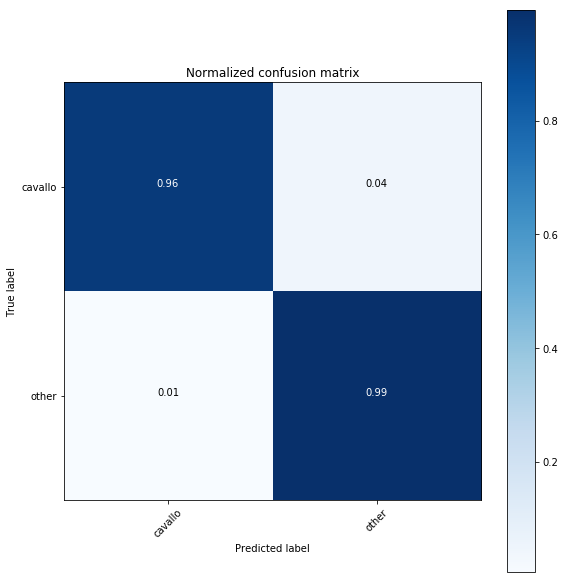

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(responseToPlot, predict)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(800/96, 800/96))
plot_confusion_matrix(cnf_matrix, classes=classif, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('ConfusionRBF.png')

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])